In [ ]:
# 4. Visualizing results 1.0
# Author: Yuchen Zhou
# This script will use the results after processing to visualize and gain important insights from the results

import pandas as pd
import numpy as np
import locale
from functions_for_visualization import show_topic
from functions_for_visualization import show_topic_correlation
locale.getpreferredencoding = lambda: "UTF-8"


**1. Read the csv file that contains frequency of topics**

In the last script, we have generated a CSV file that contains relative frequency of each topic. Now we will load this CSV file into a Pandas dataframe.

In [ ]:
percentage_df = pd.read_csv("percentages of topics five years finance.csv")

In [ ]:
percentage_df

,Unnamed: 0,2018_Q1,2018_Q2,2018_Q3,2018_Q4,2019_Q1,2019_Q2,2019_Q3,2019_Q4,2020_Q1,...,2020_Q3,2020_Q4,2021_Q1,2021_Q2,2021_Q3,2021_Q4,2022_Q1,2022_Q2,2022_Q3,2022_Q4
0,0,2.606874,2.732412,2.577924,3.088309,2.562665,2.898228,2.706906,3.241739,2.445652,...,2.007098,2.562019,2.002418,2.646408,2.756161,3.281934,2.366899,2.333294,2.518804,2.864851
1,1,0.085344,0.031407,0.019530,0.010674,0.012012,0.018578,0.018515,0.946087,7.630560,...,5.654143,4.811805,3.859734,3.151480,2.895590,2.662912,1.862672,1.628568,1.303131,1.068061
2,2,2.474979,2.485082,2.570112,2.223724,2.306399,2.062200,2.132938,1.680000,1.058846,...,1.113695,0.975192,1.189843,1.051885,1.342412,1.555921,1.818182,2.505034,2.792840,2.817567
3,3,1.543952,1.597833,1.566284,1.569060,1.657724,1.527143,1.832994,1.551304,2.186407,...,1.823522,1.514115,1.359129,1.339901,1.446174,1.218526,1.408868,1.889139,1.749169,1.819042
4,4,1.617658,1.483982,1.503789,1.554828,1.617682,1.504849,1.544158,1.526957,1.564843,...,1.285032,1.231822,1.305925,1.331552,1.371595,1.622842,1.720303,1.936515,1.813305,1.735599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,5962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005922,0.000000,0.000000
5963,5963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006119,0.000000,0.000000,0.004174,0.003243,0.000000,0.002966,0.000000,0.000000,0.000000
5964,5964,0.003879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003478,0.000000,...,0.000000,0.004277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5965,5965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**2. Create a topic dictionary**

We are able to identify topics in the earning transcripts using BERTopics. The method **.get_topics()** from BERTopics package allow us to get the dictionary that contains words constituing each topic. Here we just copy the dictionary that outputs from .get_topics() method in 2_Utilizing_BERTopic_for_topic_modeling.ipynb. We will use this dictionary to tell us the words in a given topic.

In [ ]:
topic_dict = {-1: [('loan', 0.00019638949117466091),
  ('lending', 0.00019529815022949288),
  ('borrower', 0.00019377295700573647),
  ('mortgage', 0.00019093572371974742),
  ('technology', 0.00018714950742513924),
  ('revenue', 0.00018608472177704678),
  ('loss', 0.00018456067624473884),
  ('sale', 0.00018295128567736215),
  ('fund', 0.00018148410617456297),
  ('marketing', 0.00018146577432661705)],
 0: [('dividend', 0.012072429498473224),
  ('regulardividend', 0.006645728446858574),
  ('specialdividend', 0.006404755724939389),
  ('specialdividends', 0.005069554864287672),
  ('dividendpolicy', 0.00482217940494674),
  ('supplementaldividend', 0.004306460363887263),
  ('dividendpayoutratio', 0.0038178322271894007),
  ('sharerepurchases', 0.0035120360827678608),
  ('dividendpayout', 0.0034593526151402393),
  ('commonstock', 0.00297736463617388)],
 1: [('covid19', 0.011395476167312053),
  ('covid', 0.01087519089283431),
  ('covid19pandemic', 0.009118389428801096),
  ('pandemic', 0.00803909078063528),
  ('prepandemiclevels', 0.0075048125205770784),
  ('coronavirus', 0.006723024307344544),
  ('virus', 0.006592385770668991),
  ('precovid', 0.00588189095301717),
  ('precovidlevels', 0.004200752000844005),
  ('outbreak', 0.0036703481074466375)],
 2: [('depositbetas', 0.005272458491591109),
  ('depositbeta', 0.0051824754178470146),
  ('deposit', 0.004523117148515415),
  ('depositcosts', 0.00274714949530196),
  ('beta', 0.002526870246155846),
  ('depositor', 0.002261112686628113),
  ('depositgathering', 0.0015680460410321723),
  ('interestbearingdeposits', 0.0013676541222579035),
  ('depository', 0.0012741806524956168),
  ('checkingaccount', 0.0011802814772162796)],
 3: [('credit', 0.0038226079201894715),
  ('creditquality', 0.0038094578970256396),
  ('allowance', 0.0034006794621934478),
  ('creditlosses', 0.0022758464656701116),
  ('provision', 0.0019221469679296726),
  ('creditbox', 0.001905222581673696),
  ('creditsuisse', 0.0016331871511786394),
  ('provisioning', 0.001317829698986112),
  ('score', 0.0010516385107173236),
  ('quality', 0.0010311010821479893)],
 4: [('balancesheet', 0.008773811354071783),
  ('assetsensitivebalancesheet', 0.002672382444819696),
  ('bothsides', 0.0016607333084657182),
  ('balancesheetoptimization', 0.0014818102834043647),
  ('staticbalancesheet', 0.0014424419778606347),
  ('fortressbalancesheet', 0.001399990754698299),
  ('ampleliquidity', 0.0012867535981883054),
  ('assetsensitivity', 0.0010568893476655497),
  ('liabilityside', 0.0009848560951549378),
  ('liquidity', 0.0009057222966631169)],
 5: [('outlook', 0.01763428410366088),
  ('economicoutlook', 0.0024735962737232322),
  ('mail', 0.0011323894881504345),
  ('mediumterm', 0.0009856948828845277),
  ('macroeconomicoutlook', 0.0008567750014995004),
  ('ratehikes', 0.0007896220739690326),
  ('forwardcurve', 0.0007638622853372143),
  ('pleaseturn', 0.0007622434949125588),
  ('briefing', 0.0007227441348667788),
  ('ratecuts', 0.0007215821600488605)],
 6: [('reinsurance', 0.01129183997449532),
  ('reinsurers', 0.006385132866797851),
  ('insurance', 0.005860478337289334),
  ('insurer', 0.00519198343494506),
  ('lifeinsurance', 0.00289227382298079),
  ('reinsuranceprogram', 0.002806152457942859),
  ('reinsurer', 0.0026869171496615644),
  ('esurance', 0.0024401150453276727),
  ('proassurance', 0.0022915275831856393),
  ('treaty', 0.0021897816405369815)],
 7: [('ppp', 0.02277047575099786),
  ('ppploans', 0.018480635984699154),
  ('excludingppploans', 0.011248409659283365),
  ('excludingppp', 0.010414870470729415),
  ('ppnr', 0.010026936072552117),
  ('pppforgiveness', 0.009772618088152727),
  ('pppprogram', 0.009218049598935732),
  ('forgiveness', 0.007455216170713609),
  ('exppp', 0.007108266036004207),
  ('round', 0.0036811597754268914)],
 8: [('tax', 0.014797611859299929),
  ('effectivetaxrate', 0.013506439478799063),
  ('taxreform', 0.012030063475846094),
  ('taxrate', 0.007408846426906666),
  ('jobsact', 0.006218978051934606),
  ('taxcut', 0.006160007516547865),
  ('taxcredit', 0.005002061710633478),
  ('deferredtax', 0.004701152268771921),
  ('taxlaw', 0.004209409997618701),
  ('taxact', 0.004168101140218489)],
 9: [('portfolio', 0.0033548389597188636),
  ('monitoring', 0.0012971845792601792),
  ('seasoning', 0.0010380045165212998),
  ('repositioning', 0.0009671715784306372),
  ('concentration', 0.0009153565148687147),
  ('turnover', 0.0009077355278863239),
  ('hfi', 0.000836066115273503),
  ('rotation', 0.0008230590183943143),
  ('pruning', 0.0008103631465100157),
  ('purchasing', 0.0007513234941129961)],
 10: [('interestrate', 0.005823260323181568),
  ('interest', 0.003956077858052456),
  ('interestmargin', 0.002668449907965659),
  ('sensitivity', 0.002143867877429976),
  ('rate', 0.001525750527788737),
  ('ratecuts', 0.001170546236121958),
  ('interestincome', 0.0011399620664837029),
  ('rise', 0.0010440675822761551),
  ('environment', 0.001037886709678153),
  ('interestearningassets', 0.00101952564730355)],
 11: [('sharerepurchaseprogram', 0.01574629969629379),
  ('repurchase', 0.014998657919898338),
  ('sharerepurchases', 0.01438457003717414),
  ('sharerepurchase', 0.01430457783776027),
  ('buyback', 0.0141467152868863),
  ('repurchasedshares', 0.012175622429134761),
  ('sharebuyback', 0.010926335412597287),
  ('repurchaseprogram', 0.010751509817430246),
  ('sharerepurchaseauthorization', 0.009746357823861306),
  ('sharebuybacks', 0.009646295336654717)],
 12: [('client', 0.005356958444029896),
  ('clientbase', 0.004152922161267364),
  ('adviser', 0.0034592678008769904),
  ('advisor', 0.003437381318860658),
  ('advice', 0.0030648372329096533),
  ('clientrelationships', 0.0026848635932302783),
  ('clientengagement', 0.002563317832298128),
  ('clientworks', 0.0017571230362214984),
  ('colleague', 0.001605620257748382),
  ('consultant', 0.0014942967472165915)],
 13: [('shareholdervalue', 0.011713892440302702),
  ('shareholder', 0.011450697970938213),
  ('longtermshareholdervalue', 0.0076030631661962115),
  ('shareholderreturns', 0.006508649189740279),
  ('shareholderreturn', 0.00446255596877642),
  ('shareholdervaluecreation', 0.0036879906850533126),
  ('stakeholder', 0.0030249139112554823),
  ('steward', 0.002791997578100777),
  ('valuecreation', 0.0022639991204752674),
  ('vote', 0.0021649891613609584)],
 14: [('grower', 0.0028506261429453303),
  ('growth', 0.002781180995172525),
  ('topline', 0.0017295845499316336),
  ('grow', 0.0016778462103208872),
  ('elongation', 0.0012061182239597509),
  ('trajectory', 0.001200721156991656),
  ('midpoint', 0.0011524991840906528),
  ('transformativegrowth', 0.0010608094216974298),
  ('truebill', 0.0009592856905618766),
  ('positioningourselves', 0.0009475686397534618)],
 15: [('basispoints', 0.00852631744993626),
  ('basispoint', 0.00736916665466841),
  ('pdl', 0.0037448327640915227),
  ('nim', 0.0034533770536479547),
  ('trailingbasis', 0.0033663086681765164),
  ('cet1ratio', 0.003350754655724141),
  ('cut', 0.0032030521782224156),
  ('marginexpansion', 0.003056147855540245),
  ('compression', 0.0027761932701994003),
  ('pcl', 0.0026211471218720197)],
 16: [('operatingleverage', 0.02246267255235311),
  ('leverage', 0.013328487394575941),
  ('positiveoperatingleverage', 0.008703535636013268),
  ('leverageratio', 0.005630623888569069),
  ('leveragedfinance', 0.004483526388502567),
  ('senleverage', 0.0035048247701829835),
  ('target', 0.0013433825540989765),
  ('efficiencyratio', 0.0013428504853744737),
  ('ratio', 0.0010170091401243916),
  ('shareholderapproval', 0.0009754844190016529)],
 17: [('inflation', 0.020109561162926854),
  ('inflationarypressures', 0.012742491771942355),
  ('socialinflation', 0.011612123110475547),
  ('wageinflation', 0.011559507399591076),
  ('monetarypolicy', 0.009147533400188283),
  ('inflationaryenvironment', 0.006875983642626244),
  ('cpi', 0.00647536339715795),
  ('inflationarypressure', 0.005654840608679293),
  ('wage', 0.0050400393993762),
  ('medicalinflation', 0.004753452679339304)],
 18: [('volatility', 0.019834809894797394),
  ('vix', 0.004043096568641835),
  ('extremevolatility', 0.0034005427811627967),
  ('bout', 0.0021459203431529084),
  ('spike', 0.0015431309344047749),
  ('fx', 0.0014527638647756985),
  ('trading', 0.0013010345495340307),
  ('var', 0.001254755786156424),
  ('tradingvolumes', 0.0011003653701313633),
  ('vol', 0.0010709342576162232)],
 19: [('banker', 0.007023478044717163),
  ('banking', 0.005343993220043248),
  ('communitybank', 0.003802716852833217),
  ('bank', 0.0036769619755191),
  ('communitybanks', 0.002698132839821935),
  ('regionalbanks', 0.0022687937610636603),
  ('centralbank', 0.0019248971657601665),
  ('teller', 0.0018366425684801057),
  ('communitybanking', 0.0017606621143313886),
  ('bankmobile', 0.0016655473007879443)],
 20: [('pipeline', 0.01973627697117291),
  ('pipe', 0.004683379127479319),
  ('plumbing', 0.0019498543866918886),
  ('headinginto', 0.0016832720636779039),
  ('mandate', 0.0016193980640150732),
  ('backlog', 0.001553832291623262),
  ('win', 0.0011087179945396843),
  ('lookslike', 0.0011082972128681392),
  ('pip', 0.0011017744711726925),
  ('visiblepipeline', 0.0010758194090304228)],
 21: [('colombia', 0.030352015012325647),
  ('brazil', 0.02734322757417304),
  ('chile', 0.026016843089366744),
  ('mexico', 0.025504323805109787),
  ('peru', 0.018310001319020424),
  ('argentina', 0.016619896027110875),
  ('panama', 0.010802321852144954),
  ('centralamerica', 0.010404254362162184),
  ('bancodechile', 0.009408055125532503),
  ('guatemala', 0.008235149615642735)],
 22: [('chargeoff', 0.02646132210388757),
  ('chargeoffs', 0.025519025178144458),
  ('netchargeoffs', 0.025189581959904846),
  ('netchargeoff', 0.0147942785788797),
  ('charge', 0.008805530908536375),
  ('chargedoff', 0.003616860189627447),
  ('basispoints', 0.002905780099949631),
  ('nonperformers', 0.0028462446269340936),
  ('delinquency', 0.002673149564735293),
  ('npa', 0.002313572438004705)],
 23: [('lender', 0.008042637804801656),
  ('lending', 0.004877520876205906),
  ('lendingtree', 0.00321921164189729),
  ('directlending', 0.0030993366861260265),
  ('mylendingtree', 0.0029827268030449753),
  ('lendingclub', 0.002395518506859645),
  ('loan', 0.0018720197065964764),
  ('club', 0.001628064977785766),
  ('directlenders', 0.0013525878508695716),
  ('sme', 0.0013027381067976357)],
 24: [('fee', 0.007005922858787285),
  ('feeincome', 0.0048515284426625055),
  ('feewaivers', 0.0031274432102341783),
  ('earningaum', 0.0021124506051278325),
  ('advisoryfees', 0.001848353926611427),
  ('feeearningaum', 0.0017689881306548602),
  ('aum', 0.001647328884694537),
  ('absolutereturnstrategies', 0.0015432991564015373),
  ('fre', 0.0015341019400426628),
  ('management', 0.0015212608202160003)],
 25: [('earningspower', 0.008391815169318667),
  ('earnings', 0.0075182077251640285),
  ('distributableearnings', 0.0068895067173517345),
  ('earningsrelease', 0.001219933989064896),
  ('earningscalls', 0.0010526123895136237),
  ('bhd', 0.000993033365356153),
  ('fre', 0.0009023709655018728),
  ('stream', 0.000873168868387378),
  ('csm', 0.0008647127349330005),
  ('majorcontributor', 0.0008571489007415462)],
 26: [('manda', 0.04089998477234665),
  ('meny', 0.0029038385977343552),
  ('grauman', 0.0028949203900014825),
  ('updatedthoughts', 0.0025216374762030615),
  ('venue', 0.0021208092389490498),
  ('appetite', 0.0021083105884715774),
  ('bolt', 0.002045006985517168),
  ('pursuing', 0.001957842227596812),
  ('manulife', 0.0017865894862996762),
  ('league', 0.0016915007263903561)],
 27: [('mortgage', 0.009875722659892951),
  ('mortgagebanking', 0.007140669492068072),
  ('mortgageservicingrights', 0.005705994973396919),
  ('residentialmortgage', 0.004210990213876541),
  ('mortgagewarehouse', 0.003613811844713203),
  ('servicingrights', 0.0029436155700056674),
  ('originator', 0.0025846614595527607),
  ('residentialmortgages', 0.002171515650655031),
  ('mortgagebankersassociation', 0.0017676304734101109),
  ('originationvolumes', 0.0014778061290991878)],
 28: [('risk', 0.0068766008872584525),
  ('riskprofile', 0.0062006799034972195),
  ('riskreward', 0.005100592529410498),
  ('hazard', 0.002912014076964367),
  ('risktransfer', 0.0028134286834929213),
  ('riskselection', 0.00222924713709172),
  ('framework', 0.0017063827598148217),
  ('enterprise', 0.001645846847578449),
  ('riskratings', 0.0015006521991201805),
  ('riskrating', 0.0014992975612753553)],
 29: [('institutionalinvestors', 0.01087445867465883),
  ('investor', 0.005875847268059145),
  ('investing', 0.002998928682478521),
  ('investment', 0.0027249061402065404),
  ('analyst', 0.002198337649800302),
  ('corbin', 0.0014037650184686406),
  ('fortegra', 0.0013209557582872554),
  ('institutionalinvestor', 0.0013013876228216727),
  ('universe', 0.0011452291818217983),
  ('qandasession', 0.001077138430200445)],
 30: [('china', 0.02997930763138417),
  ('asia', 0.018317474275454708),
  ('hongkong', 0.01810216170803931),
  ('singapore', 0.013597704732333972),
  ('mainlandchina', 0.011408805453437408),
  ('asiapacific', 0.008832864660658097),
  ('indonesia', 0.007377123156918808),
  ('shanghai', 0.0069734936402831085),
  ('philippine', 0.00630016500653337),
  ('thailand', 0.005383888225474667)],
 31: [('franchise', 0.029034477285430776),
  ('franchisees', 0.008418998830472705),
  ('franchisechannel', 0.007079383194292186),
  ('franchisee', 0.003769197060272658),
  ('royalty', 0.0028399899085267757),
  ('culling', 0.0022557198010132386),
  ('franchisors', 0.0020697098172608036),
  ('franchisor', 0.00200784190669768),
  ('corporateagents', 0.0016252960095638996),
  ('strength', 0.0015914674479151133)],
 32: [('merger', 0.03970799896130012),
  ('mergercharges', 0.008301151022996665),
  ('equal', 0.006263932614576162),
  ('mmlc', 0.0054870998568842975),
  ('gcic', 0.004695832585033569),
  ('lakeland', 0.0034344428377257505),
  ('mergeragreement', 0.0033720780315796696),
  ('wmih', 0.003301047349226737),
  ('restructuringcharges', 0.0031170290008926136),
  ('gsbd', 0.0031144941189236676)],
 33: [('ebitda', 0.03983415922164025),
  ('adjustedebitda', 0.03923894294223566),
  ('adjustedebitdamargin', 0.024576881012622502),
  ('ebitdac', 0.014439470510477578),
  ('ebitdacmargin', 0.006613164849868841),
  ('nongaapadjustedebitda', 0.00607294524445208),
  ('ebit', 0.005832423610137561),
  ('weightedaverageebitda', 0.005603272750569745),
  ('ebitdamargins', 0.005508352468198472),
  ('adjustedebitdac', 0.005410248787481903)],
 34: [('debt', 0.011466273079735963),
  ('subordinateddebt', 0.007833069158066058),
  ('subdebt', 0.0077902430148668956),
  ('unsecureddebt', 0.00455770305981698),
  ('issuance', 0.0021441685892049263),
  ('baddebt', 0.0018295899859544626),
  ('debtissuance', 0.0017069525135280227),
  ('maturing', 0.0016850103326802768),
  ('instrument', 0.0016556233113125503),
  ('holdingcompany', 0.001636811452227868)],
 35: [('libor', 0.0553963133624192),
  ('liborfloors', 0.020449027987357423),
  ('liborfloor', 0.016269123426409907),
  ('sofr', 0.011112921427156875),
  ('liborplus', 0.008091760820623444),
  ('floatingrate', 0.005789290614991235),
  ('fedfunds', 0.004939211651079081),
  ('floor', 0.004383205549238713),
  ('liborsofr', 0.0034330526885860426),
  ('libors', 0.0032986201584661746)],
 36: [('incentivecompensation', 0.02097687289778706),
  ('bonus', 0.018512781830478855),
  ('salary', 0.01716168580889791),
  ('compensation', 0.014792210465927975),
  ('variablecompensation', 0.014165286736916522),
  ('payrolltaxes', 0.01299823766170354),
  ('employeebenefits', 0.010999513784022454),
  ('deferredcompensation', 0.00961203529807039),
  ('basedcompensation', 0.009470204330507456),
  ('employeecompensation', 0.008060083280787474)],
 37: [('customerexperience', 0.01019979472119525),
  ('dataanalytics', 0.007284519814351692),
  ('analytics', 0.0055889578792806165),
  ('customerbase', 0.005149757890653499),
  ('customer', 0.004780097091867368),
  ('customersatisfaction', 0.004393007945671554),
  ('digitalcapabilities', 0.004089906507627415),
  ('engagement', 0.0024497911657397646),
  ('satisfaction', 0.0023686119669444465),
  ('interaction', 0.0023598425581612304)],
 38: [('cd', 0.05477633632047282),
  ('brokeredcds', 0.030550146247709183),
  ('maturingcds', 0.005434483580509975),
  ('brokeredcd', 0.005115147342629803),
  ('special', 0.0048750710206131665),
  ('cdcampaign', 0.004674737532458543),
  ('fhlb', 0.0033190041082602245),
  ('promotion', 0.0030701119847969527),
  ('money', 0.002901291953479036),
  ('reprice', 0.0028430683269338843)],
 39: [('paydowns', 0.021516393974536502),
  ('payoff', 0.018590659392630812),
  ('payoffs', 0.010249781519395379),
  ('payout', 0.0073816635561197485),
  ('payoffactivity', 0.007380395848210292),
  ('payouts', 0.0059197064204458685),
  ('paydown', 0.005290210524549237),
  ('pay', 0.0034109963908638035),
  ('payoutpolicy', 0.002604479218760789),
  ('payingoff', 0.0024934442600310002)],
 40: [('branch', 0.034412990458377826),
  ('branchnetwork', 0.030431753730610543),
  ('branchclosures', 0.021089747838567915),
  ('branchconsolidation', 0.019405828772734588),
  ('branchconsolidations', 0.015054799227074988),
  ('branchrationalization', 0.011767252485710086),
  ('branchoptimization', 0.009641626377534565),
  ('closure', 0.007059502885515292),
  ('consolidation', 0.005547817888808233),
  ('branchclosure', 0.005319245794439953)],
 41: [('mutualfund', 0.008747087869404282),
  ('funding', 0.008444144405514135),
  ('fund', 0.008279050750469077),
  ('fundingcosts', 0.006867925251548446),
  ('flagship', 0.004464295041391202),
  ('fundingsources', 0.004061381786855243),
  ('fundviii', 0.003876634689556278),
  ('flagshipfunds', 0.0038141811917760623),
  ('wholesalefunding', 0.0037291370200832944),
  ('predecessor', 0.003724017089633315)],
 42: [('pricing', 0.012784892119462526),
  ('price', 0.00787152173922406),
  ('elasticity', 0.0037428914160544773),
  ('blackbox', 0.003483529085149914),
  ('segmentation', 0.002113746638626991),
  ('competition', 0.0020383111531238223),
  ('priceincrease', 0.001771080142382126),
  ('sensitive', 0.0017705708762152325),
  ('miq', 0.001658376167590196),
  ('engine', 0.0015216041473900949)],
 43: [('dealer', 0.023378981231172786),
  ('inventory', 0.020679332280532085),
  ('car', 0.019075920112428056),
  ('supplychain', 0.014959728532637004),
  ('usedcar', 0.013883703494779716),
  ('supplychainissues', 0.013854364596030535),
  ('vehicle', 0.013787590578985666),
  ('dealership', 0.012276687557958665),
  ('truck', 0.011952342561195197),
  ('oems', 0.011549931789488613)],
 44: [('marginexpansion', 0.006365858692583272),
  ('margin', 0.005706490945008442),
  ('salemargins', 0.0030327507591413165),
  ('merchandise', 0.0022952033900704217),
  ('profit', 0.001842870266473757),
  ('incremental', 0.001780284880426721),
  ('vmm', 0.0014914578649569004),
  ('industryleading', 0.0013523672128989861),
  ('fre', 0.0013484410568576587),
  ('margincompression', 0.0012349240324380122)],
 45: [('retirement', 0.034941069466738736),
  ('pension', 0.033404712928383554),
  ('pensionfund', 0.01346501056729798),
  ('individualretirement', 0.007649845080081378),
  ('pensionplan', 0.007038277728865266),
  ('pensionrisktransfer', 0.006272548028009941),
  ('risktransfer', 0.005358110703640701),
  ('retirementplan', 0.004597966714266321),
  ('pensionreform', 0.004561853111279956),
  ('liferetirement', 0.004288877047773916)],
 46: [('hurricane', 0.03754189917700292),
  ('storm', 0.028635921460975728),
  ('earthquake', 0.02572263802016261),
  ('wildfire', 0.022939597904684084),
  ('weather', 0.021221931364582638),
  ('hurricanemichael', 0.012226875060530978),
  ('flood', 0.012188559036795818),
  ('typhoon', 0.011391970891339724),
  ('quake', 0.010859046798798856),
  ('californiawildfires', 0.010460325360556624)],
 47: [('transaction', 0.016383188430602727),
  ('transactioncloses', 0.0035994813425391367),
  ('transactionality', 0.003255349728765421),
  ('infinity', 0.0025481925060712126),
  ('yape', 0.0022932232521574824),
  ('payee', 0.0021257212431738215),
  ('close', 0.0017862359783087365),
  ('tomorrowtransaction', 0.0017356264719828845),
  ('completion', 0.0017245166760183055),
  ('timeline', 0.0017045226868524451)],
 48: [('marginexpansion', 0.014047948200677968),
  ('margin', 0.009748674121415125),
  ('fremargin', 0.004469698956207234),
  ('cut', 0.003690970824908755),
  ('applicationmargins', 0.0028488289320010556),
  ('directresponse', 0.0025673237857153884),
  ('error', 0.002552714569377506),
  ('unclearedmarginrules', 0.0023746261468208505),
  ('accretableyield', 0.0023106235666970616),
  ('bps', 0.002233657629301923)],
 49: [('tangiblebookvalue', 0.05802919009625289),
  ('bookvalue', 0.049670619389292),
  ('tangiblebook', 0.023494067769001703),
  ('pershare', 0.009094251995803188),
  ('aoci', 0.007932483523854717),
  ('excludingaoci', 0.006137833848215861),
  ('percommon', 0.005216870408511324),
  ('perbuc', 0.004660730440054689),
  ('stockholdersequity', 0.00463634787623829),
  ('dilution', 0.004381703739355402)],
 50: [('acquisition', 0.010538626954871393),
  ('acquirer', 0.0034151530107640457),
  ('takeover', 0.002364605635787126),
  ('mma', 0.0019226822537819074),
  ('robecosam', 0.001835960091345247),
  ('recentacquisitions', 0.0018351338764165147),
  ('bnc', 0.0016996785214322871),
  ('gibraltar', 0.0016829176261154049),
  ('add', 0.0016752109093070922),
  ('hay', 0.001597509546576967)],
 51: [('excessliquidity', 0.023518882783496786),
  ('liquidity', 0.01543520673222553),
  ('liquid', 0.004180973310791457),
  ('denominatoreffect', 0.002361664238380265),
  ('deployingexcessliquidity', 0.00191590403741478),
  ('constraint', 0.0018809334297240515),
  ('drag', 0.001750487012785651),
  ('takeadvantage', 0.0017071595524983225),
  ('illiquid', 0.0016574808531680072),
  ('deployment', 0.0015792054573682862)],
 52: [('hotel', 0.04549892704415544),
  ('restaurant', 0.036580208812264),
  ('hospitality', 0.028943574575055846),
  ('loewshotels', 0.022072570120422245),
  ('leisure', 0.012192842790813905),
  ('accommodation', 0.010248855201345317),
  ('fitness', 0.00918932665555269),
  ('hotelmotel', 0.007735269778914357),
  ('resort', 0.0070158641668767435),
  ('motel', 0.006347903295098363)],
 53: [('highsingledigits', 0.04626909865710459),
  ('doubledigit', 0.044207911493408865),
  ('midsingledigits', 0.038718978753936886),
  ('lowsingledigits', 0.034998502435285475),
  ('midsingledigit', 0.031004845373033687),
  ('lowdoubledigits', 0.029889017036315933),
  ('highsingledigit', 0.02543751138781989),
  ('singledigits', 0.020989129004311994),
  ('lowsingledigit', 0.015631412597874792),
  ('singledigit', 0.014457665779804365)],
 54: [('tailwind', 0.0389922882667821),
  ('headwind', 0.033379620597470114),
  ('wind', 0.011267469345615141),
  ('seculartailwinds', 0.0052444881780947545),
  ('fairwind', 0.004114557846728347),
  ('macroheadwinds', 0.0031309905806709867),
  ('unwind', 0.002247595706020243),
  ('fx', 0.0020203873737721307),
  ('tail', 0.001983607607534817),
  ('macroenvironment', 0.0017560946958176415)],
 55: [('roe', 0.07062101813080394),
  ('roa', 0.011733650443217523),
  ('nongaap', 0.0035632603303551056),
  ('pgaap', 0.003492142494133577),
  ('expgaap', 0.003082505438513864),
  ('rotce', 0.0030612763268154804),
  ('dilutedeps', 0.0029359502069864827),
  ('midteens', 0.0028177257143417716),
  ('teen', 0.002749969713043174),
  ('inteligo', 0.0023128583221787686)],
 56: [('wealthmanagement', 0.026249912180183004),
  ('wealth', 0.019077499440108864),
  ('privatewealth', 0.01309251975886283),
  ('wealthmanagers', 0.009800779556696894),
  ('wealthmanager', 0.006248355886892345),
  ('wealthchannel', 0.004737596033943595),
  ('advice', 0.0037667976302697644),
  ('pershing', 0.002871718676559577),
  ('yirenwealth', 0.0027859485156634125),
  ('wealthfront', 0.002681584727007625)],
 57: [('realizedgains', 0.025623830695338714),
  ('unrealizedgains', 0.023024282122377365),
  ('unrealizedlosses', 0.018485077431255686),
  ('unrealizeddepreciation', 0.015790488692336718),
  ('unrealizedappreciation', 0.0127867592373352),
  ('unrealizedloss', 0.010477625960058775),
  ('unrealizedgain', 0.010302998860724461),
  ('realizedgain', 0.008006624104908126),
  ('realizedlosses', 0.007298630390119436),
  ('netrealizedgains', 0.0046344140710826934)],
 58: [('cecl', 0.05649250922609035),
  ('ceclmodel', 0.011258538060404335),
  ('ceclmethodology', 0.010042743767518661),
  ('ceclimplementation', 0.009146265570784465),
  ('cecladoption', 0.007570982649723142),
  ('undercecl', 0.00694506336896657),
  ('adoption', 0.006769105373126917),
  ('ceclreserve', 0.00668285816544691),
  ('ceclaccountingstandard', 0.006012697481177578),
  ('methodology', 0.005403143560130979)],
 59: [('stimulus', 0.06794253782563643),
  ('governmentstimulus', 0.03979083347689483),
  ('fiscalstimulus', 0.0203330260750741),
  ('stimulusprograms', 0.019853465410518224),
  ('stimuluschecks', 0.01904267406153195),
  ('governmentstimulusprograms', 0.01574201566391263),
  ('stimuluspackage', 0.013494226759376267),
  ('stimuluspayments', 0.009963908814770774),
  ('federalstimulus', 0.006779284227648834),
  ('monetarystimulus', 0.005856668754901851)],
 60: [('commercialrealestate', 0.02449137933137972),
  ('realestate', 0.018868712647666007),
  ('residentialrealestate', 0.008429127684375719),
  ('lenderfinance', 0.0036560691909694664),
  ('securedlending', 0.0026907732314974462),
  ('owneroccupiedrealestate', 0.0026357962804896),
  ('developer', 0.0024258582509937543),
  ('estate', 0.0023739843495506445),
  ('candi', 0.0022760018221891056),
  ('construction', 0.0022524493500538775)],
 61: [('annuity', 0.049408918866887544),
  ('variableannuity', 0.03707184730904062),
  ('variableannuities', 0.025879270846182568),
  ('fixedannuity', 0.019717402584812155),
  ('annuitysales', 0.01916221564165019),
  ('fixedannuities', 0.01858872069659031),
  ('indexedannuities', 0.007990492200597067),
  ('indexannuities', 0.0076969742540746134),
  ('flexguard', 0.005143246581832026),
  ('block', 0.005132989095794548)],
 62: [('ipo', 0.07909015851894685),
  ('corebridge', 0.008040139746071942),
  ('spac', 0.005966578297826516),
  ('liferetirement', 0.0045408295566810725),
  ('preipo', 0.004248386154172549),
  ('listing', 0.004168332194526238),
  ('spacs', 0.0034534386643094005),
  ('debut', 0.003393678370788406),
  ('ip', 0.003207825524356069),
  ('coinsurance', 0.003044852129403091)],
 63: [('interest', 0.010218750900494303),
  ('income', 0.0073154990882731185),
  ('expense', 0.0017030190986500936),
  ('investment', 0.001209131874242223),
  ('rate', 0.0008990172401905724),
  ('feeling', 0.0005543525742450493),
  ('flavor', 0.0005492821638475926),
  ('dimension', 0.0005041700606209874),
  ('ad', 0.0003713101008138891),
  ('test', 0.0002565330831453064)],
 64: [('leadershipteam', 0.01861644439625287),
  ('teammate', 0.01632260659167293),
  ('dedication', 0.01507681300936847),
  ('leadership', 0.011250831256269083),
  ('team', 0.008937190157382108),
  ('managementteam', 0.008152198717189),
  ('teammembers', 0.007492187204840026),
  ('proud', 0.006951465083505688),
  ('hardwork', 0.0066057910624073),
  ('histeam', 0.005425247058679479)],
 65: [('unemployment', 0.06883522700417043),
  ('unemploymentrate', 0.016302137383553218),
  ('gdp', 0.013327299394782917),
  ('unemploymentbenefits', 0.011329763824789126),
  ('employment', 0.00572048647932268),
  ('forecast', 0.005611935713072573),
  ('lowunemployment', 0.00547121702711882),
  ('moodys', 0.005082198845698213),
  ('baselineforecast', 0.005045303530649177),
  ('labor', 0.003930489970609938)],
 66: [('netinflows', 0.028952597089702495),
  ('inflow', 0.02798823603482976),
  ('outflow', 0.022441058271906626),
  ('flow', 0.01426871596886094),
  ('netoutflows', 0.006014809585153798),
  ('assetsunder', 0.004555512953765663),
  ('flowpicture', 0.004502771765505791),
  ('ishares', 0.0037768752872833233),
  ('gtr', 0.0031999090139796763),
  ('wrap', 0.0031711542796109596)],
 67: [('reservereleases', 0.020314178783748),
  ('reserve', 0.019585412235915752),
  ('reserverelease', 0.016271543144869404),
  ('reservedevelopment', 0.015607401377417977),
  ('reservebuild', 0.01436714587530176),
  ('reservebuilds', 0.012797157961975747),
  ('favorablereservedevelopment', 0.012082496959747334),
  ('redundantreserves', 0.005762668340299283),
  ('riskratingdowngrades', 0.005388992853930037),
  ('releasingreserves', 0.00426927021129898)],
 68: [('houston', 0.03408177070526734),
  ('texas', 0.031786842959907934),
  ('dallas', 0.03016968804372224),
  ('austin', 0.01713951228768091),
  ('ohio', 0.015277668993516968),
  ('indiana', 0.014409568756897332),
  ('pennsylvania', 0.012213148246836529),
  ('michigan', 0.011550852327612665),
  ('colorado', 0.008980471637535743),
  ('dfw', 0.008838250137051272)],
 69: [('capitalallocation', 0.010104064158694605),
  ('capitalexpenditure', 0.007773276227917363),
  ('capitalizedsoftware', 0.005385352710660245),
  ('capitalization', 0.005032384666086771),
  ('capital', 0.004990883638336004),
  ('capitalgeneration', 0.0033428631749833322),
  ('adequacy', 0.003226923533496907),
  ('preservation', 0.003142866963263437),
  ('capitalpreservation', 0.0027297931508895802),
  ('planning', 0.0025929469664917465)],
 70: [('sba', 0.05749300904133213),
  ('sbadebentures', 0.025705376460073016),
  ('paycheckprotectionprogram', 0.023782013764053072),
  ('sbic', 0.01967451829318937),
  ('sba7', 0.016539210185468903),
  ('sbloc', 0.01407815547187307),
  ('sbiclicense', 0.011382714427600025),
  ('sbapaycheckprotectionprogram', 0.006927036750658407),
  ('debenture', 0.006878460412264076),
  ('sbl', 0.005902148221718532)],
 71: [('basispoints', 0.00470963266265564),
  ('basispoint', 0.004083413834308833),
  ('accretion', 0.003573353369797378),
  ('yield', 0.0034824860941316794),
  ('discountaccretion', 0.0032496405577161986),
  ('earningassets', 0.0025487896739466776),
  ('interestmargin', 0.002514921367454605),
  ('purchaseaccountingadjustments', 0.0022853024998662702),
  ('taxequivalentyield', 0.0022039543488959513),
  ('earningasset', 0.0017699178956464535)],
 72: [('basispoint', 0.009048097835982809),
  ('interestmargin', 0.009004878086945292),
  ('interestbearingliabilities', 0.006202078571406667),
  ('earningassets', 0.006024973061621662),
  ('basispoints', 0.005253739085420482),
  ('shock', 0.004753728167834632),
  ('parallelshift', 0.004524471752893844),
  ('discountaccretion', 0.0041253488069075365),
  ('excessliquidity', 0.003635726334328714),
  ('earningasset', 0.002746177753916433)],
 73: [('pipeline', 0.015469419303263473),
  ('headinginto', 0.003748603842193766),
  ('pipe', 0.0020828673818160614),
  ('sba7', 0.002059160026616185),
  ('pull', 0.0019173232856510055),
  ('pipelinelooks', 0.0017687886424870198),
  ('residentialmortgage', 0.0015806242198032731),
  ('multiply', 0.0015353517822503397),
  ('refinancings', 0.001490398898203758),
  ('production', 0.0014854011043225499)],
 74: [('expectation', 0.02077935901021138),
  ('originalexpectations', 0.005405794210261347),
  ('expect', 0.0052065658634944684),
  ('reasonableexpectation', 0.0025041121773157773),
  ('baseline', 0.0021181949076286475),
  ('1renewals', 0.0016671639699136812),
  ('copom', 0.0016671639699136812),
  ('tempered', 0.0016671639699136812),
  ('speedtrack', 0.0016671639699136812),
  ('ncrs', 0.0016671639699136812)],
 75: [('earnedpremium', 0.030859200122494816),
  ('earnedpremiums', 0.027893110552434815),
  ('netwrittenpremiums', 0.026322879571132482),
  ('writtenpremium', 0.023389150173937272),
  ('grosswrittenpremiums', 0.022423715732614764),
  ('grosswrittenpremium', 0.020474752283091282),
  ('writtenpremiums', 0.018345727334942257),
  ('premiumswritten', 0.013733151955078812),
  ('netearnedpremiums', 0.01259713264796237),
  ('premium', 0.011680165468379786)],
 76: [('trend', 0.018787888909050893),
  ('downwardtrend', 0.007078638142217853),
  ('tendency', 0.003659804325641968),
  ('upwardtrend', 0.0033023415316047024),
  ('upwardtrajectory', 0.0025050372170479177),
  ('downward', 0.0023280442840856157),
  ('pop', 0.002079295360812205),
  ('downwards', 0.0019305376751503234),
  ('make', 0.0019251005293580076),
  ('panel', 0.0018733779736644102)],
 77: [('puertorico', 0.1086490691749239),
  ('puertoricoexposures', 0.012131730372066135),
  ('oversightboard', 0.00928037553497044),
  ('island', 0.008659523236306019),
  ('commonwealth', 0.006834704784965875),
  ('hta', 0.00676583885208146),
  ('mainland', 0.005816424147070942),
  ('prepa', 0.005803382891971164),
  ('hurricanemaria', 0.005622307458681791),
  ('reconstruction', 0.004855650508555788)],
 78: [('healthcare', 0.02678240793567404),
  ('hospital', 0.02051714812082488),
  ('health', 0.018173965213347364),
  ('physician', 0.01173112438645793),
  ('wellness', 0.010160389471014046),
  ('doctor', 0.008625197046009041),
  ('surgery', 0.008374801205012852),
  ('patient', 0.007722545075316356),
  ('care', 0.007485778595495483),
  ('populationhealth', 0.006661898422663577)],
 79: [('seasonality', 0.09490216969370138),
  ('normalseasonality', 0.02311245040211273),
  ('typicalseasonality', 0.017910686410617608),
  ('seasonalpatterns', 0.005628611954849387),
  ('seasonallyhigher', 0.0045248760812002945),
  ('seasonalpayroll', 0.00406144678632671),
  ('payrolltaxes', 0.0038991801710171773),
  ('seasonal', 0.003552353919456802),
  ('tends', 0.0033447984212252872),
  ('promissorynote', 0.0031467342936383584)],
 80: [('reinvestment', 0.01295214289957026),
  ('yield', 0.009531540714071692),
  ('reinvestmentyields', 0.006038056289734566),
  ('highgrade', 0.004423958954197159),
  ('effectiveyield', 0.0028262690745740355),
  ('reinvestmentperiod', 0.0027282044370689072),
  ('duration', 0.002590337833695624),
  ('investmentgrade', 0.002544810649294574),
  ('security', 0.0024044855700833317),
  ('reinvestments', 0.0022361466127382755)],
 81: [('momentum', 0.04489523425782716),
  ('convention', 0.005260536057602854),
  ('headinginto', 0.004516435322084735),
  ('impetus', 0.004278110253311206),
  ('axis', 0.0026818458302274306),
  ('building', 0.0026068939713340526),
  ('hybridplatform', 0.0024625951515910966),
  ('continuation', 0.0020988336395714427),
  ('topline', 0.0020825561126190774),
  ('accomplishment', 0.0019584517571483145)],
 82: [('bond', 0.031173374910979722),
  ('municipalbond', 0.02472904859495891),
  ('babybond', 0.013921530793857419),
  ('bondissuance', 0.011700745553620096),
  ('babybonds', 0.010021759946888436),
  ('greenbond', 0.009120505995390316),
  ('bondpoint', 0.008575637534287401),
  ('corporatebond', 0.007142931140316034),
  ('bondholder', 0.0057725005819467805),
  ('greenbonds', 0.00563365404394925)],
 83: [('etf', 0.08122326597286038),
  ('ishares', 0.01395000939487151),
  ('etfhub', 0.010557520623495407),
  ('equityetfs', 0.010463481748482313),
  ('fixedincomeetfs', 0.00956139694717917),
  ('mutualfund', 0.006691664267758278),
  ('netinflows', 0.006573388538427332),
  ('inflow', 0.005520266676655739),
  ('index', 0.00503037307563709),
  ('smartbeta', 0.004934269032351808)],
 84: [('cfo', 0.08074223512375428),
  ('cfpb', 0.032426916902234974),
  ('coo', 0.021327631476430735),
  ('ceo', 0.015417437405239457),
  ('cro', 0.011400096277096343),
  ('treasurer', 0.01042745816065864),
  ('president', 0.009975445296002926),
  ('download', 0.00959090466756436),
  ('vicechairman', 0.00888519105290173),
  ('chairman', 0.008353450836680758)],
 85: [('treasury', 0.053568531376437516),
  ('treasurymanagement', 0.033078420282357135),
  ('treasuryservices', 0.020567623435944107),
  ('constantdollars', 0.0033487002487576677),
  ('clearance', 0.0031339441099088486),
  ('bill', 0.0030270550614341757),
  ('secretary', 0.0028732407471604546),
  ('shorttermtreasuries', 0.002820751638511284),
  ('tmps', 0.0021101118688245917),
  ('mb', 0.0019067998157679344)],
 86: [('recession', 0.07928550101746905),
  ('greatrecession', 0.0282238921672476),
  ('mildrecession', 0.0162675775989297),
  ('recessionaryenvironment', 0.011043714441290176),
  ('probability', 0.005491636111958116),
  ('deeprecession', 0.00547413020491626),
  ('fear', 0.005334396148941798),
  ('economist', 0.005016182656812414),
  ('mild', 0.004234535032938998),
  ('moderaterecession', 0.003866224061333406)],
 87: [('rateincreases', 0.015273658898718536),
  ('aiv', 0.005259189883083666),
  ('raterises', 0.003581434360204111),
  ('rate', 0.003444449726614821),
  ('smoker', 0.002960183746989998),
  ('dno', 0.0029584505923282134),
  ('ratesrise', 0.002951566050552044),
  ('take', 0.0023371833522791347),
  ('rateadequacy', 0.002019174123432157),
  ('causality', 0.0019346567260013607)],
 88: [('freecashflow', 0.037090830871262394),
  ('cashflow', 0.03152833937583534),
  ('cashflowgeneration', 0.008451174190363859),
  ('cashflowtesting', 0.007986236847963154),
  ('freecash', 0.006693764208841895),
  ('cashflowbreakeven', 0.005320174419433603),
  ('ltm', 0.003634882125332992),
  ('generating', 0.002389529312864057),
  ('unumamerica', 0.002213113174269579),
  ('capitalexpenditure', 0.0021892857480464802)],
 89: [('weightedaverageyield', 0.06568046186130828),
  ('weightedaverage', 0.05254247389331085),
  ('weightedaveragecoupon', 0.02195141674127606),
  ('amortizedcost', 0.013632822733578482),
  ('weightedaverageltv', 0.011634638248054817),
  ('weightedaveragelife', 0.00726364922001768),
  ('grade', 0.004615770795130095),
  ('wac', 0.004206886674278968),
  ('rating', 0.004076672481944887),
  ('weightedaverageebitda', 0.0035165814177326483)],
 90: [('mycomments', 0.06983167576284423),
  ('preparedcomments', 0.06882276604740398),
  ('hiscomments', 0.05160549748790692),
  ('openingcomments', 0.04443436357698606),
  ('fewcomments', 0.02700783303324958),
  ('hisopeningcomments', 0.006702264411119665),
  ('introductorycomments', 0.006570258763422557),
  ('myopeningcomments', 0.005934776314419524),
  ('onceagain', 0.005761013466684433),
  ('qanda', 0.0042520608992556675)],
 91: [('refinance', 0.05470563804534136),
  ('refinancing', 0.038919125708505205),
  ('refinanceactivity', 0.03154903676282573),
  ('refinances', 0.02460610737836476),
  ('refinancingactivity', 0.020427001608313178),
  ('refinancings', 0.015074753263659358),
  ('refinancevolumes', 0.008609675151525156),
  ('purchase', 0.005220118032839068),
  ('refinanceorders', 0.00461168182053343),
  ('persistency', 0.00422178837930727)],
 92: [('coverageratio', 0.049272348519645424),
  ('coverage', 0.03698571452731094),
  ('coverageratios', 0.02275433654619266),
  ('allowancecoverage', 0.01602038562400056),
  ('pdl', 0.007117194987883587),
  ('policylimit', 0.0034269134495911848),
  ('allowance', 0.00336639230513022),
  ('electricaribe', 0.003138804127859453),
  ('parity', 0.0029970125250888846),
  ('sublimits', 0.0025699015724021832)],
 93: [('revolver', 0.1380244161064921),
  ('delayeddrawterm', 0.010182794500861653),
  ('revolverdraws', 0.008931044909071288),
  ('undrawn', 0.008072193513287248),
  ('transactor', 0.008019820573368754),
  ('draw', 0.007389389754474148),
  ('drawn', 0.006377529413543796),
  ('revolverutilization', 0.0060188845623163605),
  ('accordion', 0.005513626644191018),
  ('merx', 0.0054177034468195434)],
 94: [('mortality', 0.07063781236194695),
  ('death', 0.037224644002275056),
  ('morbidity', 0.03714190275080759),
  ('longevity', 0.03609131509659722),
  ('morbidityimprovement', 0.02130730338923495),
  ('generalpopulation', 0.016790532484333095),
  ('mortalityexperience', 0.013461186285518309),
  ('excessmortality', 0.010578566702432167),
  ('adversemortality', 0.007408330573166165),
  ('insuredpopulation', 0.007077091884231569)],
 95: [('amortization', 0.055589797166761254),
  ('premiumamortization', 0.04056647092789617),
  ('intangibleamortization', 0.03515053550995121),
  ('intangible', 0.020811726410878695),
  ('intangibleasset', 0.017001670299757052),
  ('depreciation', 0.007266678641848797),
  ('cdiamortization', 0.005355237828087747),
  ('cdi', 0.005340395527524154),
  ('acceleratedamortization', 0.004913789826068835),
  ('csmbalance', 0.004142565365433176)],
 96: [('interestbearingdeposits', 0.014008529253928583),
  ('interestbearingdeposit', 0.01276223239748724),
  ('depositcosts', 0.007699944932126268),
  ('basispoints', 0.006370891791784375),
  ('interestbearingliabilities', 0.0061404150090881016),
  ('basispoint', 0.004727906168901536),
  ('deposit', 0.0038242791009051673),
  ('fundingcosts', 0.003709794436449226),
  ('cost', 0.002692038499468494),
  ('spot', 0.0024520794360261998)],
 97: [('repayment', 0.07027427800033495),
  ('repaymentactivity', 0.03677078376847899),
  ('repays', 0.00866560314314436),
  ('repay', 0.00837601383135677),
  ('realization', 0.005091414500933419),
  ('exit', 0.004698888445631666),
  ('noland', 0.003901805878362289),
  ('oid', 0.0035077821238331535),
  ('internotes', 0.0033692940557350907),
  ('proceeds', 0.0029792610959876375)],
 98: [('synergy', 0.07247385765984915),
  ('synovus', 0.02011550127328189),
  ('revenuesynergies', 0.009842355132520379),
  ('synovusforward', 0.006813868179092583),
  ('tcf', 0.00481201269145426),
  ('twg', 0.0042261780062783525),
  ('costsynergies', 0.004221465457262702),
  ('integration', 0.004034538508296542),
  ('dis', 0.003683965310496861),
  ('merger', 0.0032357378883147584)],
 99: [('forecast', 0.06204038012659624),
  ('economicforecast', 0.04224508800771913),
  ('economicforecasts', 0.027949729554256366),
  ('forecasting', 0.026349975554826755),
  ('baselineforecast', 0.009384798461560977),
  ('macroeconomicforecast', 0.0068756772245981285),
  ('prediction', 0.006254792708561955),
  ('s1', 0.005040601525526796),
  ('forecaster', 0.004722962883299158),
  ('consensus', 0.004186120846781373)],
 100: [('cloequity', 0.06618069427909949),
  ('clo', 0.04904226590233962),
  ('clos', 0.0424987417472416),
  ('clodebt', 0.011981817288120141),
  ('reset', 0.009464774351008055),
  ('reinvestmentperiod', 0.008396579069475232),
  ('reinvestment', 0.007421750528038165),
  ('effectiveyield', 0.005798928026026592),
  ('remainingreinvestmentperiod', 0.00573974261267009),
  ('weightedaverage', 0.00549128850281395)],
 101: [('delinquency', 0.05610921458975281),
  ('earlystagedelinquencies', 0.012640679941236927),
  ('cure', 0.010314550478488916),
  ('delinquent', 0.009319828461052983),
  ('earlystage', 0.008213781191311048),
  ('delinquencynotices', 0.00820953494161218),
  ('earlystagedelinquency', 0.0051243480311442356),
  ('writeoff', 0.004726418344850643),
  ('notice', 0.004695724187555457),
  ('forbearance', 0.004561415343891955)],
 102: [('litigation', 0.049022982415709924),
  ('court', 0.041061446394829386),
  ('settlement', 0.02489519562920495),
  ('trial', 0.02379501920179799),
  ('jury', 0.01813082221194091),
  ('lawsuit', 0.017519432904013574),
  ('judge', 0.017000882510866205),
  ('plaintiff', 0.016588856635244127),
  ('attorney', 0.014955565862429552),
  ('defendant', 0.013266775704519604)],
 103: [('tangiblecommonequity', 0.06687665625511403),
  ('tangibleequity', 0.06329980431303527),
  ('commonequity', 0.01114013928853831),
  ('return', 0.008425628781663278),
  ('tangiblecommon', 0.004332012805854797),
  ('banklevies', 0.003957392103529794),
  ('equate', 0.003470170827712188),
  ('efficiencyratio', 0.0033401564092366276),
  ('averagetangiblecommon', 0.0023520391706615515),
  ('post', 0.0023132162052287722)],
 104: [('originationvolume', 0.020564495720771712),
  ('volume', 0.018764768650972766),
  ('originationvolumes', 0.016352878984943704),
  ('dti', 0.0037063220988478203),
  ('referralvolume', 0.0032955290609903505),
  ('niw', 0.0030252847381130746),
  ('hud', 0.002995219022455487),
  ('vhis', 0.0026847544269904037),
  ('reo', 0.0026414768555420224),
  ('tpay', 0.0022811986266916815)],
 105: [('runoff', 0.09371493189951463),
  ('upb', 0.004735843259257189),
  ('neon', 0.0034854134589016005),
  ('generating', 0.002921448836658417),
  ('erc', 0.002748097186451305),
  ('catco', 0.002526966899919404),
  ('mode', 0.0022837723960464217),
  ('refundings', 0.002180564102877124),
  ('bmt', 0.0020314470804393484),
  ('intensive', 0.0019336526528447157)],
 106: [('lease', 0.051723511654906386),
  ('rent', 0.04661137694612416),
  ('tenant', 0.030129361502978007),
  ('leasing', 0.02106400340622301),
  ('renter', 0.01859693445617118),
  ('apartment', 0.012257450869795211),
  ('landlord', 0.010803717793873045),
  ('rental', 0.008240750994424591),
  ('vacancy', 0.0076550426915906996),
  ('rentcontrol', 0.007552852586147056)],
 107: [('florida', 0.06990684484611624),
  ('tampa', 0.02160626916077561),
  ('southflorida', 0.02016832922539543),
  ('miami', 0.01586040107878903),
  ('panhandle', 0.009531666048773023),
  ('orlando', 0.009325414414848394),
  ('jacksonville', 0.009208450105581637),
  ('naples', 0.008440361544560791),
  ('beach', 0.006527790090393876),
  ('tricounty', 0.006045358041349143)],
 108: [('channel', 0.028773226148880057),
  ('digitalchannels', 0.02695996760520668),
  ('directchannel', 0.023929148933918353),
  ('distributionchannel', 0.02234308132141212),
  ('agencychannel', 0.009783023846740202),
  ('omnichannel', 0.006620782566279662),
  ('multichannel', 0.005723546012375039),
  ('tv', 0.005610644878285499),
  ('breeder', 0.0038797437360086067),
  ('vet', 0.0033691182713695015)],
 109: [('claim', 0.03005299327381995),
  ('claimfrequency', 0.008422241763274885),
  ('incidence', 0.00771049349597958),
  ('adjuster', 0.006738854599710403),
  ('claimant', 0.006665187290604327),
  ('claimcounts', 0.004714883707260494),
  ('severity', 0.004176746133052936),
  ('frequency', 0.0040770835896257775),
  ('termination', 0.003977642687639197),
  ('quickfotoclaim', 0.0036550996493795477)],
 110: [('ganda', 0.12028337970466707),
  ('gandaexpenses', 0.06938039184703083),
  ('gandaexpense', 0.010432980393027912),
  ('professionalfees', 0.005434838147215434),
  ('randd', 0.0036238574557572894),
  ('tande', 0.003311630894517286),
  ('compensation', 0.0033065184995327945),
  ('sequentialbasis', 0.003034943555610416),
  ('relocation', 0.0028725842076576975),
  ('financereceivables', 0.002851830807307169)],
 111: [('broker', 0.03640807867718953),
  ('brokerdealer', 0.026785014003987074),
  ('brokerage', 0.022020300461531084),
  ('brokerdealers', 0.020189534533453894),
  ('brokerchannel', 0.01726884362148856),
  ('brokertec', 0.015307545075223812),
  ('interactivebrokers', 0.010581244784297852),
  ('brokerprotocol', 0.008637885556365332),
  ('onlinebrokers', 0.007982609928099715),
  ('eb', 0.004434460686592479)],
 112: [('gaap', 0.05036624338007484),
  ('nongaap', 0.013975496612573218),
  ('gaapeps', 0.013968986984149048),
  ('gaapaccounting', 0.009408697299143797),
  ('nongaapmeasure', 0.007705462493770781),
  ('nongaapeps', 0.006364688635471173),
  ('stat', 0.006003256285009488),
  ('earningspershare', 0.005068149681442398),
  ('carlo', 0.004363212640887254),
  ('effectivetax', 0.004214028811167559)],
 113: [('deployment', 0.06543242975568546),
  ('capitaldeployment', 0.05764437760958714),
  ('deployed', 0.010921671129841236),
  ('deploy', 0.009465979098248816),
  ('systemdeployments', 0.005473700765578339),
  ('cabot', 0.0052378301367460274),
  ('deploying', 0.004438413028774542),
  ('disciplinedapproach', 0.00410327359675084),
  ('grossdeployments', 0.002927550386656792),
  ('cct', 0.002883376237682287)],
 114: [('restructuring', 0.05864702905225781),
  ('restructuringcharges', 0.04556453612291173),
  ('restructuringcharge', 0.02306572410042312),
  ('reorganization', 0.013693472689327938),
  ('restructurings', 0.012356796307261754),
  ('strategicadvisory', 0.008700713904084757),
  ('assignment', 0.005412303326564465),
  ('advisory', 0.004550384268587122),
  ('chapter11', 0.0031354326809947424),
  ('sru', 0.002916979539343231)],
 115: [('economy', 0.02311584221116116),
  ('economics', 0.021199800894711858),
  ('macroeconomicenvironment', 0.01963834129344538),
  ('economist', 0.01904653901715879),
  ('economiccondition', 0.01874167318583354),
  ('economicactivity', 0.010474606166308112),
  ('macroeconomicconditions', 0.010075801615639427),
  ('macroeconomicscenario', 0.009715450371492651),
  ('macroeconomicvariables', 0.008746644307455066),
  ('macroeconomicbackdrop', 0.008341701322995158)],
 116: [('slide', 0.019616950857559805),
  ('slideshows', 0.008608375269725944),
  ('wrapup', 0.006252548096306389),
  ('nextslide', 0.004882350930659639),
  ('beamortgagebroker', 0.004323271999406471),
  ('therein', 0.004220654391362394),
  ('breakdown', 0.004081350997332915),
  ('wrappingup', 0.003954924649888231),
  ('updatedguidance', 0.0037434247726810498),
  ('presentation', 0.0034771442067234285)],
 117: [('affiliate', 0.10753588339877113),
  ('amg', 0.012847370052987257),
  ('pantheon', 0.0062602202320631226),
  ('eig', 0.005988669770425462),
  ('capula', 0.00465785426588647),
  ('abacus', 0.004306213182628459),
  ('aqr', 0.004040266787042484),
  ('comvest', 0.003494315251717843),
  ('winton', 0.0032766637125979676),
  ('activemanagers', 0.003231536159429911)],
 118: [('noninterestexpense', 0.025152688179644035),
  ('expense', 0.00583145167411702),
  ('noninterestexpenses', 0.00574741948893242),
  ('previousguidance', 0.005364974148269431),
  ('operatingexpense', 0.0043416337522620245),
  ('expensediscipline', 0.0037925980514842985),
  ('rampup', 0.0031011833413625753),
  ('te', 0.0030016203136491973),
  ('noncomp', 0.0029067667129128224),
  ('operating', 0.002401484384263406)],
 119: [('conversation', 0.03702939859980115),
  ('dialogue', 0.03613448734419219),
  ('discussion', 0.01738010457993886),
  ('dialog', 0.01158245022861273),
  ('talkedabout', 0.011097323229448008),
  ('debate', 0.010129357362628095),
  ('talkingabout', 0.008185883368303302),
  ('forum', 0.005244926692660734),
  ('topic', 0.0037285191678854946),
  ('activedialogue', 0.0033843219981365513)],
 120: [('goodnews', 0.13471916969332434),
  ('news', 0.06496859847182936),
  ('badnews', 0.037237711401175294),
  ('newspaper', 0.01317200029357448),
  ('article', 0.010912596283123365),
  ('journal', 0.006280775736602793),
  ('press', 0.0061103422252781125),
  ('headlinenews', 0.005630874997255905),
  ('nbc', 0.004145603287102095),
  ('wallstreet', 0.004072824159989946)],
 121: [('talent', 0.061730430792106994),
  ('destination', 0.007534564688155434),
  ('bench', 0.007183273135140814),
  ('culture', 0.004022127299591532),
  ('magnet', 0.003365980241287482),
  ('talentedpeople', 0.0030147901529258368),
  ('attractingtalent', 0.0028993503297959924),
  ('retainingtalent', 0.002818407369407096),
  ('attraction', 0.00279394889390369),
  ('retaining', 0.002758894072801179)],
 122: [('diversification', 0.07667530584490272),
  ('geographicdiversification', 0.015152729763917445),
  ('diversifying', 0.00619484806764166),
  ('resilience', 0.0034052220942541317),
  ('resiliency', 0.0030832821747141894),
  ('geography', 0.0029632729935156112),
  ('obligors', 0.002789822688526118),
  ('mitigation', 0.002736227351662505),
  ('diversified', 0.002438966225493452),
  ('geographicexpansion', 0.0023636465737754465)],
 123: [('confidence', 0.05933796675779908),
  ('confident', 0.0077921941518802095),
  ('givesus', 0.007776306547227119),
  ('remainconfident', 0.0052373840764319566),
  ('pfs', 0.0045925550506480395),
  ('credibility', 0.0043089575000834135),
  ('degree', 0.0035782798724219465),
  ('feelconfident', 0.0031621907464549704),
  ('visibility', 0.0030138512586345696),
  ('predictability', 0.002841556906687183)],
 124: [('personallines', 0.032780168764761815),
  ('commerciallines', 0.025761815778786848),
  ('professionalliability', 0.02507208781423473),
  ('liability', 0.021784844610225496),
  ('professionallines', 0.019558156832420782),
  ('generalliability', 0.013037612381161197),
  ('liabilityside', 0.008936668545625867),
  ('liabilitysensitive', 0.004894608470436687),
  ('contingentliability', 0.004606003426418191),
  ('liabilitystructure', 0.004181932271105938)],
 125: [('renewal', 0.0505459371800351),
  ('renewalpremium', 0.023645615840659565),
  ('renewalpremiumchange', 0.012781058841089625),
  ('renewalretention', 0.010366256680867606),
  ('renewalpureprice', 0.00740735287589575),
  ('renewalrights', 0.0060881252188912435),
  ('retention', 0.005545186791145782),
  ('renewalpure', 0.004693872337236148),
  ('hrblock', 0.0029205626017666177),
  ('underwriter', 0.0028816838232386035)],
 126: [('crypto', 0.053234347570297984),
  ('bitcoin', 0.045174230257063526),
  ('blockchain', 0.03189407502652914),
  ('bitcoinmining', 0.031272349627079934),
  ('cryptocurrency', 0.022287972191789508),
  ('ethereum', 0.019894403290319346),
  ('mining', 0.013805620075754376),
  ('cipher', 0.01329874462720086),
  ('bitcoinprices', 0.01238657333059776),
  ('bitcoinminer', 0.011692006559565106)],
 127: [('japan', 0.07932072520457457),
  ('yen', 0.03869317746979413),
  ('japanpost', 0.031623921691233584),
  ('tokyo', 0.0170692580826937),
  ('subadvisory', 0.012745033892297664),
  ('cancer', 0.011216682123203307),
  ('aflacjapan', 0.009400328319769233),
  ('osaka', 0.00831619349197111),
  ('aflac', 0.008091205637493696),
  ('prefecture', 0.007054567436187744)],
 128: [('severance', 0.14412559619324086),
  ('transformationcharges', 0.010160722030971089),
  ('severancecharges', 0.00912449503060836),
  ('charge', 0.008925007489679778),
  ('restructuringcharges', 0.007239695458711625),
  ('termination', 0.005651227159241911),
  ('nonrecurring', 0.005566336965943958),
  ('restructuring', 0.0052701570508572135),
  ('basedcompensation', 0.004473028013155785),
  ('pretaxprofit', 0.003902454273663664)],
 129: [('pet', 0.12380571447299253),
  ('veterinarian', 0.07084000937461365),
  ('petowners', 0.04801018909061717),
  ('vet', 0.03422946611420574),
  ('petacquisition', 0.031745859182325406),
  ('trupanion', 0.020699402823002533),
  ('cat', 0.016608494515396508),
  ('petinsurance', 0.014675036514060841),
  ('kitten', 0.013834481122111589),
  ('puppy', 0.013606129216463226)],
 130: [('workerscomp', 0.08443356088383341),
  ('workerscompensation', 0.08420189382320951),
  ('worker', 0.015365762764119098),
  ('generalliability', 0.010683416139628659),
  ('workers', 0.007534091785426369),
  ('hazard', 0.006424874662151343),
  ('gl', 0.006303271538445239),
  ('commercialauto', 0.005676476083787393),
  ('monoline', 0.005512755952570718),
  ('responder', 0.004604513789028977)],
 131: [('nearterm', 0.05706750197127975),
  ('mediumterm', 0.029464526574773085),
  ('longerterm', 0.026954725223880854),
  ('shortterm', 0.02241425767780225),
  ('longterm', 0.021591238389731187),
  ('intermediateterm', 0.013994797680635426),
  ('shorterterm', 0.011902797238584631),
  ('mediumtermtargets', 0.009087401133994567),
  ('ceoc', 0.003323107124063728),
  ('marx', 0.003323107124063728)],
 132: [('equity', 0.012009617599503855),
  ('americanequity', 0.009327078766712482),
  ('runner', 0.0036450274103350545),
  ('walkeredison', 0.0029101224521117493),
  ('valuation', 0.002657935791374587),
  ('preferredshares', 0.002606494359301134),
  ('complex', 0.0025182465007510734),
  ('paypals', 0.00249162330660834),
  ('instar', 0.00249162330660834),
  ('covert', 0.00249162330660834)],
 133: [('profitability', 0.02696185966129496),
  ('profit', 0.011289576935542254),
  ('mantra', 0.0046993187333188935),
  ('bap', 0.003200073896828474),
  ('kingstone', 0.003035819943248027),
  ('derive', 0.0020593225035216607),
  ('goal', 0.002035817017513804),
  ('convergency', 0.0019638157335074317),
  ('whopping', 0.0019638157335074317),
  ('encumbra', 0.00188978585310683)],
 134: [('foreignexchange', 0.06415934645163035),
  ('foreigncurrency', 0.04092994602301428),
  ('currencytranslation', 0.031930125693153136),
  ('foreigncurrencytranslation', 0.019857992608850458),
  ('translation', 0.017259252443247296),
  ('exchange', 0.008944309592846233),
  ('currency', 0.0054836010187597935),
  ('britishpound', 0.0051274742456237895),
  ('foreignexchangetranslation', 0.004807456525409466),
  ('languagesolutions', 0.004533926757668729)],
 135: [('preferredstock', 0.06735372478056055),
  ('commonshares', 0.03579406785527027),
  ('commonstock', 0.029568734515901106),
  ('preferredunits', 0.02676409789077555),
  ('purchasedshares', 0.019892758603929625),
  ('sharesoutstanding', 0.019148956105212726),
  ('preferredshares', 0.01865835564690967),
  ('series', 0.01799423443601548),
  ('termpreferredstock', 0.014546387949538634),
  ('classb', 0.012084588719763112)],
 136: [('rbcratio', 0.1347542995683071),
  ('rbc', 0.1051771508789362),
  ('glic', 0.016974617706623497),
  ('c1', 0.010690831636355577),
  ('cte98', 0.009773947188132199),
  ('taxreform', 0.00739130965222525),
  ('holdco', 0.006858087831377473),
  ('genworth', 0.006613822820959589),
  ('holdingcompany', 0.00643690491279761),
  ('vareform', 0.006164843795754469)],
 137: [('energy', 0.03330079081528669),
  ('renewableenergy', 0.02523845176577543),
  ('energytransition', 0.025151194103043607),
  ('renewables', 0.02218837169313131),
  ('cleanenergy', 0.007469224197920549),
  ('energyprices', 0.006903573924069061),
  ('energyinfrastructure', 0.006475810488624214),
  ('telecom', 0.0048272163526794165),
  ('renewablepower', 0.00458991369945631),
  ('reactor', 0.00458991369945631)],
 138: [('recovery', 0.045671523227801075),
  ('shapedrecovery', 0.009972015798097323),
  ('zohar', 0.007088361364604748),
  ('speedy', 0.005755919030308997),
  ('rehabilitation', 0.005468564885101147),
  ('vshapedrecovery', 0.005093294922171641),
  ('overperforming', 0.004532167987698343),
  ('shape', 0.004039176702904112),
  ('recover', 0.003775798183957931),
  ('slowrecovery', 0.0036608190066723233)],
 139: [('oil', 0.06289272427111867),
  ('gas', 0.043235232675251915),
  ('naturalgas', 0.030166391586416416),
  ('oilprices', 0.022467862421302654),
  ('crude', 0.017949193532673213),
  ('barrel', 0.011700153867761411),
  ('crudeoil', 0.011224184855911456),
  ('gassector', 0.010868792592059851),
  ('oilfield', 0.01043341010595559),
  ('gasprices', 0.010072893865991321)],
 140: [('housing', 0.05231501080104625),
  ('homepriceappreciation', 0.021279656832398634),
  ('homeprices', 0.019342479448800586),
  ('priceappreciation', 0.01296884197084487),
  ('affordability', 0.009356443161748567),
  ('houseprices', 0.008643087011042964),
  ('multifamilyhousing', 0.008531908539721182),
  ('shortage', 0.008145408567674253),
  ('home', 0.00751605644776487),
  ('lifestyle', 0.00690971470458572)],
 141: [('crossborder', 0.09980149443312011),
  ('crossbordertravel', 0.05710455390002258),
  ('corridor', 0.0567892135972933),
  ('crossbordervolumes', 0.051409675599446834),
  ('intraeurope', 0.04022343362229553),
  ('crossbordervolume', 0.038675637270745744),
  ('border', 0.037091794464741944),
  ('borderrestrictions', 0.011420964575799915),
  ('travel', 0.010842559421869105),
  ('ecommerce', 0.009896644135052535)],
 142: [('pressrelease', 0.05388394058859715),
  ('pressreleaseissued', 0.04299379315804527),
  ('release', 0.03230862714512928),
  ('exchangecommission', 0.008144297887207164),
  ('form8k', 0.0072499495077965525),
  ('form10q', 0.006741837196024202),
  ('accompanyingpresentation', 0.006585146832140685),
  ('language', 0.006525932791072176),
  ('cswc', 0.006110328576591694),
  ('lmfunding', 0.006110328576591694)],
 143: [('share', 0.023507404382005923),
  ('income', 0.005513090597077118),
  ('tpz', 0.004733922383705514),
  ('withholding', 0.0024208534290036726),
  ('pt', 0.002279763417792498),
  ('ameris', 0.002279763417792498),
  ('market', 0.0020362193786723905),
  ('morning', 0.0019945999537932077),
  ('byline', 0.0018835819336405744),
  ('plate', 0.0018417838426900706)],
 144: [('expense', 0.003683720904601314),
  ('ben', 0.002555226700915238),
  ('managing', 0.002424601868997415),
  ('expensediscipline', 0.0024039284699003626),
  ('maast', 0.0019234299633232703),
  ('operatingexpense', 0.0018012654519788279),
  ('initiative', 0.0016569432071131993),
  ('reliably', 0.0016284100466076859),
  ('lediness', 0.0016284100466076859),
  ('nonres', 0.0016284100466076859)],
 145: [('adjustedeps', 0.053600672924746365),
  ('eps', 0.053139807975208564),
  ('adjustedreturns', 0.042664099605823985),
  ('adjusteddilutedeps', 0.02066729920717509),
  ('dilutedeps', 0.01746276473076993),
  ('epsaccretion', 0.01667547156867182),
  ('marginexpansion', 0.0036519950461744734),
  ('notableitems', 0.0034343446735264484),
  ('perday', 0.002902927989447494),
  ('rotce', 0.0027312289634805324)],
 146: [('detail', 0.05596358345183459),
  ('result', 0.007885477624793734),
  ('orla', 0.004815956562558391),
  ('amintore', 0.0041481420661694845),
  ('kirt', 0.0039033603888939767),
  ('performance', 0.0034919645067220755),
  ('aparna', 0.003400525909184487),
  ('keene', 0.0032601898646586586),
  ('later', 0.003240651522090003),
  ('victim', 0.0025628604090450363)],
 147: [('downwardpressure', 0.033785388787596245),
  ('upwardpressure', 0.03325380194233652),
  ('pressure', 0.032220107188898714),
  ('valve', 0.004551984282391825),
  ('optblue', 0.0042377289524182715),
  ('nim', 0.004144434900266837),
  ('puttingpressure', 0.003934066857853495),
  ('telescopic', 0.0030305767672723738),
  ('goggles', 0.0030305767672723738),
  ('enquires', 0.0030305767672723738)],
 148: [('earningspershare', 0.04284928106279576),
  ('pershare', 0.012730265377649196),
  ('afg', 0.006016916620921141),
  ('distributableearnings', 0.005685001328291253),
  ('earnings', 0.0055624165718968195),
  ('percommon', 0.003184367778172123),
  ('ani', 0.0029662821649488044),
  ('profitsharing', 0.0025293040930939544),
  ('record', 0.002447816061252515),
  ('seg', 0.002404028050989119)],
 149: [('moodys', 0.1449638923730271),
  ('fitch', 0.06699478904974317),
  ('baselineforecast', 0.020417000394072227),
  ('investmentgraderating', 0.01881876096902898),
  ('sandp', 0.016548850201085586),
  ('moody', 0.01499146227568982),
  ('s3', 0.014875646138628946),
  ('economicforecast', 0.01324067482197796),
  ('baselinescenario', 0.01270980854316449),
  ('baseline', 0.011454100865971198)],
 150: [('excesscash', 0.014430965669694746),
  ('cash', 0.011870329503200286),
  ('cashburn', 0.011833543136902247),
  ('us', 0.00411058729040814),
  ('unrestrictedcash', 0.003943357076540547),
  ('displacement', 0.0037284116961126025),
  ('sideline', 0.0036980770470036567),
  ('generative', 0.0036533785100642383),
  ('burn', 0.0033520517915680737),
  ('clearinghouse', 0.0032531523603587585)],
 151: [('grower', 0.0033906280158455516),
  ('cpk', 0.0023691573369389353),
  ('imperative', 0.0022743774403812945),
  ('cpf', 0.002259180156486064),
  ('fronting', 0.002100125404107601),
  ('sentimentals', 0.002072100838601475),
  ('sustain', 0.002060868435701495),
  ('montney', 0.0018751548731918192),
  ('growth', 0.001830405653500659),
  ('potential', 0.001809430245409818)],
 152: [('joiningme', 0.16985728831566188),
  ('chieffinancialofficer', 0.045211772342344934),
  ('chiefexecutiveofficer', 0.03156087410587285),
  ('officer', 0.024448548197626124),
  ('president', 0.022103088625838704),
  ('cfo', 0.01890050962371069),
  ('chairman', 0.012632568148907088),
  ('executivevicepresident', 0.01196258780173217),
  ('investorrelations', 0.010158551203486002),
  ('greenhill', 0.008627664729971916)],
 153: [('exposure', 0.031118001144493933),
  ('exposureunits', 0.015026560967174862),
  ('mall', 0.007653722068252821),
  ('exposureunit', 0.007541863418085966),
  ('mallexposure', 0.0063919860913826),
  ('bigbox', 0.0047059539706457995),
  ('unit', 0.004208800078425286),
  ('workload', 0.0041220232026937175),
  ('deductible', 0.0034306781417334045),
  ('iceberg', 0.003167176008853669)],
 154: [('driver', 0.03253041224438171),
  ('biggestdriver', 0.030426087128140017),
  ('bigdriver', 0.02819032366723612),
  ('maindrivers', 0.027332931525500898),
  ('maindriver', 0.024912379054766804),
  ('primarydriver', 0.021526985402340378),
  ('primarydrivers', 0.01620989187194388),
  ('promo', 0.006525397809990252),
  ('hagertydriversclub', 0.00463309584938323),
  ('tt', 0.004613028828009301)],
 155: [('financialresults', 0.1258835779566306),
  ('financialstatement', 0.013566435121049021),
  ('review', 0.009027004916809555),
  ('cfo', 0.00846558858808204),
  ('detail', 0.007565928674717794),
  ('corp', 0.005869017318850731),
  ('briefly', 0.005691754432359254),
  ('begin', 0.0055787881640715275),
  ('presentationmaycontain', 0.005503257743359863),
  ('summary', 0.0051972699641348015)],
 156: [('assetsensitivity', 0.11576743158589366),
  ('assetquality', 0.033608010612939145),
  ('sensitivity', 0.005954696317123464),
  ('shock', 0.005824940371764897),
  ('hilltop', 0.00540790835507137),
  ('forwardcurve', 0.004740374714809769),
  ('shortend', 0.004052715423852069),
  ('nfls', 0.0030675817046411733),
  ('steepening', 0.002988743128645211),
  ('refresh', 0.002929798304029737)],
 157: [('casualty', 0.05521680659989872),
  ('excesscasualty', 0.01980632609091628),
  ('propertycasualty', 0.01679462305944361),
  ('property', 0.009284551218341926),
  ('casualtylines', 0.008555040369894497),
  ('specialtyproperty', 0.006477215865894904),
  ('professionallines', 0.006461623425544937),
  ('specialty', 0.006400871149766753),
  ('specialtycasualty', 0.006279711187450938),
  ('eands', 0.00473080290358461)],
 158: [('cardmembers', 0.03141721137137356),
  ('card', 0.028097033004093837),
  ('mastercard', 0.020598443148714916),
  ('platinum', 0.015401109023677426),
  ('cardholder', 0.014030672584109841),
  ('brandedcards', 0.010752355418487273),
  ('blackcard', 0.008125996722164606),
  ('contactless', 0.006618601314839721),
  ('platinumcard', 0.006120631056169826),
  ('reward', 0.005876398523121059)],
 159: [('privateequity', 0.05678759564336053),
  ('privateequityfirms', 0.03272199351409995),
  ('privateequityfirm', 0.007986536142547743),
  ('privateequitysponsors', 0.0048422247636567065),
  ('secondary', 0.004594845866852806),
  ('vii', 0.003761860757086192),
  ('pecking', 0.003415596275101217),
  ('fullsteam', 0.0032558326627080618),
  ('p2pcompanies', 0.003188923692029668),
  ('privatelysourcedassets', 0.0030732572898592406)],
 160: [('conferencecall', 0.08857901459193512),
  ('earningsconferencecall', 0.04665888414422683),
  ('bain', 0.023332344473449743),
  ('marketaxess', 0.02148907461705796),
  ('thirdquarterearnings', 0.014666327493598726),
  ('live', 0.013472873974873076),
  ('financecorporation', 0.012576799111870117),
  ('goodeveryone', 0.011233506412329545),
  ('burbank', 0.010866701316514193),
  ('lady', 0.010329081548931314)],
 161: [('slidedeck', 0.11689173568468629),
  ('deck', 0.09070479017012306),
  ('investordeck', 0.06349037911777139),
  ('page', 0.009141051233533568),
  ('pricedeck', 0.008068145528030438),
  ('disclaimer', 0.006727577791829945),
  ('msrvaluation', 0.0061406094755199715),
  ('capgemini', 0.005113748942105574),
  ('website', 0.004741697528869903),
  ('investorrelationspage', 0.004325238896595433)],
 162: [('drypowder', 0.18336732038908024),
  ('powder', 0.016303555909563835),
  ('dry', 0.010766490492747744),
  ('powderdry', 0.006623094247341208),
  ('changing', 0.005321143165115192),
  ('privateequity', 0.004722405743304618),
  ('dislocation', 0.004684132031368302),
  ('sideline', 0.0039401600022894384),
  ('sponsor', 0.00385117862099098),
  ('slideoutlines', 0.003836130802250314)],
 163: [('candi', 0.08336341737165583),
  ('cre', 0.015448942398537105),
  ('candiutilization', 0.012474713569271116),
  ('candib', 0.010516119413950854),
  ('candis', 0.009223186076578906),
  ('lineutilization', 0.006842853517794756),
  ('utilization', 0.005232439544750038),
  ('utilizationrates', 0.004085094620755239),
  ('comprising', 0.0037252428265981664),
  ('bnc', 0.0036103994093137277)],
 164: [('investorday', 0.11989055944896833),
  ('day', 0.004447896783591763),
  ('analystday', 0.003313437212114108),
  ('strategicpriorities', 0.0031177010148115804),
  ('financialwellness', 0.0030071291539687677),
  ('plaid', 0.0029750060766388056),
  ('vision', 0.0028080010738047003),
  ('fledged', 0.002704345415190344),
  ('carousel', 0.002704345415190344),
  ('london', 0.00251435879864918)],
 165: [('venture', 0.07580672004156852),
  ('venturedebt', 0.023859085912493534),
  ('vc', 0.008316388038802002),
  ('pitchbook', 0.007546181344463212),
  ('capitalist', 0.0067826543363538345),
  ('venturecapital', 0.005576569201813084),
  ('vcs', 0.0041993477156543136),
  ('triplepoint', 0.00417733841401616),
  ('venturelending', 0.003951007349276379),
  ('stage', 0.003290281028699265)],
 166: [('congratulation', 0.3544252567542085),
  ('luck', 0.043437058208372716),
  ('retirement', 0.012060171352598239),
  ('goodluck', 0.00897027477281701),
  ('strongfinish', 0.007230988325298855),
  ('role', 0.00650292195809483),
  ('congratulate', 0.006120631056169826),
  ('adventure', 0.005822344828084108),
  ('career', 0.00549769211592139),
  ('woohoo', 0.004929300777079017)],
 167: [('yieldcurve', 0.11324077055170864),
  ('flatyieldcurve', 0.02185468727506632),
  ('flatteryieldcurve', 0.020727685467126132),
  ('flattening', 0.020341492249551556),
  ('invertedyieldcurve', 0.018355511287756487),
  ('inversion', 0.014439039846376279),
  ('slope', 0.010580035058389003),
  ('shape', 0.010013585050705607),
  ('steepening', 0.009987006585342774),
  ('yieldcurves', 0.008607882348532372)],
 168: [('poland', 0.053956089127388716),
  ('europe', 0.05220711740419725),
  ('continentaleurope', 0.017968504754880637),
  ('nordic', 0.01788126359604651),
  ('france', 0.015553414926275442),
  ('germany', 0.012735244259971966),
  ('uk', 0.011764401974025002),
  ('continent', 0.010210692905470858),
  ('localcurrency', 0.007859241779958169),
  ('romania', 0.007692254385979546)],
 169: [('nonperformingassets', 0.09145277367950631),
  ('nonperformingloans', 0.028000053667092226),
  ('basispoints', 0.007784645334093238),
  ('npa', 0.00771547250028643),
  ('assetquality', 0.006793128126064695),
  ('assetqualitymetrics', 0.006234983020731055),
  ('nonperforming', 0.0055879048720766265),
  ('nonperformers', 0.0043271747153204075),
  ('correlating', 0.004194096372663238),
  ('npls', 0.0038436577132767305)],
 170: [('lineutilization', 0.12269950639641689),
  ('utilization', 0.07439822117647568),
  ('utilizationrates', 0.030944392284710156),
  ('lineutilizations', 0.009390841855439027),
  ('helocs', 0.004907570872149342),
  ('tickup', 0.0047429176219839575),
  ('usage', 0.0046947770489222575),
  ('rcf', 0.004617918323378809),
  ('slightuptick', 0.00431314303588834),
  ('reuse', 0.003987252458271222)],
 171: [('adjustment', 0.014472874655937914),
  ('damage', 0.009530555771600868),
  ('impact', 0.007720702912357008),
  ('effect', 0.006700690117798942),
  ('pl', 0.0065400522164325466),
  ('camry', 0.004527971751723298),
  ('backoffs', 0.004527971751723298),
  ('lno', 0.004527971751723298),
  ('everyoneunderstands', 0.004097603812394305),
  ('overdo', 0.004097603812394305)],
 172: [('crop', 0.10755921246026515),
  ('corn', 0.083933075952479),
  ('soybean', 0.06990439317870976),
  ('dairy', 0.04546374947425945),
  ('farmer', 0.0429345953679949),
  ('agriculture', 0.030066938714760755),
  ('cattle', 0.028739113695618042),
  ('milk', 0.02870636645440354),
  ('planting', 0.02492050535835135),
  ('cotton', 0.022292601132054057)],
 173: [('commitment', 0.04550221366677432),
  ('utilization', 0.00505706325748246),
  ('pantheon', 0.0037082376046294273),
  ('outstandings', 0.0034118806082047357),
  ('naturalization', 0.0032906533642831012),
  ('illliquids', 0.0032906533642831012),
  ('stb', 0.0032906533642831012),
  ('dhe', 0.0032906533642831012),
  ('passion', 0.003127587518554434),
  ('commit', 0.003010121508740021)],
 174: [('commonequitytier1', 0.07952984650136692),
  ('tier1leverage', 0.05799162753757283),
  ('tier1', 0.05430656828163024),
  ('tier1ratio', 0.04429001044545266),
  ('commonequitytier', 0.02817799804735116),
  ('tier', 0.017177988276616256),
  ('coreequitytier', 0.009877094278763335),
  ('ratio', 0.008779422844977998),
  ('commonequity', 0.008220594791058942),
  ('coretier1', 0.006588552742255581)],
 175: [('fairvalue', 0.05161626831779274),
  ('fairamount', 0.05119030101233175),
  ('fairvaluemarks', 0.035142631071053254),
  ('fairvalueaccounting', 0.02229154103894828),
  ('fairvalueadjustments', 0.02020781221939857),
  ('slf', 0.013109147777698428),
  ('fairvalueadjustment', 0.012085111505026338),
  ('nonaccruals', 0.007087359514694191),
  ('fairvaluemark', 0.005523379753471316),
  ('ding', 0.005050292066058907)],
 176: [('efficiency', 0.031768251866035886),
  ('operationalefficiency', 0.011917153270380678),
  ('operationalefficiencies', 0.009637758765790901),
  ('efficiencyinitiatives', 0.005612886207197222),
  ('effectiveness', 0.004189383305315015),
  ('userexperience', 0.003857860172188311),
  ('operationalexcellence', 0.003626734933559881),
  ('painful', 0.003018022596736862),
  ('topside', 0.003018022596736862),
  ('consolidated', 0.003018022596736862)],
 177: [('forgiveness', 0.1561292894847306),
  ('forgivenessprocess', 0.06779740322598182),
  ('forgivenessapplications', 0.028674136226205908),
  ('forgiveme', 0.01922136057156634),
  ('loanforgiveness', 0.016419741527073418),
  ('round', 0.012357288548584469),
  ('forgivenessoccurs', 0.009469712705070115),
  ('automaticforgiveness', 0.008976488097789424),
  ('sba', 0.006912726062454567),
  ('portal', 0.006228525916701829)],
 178: [('financing', 0.041447188362706944),
  ('moxe', 0.004134657774657824),
  ('rescue', 0.0038973381590555133),
  ('nydig', 0.003875569987158387),
  ('round', 0.003765223717027443),
  ('swk', 0.002550056057570054),
  ('corepoint', 0.0024108228155270634),
  ('dealmaker', 0.0024108228155270634),
  ('rhapsody', 0.0024108228155270634),
  ('bitfinex', 0.0024108228155270634)],
 179: [('bit', 0.030360725322045246),
  ('pie', 0.014887951139837721),
  ('carry', 0.009669017301228926),
  ('sword', 0.00790679290777079),
  ('autolease', 0.007058930955968699),
  ('hop', 0.005207331702589641),
  ('hodge', 0.004357360375910757),
  ('bitpay', 0.004357360375910757),
  ('concavity', 0.004357360375910757),
  ('podge', 0.004357360375910757)],
 180: [('perquarter', 0.03942133773522722),
  ('quarter', 0.023426786881877774),
  ('webster', 0.007629119038391495),
  ('modelingpurposes', 0.005399194974214962),
  ('administrativeexpenses', 0.004462239346901144),
  ('discreet', 0.004200028271456768),
  ('noncomp', 0.0038173573078793383),
  ('executivevicepresident', 0.0033481396249710593),
  ('sterling', 0.0032275491955041347),
  ('glean', 0.003180436340637934)],
 181: [('payment', 0.01934002726112264),
  ('rapidpay', 0.009287230827770672),
  ('paymentplans', 0.008356004631726435),
  ('b2b', 0.0077924333707967905),
  ('paymentus', 0.006963337193105364),
  ('paycard', 0.006109782337155409),
  ('skip', 0.005778008508029163),
  ('orderflow', 0.005155116355448355),
  ('vocalink', 0.005046186133677752),
  ('pay', 0.004905295608551305)],
 182: [('swap', 0.07300836857347878),
  ('swapfees', 0.011466565341727693),
  ('gics', 0.009016780618260396),
  ('swaptions', 0.008052086944051157),
  ('gic', 0.007119560043091578),
  ('fras', 0.004642214894127891),
  ('shorttermtreasuries', 0.004179626222507986),
  ('ois', 0.003991863654821224),
  ('rateswaps', 0.003950343280118857),
  ('otc', 0.0038485197021932253)],
 183: [('lastone', 0.013068596309308195),
  ('letus', 0.011446036147766988),
  ('word', 0.011359446100233655),
  ('rope', 0.011353975780595101),
  ('band', 0.00879451483711518),
  ('feeling', 0.008672050171358197),
  ('digging', 0.007934176617136603),
  ('direction', 0.00786714511340116),
  ('picture', 0.007172303188420588),
  ('feel', 0.007168211577900487)],
 184: [('marketingspend', 0.048243216581860544),
  ('advertising', 0.03973481369357799),
  ('marketing', 0.021756752250635628),
  ('brandawareness', 0.020433190754972446),
  ('campaign', 0.01601112728801408),
  ('ad', 0.009342554545270203),
  ('marketingcampaigns', 0.007275211832183753),
  ('spend', 0.006999802179643816),
  ('branding', 0.006511301677849743),
  ('budget', 0.006395094569211461)],
 185: [('retention', 0.042546878683474794),
  ('customersatisfaction', 0.007187452086969781),
  ('lifetimevalue', 0.0033278351039392647),
  ('grail', 0.0030475929837608085),
  ('convert', 0.002841437682520273),
  ('metrices', 0.002487369938041238),
  ('ipcc', 0.002487369938041238),
  ('negates', 0.002487369938041238),
  ('wealthier', 0.002487369938041238),
  ('carvana', 0.0024675945661170747)],
 186: [('homeowner', 0.08494370880393202),
  ('homeownership', 0.03123038979174977),
  ('homeownerschoice', 0.024588475994361623),
  ('renter', 0.019794562786837274),
  ('typtap', 0.01776837666818577),
  ('dream', 0.013766068962707293),
  ('homebuyers', 0.012728991604355368),
  ('home', 0.00703889773934086),
  ('mga', 0.00544639816178852),
  ('graduation', 0.004819465520296027)],
 187: [('runrate', 0.05015030367113302),
  ('ratelogs', 0.005724603315106879),
  ('ptpp', 0.004703978084679882),
  ('noninterestexpense', 0.0040810414745484185),
  ('subrogation', 0.0038957990301770767),
  ('starting', 0.0037930483037504764),
  ('viewed', 0.003323107124063728),
  ('cebile', 0.003323107124063728),
  ('financo', 0.003119084739456951),
  ('abm', 0.0029744285681400366)],
 188: [('mypreparedremarks', 0.16891673741167923),
  ('hispreparedremarks', 0.08442061221971982),
  ('hisremarks', 0.0337009226727452),
  ('mention', 0.0034213071033255453),
  ('digitaltechnical', 0.003415614884445751),
  ('undergo', 0.003415614884445751),
  ('expressing', 0.003415614884445751),
  ('quant', 0.0026974881112773203),
  ('dissipation', 0.002662356534733251),
  ('controllables', 0.0025772002931519935)],
 189: [('outperformance', 0.01610347673617035),
  ('cno', 0.00800005156090711),
  ('finish', 0.007302760885758395),
  ('performance', 0.006947343125771089),
  ('oz', 0.006857829712962771),
  ('byline', 0.005976974424480091),
  ('goodbye', 0.00591438189409506),
  ('ocwen', 0.005312209811595409),
  ('cc', 0.0051590305650168755),
  ('verifin', 0.005007220995548307)],
 190: [('bucket', 0.13703395270105642),
  ('ccc', 0.011206595143078025),
  ('leak', 0.007353984479010187),
  ('gsib', 0.005908564512411933),
  ('triplec', 0.0053929786216391495),
  ('loi', 0.005346431247934155),
  ('refill', 0.005074739195057791),
  ('sin', 0.004948576771858272),
  ('at1', 0.004228119502950961),
  ('b3', 0.003840835598960916)],
 191: [('ceo', 0.060197168752322686),
  ('search', 0.012418123125258175),
  ('executivechairman', 0.007885207509690259),
  ('lez', 0.007674573116679525),
  ('privilege', 0.0076706859275961145),
  ('chiefexecutive', 0.0072971541926536146),
  ('appointment', 0.007010641024347994),
  ('coceo', 0.0069549522574778675),
  ('honor', 0.006477694772288823),
  ('chair', 0.006321434593351544)],
 192: [('aircraft', 0.08412643211292983),
  ('aviation', 0.07930517082573428),
  ('airline', 0.07152316671166052),
  ('aerospace', 0.04287303300653966),
  ('flight', 0.030444074605729954),
  ('merx', 0.023648594889788294),
  ('plane', 0.022781303365614854),
  ('airlineindustry', 0.01966494247930272),
  ('jet', 0.017731076628659824),
  ('jetblue', 0.016071818552035818)],
 193: [('debitcard', 0.04569162499660282),
  ('creditcard', 0.038814356841487825),
  ('debit', 0.02887038243617891),
  ('prepaiddebit', 0.011209167591384146),
  ('prepaidcard', 0.00848598427116665),
  ('prepaidcards', 0.006353309501377515),
  ('brightway', 0.00627290996051851),
  ('card', 0.0058162015620236655),
  ('interchange', 0.005169707414139632),
  ('likeu', 0.004593643588563155)],
 194: [('construction', 0.0433836832817588),
  ('constructionprojects', 0.034035018692726196),
  ('wellfleet', 0.008633275762746534),
  ('project', 0.006675420784343608),
  ('residentialconstruction', 0.006399672029678962),
  ('acquisition', 0.006276850473869409),
  ('building', 0.005646137015592348),
  ('roofing', 0.005050818245718158),
  ('commitment', 0.004864909682869555),
  ('rethink', 0.004088343059502317)],
 195: [('valueproposition', 0.11449540461805734),
  ('valuepropositions', 0.05223719180181503),
  ('valueprop', 0.007999136266090744),
  ('proposition', 0.007356520876552603),
  ('refreshes', 0.005124466988788327),
  ('uniquevalueproposition', 0.004555584290192544),
  ('xoom', 0.0042532575585510785),
  ('resonate', 0.00409898638532377),
  ('uniqueness', 0.0038915817832599654),
  ('injection', 0.003173617519329966)],
 196: [('consolidation', 0.11311653143209721),
  ('beneficiary', 0.0067771895062411994),
  ('peninsula', 0.0048505185539658175),
  ('consolidates', 0.004045692034756802),
  ('hff', 0.0036713884806986803),
  ('vendor', 0.003572503819835416),
  ('closure', 0.002757819821290484),
  ('nonpersonnel', 0.0025594116980366603),
  ('wrenching', 0.0025594116980366603),
  ('dovetailing', 0.0025594116980366603)],
 197: [('combinedratio', 0.06001471324852426),
  ('underlyingcombinedratio', 0.049465272689801026),
  ('combinedratios', 0.028740152310161898),
  ('combinedratioexcats', 0.012643625849058652),
  ('combinedratioexcludingcats', 0.010091974263259404),
  ('attritionalcombinedratio', 0.009762071947455944),
  ('automobile', 0.008136627033931795),
  ('homeownersinsurance', 0.0057832103644047195),
  ('excat', 0.005155051901616038),
  ('combine', 0.005099909311168939)],
 198: [('policy', 0.035333438495971106),
  ('policyholder', 0.01812205080132966),
  ('policyholderbehavior', 0.013160933540858896),
  ('policyholderexperience', 0.01261880519686196),
  ('lapse', 0.011758696976939662),
  ('policycount', 0.009601593743421987),
  ('procedure', 0.007041972605477472),
  ('count', 0.005615337165810089),
  ('isolanguage', 0.005472541787250575),
  ('force', 0.005414027567347245)],
 199: [('medicare', 0.09484781627687369),
  ('medicareadvantage', 0.07513830114585324),
  ('medicaresupplement', 0.03581405617253103),
  ('enrollment', 0.019481424070092426),
  ('medicaid', 0.01202325235607266),
  ('enrollmentperiod', 0.01026567318886395),
  ('telesales', 0.008469754627781339),
  ('medicareadvantageplans', 0.008452019138506796),
  ('medicareenrollment', 0.007846374496360454),
  ('tailrevenue', 0.0075052207143409865)],
 200: [('backdrop', 0.10622243378328233),
  ('macrobackdrop', 0.05961044057270819),
  ('relativelymodest', 0.008006414660563987),
  ('challengingbackdrop', 0.006628159930632682),
  ('macro', 0.0042674296463740815),
  ('intentional', 0.003942373673443066),
  ('slightest', 0.003942373673443066),
  ('challenging', 0.003832121182502671),
  ('backed', 0.003567664791202617),
  ('rerisking', 0.003348627772230839)],
 201: [('bdc', 0.06910836506040256),
  ('bdcs', 0.05557980707853314),
  ('gbdc', 0.023746261208670485),
  ('navpershare', 0.007092867331398266),
  ('tcg', 0.006017712267793267),
  ('advocate', 0.004468335407896484),
  ('aries', 0.004236738516603624),
  ('sbia', 0.004236738516603624),
  ('gecc', 0.002999476144979288),
  ('baringsbdc', 0.002811296137410391)],
 202: [('accounting', 0.0595106798975095),
  ('accountingrules', 0.04090633996174778),
  ('accountingprinciple', 0.03232336763356),
  ('accordance', 0.01994617537541355),
  ('accountingtreatment', 0.016330750827004054),
  ('accountingstandard', 0.0140570117393942),
  ('fasb', 0.012052678554014061),
  ('nongaapfinancialmeasures', 0.01104362095417025),
  ('newaccountingstandards', 0.010628584405647403),
  ('accountingcriteria', 0.006834343994767692)],
 203: [('migration', 0.1002157193499684),
  ('migrate', 0.012585647127360659),
  ('ratingsmigration', 0.004727716454932442),
  ('specialmention', 0.004703233378678387),
  ('cofunds', 0.003833596561343413),
  ('migrant', 0.003743116857724363),
  ('google', 0.0035487955080520913),
  ('visanet', 0.0033962512690133813),
  ('ratingmigration', 0.003265067190995891),
  ('stage', 0.0029868710338822823)],
 204: [('rwa', 0.1291820063544731),
  ('rwas', 0.07374297948284801),
  ('rwainflation', 0.00841212969823015),
  ('op', 0.00827981437415645),
  ('var', 0.0069776747677732925),
  ('cte98', 0.00695467765336559),
  ('rwamitigation', 0.0060675145974538654),
  ('ifrs16', 0.005722769511898999),
  ('ama', 0.005402253756485106),
  ('sru', 0.005292257304409974)],
 205: [('disability', 0.11537792596673715),
  ('groupdisability', 0.056597496964567263),
  ('shorttermdisability', 0.033560155599586805),
  ('individualdisability', 0.029428970023394153),
  ('longtermdisability', 0.01911851953371135),
  ('incident', 0.013134723192339503),
  ('groupdisabilityline', 0.01188331873353689),
  ('incidence', 0.010907013713129233),
  ('survivorship', 0.010045899405760032),
  ('closedblock', 0.007304199649419957)],
 206: [('russia', 0.14779484106953622),
  ('ukraine', 0.08819588893804815),
  ('belarus', 0.05791325864574572),
  ('invasion', 0.04303183311481744),
  ('russiaukraine', 0.03287587505678771),
  ('russianinvasion', 0.02936382790413629),
  ('suspension', 0.0250448900104776),
  ('war', 0.01940242679749487),
  ('russiaukraineconflict', 0.016086107338813414),
  ('conflict', 0.014222996996881069)],
 207: [('portfolio', 0.0026224344694362107),
  ('mrc', 0.0025261811888081785),
  ('compatible', 0.0025261811888081785),
  ('concentration', 0.00241220090696406),
  ('comprise', 0.0023556807132066203),
  ('hfi', 0.002157349172446807),
  ('layeredrisk', 0.0019690729849466105),
  ('sample', 0.0019308178498333955),
  ('purposeful', 0.0019060916176467414),
  ('eastern', 0.0019060916176467414)],
 208: [('uncertainty', 0.03732975706218351),
  ('certainty', 0.02182671765554768),
  ('politicaluncertainty', 0.008890355915922729),
  ('macro', 0.005555345668259547),
  ('fog', 0.005309086804765645),
  ('bedrock', 0.004649658047533437),
  ('surveyor', 0.004643407615374624),
  ('liesahead', 0.004500144293697665),
  ('qualitativeadjustments', 0.004392621284196237),
  ('tension', 0.004299886839363967)],
 209: [('assetclass', 0.07310964392846585),
  ('assetclasses', 0.06762148996988922),
  ('multiassetclass', 0.020098511178287707),
  ('fixedincome', 0.0039005368259774683),
  ('preferreds', 0.0038223951392730234),
  ('gold', 0.0034858256068363022),
  ('passivity', 0.0034500494684157183),
  ('specialize', 0.0034500494684157183),
  ('democratized', 0.0034500494684157183),
  ('dna', 0.003362454937233274)],
 210: [('disclosure', 0.10675387304470449),
  ('confidentiality', 0.01568077873732341),
  ('forwardlookingstatements', 0.0052211673951564315),
  ('liigation', 0.004611080094001764),
  ('yuho', 0.004172812996292682),
  ('statement', 0.004023327795745154),
  ('downside1', 0.0039166228627105),
  ('incursion', 0.0039166228627105),
  ('discloses', 0.003734978657715084),
  ('helpful', 0.003641608950224382)],
 211: [('movingparts', 0.16215409271523146),
  ('movingpieces', 0.10358466809616537),
  ('numerator', 0.009618745249732406),
  ('denominator', 0.008545926461859008),
  ('contractility', 0.004218590937187484),
  ('blendedness', 0.004218590937187484),
  ('fuzzier', 0.004218590937187484),
  ('howell', 0.004218590937187484),
  ('rends', 0.004218590937187484),
  ('copulation', 0.004218590937187484)],
 212: [('welcome', 0.26668037170284725),
  ('earnings', 0.015119971986998607),
  ('harbordisclosure', 0.005556562121904133),
  ('discussion', 0.00489772027301604),
  ('review', 0.004100574395918626),
  ('silvercrest', 0.003071858115675309),
  ('quotation', 0.0028696853700033477),
  ('hamiltonlane', 0.0025594988010714556),
  ('tookadvantage', 0.002388853439417143),
  ('gratitude', 0.0022315652958562427)],
 213: [('geography', 0.06808035403600993),
  ('defines', 0.004485909467905559),
  ('geolocation', 0.004099797419351442),
  ('geographicexpansion', 0.0035578553270779333),
  ('nu', 0.0033302617843659573),
  ('variation', 0.0032534010951073577),
  ('flora', 0.002903145985972011),
  ('amends', 0.002903145985972011),
  ('southeast', 0.0027777453014368432),
  ('bernstein', 0.002777675106120233)],
 214: [('perdilutedshare', 0.13045287166625338),
  ('dilutedearnings', 0.0751441117563603),
  ('perdilutedcommon', 0.023680641189062362),
  ('dilutedshare', 0.020767525027608973),
  ('fullydilutedshare', 0.01372797247450144),
  ('commonshareholders', 0.009918937460851074),
  ('pershare', 0.008445367219160838),
  ('commonstockholders', 0.008365016702075),
  ('perbasic', 0.008137614780298254),
  ('allocable', 0.005991133278365313)],
 215: [('operating', 0.03523210856767813),
  ('expense', 0.008443839464018246),
  ('operational', 0.00791111350658482),
  ('ulae', 0.005589644740999847),
  ('bth', 0.0033963938655259544),
  ('hate', 0.003009279362633119),
  ('result', 0.0019378340373372286),
  ('want', 0.0019255629623943877),
  ('taxrate', 0.0019160227840268392),
  ('tande', 0.0017128147998554124)],
 216: [('bermuda', 0.18735703346580637),
  ('cayman', 0.126589738954264),
  ('channelisland', 0.03793868434440883),
  ('bermudacasualty', 0.011353875852584926),
  ('guernsey', 0.009864336348643664),
  ('jurisdiction', 0.0075781739910315855),
  ('caymanislands', 0.007357935108290333),
  ('island', 0.006976397001892104),
  ('lotus', 0.005864516167214482),
  ('syndicate1200', 0.005677237832024905)],
 217: [('organicgrowth', 0.18562648311293697),
  ('organic', 0.05923439987029565),
  ('silvercrest', 0.00764225655847168),
  ('choppiness', 0.004201856481028133),
  ('supplementals', 0.003710510957447184),
  ('verafin', 0.0036147612947226146),
  ('refractivity', 0.003546984687693664),
  ('qso', 0.003546984687693664),
  ('westcap', 0.0032098561509943707),
  ('consultings', 0.0032098561509943707)],
 218: [('constantcurrencybasis', 0.08448874329405573),
  ('constantcurrency', 0.07756738886274245),
  ('currencyneutralbasis', 0.061978228441112164),
  ('cashcollections', 0.02480915679672273),
  ('organicconstantcurrency', 0.0170872266423581),
  ('ci', 0.01317620063512836),
  ('adjustedpfos', 0.011338283444419865),
  ('constantdollarbasis', 0.010878818626871047),
  ('erc', 0.009505890825075239),
  ('pfos', 0.008335684852707394)],
 219: [('efficiencyratio', 0.06475659099685667),
  ('overheadratio', 0.009793180712579482),
  ('overhead', 0.006243436479316139),
  ('low50s', 0.005182045424431452),
  ('efficiency', 0.0034731648308170765),
  ('improvement', 0.003301412959953043),
  ('credicorp', 0.0032844708155411887),
  ('cleanliness', 0.003124016029216428),
  ('percentagepoint', 0.0028647261123084873),
  ('collector', 0.0028043023307789293)],
 220: [('range', 0.022977324999821566),
  ('upperend', 0.016255547530194942),
  ('midpoint', 0.014046153200323524),
  ('widerange', 0.013112840102612214),
  ('hover', 0.011583165547100838),
  ('end', 0.006857059932492599),
  ('wider', 0.006277321611846079),
  ('broadrange', 0.006235992205225278),
  ('somewhere', 0.006217793103979993),
  ('seth', 0.00526409432696733)],
 221: [('ginniemae', 0.09138614908279057),
  ('fanniemae', 0.09086930892886208),
  ('fannie', 0.08967899796349002),
  ('freddie', 0.08222044115987788),
  ('freddiemac', 0.06672084108922001),
  ('ginnie', 0.02665830988114653),
  ('hud', 0.016275963957478462),
  ('fanniefreddie', 0.012480750588937165),
  ('gse', 0.010790778454421486),
  ('dus', 0.01078416786838552)],
 222: [('vaccine', 0.10138189115892161),
  ('vaccination', 0.08921199877975139),
  ('vaccinerollout', 0.03457318357057962),
  ('vaccinationrates', 0.028840999169991804),
  ('herdimmunity', 0.011045913910362543),
  ('variant', 0.011041647804281136),
  ('rollout', 0.010096600188892302),
  ('efficacy', 0.009804771184540546),
  ('rollouts', 0.009007636441381858),
  ('vaccinedistribution', 0.008724627976272879)],
 223: [('severity', 0.09642400270710377),
  ('frequency', 0.03921763070995882),
  ('severitytrends', 0.015774803574947885),
  ('personalauto', 0.011319797493836714),
  ('bi', 0.010383125941561443),
  ('fisdam', 0.0038405411431327286),
  ('threatening', 0.003475511088108823),
  ('predevelopment', 0.003475511088108823),
  ('trend', 0.0033760186145679726),
  ('severes', 0.0032621318519149133)],
 224: [('diversity', 0.09320331984138935),
  ('inclusion', 0.04910304238072856),
  ('gender', 0.023958004778939508),
  ('woman', 0.014687404842698168),
  ('ethnicity', 0.010961795976204941),
  ('equality', 0.010947437283103477),
  ('council', 0.010877374344706769),
  ('diverse', 0.008866112774144596),
  ('forbes', 0.008655392246216484),
  ('employer', 0.006328294892018525)],
 225: [('covenant', 0.14651762698561047),
  ('covenantlight', 0.010060334778595768),
  ('documentation', 0.009089507019516345),
  ('maintenancecovenants', 0.008852122746043804),
  ('nonsponsordeals', 0.008383612315496473),
  ('package', 0.008048664024657055),
  ('amendment', 0.00662497324306879),
  ('maintenance', 0.006558795966188895),
  ('covenantrelief', 0.006151872223196572),
  ('looser', 0.00525764408618954)],
 226: [('hedge', 0.09148070652178773),
  ('structuralhedge', 0.04377942143487116),
  ('naturalhedge', 0.018593933159562342),
  ('ineffectiveness', 0.013524169217994814),
  ('hedgeeffectiveness', 0.012288546048231564),
  ('hedgeineffectiveness', 0.009081225041783925),
  ('effectiveness', 0.008353390390168322),
  ('cashflowhedges', 0.006254192168046282),
  ('detractor', 0.006025864655765389),
  ('hedgeprogram', 0.005390354519136021)],
 227: [('qanda', 0.30140591577489223),
  ('qandaportion', 0.037594995688627605),
  ('letmeturn', 0.015058610443003018),
  ('letus', 0.014032501055681589),
  ('end', 0.0112056894459157),
  ('instruction', 0.01022157009349448),
  ('requeue', 0.009804954811735512),
  ('twanda', 0.0066839509619475105),
  ('gemaria', 0.0066839509619475105),
  ('mariama', 0.0066839509619475105)],
 228: [('stresstest', 0.11113134528014952),
  ('stress', 0.06288597835859266),
  ('stresstesting', 0.05307809410381502),
  ('internalstresstesting', 0.009243852124665258),
  ('severestress', 0.0081211141337717),
  ('stressscenarios', 0.007925518794149532),
  ('adversescenarios', 0.007697365756603202),
  ('dfast', 0.005990977790349442),
  ('stressedenvironments', 0.005965456565700708),
  ('scenario', 0.005881326275794556)],
 229: [('pershare', 0.03249188357799104),
  ('income', 0.00879124584404641),
  ('investment', 0.0027067766966960894),
  ('totaling', 0.002038771758375522),
  ('incomestatement', 0.0018396464447152073),
  ('interchange', 0.0011833559656021805),
  ('calculation', 0.000536830088512858),
  ('drop', 0.00041650150726064625),
  ('travel', 0.0003791495353391056),
  ('net', 0.00037344522313002235)],
 230: [('earningsconferencecall', 0.37666039472089247),
  ('welcome', 0.16332208970016765),
  ('corporation', 0.035380584584830205),
  ('corp', 0.013843468722144921),
  ('earningsconference', 0.006175912298485619),
  ('participation', 0.006079491028551177),
  ('founderchairman', 0.004514118114280939),
  ('ridge', 0.0035684139409250825),
  ('creditease', 0.0033255534033684664),
  ('yirendai', 0.0032568738080398178)],
 231: [('trackrecord', 0.10651573143920041),
  ('proventrackrecord', 0.02686621495911705),
  ('proventrack', 0.012884848919551743),
  ('pnnt', 0.00789581784676167),
  ('novozymes', 0.006953105756272574),
  ('longtermvaluecreation', 0.006393054795099792),
  ('proven', 0.005721715916230477),
  ('stepfunction', 0.005500091385936906),
  ('acadian', 0.0048345087954541075),
  ('longtrackrecord', 0.004462515410227529)],
 232: [('ratingagencies', 0.15672454224983504),
  ('ratingagency', 0.07728331622232165),
  ('rating', 0.011292399853632002),
  ('ratingsagencies', 0.011193339699195337),
  ('investmentgraderatings', 0.010289020234553239),
  ('cantor', 0.0092118445333778),
  ('bureau', 0.008483125308981727),
  ('bondholder', 0.0075781703632009055),
  ('relationsdepartment', 0.007416756949128403),
  ('regulator', 0.007353773070422348)],
 233: [('dislocation', 0.1337344635582299),
  ('marketdislocations', 0.010771136772119943),
  ('takeadvantage', 0.005745276198618828),
  ('takingadvantage', 0.005436343088157624),
  ('amplitude', 0.004638960527673588),
  ('distress', 0.003159649638045076),
  ('reupps', 0.0030740533960011756),
  ('temporality', 0.0030740533960011756),
  ('zillow', 0.0030740533960011756),
  ('eventsas', 0.0030740533960011756)],
 234: [('replay', 0.2845519401761634),
  ('website', 0.023818126499939415),
  ('site', 0.019836246775136627),
  ('beginning', 0.018227443826758016),
  ('com', 0.017752144786145778),
  ('replaypurposes', 0.014764104454681834),
  ('pressrelease', 0.014384068826925094),
  ('reminder', 0.009641563588381573),
  ('conferencecall', 0.008877178650103389),
  ('information', 0.008338277163402024)],
 235: [('share', 0.009031920295382738),
  ('bbbminus', 0.006965018506116813),
  ('gaining', 0.0037966988134354135),
  ('goalpost', 0.003371890221677814),
  ('sgas', 0.0033206502044315343),
  ('datedpaper', 0.0033206502044315343),
  ('arris', 0.003005033971806033),
  ('grab', 0.002861840468751291),
  ('reimburse', 0.002689729388874126),
  ('transplant', 0.002689729388874126)],
 236: [('travel', 0.07403735761958778),
  ('traveler', 0.05050445580374163),
  ('tourism', 0.0359925746535774),
  ('entertainment', 0.03481897576113351),
  ('leisure', 0.01989755242273599),
  ('trip', 0.013483075146188912),
  ('vacation', 0.010380832772413508),
  ('travelrestrictions', 0.008396363936260077),
  ('personaltravel', 0.00822108907072762),
  ('meal', 0.007789274849577632)],
 237: [('security', 0.017104640017525125),
  ('maturity', 0.008507407989951725),
  ('held', 0.007491848586549216),
  ('htm', 0.007426099821056432),
  ('secure', 0.004775618536901981),
  ('book', 0.00395322452566853),
  ('cbas', 0.003761232084936906),
  ('constable', 0.003761232084936906),
  ('aa', 0.0033824315327190655),
  ('rollingoff', 0.003317321313914706)],
 238: [('deal', 0.028484396420585444),
  ('pocket', 0.02679279783730775),
  ('baml', 0.007208206250888263),
  ('ab', 0.0066897435630488),
  ('aloof', 0.0063684497801772605),
  ('wisp', 0.0063684497801772605),
  ('vcc', 0.0063684497801772605),
  ('leary', 0.0063684497801772605),
  ('celgene', 0.0063684497801772605),
  ('oet', 0.0063684497801772605)],
 239: [('economicuncertainty', 0.032512787114079386),
  ('uncertainty', 0.02133663348083855),
  ('macroeconomicenvironment', 0.009988541568979296),
  ('politicaluncertainty', 0.0077117251393646405),
  ('qualitative', 0.0064531742384608265),
  ('certainty', 0.005048816158271313),
  ('instability', 0.003817166391876066),
  ('economy', 0.003605858397004837),
  ('wariness', 0.0032222496897491315),
  ('geopoliticaluncertainty', 0.0030846900557458565)],
 240: [('technology', 0.014867260508990615),
  ('engineering', 0.008615084986794199),
  ('keizen', 0.007622016802476806),
  ('modernization', 0.006823275879813016),
  ('tech', 0.0066960221026234595),
  ('innovation', 0.006283192092595846),
  ('architecture', 0.005804601721184931),
  ('stack', 0.004551588326220531),
  ('copying', 0.0042112754615738655),
  ('analytical', 0.0042112754615738655)],
 241: [('gdp', 0.14700785468507002),
  ('gdpr', 0.018895650550431336),
  ('gdpcontraction', 0.012792521725127097),
  ('contraction', 0.010007632891957302),
  ('contracting', 0.0066191069557429965),
  ('nominalgdp', 0.006462939031940042),
  ('caput', 0.005924040087959601),
  ('economist', 0.005916139336382266),
  ('forecast', 0.005530492573569398),
  ('pemex', 0.005111688671932644)],
 242: [('medallion', 0.24179800751868602),
  ('taximedallion', 0.09657038354646724),
  ('taxi', 0.018126478518905805),
  ('newyorkcity', 0.014238753386710705),
  ('cambridge', 0.011880322055391577),
  ('wheelchair', 0.009958450659510783),
  ('trustiii', 0.0072299450573781706),
  ('tlc', 0.006323688334043992),
  ('investorrelations', 0.005826555363146508),
  ('foreclosure', 0.005326664385931061)],
 243: [('disruption', 0.09197077099692395),
  ('ripe', 0.005423701105453788),
  ('disruptors', 0.0045622108129789556),
  ('protest', 0.004367594842863918),
  ('apart', 0.0041725477418844475),
  ('greenlights', 0.004109140749307833),
  ('quieting', 0.004109140749307833),
  ('threatening', 0.0037185812375309856),
  ('smoothness', 0.0034902786932219914),
  ('primerica', 0.0033083118422373627)],
 244: [('variety', 0.05065558977090293),
  ('widevariety', 0.014859221743646756),
  ('chaos', 0.009869236100726573),
  ('window', 0.008642558383231644),
  ('opportunity', 0.008454593540297498),
  ('opportunitiespresentthemselves', 0.006966535197985846),
  ('lie', 0.00662341263247391),
  ('oldsecond', 0.006091781554250829),
  ('ati', 0.005656548558576408),
  ('opponent', 0.005656548558576408)],
 245: [('investorrelationstab', 0.1681187134652991),
  ('investorrelations', 0.1529741529135081),
  ('com', 0.053399349263878994),
  ('followups', 0.0188596144871642),
  ('arrowmarkpartners', 0.017366503619502125),
  ('jmuraco', 0.017366503619502125),
  ('investorrelationssection', 0.016791993352608902),
  ('representative', 0.016595061459392265),
  ('investorrelationspage', 0.016342039198642615),
  ('investorrelationsdepartment', 0.015919921515387753)],
 246: [('greaterdetail', 0.1246533260123305),
  ('moredetail', 0.09149558629026786),
  ('additionaldetails', 0.060615222405944476),
  ('financialresults', 0.01606092807100429),
  ('cfo', 0.010315159638596803),
  ('overview', 0.008505554846381573),
  ('detail', 0.007014950010316007),
  ('hand', 0.006727748349352336),
  ('conclude', 0.006069361613089809),
  ('financials', 0.005728971883997919)],
 247: [('refi', 0.16334828436342028),
  ('refis', 0.07551774117649117),
  ('reset', 0.02223945224698852),
  ('boom', 0.015030855706072472),
  ('purchase', 0.011498906308304519),
  ('wall', 0.007101304177280789),
  ('refies', 0.006249941956018542),
  ('resi', 0.0062333052529728655),
  ('mini', 0.004785032082384757),
  ('boomlet', 0.004260530145334963)],
 248: [('return', 0.021177910651514757),
  ('equity', 0.01799972928787589),
  ('asset', 0.004115399043433572),
  ('noninterestexpenses', 0.002613720235311643),
  ('pra', 0.0022716312651597627),
  ('spite', 0.0012953724349578641),
  ('sinceinception', 0.001282561184170066),
  ('manage', 0.001112673304112388),
  ('background', 0.0010513845618825065),
  ('layer', 0.0010011024930504286)],
 249: [('briefoverview', 0.11733524218970708),
  ('anoverview', 0.11281303791317933),
  ('overview', 0.0972725637758652),
  ('brandon', 0.015031505970171178),
  ('highlight', 0.012417273374687614),
  ('mr', 0.011126842381113536),
  ('geographicfootprint', 0.006685680923622231),
  ('financialresults', 0.006428747887774091),
  ('financials', 0.006364660998512255),
  ('specific', 0.006128840155969597)],
 250: [('climate', 0.10304402473173221),
  ('climatechange', 0.06471044744876064),
  ('esg', 0.020532353439879195),
  ('climateresilience', 0.01217984097184609),
  ('tcfd', 0.008037904917586668),
  ('twenty', 0.007855611198278023),
  ('rms', 0.007553074846378594),
  ('trucost', 0.007467503481731618),
  ('glasgow', 0.007369381264668266),
  ('msci', 0.00720710686555261)],
 251: [('macroenvironment', 0.10944461540921097),
  ('macro', 0.0764590995920985),
  ('challengingmacro', 0.015657814279468604),
  ('short', 0.0068063769142906105),
  ('overriding', 0.005477824472573524),
  ('worsening', 0.004499970282958818),
  ('rake', 0.004437042315180326),
  ('awake', 0.004269779314726334),
  ('influencing', 0.004269779314726334),
  ('secondhandgoods', 0.004133209191949776)],
 252: [('generation', 0.004710962332640659),
  ('capital', 0.003863439155645088),
  ('waterfall', 0.0033472337737055356),
  ('allocator', 0.0032571703648846696),
  ('outcropping', 0.0030701671085220338),
  ('capitaladequacy', 0.002975443066503008),
  ('mrt', 0.0027783584214675252),
  ('intensive', 0.0027645338812548837),
  ('generative', 0.0027229704135975346),
  ('limitation', 0.0026715320905389903)],
 253: [('lossratio', 0.05496138645946103),
  ('attritionallossratio', 0.026880299808811098),
  ('attritionalloss', 0.01369190712686062),
  ('percentagepoint', 0.010279004592609227),
  ('expenseratio', 0.00993255451604199),
  ('underlyingcombinedratio', 0.007255363404224278),
  ('excat', 0.0060489750291538875),
  ('combinedratio', 0.004977449771330522),
  ('excatloss', 0.0047675488398384),
  ('vobas', 0.004036291716633123)],
 254: [('deterioration', 0.11577664111093308),
  ('degradation', 0.022178124191278015),
  ('furtherdeterioration', 0.0169874383923229),
  ('distress', 0.013222547926133307),
  ('deteriorating', 0.007781140519006921),
  ('sign', 0.005368856672857674),
  ('deteriorates', 0.005064994500240324),
  ('par', 0.0044317582982313945),
  ('alertness', 0.004288114507664971),
  ('biodegradability', 0.004288114507664971)],
 255: [('npls', 0.10346131674752866),
  ('npa', 0.085269550335544),
  ('npl', 0.06554320319175715),
  ('nplratio', 0.04867922369594472),
  ('np', 0.021943159745139912),
  ('nplcreation', 0.0187133637736006),
  ('nplcoverage', 0.017638636079776865),
  ('nplformation', 0.014668894530468851),
  ('coverageratio', 0.009903607786260048),
  ('flexibilization', 0.0067961977328976145)],
 256: [('resource', 0.030653649278939512),
  ('development', 0.018347066607067822),
  ('capability', 0.015315924135528066),
  ('asta', 0.00939964885205955),
  ('developer', 0.009108546144349047),
  ('friedberg', 0.006407657474514324),
  ('misvaluation', 0.006407657474514324),
  ('possibly', 0.005190207809313837),
  ('primaryobjective', 0.005190207809313837),
  ('allocateresources', 0.0049945527604098715)],
 257: [('dda', 0.16409105686503891),
  ('ddas', 0.05932470614425977),
  ('interestbearingdda', 0.009832015404592187),
  ('ddabalances', 0.006634927824266029),
  ('interestbearing', 0.005202330077442933),
  ('checking', 0.004864519380492824),
  ('noninterestbearing', 0.00463646715885421),
  ('dd', 0.004502706442847752),
  ('interestbearingaccounts', 0.003914074540006787),
  ('revolve', 0.003828684240262123)],
 258: [('gaapmeasures', 0.11233220508783316),
  ('nongaapmeasures', 0.0569840311657559),
  ('reconciliation', 0.05183386399943614),
  ('nongaapfinancialmeasures', 0.03928447041341035),
  ('earningspressrelease', 0.023627974417877926),
  ('gaapfinancialmeasures', 0.018206344037020934),
  ('earningsrelease', 0.015352779161687476),
  ('gaap', 0.014445927718496926),
  ('measure', 0.012376915465174656),
  ('mostcomparablegaap', 0.011379491300110756)],
 259: [('fx', 0.09870671096520468),
  ('fxswap', 0.009561195120672956),
  ('fxneutralbasis', 0.009456637558504786),
  ('fxmovements', 0.00854516841109324),
  ('forex', 0.008148364027385092),
  ('divestiture', 0.005871947230115563),
  ('verafin', 0.005676391207461965),
  ('fxtranslation', 0.0054655578648199555),
  ('weakerdollar', 0.004780597560336478),
  ('devaluation', 0.004618238785826011)],
 260: [('energy', 0.03940395262399429),
  ('renewableenergy', 0.010897279912673231),
  ('cleanenergy', 0.007325376930934005),
  ('eandp', 0.005459108502890449),
  ('nonperformers', 0.004721188206723474),
  ('compressor', 0.004575992335685756),
  ('problemcredits', 0.004020202349863348),
  ('redetermination', 0.00371034165457826),
  ('nonperformingassets', 0.00359318778821179),
  ('louisiana', 0.0032427223229399846)],
 261: [('year', 0.02472198727420354),
  ('revenue', 0.003127822429848639),
  ('fic', 0.0030629271192374363),
  ('singledigits', 0.002196657285978702),
  ('ecommerce', 0.0012213346110219786),
  ('total', 0.0009349366220594655),
  ('nongaapmeasures', 0.0006608691521248721),
  ('consistent', 0.0005980203207467078),
  ('choice', 0.0005946038592782364),
  ('unitedstates', 0.0005668848548136848)],
 262: [('share', 0.01788324671703276),
  ('blahblah', 0.010256622595769392),
  ('harris', 0.00704983493053366),
  ('jerasoski', 0.006991848894935495),
  ('bohai', 0.005938833131557188),
  ('nigel', 0.005938833131557188),
  ('uniformity', 0.005938833131557188),
  ('kunlun', 0.005449910257760099),
  ('sausage', 0.005275593306423418),
  ('adx', 0.005275593306423418)],
 263: [('fixedincome', 0.0844081843152873),
  ('multiasset', 0.012778486365027271),
  ('netinflows', 0.010812667623424107),
  ('outflow', 0.0069856287942598495),
  ('inflow', 0.006188989926807752),
  ('flow', 0.005022806435106637),
  ('passive', 0.004593194897302706),
  ('giddy', 0.003877331851262792),
  ('cred', 0.003877331851262792),
  ('awaits', 0.003877331851262792)],
 264: [('enrollment', 0.13220290522822192),
  ('enrollmentperiod', 0.04366852731957237),
  ('enrollmentquality', 0.02059214601525352),
  ('openenrollmentperiod', 0.01186572634581197),
  ('telesales', 0.01182769473007543),
  ('onlineenrollments', 0.010597007468522547),
  ('agentforce', 0.008292249009623793),
  ('aep', 0.007288649885231421),
  ('senior', 0.006914103416473457),
  ('ltvs', 0.005990305687777379)],
 265: [('fraud', 0.15279003880644437),
  ('scam', 0.024215508861637158),
  ('detection', 0.02263943701475198),
  ('frauddetection', 0.01483116453429859),
  ('prevention', 0.01319322176874631),
  ('victim', 0.010989994988199388),
  ('theft', 0.009995142580236595),
  ('fraudsters', 0.008893980404989857),
  ('cybersource', 0.008689812622977047),
  ('laundering', 0.008153834374194691)],
 266: [('pandc', 0.12166247550746757),
  ('specialtypandc', 0.041274621366535306),
  ('canadianpandc', 0.02366074780286074),
  ('underlyingcombinedratio', 0.007615389190516469),
  ('underwritingprofit', 0.005081275926965383),
  ('gwm', 0.004994511644362393),
  ('agriculture', 0.004790001903305008),
  ('constantdollars', 0.003966079669175392),
  ('premiumwritten', 0.0035895564293388863),
  ('survival', 0.003154766373714765)],
 267: [('cet1ratio', 0.09917188632075861),
  ('cet1', 0.05871097661375349),
  ('cet', 0.010643352958064905),
  ('regulatoryminimum', 0.010363726540628497),
  ('tceratio', 0.007172917874348179),
  ('conduct', 0.007056518543592263),
  ('leverageratio', 0.0068314678458468335),
  ('requirement', 0.006492017994783348),
  ('cet1target', 0.006389257323389959),
  ('minimum', 0.005766022315475592)],
 268: [('moment', 0.11254253212030675),
  ('momentago', 0.0072246289433104465),
  ('um', 0.007012037101561873),
  ('ordeal', 0.007012037101561873),
  ('actuals', 0.006557298446852273),
  ('convertibility', 0.005955980869184399),
  ('sachin', 0.005465646283528416),
  ('disregard', 0.005143118741478204),
  ('paradox', 0.005143118741478204),
  ('reckoning', 0.00490255072262441)],
 269: [('remark', 0.12651364730966883),
  ('introductory', 0.032666918323131816),
  ('brief', 0.02029286496192138),
  ('reference', 0.01734185013594634),
  ('measure', 0.011379468119618732),
  ('introductoryremarks', 0.010046303663834319),
  ('pleasegoahead', 0.00810811303538749),
  ('statement', 0.007627569819018735),
  ('prospect', 0.006927377938830535),
  ('forwardlookingstatements', 0.00664881821598261)],
 270: [('traction', 0.17540846724115602),
  ('gainingtraction', 0.013035072599361106),
  ('heavyspenders', 0.008827781636228813),
  ('blitz', 0.0066505293993725624),
  ('smidcap', 0.006123433945442912),
  ('gaintraction', 0.005586459685440474),
  ('spender', 0.005453664394879),
  ('cerity', 0.004929057922303533),
  ('singular', 0.004533607061930794),
  ('juring', 0.004533607061930794)],
 271: [('baseliii', 0.17607437254731403),
  ('baseliv', 0.11655315778640703),
  ('basel', 0.09420950000338936),
  ('reform', 0.014671134041591654),
  ('endgame', 0.01394994172338753),
  ('implementation', 0.013477707600251054),
  ('finalization', 0.011748324944062326),
  ('commonequitytier1', 0.009040775006490523),
  ('cet1', 0.008788003469581853),
  ('trimmissions', 0.008696487731372165)],
 272: [('regulator', 0.08344926718863685),
  ('regulation', 0.03810799360434058),
  ('volcker', 0.006617370248292199),
  ('approval', 0.005704104448123491),
  ('ecb', 0.0056559323561791225),
  ('explainability', 0.0051780430337759675),
  ('infraction', 0.0051780430337759675),
  ('priip', 0.0051780430337759675),
  ('reregulation', 0.0051780430337759675),
  ('abuse', 0.005082517084302677)],
 273: [('highlight', 0.09125322030666856),
  ('slideprovides', 0.01766218100753775),
  ('slide', 0.011186246591940858),
  ('flashback', 0.006167487871040633),
  ('encompass', 0.005551951613120113),
  ('esurance', 0.005362187866546606),
  ('respond', 0.004695581508259564),
  ('historicalfacts', 0.004472303926633078),
  ('pageshows', 0.004290931913339963),
  ('datacenter', 0.003729130713251089)],
 274: [('hsa', 0.1691497921718851),
  ('hsbc', 0.1246177886668863),
  ('hsabank', 0.027997469276877),
  ('hsas', 0.018854588494063594),
  ('isbc', 0.009332489758959001),
  ('isbctransactions', 0.007257175698138326),
  ('webster', 0.007159422257395007),
  ('hsl', 0.004977064939151835),
  ('transform', 0.004953811776763217),
  ('westcoast', 0.0049324148979242284)],
 275: [('compliance', 0.06449900475353589),
  ('regulatoryapprovals', 0.030270902421905617),
  ('regulatoryapproval', 0.02986220949835542),
  ('regulatoryrequirements', 0.022945223009713564),
  ('regulatorycompliance', 0.01684802628136047),
  ('approval', 0.013897864431644095),
  ('compliancestandards', 0.00912253433769587),
  ('aml', 0.007522838475131426),
  ('regulatoryauthority', 0.006595880676475456),
  ('reconstruction', 0.006141851081534738)],
 276: [('timeframe', 0.05141154708868915),
  ('timing', 0.05094920832342748),
  ('delay', 0.02811735404461063),
  ('clock', 0.016102269920839962),
  ('bluevalley', 0.0069639129481058925),
  ('gelling', 0.006808884624787651),
  ('og', 0.006808884624787651),
  ('timer', 0.006772539484308806),
  ('nora', 0.006161723863684521),
  ('timeframes', 0.005841228167571114)],
 277: [('aum', 0.048341849990025866),
  ('auc', 0.029468603357082478),
  ('aua', 0.022640698082173605),
  ('auma', 0.014232365090147438),
  ('appreciation', 0.008946800708866186),
  ('netinflows', 0.00828071181605327),
  ('outflow', 0.007768133217163456),
  ('auca', 0.006263913090922835),
  ('depreciation', 0.005413230766046465),
  ('inflow', 0.00454331912025017)],
 278: [('appetite', 0.11575776627225215),
  ('riskappetite', 0.07282903235435616),
  ('buyback', 0.005216153402859798),
  ('crumb', 0.0051780430337759675),
  ('carrier', 0.00513035152811892),
  ('sensing', 0.004685888083967617),
  ('stimulant', 0.004398197670989759),
  ('battleground', 0.0041942191039018),
  ('authorization', 0.00354229021834907),
  ('nationalprograms', 0.0034172786282763196)],
 279: [('strategy', 0.015338294827475221),
  ('tactic', 0.006700581597860548),
  ('hoist', 0.0066111674668990796),
  ('vision', 0.0062405171529696934),
  ('flanking', 0.005982799032797129),
  ('dandi', 0.005615484685192913),
  ('freedom', 0.005096440319079058),
  ('il', 0.004822279192591537),
  ('bbandt', 0.004822279192591537),
  ('gba', 0.004622277859171291)],
 280: [('carrier', 0.12235613265301865),
  ('carrierpartners', 0.040974045682014196),
  ('explorer', 0.009771287894508172),
  ('selectcarriers', 0.007446392781312092),
  ('multiline', 0.0072696444721888544),
  ('selectcarrier', 0.007165686420928737),
  ('mgu', 0.0069040821544920795),
  ('encompass', 0.0062408373022349115),
  ('cm', 0.0056179303931954095),
  ('overconfident', 0.004596534100014376)],
 281: [('metric', 0.0655272129319844),
  ('highlight', 0.007060121047103474),
  ('sunlight', 0.007045529624944955),
  ('deconsolidation', 0.006159073693285299),
  ('aigs', 0.00529558063086053),
  ('substitute', 0.0049645088409239375),
  ('concise', 0.004535772281217179),
  ('directpath', 0.004535772281217179),
  ('moes', 0.004036218206404981),
  ('gamut', 0.003543945231728344)],
 282: [('lien', 0.11366311214676231),
  ('firstlien', 0.021570254232229642),
  ('mezzanine', 0.014431317130587545),
  ('unitranche', 0.01392109965269821),
  ('unittranche', 0.013794071224788958),
  ('mezz', 0.008529378611826776),
  ('warrant', 0.0056075663995697805),
  ('pnnt', 0.004822287104901621),
  ('tranche', 0.004728978498200515),
  ('easyice', 0.004620401808802286)],
 283: [('maturity', 0.09234529230721639),
  ('mature', 0.021163259638035167),
  ('held', 0.01646314178506939),
  ('maturitywall', 0.013337022560056207),
  ('intent', 0.010489663061048558),
  ('maturityschedule', 0.01039512129369047),
  ('matures', 0.007180210658928274),
  ('schedule', 0.007130421913145336),
  ('ladder', 0.0067845747062041505),
  ('bullet', 0.006006747483783383)],
 284: [('bankruptcy', 0.16854542987993526),
  ('trustee', 0.01950056297745015),
  ('proceeding', 0.012940205899005719),
  ('chapter', 0.011894139204855225),
  ('pgande', 0.009437888369051461),
  ('zohar', 0.009316486143199038),
  ('prepa', 0.008745295086021733),
  ('court', 0.008179028550242792),
  ('diamond', 0.007289725906115997),
  ('avoidance', 0.0070603242913756005)],
 285: [('sponsor', 0.06637213623143418),
  ('sponsorship', 0.03017241381549299),
  ('sponsorfinance', 0.01933790273369828),
  ('nonsponsordeals', 0.007289927535015138),
  ('sponsoreddeals', 0.006080339954220256),
  ('sponsorcommunity', 0.0054321119832830365),
  ('sponsordeals', 0.005277883722881564),
  ('dealflow', 0.004633796096921752),
  ('sponser', 0.004250587251180155),
  ('wintrust', 0.004044808139408305)],
 286: [('guidepost', 0.039354081260991776),
  ('guidance', 0.02391554584912885),
  ('guide', 0.02190197569141987),
  ('specificity', 0.008976968266453784),
  ('sdx', 0.007884747346886132),
  ('wiser', 0.007884747346886132),
  ('bakedinto', 0.007842005865721273),
  ('capstone', 0.007641478784428179),
  ('guiding', 0.007331984471955678),
  ('reaffirms', 0.007135329582405234)],
 287: [('followup', 0.09630940207478737),
  ('followups', 0.06181416569059456),
  ('intech', 0.011906380187984856),
  ('quick', 0.01102176812066206),
  ('quickfollow', 0.00962959084261729),
  ('question1', 0.008591399231748568),
  ('drilldowns', 0.008591399231748568),
  ('disrupting', 0.008591399231748568),
  ('pdr', 0.008224627613256345),
  ('matchnow', 0.0077748166676207976)],
 288: [('course', 0.024619123327716413),
  ('ordinarycourse', 0.015729330066862095),
  ('exam', 0.014459045178890458),
  ('feelfree', 0.013461081918538294),
  ('dbo1', 0.012051147269878463),
  ('examination', 0.011703605225475639),
  ('fsa', 0.007364191345954323),
  ('copac', 0.007093969375387328),
  ('oh', 0.0066719686475479436),
  ('learn', 0.006260825001796421)],
 289: [('earningassets', 0.09447285863616532),
  ('averageearningassets', 0.054840604941640156),
  ('earningasset', 0.04022375135270592),
  ('interestearningassets', 0.02738857700852954),
  ('assetsensitivity', 0.005406395509212235),
  ('firmness', 0.004407595529261105),
  ('nonperformingassets', 0.004397579926203976),
  ('gfed', 0.0038060543962933433),
  ('yieldingassets', 0.003553469455968957),
  ('eaglebank', 0.003553469455968957)],
 290: [('pretaxpreprovision', 0.12441156417722177),
  ('preprovision', 0.0644159080759227),
  ('roa', 0.01614403736147727),
  ('pretax', 0.011428470255103226),
  ('preprovisionpretax', 0.009096251889619197),
  ('roaa', 0.008577917195649728),
  ('adjustedpretax', 0.0077032321616220005),
  ('preprovisionprofit', 0.0064599958638679785),
  ('pretaxprofit', 0.00635542553139511),
  ('preprovisionpretaxearnings', 0.006064167926412799)],
 291: [('safeharborstatement', 0.19917418274988088),
  ('safeharbor', 0.06446484638061059),
  ('safeharborstatements', 0.06385548018846225),
  ('pleaserefer', 0.026296277167177452),
  ('text', 0.020632428522053672),
  ('earningspressrelease', 0.019256284379886027),
  ('pressreleaseissued', 0.019168106490603232),
  ('document', 0.01409938661513542),
  ('webcast', 0.010967577017880013),
  ('sec', 0.009921030597160452)],
 292: [('progress', 0.04178627696637555),
  ('longduration', 0.00983256064558431),
  ('selectrx', 0.008774230321637586),
  ('walkeredison', 0.00814277325356436),
  ('progresstowards', 0.007814251707693266),
  ('asc944', 0.006971776601457212),
  ('transformation', 0.006728789780687211),
  ('briefupdate', 0.006531873537838516),
  ('ivds', 0.006309133525495155),
  ('fewexamples', 0.005680650509227894)],
 293: [('remind', 0.14395577620386574),
  ('reminder', 0.04857242050613684),
  ('remindlisteners', 0.030129201335616994),
  ('listener', 0.021278702066858505),
  ('panel', 0.01440013081463482),
  ('screen', 0.01232236662407012),
  ('ir', 0.011225086547472587),
  ('callmaycontain', 0.01092383648873712),
  ('forwardlookingstatements', 0.009596135891817853),
  ('remindme', 0.00800684601163161)],
 294: [('unfundedcommitments', 0.26321156028658),
  ('milestone', 0.01435562820713606),
  ('unfundedcommitment', 0.010524277274394138),
  ('expiration', 0.007183375132151038),
  ('draw', 0.0050786338188565025),
  ('lumped', 0.005017566493472994),
  ('utilization', 0.004693637942535823),
  ('fpandr', 0.004261889891930159),
  ('capsule', 0.003785928529816255),
  ('limbach', 0.003785928529816255)],
 295: [('competitor', 0.03971008055591254),
  ('competition', 0.028030969650678812),
  ('participation', 0.01191256002074508),
  ('mva', 0.00977274351163236),
  ('slackening', 0.006476005820909144),
  ('distance', 0.006230972910880952),
  ('recite', 0.005860484030348833),
  ('competitiveness', 0.005634366255738723),
  ('stiff', 0.005500679220517859),
  ('imitation', 0.005500679220517859)],
 296: [('goodwill', 0.2055246760951959),
  ('goodwillimpairment', 0.10067800357980165),
  ('goodwillimpairmentcharge', 0.043458660712367786),
  ('intangible', 0.029875576846508003),
  ('intangibleasset', 0.028998226286977975),
  ('impairment', 0.01873214465853125),
  ('goodwillimpairments', 0.016708718010009734),
  ('litigationprovisions', 0.01475161052537086),
  ('impairmentcharge', 0.012648284152130514),
  ('dlj', 0.01128558806641202)],
 297: [('initiative', 0.030045038704068903),
  ('effort', 0.015320677875713447),
  ('kickedoff', 0.008346678618727751),
  ('flight', 0.008218817425083904),
  ('rise2020', 0.007280688139766784),
  ('speedboat', 0.006394805561728843),
  ('simplify', 0.006090085342813125),
  ('riddle', 0.006002196045666916),
  ('d2t', 0.006002196045666916),
  ('tpe', 0.006002196045666916)],
 298: [('crisis', 0.0876756170152278),
  ('populism', 0.010059887490852125),
  ('humanity', 0.008517468609361882),
  ('tarp', 0.007906465765664665),
  ('turmoil', 0.0074471891251426305),
  ('hardship', 0.007156677987417172),
  ('midst', 0.0070086562136433125),
  ('eri', 0.006453061601880236),
  ('urgent', 0.006453061601880236),
  ('underestimate', 0.006453061601880236)],
 299: [('peergroup', 0.17927185294158343),
  ('topquartile', 0.13315249009201255),
  ('percentile', 0.04556729760163794),
  ('topdecile', 0.03957276043134663),
  ('median', 0.019018448798102557),
  ('trailingperiod', 0.019004816598779416),
  ('quartile', 0.01860697363527967),
  ('topquartileperformance', 0.015398230322950146),
  ('decile', 0.012284859593776802),
  ('ranking', 0.01166682179450463)],
 300: [('esg', 0.10912406134174002),
  ('esop', 0.017187458284428712),
  ('score', 0.009020857977390372),
  ('truvalue', 0.008679930051249462),
  ('ftse4good', 0.006104573265178459),
  ('pri', 0.005251247488217547),
  ('eiris', 0.005169705685367643),
  ('dws', 0.004924283479275471),
  ('stewardship', 0.004687488623026013),
  ('eos', 0.004299692202330775)],
 301: [('forwardcurve', 0.054604184049561376),
  ('curve', 0.05372322554516039),
  ('slope', 0.044632952978098196),
  ('steepness', 0.03268775038037329),
  ('forwardcurves', 0.02707219058628591),
  ('shortend', 0.02228055354548302),
  ('steepening', 0.020082539669716085),
  ('inversion', 0.019004717723725813),
  ('flattening', 0.01322150490751602),
  ('steeper', 0.011182119475195148)],
 302: [('mr', 0.28588903592349135),
  ('founder', 0.07338252290689838),
  ('chiefexecutiveofficer', 0.07040556389861174),
  ('chairman', 0.035021100532403586),
  ('cofounder', 0.025340340270854095),
  ('chieffinancialofficer', 0.019676608268408304),
  ('chairlady', 0.01857996139826954),
  ('ceo', 0.018154746360199925),
  ('cfo', 0.017884639372091404),
  ('pintec', 0.01776560106362176)],
 303: [('fdicinsurance', 0.1620874200445362),
  ('fdic', 0.12079313503318609),
  ('fdicassessment', 0.06006698311608037),
  ('fdicsurcharge', 0.056781591636140785),
  ('fdicassessmentcredit', 0.02770519713453777),
  ('assessment', 0.011552381100785113),
  ('fdicassessmentcredits', 0.011518424777984709),
  ('dataprocessing', 0.007714975660735947),
  ('elimination', 0.006169045775045508),
  ('discontinuation', 0.006135134888000339)],
 304: [('exchangecommission', 0.17693543912320278),
  ('filing', 0.030155252957291854),
  ('actualresults', 0.0217098795963933),
  ('security', 0.014669764809307534),
  ('investorpresentation', 0.009675984373938523),
  ('futureperiods', 0.009130984484989073),
  ('sec', 0.007066306963154734),
  ('statement', 0.0063979878391001305),
  ('projection', 0.006309019952506699),
  ('factor', 0.005061958320594012)],
 305: [('margin', 0.011278995328999623),
  ('momentum', 0.008985257124980028),
  ('interest', 0.008148227658871545),
  ('remainedflat', 0.007419980962928765),
  ('kept', 0.004895619325263467),
  ('reshaping', 0.0048049558575928904),
  ('correctly', 0.004681044165144942),
  ('shrunk', 0.004500233496462562),
  ('shout', 0.004131908150422),
  ('suggests', 0.004061602908925088)],
 306: [('linkedquarterbasis', 0.10810783495166032),
  ('linkedquarter', 0.08430815655270585),
  ('dilutedearnings', 0.008736913870217473),
  ('hlb', 0.005052362377616357),
  ('principallydue', 0.004291445300334667),
  ('rang', 0.004291445300334667),
  ('taxableequivalentbasis', 0.003812183235293483),
  ('sharprise', 0.003613627836870153),
  ('yearover', 0.003473078086723439),
  ('fteadjustment', 0.0034598274037312177)],
 307: [('revolvingcreditfacility', 0.07114872869928396),
  ('creditfacility', 0.06354747656802162),
  ('revolvingcredit', 0.04522246718888558),
  ('borrowingcapacity', 0.021416164776922278),
  ('availability', 0.019526186542140538),
  ('keybank', 0.018910609090138385),
  ('facility', 0.018616669871476414),
  ('restrictedcash', 0.012729026531912694),
  ('consisting', 0.010416349475766173),
  ('capacity', 0.010035221524179393)],
 308: [('securitization', 0.1364242977440061),
  ('securitizations', 0.07286237534812715),
  ('sec', 0.00773555088483323),
  ('bhg', 0.007067655526924131),
  ('privatelabel', 0.006498947674393973),
  ('nprc', 0.004757509418881752),
  ('cclass', 0.004685213214484107),
  ('securitizedproducts', 0.00456937198191627),
  ('oportun', 0.004308983985492757),
  ('allowable', 0.004239900021956551)],
 309: [('resilience', 0.0722100190894995),
  ('resiliency', 0.06091480344525717),
  ('resilient', 0.0133812926329149),
  ('strength', 0.005120725147274024),
  ('model', 0.005008525126060298),
  ('generative', 0.004940067883384518),
  ('testament', 0.004399141902776687),
  ('businesscontinuityplans', 0.004245645869866105),
  ('challengingbackdrop', 0.004162024992120012),
  ('deepak', 0.0037133060899708394)],
 310: [('yield', 0.018836453281821413),
  ('triple', 0.009060001934595588),
  ('bondticker', 0.0073221171341937554),
  ('bump', 0.007068833637872269),
  ('effectiveyield', 0.006976197836335509),
  ('accredit', 0.006219360927721197),
  ('newfleet', 0.005930920883607873),
  ('perch', 0.005707343204609069),
  ('lockstep', 0.005616214937785219),
  ('rolloff', 0.005225416423847278)],
 311: [('license', 0.12907986524400955),
  ('licensing', 0.09852076306609613),
  ('licensingprocess', 0.02670380183909181),
  ('temporarylicenses', 0.023902987801682388),
  ('recruit', 0.02160610751476661),
  ('licensee', 0.018592719645373134),
  ('testingcenters', 0.013658850172389936),
  ('debenture', 0.01192024303269432),
  ('salesforce', 0.010658106512784406),
  ('pull', 0.010410368118395881)],
 312: [('strategicinitiatives', 0.17824333759387861),
  ('anoverview', 0.005859197489793018),
  ('initiativesunderway', 0.005260696777444107),
  ('overview', 0.004698423426945663),
  ('washingtonnational', 0.004009012417927876),
  ('heap', 0.0038578848427894183),
  ('recalibrate', 0.0038578848427894183),
  ('reshape', 0.0037344892834872295),
  ('modernizationinitiatives', 0.003630231231247183),
  ('branchtransformation', 0.003630231231247183)],
 313: [('cloud', 0.13114215719964964),
  ('publiccloud', 0.02315763223172051),
  ('azure', 0.01630486989820301),
  ('google', 0.016131845522514596),
  ('computing', 0.01298683299671203),
  ('prem', 0.01298683299671203),
  ('amazon', 0.010157383477226807),
  ('aws', 0.01004659463977318),
  ('cloudmigration', 0.008824913345956902),
  ('migration', 0.008118766655032262)],
 314: [('balance', 0.026523124068934135),
  ('balancebetween', 0.007554299973707297),
  ('qoq', 0.005325822322144241),
  ('consists', 0.00418599305984772),
  ('yoy', 0.003913217859448978),
  ('shy', 0.0034720118292335483),
  ('indirect', 0.0034232288481814395),
  ('loan', 0.003298730450025017),
  ('inflection', 0.002827785115024478),
  ('deposit', 0.002370867862487288)],
 315: [('valuation', 0.055591853229032935),
  ('methodology', 0.00813396060213078),
  ('independentvaluation', 0.00555332977771107),
  ('reset', 0.00461794822531403),
  ('rics', 0.004401325834340392),
  ('andersen', 0.004401325834340392),
  ('portrayal', 0.004401325834340392),
  ('headland', 0.004401325834340392),
  ('cru', 0.004310475472398815),
  ('carryingvalue', 0.003980939554193195)],
 316: [('noninterestincome', 0.03412052387475761),
  ('noninterest', 0.01139299890966806),
  ('expense', 0.004413053923186369),
  ('interest', 0.004286928436943898),
  ('subpac', 0.003896598424434064),
  ('pecs', 0.0033562686102754278),
  ('controllinginterest', 0.0032489173908352258),
  ('primismortgage', 0.0032489173908352258),
  ('assetsensitive', 0.0031582153501157526),
  ('arose', 0.0031582153501157526)],
 317: [('fhlbadvances', 0.17550846800797773),
  ('fhlb', 0.11424225435929788),
  ('fhlbborrowings', 0.10860233019736479),
  ('brokereddeposits', 0.013538858101277928),
  ('brokerdeposits', 0.012116029578916552),
  ('advance', 0.00902424445606589),
  ('fhlbs', 0.008850708686031657),
  ('borrowing', 0.0078044627854859565),
  ('borrowingcost', 0.00700757747454513),
  ('costing', 0.006945380644014065)],
 318: [('sustainability', 0.13428620726926657),
  ('sustainabilitycommittee', 0.010391622354051422),
  ('esg', 0.009712859852797795),
  ('greentech', 0.009629017392829418),
  ('sustainablefinance', 0.008437050897386963),
  ('trendsetters', 0.007798694547048003),
  ('yearbook', 0.006927748236034282),
  ('governance', 0.006561388990561181),
  ('report', 0.006135651867966695),
  ('sustainalytics', 0.005959355215047134)],
 319: [('jointventure', 0.13620646233352782),
  ('lake', 0.010726928347889622),
  ('strs', 0.01002379226081341),
  ('ccxi', 0.008224492017252926),
  ('jv', 0.006765823263619128),
  ('addons', 0.006209831939724815),
  ('unittranche', 0.005853643067071552),
  ('tailfin', 0.005811381614653949),
  ('southcarolina', 0.005718457983438137),
  ('geneva', 0.005343047426162401)],
 320: [('gold', 0.11409155374568748),
  ('preciousmetal', 0.09132340108580325),
  ('silver', 0.08021878788270478),
  ('silvergoldbull', 0.017339660216280417),
  ('metal', 0.009750717322210013),
  ('silvereagles', 0.009229188898783857),
  ('scrap', 0.008775347733559605),
  ('love', 0.008596502150700885),
  ('cybermetals', 0.008167095618549051),
  ('gld', 0.008167095618549051)],
 321: [('strategicpriorities', 0.15517180310275658),
  ('strategicobjectives', 0.08565175522766817),
  ('strategicpriority', 0.037745100439223495),
  ('strategicplan', 0.02515527567372909),
  ('strategicimperatives', 0.01754402486131173),
  ('genworth', 0.012290571863477838),
  ('remainconfident', 0.010732402275222088),
  ('execution', 0.009259807162051104),
  ('progress', 0.0060050964615576295),
  ('accomplishment', 0.005585018757581986)],
 322: [('spain', 0.2002070307008473),
  ('alco', 0.021429752692064156),
  ('portugal', 0.019219246876465354),
  ('italy', 0.011616170168305823),
  ('alcoportfolio', 0.009100898089556341),
  ('popularportugal', 0.008843788778192403),
  ('santander', 0.008142322867819443),
  ('france', 0.007541384362801325),
  ('deleverage', 0.0069746490452171385),
  ('madrid', 0.0068326629118802985)],
 323: [('cre', 0.07996605508321218),
  ('credicorp', 0.011104009611735669),
  ('credicard', 0.008306394796084013),
  ('crt', 0.007873338115821266),
  ('unittranche', 0.00674543969541064),
  ('memory', 0.005095549730751196),
  ('cre2', 0.004889601710417977),
  ('construction', 0.004720909448807026),
  ('tranche', 0.004625036185572282),
  ('multifamily', 0.004610987415386293)],
 324: [('switchinggears', 0.24376905853807687),
  ('shiftinggears', 0.19678440682112314),
  ('switchgears', 0.07184096666054093),
  ('changinggears', 0.04882326749985515),
  ('shiftgears', 0.02758752230319137),
  ('gear', 0.013402387196003741),
  ('neosho', 0.005971726679117038),
  ('harford', 0.005072347641870976),
  ('usdfconsortium', 0.00465475941687379),
  ('wildfireliability', 0.00465475941687379)],
 325: [('randomness', 0.012263597163073061),
  ('loss', 0.010639571965762163),
  ('elyria', 0.009450371430068204),
  ('lae', 0.008325257915114044),
  ('piks', 0.008280519340849172),
  ('guidedrange', 0.007183437529125905),
  ('revaluation', 0.007117665098270156),
  ('editing', 0.006758354868759542),
  ('stoploss', 0.0061592804402515215),
  ('losscontent', 0.006077708607492421)],
 326: [('subscription', 0.12590915591238852),
  ('subscriptionrunrate', 0.02312538821097256),
  ('voyant', 0.018508541384124708),
  ('subscriptionrun', 0.01798038380532358),
  ('subscriber', 0.015154231006899275),
  ('recurringsubscription', 0.012305585198378478),
  ('custom', 0.010038556104904726),
  ('module', 0.008596502150700885),
  ('rca', 0.008579604898645142),
  ('activedisclosure', 0.00728677796609929)],
 327: [('occupancy', 0.09867256592228156),
  ('relocation', 0.04893617328016867),
  ('headquarters', 0.02742851526962103),
  ('equipment', 0.0153051945575813),
  ('occupancyrate', 0.01312344702553455),
  ('corporateheadquarters', 0.012730159774157127),
  ('headquartersrelocation', 0.011364626688338077),
  ('mrb', 0.007359463316021581),
  ('remodels', 0.007048136814444864),
  ('bangalore', 0.00626101164611982)],
 328: [('ratio', 0.027498207006527883),
  ('underwritingdiscipline', 0.006452416237101857),
  ('loan', 0.004671803785417154),
  ('though', 0.0028856087366734124),
  ('foremost', 0.0026877789129417943),
  ('give', 0.0025697079600448553),
  ('neighborhood', 0.002145630525630361),
  ('pull', 0.0016574044599553589),
  ('spectrum', 0.0014934760648989626),
  ('hold', 0.001388220209500039)],
 329: [('folk', 0.12269459939761374),
  ('reluctancy', 0.008232210789291284),
  ('supper', 0.008232210789291284),
  ('shout', 0.007787596378422482),
  ('hall', 0.006998765651121747),
  ('dower', 0.006992388839641346),
  ('unfortunate', 0.006416730495577429),
  ('indoors', 0.006416730495577429),
  ('alongside', 0.006143170468442478),
  ('rolledoff', 0.005887967616685605)],
 330: [('custody', 0.17059953985736168),
  ('assetsundercustody', 0.042214296631494334),
  ('administration', 0.02718017880441685),
  ('riacustody', 0.01836962869835521),
  ('assetsunder', 0.016049311137590956),
  ('fundadministration', 0.015106197409903795),
  ('candis', 0.012996033965065877),
  ('middleoffice', 0.01196834975732064),
  ('clearing', 0.010852356984364705),
  ('ria', 0.006774036856443922)],
 331: [('position', 0.027708600699441782),
  ('capital', 0.008815210679335963),
  ('realm', 0.004064657970777439),
  ('reg', 0.00398535678978006),
  ('deleveraging', 0.0030672108746629526),
  ('derisking', 0.0028383930284337),
  ('remain', 0.002713101336422403),
  ('pleaseturn', 0.002239842076516002),
  ('us', 0.001951223489256181),
  ('headline', 0.001627933454872598)],
 332: [('costsavings', 0.0942593115101959),
  ('costsaves', 0.07517557567829833),
  ('strandedcosts', 0.011924624749592204),
  ('costsaving', 0.011540503684414224),
  ('expensesaves', 0.01086763342365595),
  ('strandedoverhead', 0.010269089491113968),
  ('hamilton', 0.008555289556056578),
  ('greatwestern', 0.007968750899212031),
  ('pacing', 0.007525822367386849),
  ('track', 0.006864873788563069)],
 333: [('backlog', 0.23319588372302993),
  ('stand', 0.009364547049314895),
  ('approval', 0.007549605704662781),
  ('approved', 0.007256480626018711),
  ('ironically', 0.007256480626018711),
  ('ftms', 0.007256480626018711),
  ('ftm', 0.007256480626018711),
  ('terminate', 0.005877755258157204),
  ('proximate', 0.005656181761539865),
  ('recontracts', 0.004709908728226993)],
 334: [('hawaii', 0.2314940787975227),
  ('oahu', 0.06166172739964818),
  ('mainland', 0.0383633015318459),
  ('guam', 0.03541347176323494),
  ('honolulu', 0.025999222862433224),
  ('tourism', 0.01752453998909618),
  ('visitor', 0.016839921966801938),
  ('condominium', 0.015126711857726951),
  ('island', 0.009838074412862408),
  ('pacific', 0.00854476384157689)],
 335: [('capex', 0.2478645256560694),
  ('childress', 0.008963839181564856),
  ('cape', 0.008037446129428685),
  ('opex', 0.007883210824611008),
  ('substation', 0.00762692375579651),
  ('iris', 0.006489229565089365),
  ('miningrigs', 0.006437132124754574),
  ('rd', 0.005044337447566538),
  ('capitalizedsoftware', 0.005036612560032184),
  ('breather', 0.004606430352653253)],
 336: [('supplementaldistributions', 0.041217097928493096),
  ('commonstockholders', 0.031069160827842668),
  ('distribution', 0.029090861900842285),
  ('declareddistributions', 0.022714170283317566),
  ('commonstock', 0.021995116515667556),
  ('percommon', 0.017831018667366527),
  ('supplementaldistribution', 0.017379165140903974),
  ('permonth', 0.01532224992967413),
  ('specialdistribution', 0.014997812346406722),
  ('shareholderdistributions', 0.014205606308688536)],
 337: [('ir', 0.16075297385220635),
  ('copy', 0.05825022549497337),
  ('investorrelationssection', 0.04124396105005407),
  ('earningspressrelease', 0.033165607993874996),
  ('website', 0.031064300169160734),
  ('material', 0.022380081489816798),
  ('irteam', 0.02172235923738152),
  ('disposal', 0.02097643342404803),
  ('irwebsite', 0.018765525111326606),
  ('investorssection', 0.015479963884826753)],
 338: [('stakeholder', 0.1409062455449384),
  ('grit', 0.006385121494588989),
  ('tenacity', 0.005958481542687623),
  ('functioning', 0.0051487574125869675),
  ('adversity', 0.005082527490615022),
  ('measuredapproach', 0.0044913290332191215),
  ('portrait', 0.004426512248270809),
  ('confident', 0.004237493278946301),
  ('eam', 0.004062093339474981),
  ('outreachprogram', 0.003727361474082089)],
 339: [('seller', 0.020087831482816593),
  ('buyer', 0.01786731902430998),
  ('selling', 0.01053397304948085),
  ('wholesaling', 0.009137669394968689),
  ('sale', 0.008460360126427357),
  ('nbp', 0.008095622596429234),
  ('purchase', 0.007625492251529864),
  ('apl', 0.00735909752376039),
  ('putney', 0.00735909752376039),
  ('backdown', 0.00735909752376039)],
 340: [('fenics', 0.25696546566723527),
  ('fenix', 0.02807396273529635),
  ('voice', 0.022660094792654743),
  ('bgc', 0.01704005912216821),
  ('hybrid', 0.014968328527725427),
  ('fmx', 0.012709376609110364),
  ('ndf', 0.012626584743937797),
  ('latency', 0.010328917622972895),
  ('posttrade', 0.010085449984249649),
  ('fenicsust', 0.009840910971411616)],
 341: [('rate', 0.006094705237870118),
  ('growth', 0.004642469523150105),
  ('submission', 0.0020328330137176103),
  ('lever', 0.001050576232434868),
  ('pickup', 0.0007898886772184417),
  ('excess', 0.0006764747715821187),
  ('everybody', 0.0006004221063966427),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 342: [('optimism', 0.24800391480608316),
  ('pessimist', 0.028950122531027557),
  ('pessimism', 0.02822171557671166),
  ('optimist', 0.01196255505466563),
  ('optimistical', 0.007045944437642926),
  ('prepa', 0.006450430418058583),
  ('scape', 0.006376251967255742),
  ('pessimistic', 0.005984781550370011),
  ('bleeds', 0.005707220772910864),
  ('amafraid', 0.005492075907723428)],
 343: [('iul', 0.006240824782803293),
  ('opacity', 0.004209703485090198),
  ('perimeter', 0.0040382855660837744),
  ('marketconditions', 0.0038156740024455384),
  ('noncompensation', 0.003801451607548498),
  ('trio', 0.0036351703213577235),
  ('quartile', 0.003615069163425764),
  ('unfolds', 0.003592288472173141),
  ('demographic', 0.0035531264198334633),
  ('planb', 0.0035447968304535785)],
 344: [('atm', 0.03548594658293044),
  ('disposableincome', 0.011466553291803148),
  ('withdrawls', 0.007192010413151812),
  ('earner', 0.007153024106541418),
  ('verification', 0.007025008358270452),
  ('beg', 0.006508434880693422),
  ('buk', 0.006347351704684031),
  ('payit', 0.0061088490849778776),
  ('workedtogether', 0.005825534332862618),
  ('income', 0.00573625355337649)],
 345: [('mostcomparablegaap', 0.1365476517103551),
  ('comparablegaapmeasures', 0.11208407444861837),
  ('reconciliation', 0.048615149184299135),
  ('nongaapmeasures', 0.032132382849199025),
  ('measure', 0.02909201275495708),
  ('newsrelease', 0.02461724953836698),
  ('certainnongaap', 0.02269143381974726),
  ('nongaapfinancialmeasures', 0.021636723823253573),
  ('mostdirectlycomparable', 0.01958837671176319),
  ('financialsupplement', 0.017223496546817988)],
 346: [('holdingcompany', 0.11195741535622922),
  ('holdingcompanyliquidity', 0.02347575878646999),
  ('parentcompany', 0.017363693622520857),
  ('holding', 0.013720257306155522),
  ('gfl', 0.008677598297796869),
  ('injection', 0.008455771380293128),
  ('subsidiary', 0.0063749346551730925),
  ('obligation', 0.0062238770157297275),
  ('oak90', 0.006205712562625883),
  ('npms', 0.006205712562625883)],
 347: [('underwriter', 0.12202341635961439),
  ('bottomline', 0.03767291906853178),
  ('topline', 0.020364444623055106),
  ('underwriting', 0.007216964699008021),
  ('rsg', 0.006587257277145376),
  ('chipping', 0.006587257277145376),
  ('apcia', 0.005961161423275259),
  ('mischaracterization', 0.005961161423275259),
  ('reaccelerating', 0.005961161423275259),
  ('tradeoff', 0.005813623215953819)],
 348: [('fundraising', 0.1447352331570114),
  ('fundraiser', 0.015934656464207685),
  ('vc', 0.014430787619559907),
  ('fundraisings', 0.010713524126458995),
  ('flagship', 0.0063797730251371615),
  ('deployment', 0.006120380334290307),
  ('stepdowns', 0.005854031058441027),
  ('pantheon', 0.005585059902482689),
  ('comvest', 0.00540359008857483),
  ('eig', 0.005144914634214346)],
 349: [('impairment', 0.1397249336311709),
  ('msrimpairment', 0.020610944727717163),
  ('cle', 0.015168943499309943),
  ('impaireds', 0.012914876658457272),
  ('novasom', 0.010768204163160044),
  ('smartwealth', 0.010768204163160044),
  ('recurrence', 0.008756791636683718),
  ('rote', 0.007608681054856803),
  ('reassessment', 0.007194836432532883),
  ('situates', 0.007135657736065413)],
 350: [('employeebenefits', 0.07041267552126829),
  ('employment', 0.03070472604389359),
  ('employeebenefit', 0.024685670765453808),
  ('employer', 0.01959419685315871),
  ('resume', 0.016758055183530518),
  ('employee', 0.012186483285060131),
  ('hr', 0.008810085263077649),
  ('retaining', 0.005890611668953869),
  ('pruworks', 0.005226574428279215),
  ('stipend', 0.005226574428279215)],
 351: [('redemption', 0.16087328401147757),
  ('axa', 0.00890207225057392),
  ('outflow', 0.007794363316087553),
  ('grosssales', 0.006623920647083926),
  ('rebalancing', 0.00614043546628809),
  ('gentle', 0.005945035648460268),
  ('crd4', 0.0055800397863684315),
  ('timberland', 0.005321250026320859),
  ('redemptionnotice', 0.004956869454727865),
  ('netinflows', 0.0048210816915224474)],
 352: [('factor', 0.0315099190161429),
  ('collage', 0.013486987461387887),
  ('contributingfactor', 0.012687647547011223),
  ('alcl', 0.010218101751083852),
  ('elaborate', 0.008847265309956592),
  ('factoring', 0.008339566179521233),
  ('motivating', 0.00827667079830271),
  ('resembles', 0.00827667079830271),
  ('bigmovers', 0.007964665481887831),
  ('externalfactors', 0.007709913359457506)],
 353: [('financials', 0.1393678463179),
  ('pressrelease', 0.01710924292804188),
  ('detail', 0.01666098953090795),
  ('summary', 0.006890526170917415),
  ('finance', 0.006186676300414458),
  ('cream', 0.0059203486263213366),
  ('coaster', 0.0059203486263213366),
  ('roller', 0.00584188471821689),
  ('financialresults', 0.005697880513846146),
  ('review', 0.00548532334113722)],
 354: [('breadth', 0.14687471186713735),
  ('depth', 0.027297198295891223),
  ('reach', 0.004487827044067427),
  ('sig', 0.0037043747479360884),
  ('buffering', 0.0037043747479360884),
  ('competitivethreat', 0.00358588925328976),
  ('scale', 0.0033360715471737806),
  ('exemplifies', 0.003192721398157538),
  ('funnel', 0.003149858003799567),
  ('capability', 0.0030919512891394796)],
 355: [('uncertainty', 0.03642368214294898),
  ('forwardlookingstatements', 0.03572634544255532),
  ('risk', 0.009732849230157554),
  ('moon', 0.004458426815042208),
  ('lookingstatements', 0.0037731089383554826),
  ('expectation', 0.0033538957173742294),
  ('man', 0.002681596043880184),
  ('generalcounsel', 0.002135691513429929),
  ('management', 0.0017816873808144938),
  ('exception', 0.0009464595076164971)],
 356: [('budget', 0.06846734356454423),
  ('spend', 0.042992433774687526),
  ('budgetprocess', 0.03937572075738728),
  ('spending', 0.0347670373340628),
  ('budgetingprocess', 0.030127388749565276),
  ('budgeting', 0.027112686247246737),
  ('spender', 0.010062042115465616),
  ('spends', 0.010023026711641658),
  ('tech', 0.009099857217233767),
  ('sei', 0.00809479710979255)],
 357: [('fewhighlights', 0.13267450188847998),
  ('highlight', 0.08867550146476656),
  ('briefly', 0.011094184415390305),
  ('touch', 0.010800421754786517),
  ('hcbfsl', 0.009831992643080682),
  ('diego', 0.009142717479199793),
  ('hdbfsl', 0.008897495997493166),
  ('begin', 0.008738031056579644),
  ('transformative', 0.0076637064623293165),
  ('hdb', 0.007418580600935495)],
 358: [('beta', 0.08667025029018531),
  ('cumulativebeta', 0.03396185426064537),
  ('smartbeta', 0.01663046869212527),
  ('betatesting', 0.0158478320611703),
  ('psyching', 0.006777215393974685),
  ('underexposure', 0.006777215393974685),
  ('modeling', 0.0057353379571355514),
  ('high20s', 0.005489550027153333),
  ('cycle', 0.005257637963598478),
  ('camp', 0.00499127863909274)],
 359: [('reit', 0.20051829223646442),
  ('nontradedreits', 0.04082604793444059),
  ('nontradedreit', 0.02560781943155847),
  ('frpr', 0.012758139979512686),
  ('areit', 0.011134914683502008),
  ('listedreits', 0.010778761226065102),
  ('mall', 0.009758078767628652),
  ('nprc', 0.009670493001779247),
  ('arena', 0.008076949908444953),
  ('blackcreek', 0.007787526892357844)],
 360: [('oreo', 0.27622769304008304),
  ('ore', 0.08369453745426716),
  ('workout', 0.01238830521237062),
  ('writedowns', 0.009685414094398263),
  ('nonperformingassets', 0.009528089840108613),
  ('oreoproperty', 0.008627582279517298),
  ('claw', 0.007155616817800447),
  ('property', 0.006761077388027776),
  ('perquarter', 0.006318353325857416),
  ('npa', 0.0062888930476190895)],
 361: [('sharecount', 0.1268886903536086),
  ('dilutedsharecount', 0.0684976196975295),
  ('fullydilutedshare', 0.03185407040608697),
  ('weightedaverage', 0.015581046030577089),
  ('dilutedshare', 0.009637697127064705),
  ('sharesoutstanding', 0.009035767273348545),
  ('count', 0.008858431382891614),
  ('earningspershare', 0.008797295676271548),
  ('weightedaveragesharecount', 0.008224946942886153),
  ('commonshares', 0.006534841599018719)],
 362: [('underwritingstandards', 0.10692807263728853),
  ('underwriting', 0.04525563689356696),
  ('underwritingguidelines', 0.024931904346677053),
  ('underwritingcriteria', 0.021370203725723187),
  ('underwritingactions', 0.01833263225608008),
  ('underwritings', 0.017013798546534068),
  ('reunderwriting', 0.011295386998736912),
  ('underwritingrefinements', 0.010899147832553016),
  ('mod', 0.008162353797695239),
  ('overvaluation', 0.007943427149569202)],
 363: [('pcl', 0.17539459377508976),
  ('pcls', 0.06600388692082239),
  ('performingpcl', 0.03013713770925401),
  ('pcd', 0.021220666070186793),
  ('recall', 0.016214115272806424),
  ('impairedloans', 0.01444838643372464),
  ('pci', 0.012519702312048337),
  ('mpe', 0.010019824519973308),
  ('pcg', 0.008025325310174039),
  ('pclratio', 0.0067829786089934705)],
 364: [('involverisks', 0.1383588330186056),
  ('involveinherentrisks', 0.0690108840438847),
  ('inherentrisks', 0.04597647216894101),
  ('thesestatements', 0.026301274947171483),
  ('factorssection', 0.02342216254413351),
  ('form10k', 0.016662230920762498),
  ('uncertainty', 0.01649940970017812),
  ('annualreport', 0.015478385147927301),
  ('forwardlookingstatements', 0.012014820606218194),
  ('section', 0.011948984924151022)],
 365: [('estimate', 0.07913585269426743),
  ('bestestimate', 0.07653315688556987),
  ('estimation', 0.017497435781446743),
  ('overreact', 0.010007563940278554),
  ('rough', 0.009953315137261618),
  ('reprint', 0.00905637985459126),
  ('assemblage', 0.00905637985459126),
  ('cei', 0.008106134998887134),
  ('s9s', 0.00755105525452363),
  ('premature', 0.007394403370860411)],
 366: [('undertakesnoobligation', 0.2245190237581845),
  ('occurrence', 0.07985327654520168),
  ('unanticipatedevents', 0.06610867977607902),
  ('companyundertakesno', 0.0389537741820012),
  ('circumstance', 0.029473845522991125),
  ('informationfutureevents', 0.02816882252354117),
  ('orreviseany', 0.02462553072263279),
  ('suchstatements', 0.019832452528138266),
  ('forwardlookingstatements', 0.01822289796740872),
  ('law', 0.01738825710577278)],
 367: [('nav', 0.20452185303761083),
  ('stockprice', 0.014147778053389992),
  ('navpershare', 0.013077744120467874),
  ('blogger', 0.008873942202829214),
  ('xflt', 0.008117428770219742),
  ('fallacy', 0.008030504913693589),
  ('iteris', 0.007537471526288173),
  ('saf', 0.007187900461863377),
  ('teleconferencing', 0.0066956982037676025),
  ('overdone', 0.006346956566098368)],
 368: [('assumption', 0.056698157530087515),
  ('backcasting', 0.010175288475590483),
  ('eshla', 0.009208162757182175),
  ('greenness', 0.008241992010041665),
  ('fine', 0.007518331918975389),
  ('presuming', 0.007463268676530522),
  ('assume', 0.007421999539435578),
  ('throe', 0.00671523886869383),
  ('concluding', 0.006501843533063635),
  ('irrs', 0.006463051068113438)],
 369: [('keydrivers', 0.21202414126085886),
  ('keydriver', 0.11990283498789528),
  ('keyelements', 0.007479545602829568),
  ('keymessages', 0.006966033094502),
  ('reference', 0.006657302756401718),
  ('blaze', 0.006208139862657662),
  ('distracteddriving', 0.005826990699701121),
  ('flexi', 0.005826990699701121),
  ('downright', 0.005826990699701121),
  ('soe', 0.00555674790884165)],
 370: [('com', 0.24199391826277075),
  ('sec', 0.05630243959472962),
  ('website', 0.025437307103504392),
  ('www', 0.0244107330013856),
  ('csr', 0.018803569959768108),
  ('investor', 0.010961826014282585),
  ('triangle', 0.01004927979237693),
  ('goofy', 0.008513773235802756),
  ('demo', 0.007182175620136254),
  ('information', 0.0046008807035531115)],
 371: [('side', 0.019588628923809363),
  ('sideways', 0.006506752226996154),
  ('deposit', 0.00621939652166995),
  ('halfway', 0.0059172241680100265),
  ('intel', 0.005573657425841196),
  ('tick', 0.0038261967996182653),
  ('vote', 0.0032132974465026716),
  ('credit', 0.0028868558949017775),
  ('cost', 0.0024720406555253974),
  ('moredetail', 0.002294886403771708)],
 372: [('fintech', 0.1371260436440892),
  ('fintechs', 0.11426607190229832),
  ('fintechspace', 0.020620029526936846),
  ('fin', 0.011621480652076521),
  ('fintechpartnership', 0.008781418890244731),
  ('tech', 0.007304597846102184),
  ('sentbe', 0.005819094687318519),
  ('fincity', 0.005819094687318519),
  ('fintechies', 0.005819094687318519),
  ('bigtech', 0.005819094687318519)],
 373: [('p2p', 0.220420838384368),
  ('p2ps', 0.02687484267290703),
  ('p2pplatforms', 0.0242655464433093),
  ('p2pregistration', 0.02115651658227018),
  ('registration', 0.018271957867050593),
  ('p2pcompanies', 0.016000869519501013),
  ('inspection', 0.012428130086602242),
  ('deadline', 0.010289186432301554),
  ('trialregistration', 0.010027295716677537),
  ('institutionalfunding', 0.008330859616274054)],
 374: [('webcast', 0.2092100925176904),
  ('announcing', 0.040061084066038664),
  ('webcasts', 0.03789773234586994),
  ('conferencecall', 0.034953685063292064),
  ('walkerwebcast', 0.03070615820220715),
  ('telephone', 0.02119137889093963),
  ('mt', 0.01795393653290757),
  ('cinfin', 0.016763816212808397),
  ('walker', 0.013997506232999697),
  ('phone', 0.013169227690767156)],
 375: [('anticipates', 0.18168871817518925),
  ('similarexpressions', 0.1546061219468272),
  ('expression', 0.12850299160220796),
  ('believesexpects', 0.11073453110389178),
  ('word', 0.062169185307190095),
  ('intend', 0.05912017565312508),
  ('wordssuch', 0.03916907772732271),
  ('anticipate', 0.03859493510878488),
  ('verb', 0.03452192565076768),
  ('phrase', 0.031381770424470205)],
 376: [('nii', 0.06409889310274683),
  ('nim', 0.03342043518234119),
  ('pershare', 0.01873737338190784),
  ('shareholderdistributions', 0.017344966818895944),
  ('anni', 0.017094652273708814),
  ('bottoming', 0.01162639478839736),
  ('fum', 0.010062854348788378),
  ('nusseibeh', 0.010062854348788378),
  ('niw', 0.009034068513536556),
  ('bth', 0.008969482142107217)],
 377: [('catastrophelosses', 0.09183641132431002),
  ('catastrophe', 0.05813214317567802),
  ('excludingcatastrophes', 0.022214617517450633),
  ('catastropheevents', 0.01729710718545529),
  ('favorablereservedevelopment', 0.015699687996378785),
  ('combinedratio', 0.014109614192778317),
  ('underlyingcombinedratio', 0.01156884359065797),
  ('attritionallossratio', 0.0112792777466301),
  ('reservedevelopment', 0.010421594095544006),
  ('naturalcatastrophes', 0.009475841260089046)],
 378: [('inning', 0.20038684114522304),
  ('earlyinnings', 0.19314152877948626),
  ('baseball', 0.1341564994460209),
  ('analogy', 0.058504884395493),
  ('batting', 0.04798605350922962),
  ('pitcher', 0.029094557381465627),
  ('sponsorship', 0.023464390780288107),
  ('league', 0.01887358705235555),
  ('game', 0.016316710367841446),
  ('football', 0.015727770306138464)],
 379: [('partnercompanies', 0.06316049547567451),
  ('inability', 0.024256225822379816),
  ('ownershipinterests', 0.023580956295734132),
  ('partnership', 0.018622295846885656),
  ('monetization', 0.010622915492528104),
  ('safeguard', 0.010325875972066453),
  ('ownership', 0.009229819251619401),
  ('registration', 0.008971397806352947),
  ('amongothers', 0.008944674809918195),
  ('fluctuation', 0.008655769219833999)],
 380: [('chairman', 0.1677162065615702),
  ('chiefexecutiveofficer', 0.14738177874625838),
  ('chieffinancialofficer', 0.06050081938695491),
  ('executivechairman', 0.024799446278154745),
  ('gbli', 0.01989539342370447),
  ('chiefexecutive', 0.015737131642225045),
  ('conferencecall', 0.012628921951388858),
  ('appointee', 0.008768597740252352),
  ('baringsbdc', 0.005419995153476942),
  ('consciousdecision', 0.0051816376047855725)],
 381: [('warrant', 0.12529826741518696),
  ('warranty', 0.11008471117161728),
  ('homewarranty', 0.09840358350326758),
  ('warrantygroup', 0.042293234032084556),
  ('autowarranty', 0.019670887597299444),
  ('warrantliability', 0.017369504469222537),
  ('rep', 0.01276546374656855),
  ('strike', 0.011218285040616173),
  ('afas', 0.008489583668011271),
  ('exercise', 0.006938445278894166)],
 382: [('benefit', 0.020056809576300707),
  ('ibk', 0.010189519648283617),
  ('variablization', 0.010189519648283617),
  ('reservist', 0.010189519648283617),
  ('gabe', 0.008253519271594172),
  ('trickling', 0.008253519271594172),
  ('portends', 0.00768834716824224),
  ('otti', 0.007287903973100364),
  ('sixthstreetplatform', 0.007124126154974493),
  ('multistate', 0.007124126154974493)],
 383: [('brexit', 0.2869226596241464),
  ('eu', 0.016882881613158512),
  ('populism', 0.009441074793991727),
  ('uk', 0.00874084487331775),
  ('overhang', 0.007827672358385832),
  ('burning', 0.00732621653743018),
  ('politics', 0.0071473551488009),
  ('election', 0.0067105885772523015),
  ('europe', 0.006638317908387095),
  ('eventuality', 0.0064370288083106615)],
 384: [('customeracquisition', 0.0926865422834273),
  ('bmpl', 0.006725865792820459),
  ('mands', 0.0061604051647268804),
  ('resourcing', 0.005951854453291254),
  ('local', 0.005951854453291254),
  ('directmail', 0.004725040008844869),
  ('useracquisition', 0.004723970718753653),
  ('mathilde', 0.004584963214929381),
  ('quench', 0.004584963214929381),
  ('acquisition', 0.004156972908023509)],
 385: [('executivevicepresident', 0.1824849438182855),
  ('chieffinancialofficer', 0.048669880730255785),
  ('chiefexecutiveofficer', 0.04787902878965029),
  ('seniorexecutivevice', 0.047791624090332316),
  ('president', 0.0341985913515959),
  ('chairman', 0.020070017592405814),
  ('seniorvicepresident', 0.016488793772679207),
  ('treasurer', 0.015533544199017875),
  ('cfo', 0.013629000700556304),
  ('conferencecall', 0.013426958093656719)],
 386: [('lady', 0.5902779962474108),
  ('gentleman', 0.5697428173806748),
  ('prosperity', 0.06547897971919547),
  ('bancshares', 0.054166732203263436),
  ('noobligation', 0.036803716400246045),
  ('jv', 0.01754987222152249),
  ('congratulation', 0.014777425673796786),
  ('mr', 0.00896366907710893),
  ('jocassee', 0.008577368173990135),
  ('toodistantfuture', 0.006987687485336982)],
 387: [('conferencecall', 0.12508001859303433),
  ('forwardlookingstatements', 0.016927724660083094),
  ('discussion', 0.008184816691715396),
  ('date', 0.007988626235456455),
  ('pendingacquisition', 0.00698853347381509),
  ('information', 0.0067687904008139985),
  ('covering', 0.006766453444292968),
  ('cnfinance', 0.006117376327616053),
  ('course', 0.004758962625859185),
  ('guest', 0.004279707818555872)],
 388: [('infrastructure', 0.05392149566027746),
  ('surveillance', 0.028780241220008714),
  ('node', 0.0072273393350856495),
  ('winddown', 0.0069377971505604034),
  ('cybernetics', 0.006394805561728843),
  ('expose', 0.005723827622880536),
  ('mattison', 0.005723827622880536),
  ('gcc', 0.005508056729957346),
  ('adhesive', 0.005508056729957346),
  ('vast', 0.005508056729957346)],
 389: [('purchaseaccountingaccretion', 0.11216803782523939),
  ('purchaseaccounting', 0.07535861401978847),
  ('purchaseaccountingadjustments', 0.044607758914675597),
  ('prepaymentpenalty', 0.00778048459197116),
  ('accountingaccretion', 0.0071127883417472304),
  ('accretion', 0.006725519692902111),
  ('fairvalueadjustments', 0.005153951452224649),
  ('scheduledaccretion', 0.005037675696351787),
  ('unitization', 0.005036703234638989),
  ('oakpark', 0.004727474501972949)],
 390: [('longtermcare', 0.17030745178156342),
  ('gpv', 0.01892522936276058),
  ('bankerslife', 0.013767996616718639),
  ('block', 0.012370275027234841),
  ('care', 0.008820341920320567),
  ('incurredclaims', 0.007365160905677399),
  ('actuarialreview', 0.007141953098008923),
  ('risktransfer', 0.006766146862138807),
  ('unum', 0.006556674649772085),
  ('unlocking', 0.005651385922530481)],
 391: [('candi', 0.061178581720152427),
  ('cre', 0.009100299781685936),
  ('utilization', 0.004642059503606858),
  ('flooring', 0.004637834377991077),
  ('lineutilization', 0.004564319119060245),
  ('blew', 0.003934052207935531),
  ('nicepickup', 0.003397139461154389),
  ('alabama', 0.0031554595042797623),
  ('mold', 0.003111533314288307),
  ('emerald', 0.0030566503687125125)],
 392: [('dental', 0.20908885616725179),
  ('dentist', 0.11386213510238193),
  ('vision', 0.041980732570770445),
  ('doctor', 0.03005555223919296),
  ('disability', 0.015901897017312712),
  ('dentaloffices', 0.013838057206527886),
  ('dentistry', 0.011141471892743548),
  ('teeth', 0.009997831881944622),
  ('individualdisability', 0.009535129820945143),
  ('practitioner', 0.009245976082587884)],
 393: [('wellsfargo', 0.24802192128511305),
  ('wellsfargoirt', 0.038627420760929856),
  ('irt', 0.011522860430385336),
  ('tcpc', 0.009873879543941344),
  ('fargo', 0.007715323824972915),
  ('teammember', 0.00749993034722225),
  ('america', 0.006857377962020395),
  ('citizenship', 0.006038895197128639),
  ('deandi', 0.005971367052613862),
  ('bofa', 0.005730451252308395)],
 394: [('headcount', 0.15704057519230852),
  ('headcountreduction', 0.05097231563128129),
  ('headcountreductions', 0.03353117411558356),
  ('smd', 0.015827453967608977),
  ('count', 0.011191678934635386),
  ('digesting', 0.010007563940278554),
  ('hq', 0.008106134998887134),
  ('raft', 0.007800558363442341),
  ('collector', 0.007276548218188733),
  ('reallocating', 0.007157762830723573)],
 395: [('goodeveryone', 0.409329534230268),
  ('welcome', 0.1475411298149772),
  ('earningsconferencecall', 0.06188395112269229),
  ('welcomeeveryone', 0.03530690031041825),
  ('cbtx', 0.027764407167015746),
  ('corporation', 0.024789417351234088),
  ('greatelmgroup', 0.014374278717696053),
  ('thirdquarterearnings', 0.014120737239309197),
  ('inc', 0.014108589101550544),
  ('goodmorning', 0.010941830916994574)],
 396: [('challenge', 0.06930226985807444),
  ('bladex', 0.01667726549643796),
  ('believer', 0.012917728431944156),
  ('remainco', 0.009246906780003417),
  ('subcustodians', 0.008679192318488906),
  ('kazakhstan', 0.00827667079830271),
  ('dimensioning', 0.00827667079830271),
  ('chaff', 0.00827667079830271),
  ('society', 0.008152104264403418),
  ('capped', 0.0073083469014961575)],
 397: [('assetsunder', 0.04086642776496185),
  ('assetmark', 0.017058884052096768),
  ('assetmanagement', 0.014858939499900064),
  ('nephila', 0.0076590500636555744),
  ('advisor', 0.0071940545964703844),
  ('assetallocation', 0.005335688615262157),
  ('checked', 0.005257658558268981),
  ('allocation', 0.004727816643194956),
  ('ibit', 0.004540102270514744),
  ('custodysolution', 0.004540102270514744)],
 398: [('priorcalls', 0.17230562064995877),
  ('previouscalls', 0.14011166265579636),
  ('rider', 0.012237621281762909),
  ('pastcalls', 0.010180297875435737),
  ('livingbenefits', 0.008550352454472552),
  ('glb', 0.006661210035610969),
  ('wastewater', 0.005752099432073039),
  ('agingservices', 0.005609097245174123),
  ('ccel', 0.005483046502483059),
  ('richardsonwealth', 0.005483046502483059)],
 399: [('sinceinception', 0.04045046616720219),
  ('catchup', 0.0066685989381477465),
  ('fee', 0.006153863999073102),
  ('fulcrum', 0.00555209746709151),
  ('basispoints', 0.00502961691731318),
  ('prepaymentfees', 0.004745315465452989),
  ('fremargin', 0.00468554932505513),
  ('retroactivefees', 0.004581728477631857),
  ('msciindexes', 0.0041488356928539236),
  ('benchmark', 0.0038215182110754985)],
 400: [('productivity', 0.10493907815890659),
  ('fa', 0.010442424371645928),
  ('internalpromotes', 0.009199831413912845),
  ('smd', 0.008018362204884713),
  ('recs', 0.007604912889898523),
  ('replacer', 0.007604912889898523),
  ('smds', 0.007416882496743005),
  ('train', 0.006273279001337933),
  ('vrm', 0.005927772952595014),
  ('workforce', 0.005877590152024594)],
 401: [('overdraft', 0.16749954675076664),
  ('overdraftfees', 0.09336545306281724),
  ('servicecharge', 0.022276204103123778),
  ('insufficient', 0.016242250372023873),
  ('overdraftprotection', 0.012945607496776649),
  ('elimination', 0.01278409507659778),
  ('grace', 0.012649786532416192),
  ('overdraftcharges', 0.012181687779017904),
  ('rewind', 0.009924002971196671),
  ('graceperiod', 0.006096083547324913)],
 402: [('essence', 0.10121928010130507),
  ('sector', 0.04483208769595538),
  ('siege', 0.017747091612765643),
  ('materialized', 0.008873545806382822),
  ('qudian', 0.008328753866867551),
  ('mdrt', 0.007192059720586614),
  ('secondhand', 0.006471212691769559),
  ('subsector', 0.006173628822826946),
  ('qualifier', 0.006087680148734187),
  ('outsize', 0.005790999768444355)],
 403: [('couldcauseactualresults', 0.30512950159895247),
  ('risksuncertainties', 0.04016597769561679),
  ('maycauseactualresults', 0.028143468763219173),
  ('suchstatements', 0.026065337639068594),
  ('forwardlookingstatements', 0.024989643134765743),
  ('financialcondition', 0.017206596297953583),
  ('factor', 0.011585283141053577),
  ('actualresults', 0.010738595718587172),
  ('uncertainty', 0.008304558307419172),
  ('thesestatements', 0.008087921582715464)],
 404: [('anyunauthorizedbroadcast', 0.26899067550329214),
  ('pennantpark', 0.15403739537368008),
  ('newmountain', 0.0711152929771535),
  ('pleasenote', 0.06531009599754851),
  ('form', 0.043082563432788275),
  ('corporation', 0.034349142390812326),
  ('bain', 0.025352698013686312),
  ('existence', 0.02241387559941604),
  ('pflt', 0.02106033157978843),
  ('broadcast', 0.018428841236089722)],
 405: [('apple', 0.27127557957248705),
  ('orange', 0.013137444312710148),
  ('applecare', 0.013016183643156754),
  ('comparison', 0.01227506436326238),
  ('applepie', 0.011813112350861285),
  ('fud', 0.010407331545607634),
  ('samsung', 0.009762653454241722),
  ('osprey', 0.00843520185066433),
  ('nikola', 0.005750202485021931),
  ('outpowers', 0.005750202485021931)],
 406: [('virtu', 0.21772511323561655),
  ('kcg', 0.027930154396335487),
  ('getco', 0.014827170988475259),
  ('executionservices', 0.014042796435881707),
  ('itg', 0.014006923359453869),
  ('tca', 0.011976517533578122),
  ('behalf', 0.009672317445188944),
  ('technologist', 0.007995326078204435),
  ('algos', 0.00791984311822293),
  ('making', 0.00776636189688849)],
 407: [('merchant', 0.12932635521820335),
  ('firstmerchants', 0.0321987562147804),
  ('merchantacquiring', 0.021583767682189243),
  ('acquirer', 0.017547285193373452),
  ('merchantacceptance', 0.015809764415372348),
  ('verifi', 0.014760565432486435),
  ('merchantservices', 0.012322421888575883),
  ('commerce', 0.012085835724561941),
  ('src', 0.012079723423874946),
  ('emvco', 0.010046844577528132)],
 408: [('actualresults', 0.22781568332739024),
  ('forwardlookingstatements', 0.036855299259927754),
  ('uncertainty', 0.008481386831957798),
  ('cohen', 0.0049223061814371765),
  ('future', 0.004852480810581997),
  ('steer', 0.004359804306486406),
  ('view', 0.0030157524176051688),
  ('futureperiods', 0.002576517246555461),
  ('control', 0.002409585482234474),
  ('risk', 0.0022577447533324827)],
 409: [('margin', 0.01602257498693915),
  ('mid90s', 0.011746085951481203),
  ('interest', 0.011585552829205653),
  ('sbna', 0.01045820919524681),
  ('catalyst', 0.0027145976759095497),
  ('interestbearingdeposits', 0.0020024738359532513),
  ('reflection', 0.0018905446451616627),
  ('goodnews', 0.0015882589450278873),
  ('mid', 0.0012321954456472521),
  ('story', 0.0008449464396329638)],
 410: [('authorization', 0.19382231311399997),
  ('reauthorization', 0.018127562605094467),
  ('expiration', 0.015023009226992415),
  ('expires', 0.01050518277774661),
  ('stood', 0.009439228568714436),
  ('announce', 0.008508670117165305),
  ('nathan', 0.008139561153262267),
  ('dustsettles', 0.0067866274386335825),
  ('blackout', 0.0065193383383882935),
  ('tapping', 0.006159347057012859)],
 411: [('tariff', 0.25879432051682505),
  ('tradewars', 0.019442829553549777),
  ('import', 0.016170071738107507),
  ('trade', 0.014187955321272419),
  ('steel', 0.013145384506181808),
  ('dispute', 0.01009456346078799),
  ('export', 0.010042262327780846),
  ('rhetoric', 0.00995729257580825),
  ('war', 0.00926801978077086),
  ('imposition', 0.00784774373885444)],
 412: [('yield', 0.010591133182381425),
  ('contribution', 0.009511848072441438),
  ('explains', 0.0077012898689841625),
  ('gcb', 0.006817371321567525),
  ('wasatch', 0.006032062702783565),
  ('ipcs', 0.006032062702783565),
  ('bml', 0.005661723808858729),
  ('expedite', 0.005399145726614669),
  ('chore', 0.005399145726614669),
  ('slippage', 0.005304359736272359)],
 413: [('forwardlookingstatements', 0.049020468073370224),
  ('presentation', 0.03798883356581539),
  ('date', 0.022845759285145886),
  ('suchstatements', 0.006650100805275566),
  ('hereof', 0.005719221071693621),
  ('qanda', 0.004486166604841657),
  ('conclusion', 0.003860170207376288),
  ('outlook', 0.0023048443444230954),
  ('period', 0.00140723132333208),
  ('management', 0.0012691287587163797)],
 414: [('ratingsmigration', 0.07246013419926457),
  ('migration', 0.06843443726304277),
  ('ratingmigration', 0.05004259648066369),
  ('riskratingmigration', 0.031035466464490416),
  ('ratingmigrations', 0.02171188058652817),
  ('qualitativefactor', 0.018138872097353917),
  ('heat', 0.01073509066093239),
  ('migrate', 0.010716445461408207),
  ('worsening', 0.009974934127225379),
  ('riskrating', 0.009448351113000063)],
 415: [('cybersecurity', 0.11571745845157952),
  ('cyber', 0.09413796316723429),
  ('privacy', 0.02438458412987473),
  ('cybercrime', 0.012875490063686908),
  ('certification', 0.009049772264101478),
  ('attack', 0.008669754434961529),
  ('crime', 0.008186343767340459),
  ('incident', 0.006744765649676674),
  ('remote', 0.005950839898820316),
  ('prevention', 0.005655186863895621)],
 416: [('integration', 0.08208969290055759),
  ('verticalintegration', 0.020749038442510533),
  ('schedule', 0.011756882221674475),
  ('integrator', 0.01154665271165938),
  ('everythingelse', 0.011004726952372547),
  ('planning', 0.010257399423659202),
  ('programming', 0.010148048211743654),
  ('invariably', 0.009993836143378306),
  ('fallow', 0.009993836143378306),
  ('integrate', 0.009939661755729022)],
 417: [('agreement', 0.08207245333636069),
  ('bargaining', 0.022484743485475394),
  ('solicit', 0.02196863351052219),
  ('nonsolicitation', 0.019786782190195206),
  ('hrblock', 0.018968392647013853),
  ('transition', 0.011128210173086914),
  ('negotiation', 0.010401227158549263),
  ('psa', 0.009776434177467699),
  ('union', 0.00936989734987746),
  ('commonwealth', 0.009123145842882107)],
 418: [('navpershare', 0.1460792914680833),
  ('nav', 0.055774487584993655),
  ('bridge', 0.01372780945793359),
  ('valuepershare', 0.01177632443210802),
  ('pershare', 0.010447330249134598),
  ('unrealizeddepreciation', 0.008914928264826157),
  ('q3', 0.005522028121501382),
  ('creditfacility', 0.0052240416067271065),
  ('deepwater', 0.004161940394026791),
  ('stockrepurchases', 0.004054914320990802)],
 419: [('peer', 0.07383363671888084),
  ('median', 0.018934472379984045),
  ('balancedapproach', 0.01843963908673958),
  ('appnexus', 0.009959281773629059),
  ('underperformance', 0.008965311592787616),
  ('melt', 0.008072054943196154),
  ('telegraph', 0.007871376647683928),
  ('rescission', 0.007871376647683928),
  ('denial', 0.0075363612026894495),
  ('wagon', 0.0075363612026894495)],
 420: [('ph', 0.164322275096659),
  ('mud', 0.014731015534594095),
  ('haircare', 0.009449424835956921),
  ('fcft', 0.009449424835956921),
  ('teva', 0.009449424835956921),
  ('g4', 0.009449424835956921),
  ('gng', 0.009449424835956921),
  ('sgib', 0.009449424835956921),
  ('alsa', 0.009449424835956921),
  ('scent', 0.009449424835956921)],
 421: [('closingremarks', 0.19121055284712993),
  ('openingremarks', 0.10378304620982229),
  ('myopeningremarks', 0.07881743071369741),
  ('hisopeningremarks', 0.031480112939370516),
  ('remark', 0.027672157211846213),
  ('introductory', 0.02525617022896632),
  ('formalremarks', 0.018229111820905464),
  ('chiefexecutiveofficer', 0.017362319376785),
  ('begin', 0.01280343703120865),
  ('emini', 0.011889138173445888)],
 422: [('cadence', 0.28884256554774757),
  ('sexy', 0.008744090894088112),
  ('salute', 0.007826613102373783),
  ('hardworking', 0.007531573592289156),
  ('curio', 0.0072906740388504),
  ('recalibrations', 0.007087135772408294),
  ('legacycadence', 0.007087135772408294),
  ('sep', 0.006755636871096501),
  ('lostcontent', 0.006174164416012682),
  ('sequencing', 0.005998867838872017)],
 423: [('chart', 0.11320757053841446),
  ('bottomleft', 0.04572602229638523),
  ('graph', 0.044753493456691745),
  ('left', 0.018166947029107205),
  ('lefthandside', 0.016238466938635475),
  ('bar', 0.014256669187027853),
  ('bottomleftchart', 0.014133345938188147),
  ('lefthand', 0.013938184632190877),
  ('plot', 0.011153598063664819),
  ('charting', 0.010319414374678168)],
 424: [('takingmyquestions', 0.5627023470836326),
  ('morning', 0.06106072806105826),
  ('afternoon', 0.05892810088194383),
  ('congratulation', 0.02996637459420564),
  ('hopeeveryone', 0.029811561873980513),
  ('goodeveryone', 0.021515391541433507),
  ('understood', 0.020702531171969088),
  ('highlight', 0.019890901611911777),
  ('goodluck', 0.017981102324896303),
  ('luck', 0.013658115526428014)],
 425: [('decline', 0.027032724472553924),
  ('slightdecline', 0.019695731942893768),
  ('sequentialdecline', 0.01512867484084643),
  ('klo', 0.009376157762246349),
  ('skyrocket', 0.009376157762246349),
  ('fcta', 0.00832904276559576),
  ('fiasales', 0.00789522930419206),
  ('crossroad', 0.007415821065720464),
  ('declination', 0.007285016712098155),
  ('revers', 0.007285016712098155)],
 426: [('issuance', 0.09428158999537284),
  ('absissuance', 0.014620128258758516),
  ('macroeconomic', 0.009219150466683292),
  ('etns', 0.008229074631758765),
  ('yankee', 0.006508566360871684),
  ('calmer', 0.006508566360871684),
  ('boom', 0.0062144011744158425),
  ('constrain', 0.0060997423076601335),
  ('percentrange', 0.005935106282869287),
  ('continuance', 0.005935106282869287)],
 427: [('focus', 0.027993579840921393),
  ('focusing', 0.013343640556614297),
  ('autofocus', 0.009980145956880529),
  ('lie', 0.009926045780721173),
  ('benefitfocus', 0.009612481917760698),
  ('briefupdate', 0.009350421708275682),
  ('primaryfocus', 0.008601202723890866),
  ('lto', 0.008477074141209028),
  ('transactor', 0.007765768038082243),
  ('flawless', 0.007320137496432676)],
 428: [('ltvs', 0.13920669804746622),
  ('ltv', 0.1265658376690201),
  ('lvp', 0.01597804268992018),
  ('lti', 0.013976100836745402),
  ('ficos', 0.011291348745821689),
  ('dti', 0.010757400865062782),
  ('cac', 0.009393456531961776),
  ('cmpm', 0.008693921895611917),
  ('germane', 0.007384563392699989),
  ('fico', 0.007340124794572041)],
 429: [('ifrs', 0.14756317802409974),
  ('ifrs9', 0.12786879880534466),
  ('ifrs17', 0.12443283878487003),
  ('ifrs16', 0.03617322682172437),
  ('underifrs', 0.028456057577764572),
  ('isolation', 0.01895100556658411),
  ('substitute', 0.01704096523070635),
  ('accordance', 0.01451233357878926),
  ('measure', 0.014198501362540892),
  ('ifrs4', 0.011382423031105829)],
 430: [('disclaimer', 0.3944006331888739),
  ('disclaims', 0.03866706840768958),
  ('pleaserefer', 0.023735564929326908),
  ('back', 0.015064895900741258),
  ('forwardlookingstatements', 0.014791087276258616),
  ('summary', 0.013371767473534928),
  ('slidedeck', 0.012804824409218046),
  ('presentation', 0.00969768589424975),
  ('investorpresentation', 0.00958225144701137),
  ('briefsummary', 0.009312165803288395)],
 431: [('payoutratio', 0.2747772305476273),
  ('payout', 0.026254044086766622),
  ('pressrelease', 0.009713400337491292),
  ('distributable', 0.00839878284604132),
  ('payoutratios', 0.007234148393103215),
  ('jpy', 0.006488853758989506),
  ('onwards', 0.006358376670918636),
  ('ioc', 0.006355504606599255),
  ('juan', 0.0061249822038022695),
  ('cone', 0.0058433200195674145)],
 432: [('reforcasting', 0.01080935689691808),
  ('bruise', 0.009781965184187592),
  ('glad', 0.009359199059345772),
  ('realizes', 0.00842552891481606),
  ('wonder', 0.008290999796878772),
  ('distinctionbetween', 0.008156035942571516),
  ('strange', 0.007731233443274125),
  ('funny', 0.007557492879535256),
  ('disarray', 0.007261783239429535),
  ('historicnorms', 0.007261783239429535)],
 433: [('duration', 0.04685869130537999),
  ('longerduration', 0.031899607249455474),
  ('shorterduration', 0.030081244083173447),
  ('shortduration', 0.02141960539810771),
  ('ratemaking', 0.007317474510701928),
  ('security', 0.00723525675094911),
  ('sandl', 0.006549685104539215),
  ('durationextension', 0.005653440844402622),
  ('toggle', 0.004531572161231667),
  ('lengthening', 0.004332953200589214)],
 434: [('remittance', 0.2934301827693875),
  ('capitalgeneration', 0.013041507763181729),
  ('usecases', 0.00949764769649933),
  ('arabia', 0.009374641589687038),
  ('receive', 0.009374641589687038),
  ('saudi', 0.009323474161560161),
  ('qatar', 0.009080597223331181),
  ('egypt', 0.008391737199461041),
  ('pandi', 0.008293770186506564),
  ('crossborder', 0.007049646264993914)],
 435: [('discussion', 0.036573241652029624),
  ('presentation', 0.025121741507928078),
  ('slide', 0.012950674285989545),
  ('music', 0.00554535922244084),
  ('gearedtowards', 0.00527485332399896),
  ('image', 0.005098031176079171),
  ('presenter', 0.004733956509969929),
  ('arr', 0.004379254862800208),
  ('yourfamilies', 0.0043330842231156545),
  ('unum', 0.004171625283015963)],
 436: [('bps', 0.20539508724745445),
  ('bp', 0.05728127279000272),
  ('bpp', 0.04538757562100164),
  ('bpvc', 0.036392965078745884),
  ('boiler', 0.023127129175059078),
  ('vessel', 0.015645908728499195),
  ('distance', 0.013261151200796578),
  ('m45', 0.011829401454635097),
  ('tebs', 0.010734956556503748),
  ('engineeringsolutions', 0.009658567593614931)],
 437: [('seniornotes', 0.137261996033551),
  ('convertiblenotes', 0.11687577196882015),
  ('unsecurednotes', 0.11525587810830643),
  ('subordinatednotes', 0.0635908750506411),
  ('seniorunsecurednotes', 0.045186277227867146),
  ('privateplacement', 0.023178437262628568),
  ('convertibledebt', 0.018074510891146856),
  ('convertibleseniornotes', 0.016015086031156405),
  ('principalamount', 0.01587068417623377),
  ('proceeds', 0.014161163131577602)],
 438: [('noise', 0.1850363876661538),
  ('noisy', 0.018406669533518244),
  ('bancopopular', 0.013283333109278879),
  ('background', 0.011707605173462494),
  ('interworking', 0.010841527601968432),
  ('banging', 0.009811078175807198),
  ('sift', 0.009811078175807198),
  ('paa', 0.00943124242577964),
  ('soundslike', 0.009000414235168987),
  ('capacity', 0.008791028379364576)],
 439: [('slideprovides', 0.034993377980543805),
  ('outlook', 0.025719708677017852),
  ('slide', 0.020229904190323396),
  ('summary', 0.018790968130025197),
  ('wrapup', 0.009373671775352248),
  ('rick', 0.009056290321735095),
  ('revisedoutlook', 0.008584598584459244),
  ('summarize', 0.005890528449434816),
  ('continuation', 0.005853221721691167),
  ('focusing', 0.005349180453777286)],
 440: [('professionalfees', 0.15142184086641278),
  ('professionalservices', 0.028347380139781088),
  ('consulting', 0.027006538598956378),
  ('consultingfees', 0.01867731181413666),
  ('audit', 0.015891207072064383),
  ('consultancy', 0.011557057661403544),
  ('katonah', 0.00730742883502787),
  ('consultant', 0.006775467266447392),
  ('windup', 0.006612883183693518),
  ('subadministration', 0.006612883183693518)],
 441: [('deutschebank', 0.169640883310739),
  ('germany', 0.10492831757705944),
  ('deutsche', 0.05246970363145805),
  ('postbank', 0.03896801171097837),
  ('borse', 0.017819021799977963),
  ('bgh', 0.010850567077919863),
  ('dg', 0.008086014775008777),
  ('ing', 0.007632347635867503),
  ('legalentity', 0.007518391109746759),
  ('jersey', 0.0062081729704304405)],
 442: [('fsk', 0.2131445705342143),
  ('kkr', 0.06017176083287913),
  ('kkrcredit', 0.025246372775032753),
  ('pleasenote', 0.02049403025883052),
  ('cct', 0.01818408302349698),
  ('corp', 0.013441042305803499),
  ('nongaapmeasures', 0.008723216657214154),
  ('section', 0.00867964496868828),
  ('law', 0.008221363012561857),
  ('fskr', 0.00783798427462373)],
 443: [('committee', 0.05978483917524152),
  ('director', 0.04962787848838696),
  ('executivecommittee', 0.046664610179996645),
  ('chair', 0.024169995175949505),
  ('executive', 0.02202178723798387),
  ('board', 0.02047893555003031),
  ('successor', 0.02047101220194551),
  ('executivechairman', 0.020099385633235756),
  ('search', 0.01645996703561618),
  ('chairman', 0.014931722174912603)],
 444: [('percentage', 0.036753695924985154),
  ('percent', 0.024134813298843018),
  ('percentagepoint', 0.02201362757706687),
  ('proportion', 0.015167632643063087),
  ('wise', 0.014469269023338423),
  ('backend', 0.009565951359601093),
  ('low20s', 0.00951223867434845),
  ('longertaillines', 0.00920798697704054),
  ('smallmedium', 0.008950921896810475),
  ('amrock', 0.008356903042178251)],
 445: [('qandasession', 0.4210983537829653),
  ('listener', 0.03301116607411187),
  ('remark', 0.0242154177315266),
  ('session', 0.022589281117348568),
  ('conclusion', 0.02048324551481652),
  ('managementteam', 0.01697070698094186),
  ('member', 0.016833492233521537),
  ('multimercado', 0.012306598899531734),
  ('milton', 0.011136899550916278),
  ('qanda', 0.008926865304904514)],
 446: [('liquidation', 0.26531199378008036),
  ('auction', 0.035825551235342944),
  ('payless', 0.027632822011406794),
  ('gymboree', 0.025592434733696615),
  ('bon', 0.024956184582216285),
  ('bonton', 0.023027351676172324),
  ('tcv', 0.015355460840217971),
  ('sears', 0.010410938821733415),
  ('toysr', 0.009058904910229695),
  ('alloy', 0.009058904910229695)],
 447: [('whopper', 0.01759784190464441),
  ('income', 0.010374293472242863),
  ('investment', 0.008045901682682053),
  ('overall', 0.00261881915077967),
  ('get', 0.001824660643280362),
  ('horizon', 0.0015740470039072182),
  ('allocation', 0.0010339353751468716),
  ('issue', 0.00034674512021925537),
  ('', 1e-05),
  ('', 1e-05)],
 448: [('activity', 0.018040161099352574),
  ('itu', 0.012203528556989592),
  ('daisy', 0.011043625685330715),
  ('discounter', 0.010365601546201994),
  ('proactivity', 0.00951223867434845),
  ('trireduce', 0.00920798697704054),
  ('reluctant', 0.008950921896810475),
  ('propstream', 0.008950921896810475),
  ('gfs', 0.007920851529547572),
  ('g10', 0.007576459548592129)],
 449: [('law', 0.26163491807377465),
  ('forwardlookingstatements', 0.0521068176486038),
  ('greatelmgroup', 0.021561418076544082),
  ('otherwise', 0.01148804069546689),
  ('thesestatements', 0.011218237362054677),
  ('lookingstatements', 0.007845407131734749),
  ('greatelm', 0.007419870509311768),
  ('information', 0.0021594842549316168),
  ('assumption', 0.0019724611682856307),
  ('netchargeoffs', 0.0018004037920865998)],
 450: [('region', 0.03291215482842983),
  ('country', 0.030855952556178002),
  ('rurally', 0.010189519648283617),
  ('sesg', 0.008253519271594172),
  ('midatlanticregion', 0.00768834716824224),
  ('asv', 0.007598072161893862),
  ('excludingrussia', 0.007287903973100364),
  ('billionaire', 0.007124126154974493),
  ('toptier', 0.007101435867353038),
  ('southeast', 0.007058192536574064)],
 451: [('privatesecuritieslitigation', 0.22810619051772074),
  ('reformact', 0.22759159995811673),
  ('callmaycontain', 0.04388850339823798),
  ('litigationreform', 0.018676886526045735),
  ('forwardlookingstatements', 0.014639009995766802),
  ('meaning', 0.009858129100158722),
  ('sharerepurchases', 0.00907284445294334),
  ('securitieslitigation', 0.00870430889907143),
  ('madepursuant', 0.007876994664447355),
  ('novice', 0.007393386049083142)],
 452: [('triumphpay', 0.23782617397758637),
  ('triumph', 0.18131442839270318),
  ('hubtran', 0.036018463087537644),
  ('vicechairman', 0.028381675754650667),
  ('invoice', 0.028195599944439688),
  ('factoring', 0.024193877595612617),
  ('quickpay', 0.018031903737745436),
  ('tbc', 0.017620632563613976),
  ('triumphpaynetwork', 0.01548498091631888),
  ('freightbrokers', 0.013019344884405324)],
 453: [('venmo', 0.30734524482895154),
  ('verizon', 0.13567171954994175),
  ('pay', 0.01201826034743122),
  ('button', 0.011277307120330513),
  ('venmomonetization', 0.011178752930287448),
  ('amazon', 0.010112395066156413),
  ('grubhub', 0.01002706732442276),
  ('checkout', 0.009883819859891663),
  ('active', 0.008309219498100245),
  ('launch', 0.008149572840552101)],
 454: [('apollo', 0.2390396336926951),
  ('athene', 0.02759371385666893),
  ('cmfn', 0.023066038645162698),
  ('ainv', 0.020724438041076244),
  ('merx', 0.017341762070810104),
  ('aviation', 0.009858520279231108),
  ('aircraft', 0.008543509087771087),
  ('inc', 0.007251282398608242),
  ('midcap', 0.006433011668824247),
  ('servicer', 0.006206188010936741)],
 455: [('mixshift', 0.10156998077902603),
  ('mixture', 0.03219487947988869),
  ('blend', 0.027405870671465504),
  ('mix', 0.019638914880974287),
  ('reluctant', 0.018849031295928936),
  ('blending', 0.016679888406137214),
  ('avo', 0.016420881727243604),
  ('mixedbag', 0.012612172024010345),
  ('outco', 0.011627944504660382),
  ('homeimprovement', 0.010780800336403619)],
 456: [('walletshare', 0.16259495844762087),
  ('wallet', 0.08000559418427627),
  ('engagedadvisors', 0.01700935500738664),
  ('engagedadvisers', 0.007392874066007605),
  ('rank', 0.007130271669362853),
  ('eclipsing', 0.006329718982209197),
  ('engaged', 0.006329718982209197),
  ('clientbase', 0.005189809126188608),
  ('recontract', 0.005127077566628873),
  ('easiest', 0.004933802335869699)],
 457: [('roa', 0.15468174962201223),
  ('roas', 0.026305948640919622),
  ('roaa', 0.021862835814029462),
  ('tangiblecommonequity', 0.018721106188253796),
  ('rotce', 0.01628157172169182),
  ('roae', 0.012559456602514032),
  ('efficiencyratio', 0.011850226229412257),
  ('roatce', 0.011371321140691221),
  ('rotc', 0.010053094945099155),
  ('tangible', 0.00859794979449001)],
 458: [('foreclosure', 0.257888953296843),
  ('foreclosuremoratoriums', 0.06124858118084207),
  ('foreclosuremoratorium', 0.04489063022149878),
  ('moratorium', 0.04385264267879729),
  ('eviction', 0.03977608641177921),
  ('deed', 0.03598220538884203),
  ('reo', 0.025404239153389026),
  ('theirhomes', 0.013776484878208957),
  ('repossession', 0.012122834673095214),
  ('forbearance', 0.011522786967816851)],
 459: [('slowdown', 0.07755461564101478),
  ('slow', 0.021610731744036618),
  ('slowing', 0.014939050963524757),
  ('slowingdown', 0.013283072625760872),
  ('slowness', 0.01294940745217011),
  ('economicslowdown', 0.009886995034754875),
  ('sloweddown', 0.008855381750507247),
  ('slower', 0.008496532337342827),
  ('haggling', 0.008122080879066651),
  ('slows', 0.007510861117564198)],
 460: [('dacamortization', 0.19225646557131545),
  ('dac', 0.1002400154422672),
  ('dsi', 0.026803830225241486),
  ('lapse', 0.012637937816737992),
  ('separateaccount', 0.011750947137715519),
  ('amortization', 0.00949124178828851),
  ('grossprofit', 0.008205944491673818),
  ('negativeimpact', 0.007064561839237309),
  ('persistency', 0.006931360382676944),
  ('literature', 0.0067009575563103715)],
 461: [('nonaccruals', 0.13322818118288016),
  ('nonaccrualstatus', 0.09881454383909549),
  ('fairvalue', 0.03263505438867992),
  ('amortizedcost', 0.016923504083062944),
  ('accrual', 0.0153155277369339),
  ('criticizedclassified', 0.00783952976711348),
  ('forman', 0.00783952976711348),
  ('covia', 0.007358221311632092),
  ('solarplicitygroup', 0.007016963471093736),
  ('thermasys', 0.006752445289638554)],
 462: [('corp', 0.0965758645716629),
  ('corporation', 0.07651905469031355),
  ('conferencecall', 0.012358537390957498),
  ('blackrock', 0.008475389860777357),
  ('comparison', 0.007018279128273211),
  ('thesestatements', 0.006894963577219525),
  ('scandal', 0.005889821785048745),
  ('specialty', 0.005651182681236286),
  ('extends', 0.005302911248212098),
  ('colony', 0.005177753102231234)],
 463: [('actualresultsmaydiffer', 0.4861697543702991),
  ('forwardlookingstatements', 0.03165799236728024),
  ('thesestatements', 0.03043673164764635),
  ('projection', 0.02104828066607986),
  ('variety', 0.014050000234175106),
  ('setforth', 0.00815813881818827),
  ('differ', 0.006225213286156465),
  ('cautionarylanguage', 0.00543320375888309),
  ('reason', 0.0046599491926443345),
  ('assumption', 0.004162338375040992)],
 464: [('lag', 0.13666929003991968),
  ('lageffect', 0.019875936770568578),
  ('privateequity', 0.012008568526172894),
  ('hedgefund', 0.0097038159160035),
  ('llcs', 0.009203334766759122),
  ('bmrc', 0.006906544780226105),
  ('lagbetween', 0.006906544780226105),
  ('recall', 0.006804137659124123),
  ('alternativeinvestments', 0.006652294837093807),
  ('lp', 0.006466166492426862)],
 465: [('queue', 0.4850131604952696),
  ('questioner', 0.03948850407632484),
  ('qanda', 0.033098356537600036),
  ('pleaselimityourself', 0.03307305253086337),
  ('lastone', 0.02939297374508287),
  ('jump', 0.024959284672169714),
  ('alright', 0.019662457166305842),
  ('person', 0.01852364531388103),
  ('chance', 0.013674413559507962),
  ('analyst', 0.013625459912432317)],
 466: [('waiver', 0.19386071934969182),
  ('feewaivers', 0.0666968829021655),
  ('feewaiver', 0.05688656472691982),
  ('amendmentfees', 0.018358210631204817),
  ('sigue', 0.011847345313131901),
  ('amendment', 0.011399930866844665),
  ('nir', 0.008907531212390329),
  ('forfeiture', 0.008029511696630716),
  ('restoring', 0.007850761366942658),
  ('recouping', 0.007850761366942658)],
 467: [('duty', 0.405566248898869),
  ('herein', 0.24970417476802478),
  ('thesestatements', 0.04704199287905933),
  ('couldcauseactualresults', 0.033930335639362104),
  ('replay', 0.022405320827342257),
  ('forwardlookingstatements', 0.022111666612637276),
  ('applicablelaw', 0.019339500684180232),
  ('belief', 0.014434899471659908),
  ('statement', 0.013649941214312851),
  ('remark', 0.01333902375753058)],
 468: [('relationship', 0.027667696380695633),
  ('aberdeen', 0.012411425125251766),
  ('hug', 0.010542187603207138),
  ('relation', 0.00968633674941067),
  ('springeq', 0.009364852172560821),
  ('jcb', 0.008677598297796869),
  ('terror', 0.008677598297796869),
  ('tifin', 0.008677598297796869),
  ('altisource', 0.008338061164183145),
  ('tokiomarine', 0.008190989829616325)],
 469: [('pull', 0.047191289970348466),
  ('lockvolume', 0.014215456175155605),
  ('salemargins', 0.009118905565866215),
  ('gain', 0.00850837312231524),
  ('basispoints', 0.006072486115510217),
  ('originationvolume', 0.005952822374184399),
  ('fannie', 0.004913737236927181),
  ('linkedquarter', 0.004630005207997784),
  ('printvolume', 0.004579006317391478),
  ('sale', 0.004348728171662674)],
 470: [('structuredproducts', 0.019273164824267087),
  ('convenience', 0.012555020887944975),
  ('product', 0.0125063955731615),
  ('productization', 0.011922322846550518),
  ('array', 0.011401533816963478),
  ('autograph', 0.011190351036315715),
  ('productsuite', 0.010732434492631828),
  ('democratizedproducts', 0.009940629702157689),
  ('bmpl', 0.009663110980824329),
  ('sentinel', 0.009422877650572804)],
 471: [('assetcap', 0.014878668342797321),
  ('finlm', 0.01066692027602165),
  ('recirculation', 0.009653066667851299),
  ('leuprolide', 0.009653066667851299),
  ('hana', 0.009653066667851299),
  ('asset', 0.008856694244461087),
  ('keytakeaway', 0.008048562555334118),
  ('irrelevant', 0.008048562555334118),
  ('spare', 0.007629357746364218),
  ('assetmark', 0.0073493069287400795)],
 472: [('liability', 0.03475157065469816),
  ('liabilityside', 0.017160718905037568),
  ('mismatch', 0.0071687596976563505),
  ('shack', 0.005950401204099672),
  ('hbap', 0.005125276614247314),
  ('swapping', 0.004961343163622024),
  ('prts', 0.004961343163622024),
  ('repricing', 0.004612443137802669),
  ('shorterend', 0.004597247473652312),
  ('duration', 0.0044368142940785895)],
 473: [('escrow', 0.25370251434129815),
  ('escrowbalances', 0.022489603502771384),
  ('titleinsurance', 0.01674959885163906),
  ('bask', 0.008114908954032189),
  ('exchange', 0.007857814305313971),
  ('title', 0.007011291767824137),
  ('cusa', 0.006623187771384351),
  ('naturalhedge', 0.0055812533252504485),
  ('solarplicitygroup', 0.0053647875265362115),
  ('titlesegment', 0.004737137582515237)],
 474: [('jv', 0.11377134630224872),
  ('jmbullion', 0.08247468923979641),
  ('jmp', 0.024283217046194593),
  ('strs', 0.02266971985223475),
  ('jmb', 0.020528677779406614),
  ('jm', 0.01871805435163277),
  ('jlt', 0.017364681668164118),
  ('goldline', 0.01359980102128669),
  ('jefferies', 0.009174561229430852),
  ('scjv', 0.00767703535144656)],
 475: [('end', 0.041364114559348755),
  ('range', 0.030960491950472013),
  ('staring', 0.01608059642473765),
  ('lull', 0.00952192886275825),
  ('hell', 0.007841301557127955),
  ('spends', 0.007097606720195027),
  ('onwards', 0.006086982544720889),
  ('blend', 0.004737539228878336),
  ('appropriate', 0.004312560008753467),
  ('left', 0.002843872417416782)],
 476: [('theme', 0.19695605183148487),
  ('subtext', 0.010808269728102355),
  ('definitiveness', 0.010808269728102355),
  ('continuation', 0.010192761924371217),
  ('tray', 0.0096742070150653),
  ('recurringtheme', 0.00930951883374758),
  ('subsectors', 0.008912632564871464),
  ('whatsoever', 0.008853776984471979),
  ('expandupon', 0.008760164544911235),
  ('decentralization', 0.008178805108492485)],
 477: [('milestone', 0.1887674870365153),
  ('importantmilestone', 0.04452816673715321),
  ('milestonepayments', 0.028220222719151037),
  ('cara', 0.010475103202624778),
  ('journey', 0.01015426550124867),
  ('h04', 0.010090729291582806),
  ('eli', 0.010090729291582806),
  ('txmd', 0.010090729291582806),
  ('vms', 0.010090729291582806),
  ('redtail', 0.010090729291582806)],
 478: [('yield', 0.027490573223523017),
  ('loan', 0.004962547730088829),
  ('exit', 0.0010558352408177316),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 479: [('deferral', 0.055724700040273266),
  ('deferment', 0.03874341766400649),
  ('modification', 0.03458235804557413),
  ('deferralrequests', 0.030377225464403843),
  ('request', 0.027499514999263425),
  ('attrition', 0.022302125606646076),
  ('deferralrequest', 0.02045567394119001),
  ('forbearance', 0.01901563203741181),
  ('deferralprograms', 0.014727894323676143),
  ('defaultstatus', 0.012378493805119713)],
 480: [('assumesnoobligation', 0.4940134732794556),
  ('forwardlookingstatements', 0.03136814606014359),
  ('bancorp', 0.02625730262589),
  ('hope', 0.02067809904134133),
  ('corporation', 0.01402416881926514),
  ('projection', 0.011657971651371075),
  ('actualresults', 0.009216458319223571),
  ('date', 0.009151435189054424),
  ('thesestatements', 0.008924789303223405),
  ('law', 0.004719874626704403)],
 481: [('risk', 0.01678283954315739),
  ('cost', 0.01135897067442728),
  ('irrs', 0.005872518483209671),
  ('stood', 0.004851380165392572),
  ('stand', 0.0034089939222306576),
  ('pas', 0.002991510142999102),
  ('ad', 0.0029780200978981966),
  ('pickup', 0.0011327083823056332),
  ('government', 0.0006301023707338995),
  ('country', 0.0005137150392974263)],
 482: [('safeharborprovisions', 0.2205367159432495),
  ('privatesecuritieslitigation', 0.1347515659293199),
  ('reformact', 0.13444757644283684),
  ('maycontainforward', 0.03112793935750999),
  ('lookingstatements', 0.02657277557301981),
  ('safeharborprovision', 0.01997851353947047),
  ('suchstatements', 0.019870921922776556),
  ('meaning', 0.019474759310503187),
  ('safeharbor', 0.01487159628136783),
  ('callmaycontain', 0.014094389568100213)],
 483: [('officespace', 0.10976440198368725),
  ('frontoffice', 0.04613268132273449),
  ('office', 0.0446812735668905),
  ('headquarters', 0.04395170216129446),
  ('officebuilding', 0.027694943895240996),
  ('middleoffice', 0.02469605732910858),
  ('backoffice', 0.021021083918081475),
  ('cubicle', 0.018650762472821603),
  ('building', 0.013591008474723465),
  ('vacancy', 0.011941529743317504)],
 484: [('marketconditions', 0.09681888579277804),
  ('condition', 0.010421043160543857),
  ('mapleflex', 0.010246844653337252),
  ('presenting', 0.007987069604199752),
  ('acknowledge', 0.006762462770724026),
  ('dependent', 0.006686352360449433),
  ('insurtechs', 0.006547566764660426),
  ('maximization', 0.0056361929468811125),
  ('downturnplaybook', 0.005401962723122051),
  ('slf', 0.0050692609177597795)],
 485: [('shutdown', 0.18949993414981375),
  ('governmentshutdown', 0.17086488142214923),
  ('economicshutdown', 0.0615784059196479),
  ('shutdownorders', 0.012318797495902506),
  ('joint', 0.010693017377091019),
  ('shuttingdown', 0.006975492055779944),
  ('gcic', 0.006536421338221667),
  ('loom', 0.006316430700231505),
  ('governmentcontractors', 0.006316430700231505),
  ('determining', 0.006316430700231505)],
 486: [('quotashare', 0.2862285126634981),
  ('quotashares', 0.06942325523329067),
  ('cedingcommission', 0.030637159663092883),
  ('quota', 0.025477206928148234),
  ('quotasharetreaty', 0.024096422385048603),
  ('treaty', 0.01958994589431629),
  ('ilns', 0.015014809412452314),
  ('xol', 0.012570418183980562),
  ('session', 0.011594960481043658),
  ('cedingcommissions', 0.00992576302897222)],
 487: [('stage', 0.08314473653500884),
  ('phase', 0.07144213037944461),
  ('earlystages', 0.04747211213938919),
  ('earlystage', 0.02237212893548358),
  ('testingphase', 0.020397655752479416),
  ('latestage', 0.014470333672330114),
  ('seeps', 0.013516709737519084),
  ('nextphase', 0.011972366576253309),
  ('ii', 0.010970404843337975),
  ('exploratory', 0.01094854597252288)],
 488: [('benefit', 0.012354696853811421),
  ('frequencybenefit', 0.010590552929481899),
  ('raterises', 0.00824558208150517),
  ('unum', 0.007663294022104214),
  ('serp', 0.006815268858020475),
  ('muneera', 0.005494571713855084),
  ('medsupp', 0.0051270043718871835),
  ('smack', 0.0051270043718871835),
  ('reticence', 0.004853215030026711),
  ('underldti', 0.004853215030026711)],
 489: [('steve', 0.016699609811198925),
  ('armchair', 0.016445838709983715),
  ('corner', 0.016323518260250167),
  ('background', 0.015222529525766132),
  ('environment', 0.01479527759635272),
  ('folding', 0.012408957619172012),
  ('tempering', 0.01126201154893999),
  ('crossfirst', 0.01085352376971734),
  ('lpmi', 0.010354415836028037),
  ('jason', 0.010210262642233636)],
 490: [('fedfunds', 0.09615739562514941),
  ('usfunds', 0.06879521372515009),
  ('federalfunds', 0.02223141438352956),
  ('federalreserve', 0.01849657377680022),
  ('basispoint', 0.010673650707006191),
  ('fomc', 0.010520832425538616),
  ('fedfundsrate', 0.010135327639564554),
  ('pegged', 0.007142653478943908),
  ('kkrfunds', 0.007142653478943908),
  ('blot', 0.007142653478943908)],
 491: [('guarantee', 0.08186995747720277),
  ('uncertainty', 0.012216026497428815),
  ('forwardlookingstatements', 0.011697405493241648),
  ('marathon', 0.008483825200256681),
  ('condition', 0.007160582589190796),
  ('involverisks', 0.005740675426430615),
  ('investor', 0.005232413472191933),
  ('performance', 0.004933361052915659),
  ('statement', 0.0046176900301372345),
  ('information', 0.004507333065897278)],
 492: [('capacity', 0.0558226005399338),
  ('tremendousamount', 0.014511221224660056),
  ('teaching', 0.01041795306916261),
  ('constraint', 0.010399710363275227),
  ('telesalescapacity', 0.009254491961773068),
  ('mostnotably', 0.008996128573056993),
  ('spare', 0.008772477004657846),
  ('rabbit', 0.007837239006184448),
  ('utilizing', 0.00708544598215462),
  ('capacityconstraints', 0.006873647335470928)],
 493: [('floatingrate', 0.17044560012143828),
  ('floating', 0.026834600940874597),
  ('floater', 0.02601499423340445),
  ('floatingrates', 0.010949534459453035),
  ('nmfc', 0.007617162116458044),
  ('floor', 0.006125182224946163),
  ('instrument', 0.006114447762323197),
  ('generalrule', 0.005580616461051919),
  ('modelling', 0.005289427699261634),
  ('liability', 0.005106258369452293)],
 494: [('ratehike', 0.08209395427137939),
  ('ratehikes', 0.07854598868320758),
  ('hike', 0.02912058357575033),
  ('additionalratehikes', 0.017584821209732357),
  ('fedratehikes', 0.012454133804094315),
  ('fedcut', 0.010146904070170966),
  ('fedfunds', 0.007896586809250934),
  ('forwardcurve', 0.007704629562137348),
  ('forecastassumes', 0.007411094758182743),
  ('fed', 0.006621457990634649)],
 495: [('capitalratios', 0.04428580968731315),
  ('betterthan', 0.012560482794403745),
  ('capitaladequacy', 0.012401744256694915),
  ('delinquency', 0.010125370051703513),
  ('ratio', 0.008768692112918116),
  ('assetquality', 0.008762334441495587),
  ('flightpath', 0.00853103811302434),
  ('tac', 0.0071269717904198894),
  ('batch', 0.00678883511914015),
  ('excess', 0.006713259589178519)],
 496: [('inflectionpoint', 0.3264255594497081),
  ('inflection', 0.06933049106792419),
  ('aninflectionpoint', 0.06869192082810936),
  ('intensefocus', 0.007176601031342385),
  ('slowing', 0.00654952527579751),
  ('grail', 0.006544281414542087),
  ('exceeding', 0.006383180796722785),
  ('crossing', 0.0060455923394546725),
  ('refocus', 0.005930205111005636),
  ('blackcreek', 0.005823517177569649)],
 497: [('saving', 0.08041818305642097),
  ('save', 0.027711028053257127),
  ('apy', 0.016289050820137603),
  ('pcas', 0.010362785563113182),
  ('inception', 0.010244625366231313),
  ('placing', 0.008370449298102958),
  ('checking', 0.008270697445144472),
  ('hockey', 0.00804145848040922),
  ('achieving', 0.007763866833918572),
  ('transitioning', 0.007523894115890669)],
 498: [('regularbasis', 0.02600976990546117),
  ('matrix', 0.0225503296890518),
  ('basis', 0.016685281548760752),
  ('puf', 0.015209825779797046),
  ('upfronts', 0.01291913178096574),
  ('unittranches', 0.01147634285029896),
  ('havent', 0.010415597319792098),
  ('dbg', 0.010415597319792098),
  ('strand', 0.010218041551932162),
  ('frg', 0.010218041551932162)],
 499: [('automation', 0.11303329239741268),
  ('robotics', 0.06796343955089815),
  ('robot', 0.027268569170849646),
  ('roboticprocessautomation', 0.021133168840136038),
  ('bot', 0.012119364075933175),
  ('reengineering', 0.008825172391553771),
  ('ai', 0.008794349537747648),
  ('dialers', 0.008453267536054415),
  ('automate', 0.007348184844537784),
  ('techspend', 0.006434703673983856)],
 500: [('dnii', 0.0102290627342274),
  ('imprecision', 0.006432706988651342),
  ('gsbdc', 0.005714312084504369),
  ('berkley', 0.004915538839022766),
  ('vii', 0.004894329442379499),
  ('writedown', 0.004839209947685616),
  ('income', 0.004639695637518913),
  ('llcs', 0.00428596047350113),
  ('correspond', 0.004092744403818795),
  ('apti', 0.003992510910748211)],
 501: [('facility', 0.035413415620548214),
  ('road', 0.03241632017090062),
  ('avenue', 0.027873059306242672),
  ('city', 0.016733088936582343),
  ('madison', 0.013294433789180753),
  ('quad', 0.012886456839058409),
  ('vehicle', 0.011832010174029977),
  ('lb', 0.010378214456585166),
  ('street', 0.010080664855172625),
  ('vega', 0.009393614653168788)],
 502: [('california', 0.11465300971378145),
  ('southerncalifornia', 0.03616193033908424),
  ('homeowner', 0.013417482809473975),
  ('sacramento', 0.012783843708960217),
  ('arizona', 0.009742343967986799),
  ('adequate', 0.009167550612248929),
  ('cigar', 0.00770215482960565),
  ('nevada', 0.0075486084012464354),
  ('adversary', 0.007229280517619848),
  ('doi', 0.007229280517619848)],
 503: [('ldti', 0.2725311555247758),
  ('longduration', 0.04842359590829167),
  ('ldi', 0.03363705742777137),
  ('underldti', 0.02373457404271591),
  ('ldtiaccounting', 0.020390687571224503),
  ('attributedfees', 0.017574297678188532),
  ('transitiondate', 0.014522082174886335),
  ('ldtis', 0.010594732996750148),
  ('adoption', 0.01027958613278049),
  ('postldti', 0.010195343785612251)],
 504: [('lock', 0.03535431068330284),
  ('lockdown', 0.034268742805700046),
  ('limit', 0.030551493821795336),
  ('lockup', 0.018084513357504092),
  ('rbl', 0.012936811375993344),
  ('agbiome', 0.011132740568521097),
  ('incept', 0.010558705142786647),
  ('runner', 0.01029764265489826),
  ('complies', 0.0085525598249128),
  ('thereabout', 0.0085525598249128)],
 505: [('cushion', 0.2430339912072144),
  ('occushion', 0.10931793442071129),
  ('beneath', 0.02820518363164804),
  ('junioroc', 0.02670285182720701),
  ('pmr', 0.025848753410469605),
  ('oc', 0.024080222546330896),
  ('pmiers', 0.013842575879918963),
  ('pmiers2', 0.011066969273999432),
  ('pva', 0.009699473547151395),
  ('mra', 0.009699473547151395)],
 506: [('answersession', 0.37328893592355944),
  ('introductorycomments', 0.04384372099081591),
  ('openingremarks', 0.03220529646527508),
  ('institutionalinvestors', 0.03189354658272422),
  ('proceed', 0.03022707169972975),
  ('analyst', 0.026281591804248643),
  ('concludesmy', 0.025870548489152254),
  ('remark', 0.025656424692731536),
  ('completes', 0.01660306298862317),
  ('leadershipteam', 0.015362837623260312)],
 507: [('bancorp', 0.21986426854546623),
  ('internet', 0.03938862611845573),
  ('financialresults', 0.026520120240076772),
  ('conferencecall', 0.02367922865885411),
  ('day', 0.010550995705241283),
  ('webcast', 0.008548703631852134),
  ('goodeveryone', 0.007576742637919377),
  ('secrecy', 0.007568722438048681),
  ('filing', 0.007361436662188281),
  ('fivestar', 0.007026372010609064)],
 508: [('apac', 0.2994736144009633),
  ('apa', 0.044675433195111115),
  ('iwm', 0.04121459394457552),
  ('emea', 0.018934784134240296),
  ('refinitiv', 0.016942632897321033),
  ('apacmarkets', 0.016725663971480332),
  ('pbt', 0.014396081834602956),
  ('switzerland', 0.013532444457631715),
  ('america', 0.00991051074632765),
  ('asiapacific', 0.009109262846019072)],
 509: [('pandl', 0.23731976488243162),
  ('pandls', 0.014639147524869025),
  ('scatter', 0.011466164407204238),
  ('linkage', 0.009617065134148749),
  ('privilege', 0.008067560547328262),
  ('writedowns', 0.00768095448181845),
  ('onurgenc', 0.007170598218274934),
  ('frc', 0.007100776551773447),
  ('keyelements', 0.0069071977653956534),
  ('joy', 0.006789549276053708)],
 510: [('university', 0.1389468548017819),
  ('campus', 0.0996103042052478),
  ('scholarship', 0.06491961995757907),
  ('college', 0.06165006574664017),
  ('nebraska', 0.05718387140866426),
  ('sandiego', 0.04528613226883803),
  ('hopkins', 0.04025433979452269),
  ('institution', 0.03974100585505093),
  ('paseo', 0.03619959809190862),
  ('diego', 0.030551312974462442)],
 511: [('audioreplay', 0.35884964105006834),
  ('recording', 0.16881600817560866),
  ('audiocast', 0.09881605305389496),
  ('audio', 0.05867351806121236),
  ('address', 0.05594865698865876),
  ('earningspressrelease', 0.04588005573556413),
  ('transcript', 0.04482464089866002),
  ('consent', 0.04446119807641615),
  ('blackstone', 0.03203243726690183),
  ('executivevicepresident', 0.02595622080241214)],
 512: [('emergingmarkets', 0.1791797993145332),
  ('eurobonds', 0.022231403743877304),
  ('emergingmarket', 0.011846719440305464),
  ('eurobond', 0.010197262539198712),
  ('highgrade', 0.009382766141198812),
  ('geopoliticalrisks', 0.007612360619291268),
  ('eem', 0.006832170501702007),
  ('speculative', 0.006115301843720034),
  ('imas', 0.005884773563301579),
  ('emergingeconomies', 0.005278497617416333)],
 513: [('reopening', 0.22534310425692206),
  ('economyreopens', 0.06110343575138574),
  ('reopens', 0.052520056059159846),
  ('reopenings', 0.0472003035872106),
  ('reopen', 0.028552411439499787),
  ('ratestar', 0.008544158639682192),
  ('economy', 0.007755119017447419),
  ('shoppingcenter', 0.007431651409318128),
  ('pentupdemand', 0.007040477018120581),
  ('economicrecovery', 0.006931280095893443)],
 514: [('strength', 0.041573556588180086),
  ('muscle', 0.033225446541845984),
  ('medicine', 0.01182424423530582),
  ('bamboo', 0.011545268886348117),
  ('educatedyoung', 0.009307968500336597),
  ('bench', 0.008469829517554093),
  ('grit', 0.008326865531189746),
  ('nonetheless', 0.008326865531189746),
  ('boring', 0.00777048245958703),
  ('intact', 0.007283564988303884)],
 515: [('structuredfinance', 0.21690564532780043),
  ('publicfinance', 0.1294775943288936),
  ('pvp', 0.032963637243651464),
  ('municipalfinance', 0.02762396093112162),
  ('issuance', 0.01283892537942331),
  ('hilltopsecurities', 0.008709549184605321),
  ('globalcapital', 0.008282719263998036),
  ('religion', 0.006905990232780405),
  ('municipalissuance', 0.006713191422607857),
  ('tidbit', 0.006546295654229599)],
 516: [('commission', 0.0726479670889514),
  ('cedingcommission', 0.01342169820641952),
  ('receivable', 0.007782346341779317),
  ('internals', 0.00765622315500446),
  ('divergent', 0.006483732548291869),
  ('tipping', 0.006063132734491559),
  ('cedingcommissions', 0.005978958927619059),
  ('mlos', 0.005349297348384092),
  ('proponent', 0.005349297348384092),
  ('rep', 0.005333759225585745)],
 517: [('stake', 0.21557138311350765),
  ('minority', 0.035493867534774425),
  ('ownershipstake', 0.029492366696305696),
  ('testa', 0.016319417163718902),
  ('ownership', 0.01259390560013662),
  ('metrovacesa', 0.012114955206375016),
  ('ethereum', 0.010981316667676273),
  ('merlin', 0.010775567582586484),
  ('proof', 0.010118603966275475),
  ('landr', 0.010010890806202585)],
 518: [('chiefexecutiveofficer', 0.2027252523334357),
  ('chieffinancialofficer', 0.1713515776091433),
  ('sutterrock', 0.01109496336214601),
  ('gsvcapital', 0.010792496508430708),
  ('financialofficer', 0.010698967707808916),
  ('co', 0.008251323170512494),
  ('disclaimer', 0.004688179210007099),
  ('technicaldifficulty', 0.004294702107502305),
  ('com', 0.0016328347929944692),
  ('forward', 0.000745187708908848)],
 519: [('bancshares', 0.27845860215898244),
  ('homebancshares', 0.1208811625222406),
  ('mnb', 0.05389380613032551),
  ('welcome', 0.028509547304567184),
  ('stbancorp', 0.02022308536955095),
  ('centennialbank', 0.018004725484353123),
  ('civista', 0.012979211487263075),
  ('perpetuals', 0.009642591959460512),
  ('nrs', 0.008982301021720918),
  ('starwood', 0.008731536556202376)],
 520: [('pillar', 0.24715646957921075),
  ('pillar2a', 0.017448158974440246),
  ('vision2025', 0.014825281647079297),
  ('ufg', 0.010336573461442358),
  ('competitiveadvantages', 0.008903151227446717),
  ('longrunway', 0.008724079487220123),
  ('scaffold', 0.008345625992585363),
  ('continuousinnovation', 0.006958440791510382),
  ('keypillars', 0.00631527989389926),
  ('dev', 0.006086216493651623)],
 521: [('loan', 0.004961295900325482),
  ('growth', 0.004670575642058064),
  ('contraction', 0.002873686757849488),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 522: [('walmart', 0.20755877447547055),
  ('walgreens', 0.09129513027137205),
  ('moneycard', 0.026089115126324162),
  ('carecredit', 0.021629506475643975),
  ('walmart2world', 0.020143762995271146),
  ('walgreen', 0.019770811894832558),
  ('sams', 0.01953996257874514),
  ('ribbit', 0.01707252515142445),
  ('tailfin', 0.015939524332844776),
  ('walmartmoneycard', 0.012095434480481415)],
 523: [('footprint', 0.0767832212338519),
  ('backyard', 0.01168711841923622),
  ('macroeconomic', 0.011181937340235218),
  ('footage', 0.010527056631148057),
  ('geographicfootprint', 0.009200359619410466),
  ('metroareas', 0.008866400363376133),
  ('hemisphere', 0.008618871568380409),
  ('afield', 0.008404598936720582),
  ('troop', 0.008404598936720582),
  ('foot', 0.008303934058244679)],
 524: [('relativelyconsistent', 0.012643712200908826),
  ('increase', 0.011070673779505038),
  ('soonerthan', 0.009381165507975011),
  ('reprices', 0.008034493694226926),
  ('relativelyflat', 0.005917740030829893),
  ('perday', 0.0052896936492205),
  ('cpi', 0.0051380145895354775),
  ('rider', 0.005066287954883128),
  ('income', 0.004559761419972111),
  ('rate', 0.0030910026278006303)],
 525: [('telematics', 0.292675815621583),
  ('telematicsdata', 0.026066202278894543),
  ('arity', 0.025355072129895947),
  ('drivewise', 0.015967868968046275),
  ('telephonic', 0.01116760788379489),
  ('telemedicine', 0.009882441720250577),
  ('allstate', 0.009601804031469891),
  ('milewise', 0.009586219885810703),
  ('ubi', 0.009327481556358838),
  ('telehealth', 0.008091688251199297)],
 526: [('canada', 0.09750187243144566),
  ('australia', 0.05822284906633788),
  ('ontario', 0.026921451376888256),
  ('quebec', 0.02507916118372342),
  ('manitoba', 0.02022308536955095),
  ('aussie', 0.018558191139170014),
  ('canadianpc', 0.01571278114374112),
  ('canadian', 0.015196824876170419),
  ('alberta', 0.01518114608147732),
  ('manulifemove', 0.010772948585200061)],
 527: [('horizon', 0.16461442716853483),
  ('headline', 0.10130572113328268),
  ('dope', 0.02175720810341027),
  ('firsthorizon', 0.018296531696389465),
  ('bdcs', 0.017329820743911144),
  ('cappedoff', 0.015335966592100361),
  ('cloud', 0.015151279299795173),
  ('respectively', 0.01291913178096574),
  ('divesture', 0.011855545905190027),
  ('railblockades', 0.010878604051705135)],
 528: [('audit', 0.1672292884711911),
  ('auditor', 0.1594074007230254),
  ('donegal', 0.04153765654734911),
  ('soc2', 0.038933122553937036),
  ('donegalgroup', 0.03692236137542143),
  ('ernst', 0.018704873516084738),
  ('committee', 0.018068730056466305),
  ('ey', 0.015035073322776643),
  ('auditing', 0.013614523241772876),
  ('pwc', 0.010962325676316319)],
 529: [('balancing', 0.02658863103021094),
  ('common', 0.020831194639584195),
  ('balance', 0.02056934657032849),
  ('nbi', 0.015209825779797046),
  ('retrieve', 0.015209825779797046),
  ('perseveres', 0.015209825779797046),
  ('laughing', 0.013764184831195065),
  ('cornucopia', 0.013764184831195065),
  ('stayedflat', 0.013764184831195065),
  ('balancingact', 0.013048254988102486)],
 530: [('dilution', 0.27980378329262373),
  ('grant', 0.022627319673480997),
  ('hay', 0.016348798591843926),
  ('tbv', 0.01553679622760571),
  ('crossover', 0.014784609764060272),
  ('earn', 0.013263115279128976),
  ('juxtaposition', 0.009669162692316548),
  ('dilute', 0.007958984688760566),
  ('accretion', 0.007703242118257755),
  ('drip', 0.007588668195174332)],
 531: [('tradingvolumes', 0.040858492941117784),
  ('trading', 0.022085743861868373),
  ('tradingvolume', 0.020113037030885378),
  ('volume', 0.011342804237670957),
  ('printvolume', 0.01052945886186375),
  ('trace', 0.008200551269290498),
  ('trade', 0.007453611857829987),
  ('futurist', 0.007177838964061858),
  ('derivate', 0.007177838964061858),
  ('aiex', 0.006750849065055899)],
 532: [('historicalfacts', 0.2511924778224086),
  ('statement', 0.03853789832577201),
  ('privatesecuritieslitigation', 0.035674045545468575),
  ('reformact', 0.03559356755835688),
  ('meaning', 0.026489814135944475),
  ('answersession', 0.019584631251630145),
  ('forwardlookingstatements', 0.014628897854392798),
  ('webcast', 0.013008056463066991),
  ('mayconstituteforward', 0.012897482394499043),
  ('behalf', 0.011345001685159891)],
 533: [('book', 0.025574505858664262),
  ('wet', 0.01247267779045104),
  ('inverse', 0.008516291357849388),
  ('mariner', 0.007674223322219367),
  ('deminimis', 0.007640892238426065),
  ('straightline', 0.007112273459548519),
  ('realizedlosses', 0.006864970101106506),
  ('thanever', 0.00593027788910664),
  ('anticipate', 0.005596265590773808),
  ('remaining', 0.00544785225475731)],
 534: [('cohort', 0.20882444161408367),
  ('cohorttailadjustment', 0.09589120374304685),
  ('cohorttailadjustments', 0.04508771246646146),
  ('maturecohorts', 0.03220550890461533),
  ('arpac', 0.029309811844628757),
  ('persistency', 0.02395927591221988),
  ('cohorttail', 0.01629924483100726),
  ('constraint', 0.015271762560656328),
  ('tailadjustments', 0.014589039009121958),
  ('tail', 0.013112142329164253)],
 535: [('spread', 0.048738580142249945),
  ('widerspreads', 0.03621841125053392),
  ('vii', 0.02853542377920653),
  ('widening', 0.02802880458046497),
  ('spreadswiden', 0.01803313100896042),
  ('wider', 0.017551137597565603),
  ('viii', 0.015164423175958694),
  ('lean', 0.013923278373543225),
  ('exchanger', 0.013319281887156437),
  ('mezzanine', 0.011329312801911759)],
 536: [('ounce', 0.1858965249870632),
  ('mint', 0.17039045930676322),
  ('silvertowne', 0.09568977505768532),
  ('silver', 0.08365333216926522),
  ('gold', 0.04518400110721823),
  ('silverounces', 0.04193120084289054),
  ('ouncessold', 0.032613156211137084),
  ('silvertownemint', 0.031068025420906125),
  ('week', 0.028040568220995984),
  ('minting', 0.02371338131480381)],
 537: [('incomestatement', 0.17738129431819202),
  ('reclassification', 0.025044714522297087),
  ('itaunibanco', 0.00986833825951477),
  ('lineitem', 0.009731147549236973),
  ('highlight', 0.009681102439171986),
  ('pandl', 0.00934119632353251),
  ('carlos', 0.007907605958427927),
  ('mixing', 0.007784816002798599),
  ('earns', 0.007670578955452209),
  ('manner', 0.0073908797409109085)],
 538: [('compression', 0.15724001737815124),
  ('spreadcompression', 0.1298617630002449),
  ('nimcompression', 0.06295634926976193),
  ('neutralizing', 0.012369281067101504),
  ('cycling', 0.008028435251510866),
  ('landr', 0.006866553286427579),
  ('mickey', 0.006520875205670251),
  ('opus', 0.006372147259846819),
  ('counterbalance', 0.006192965599813212),
  ('compress', 0.006070544598993095)],
 539: [('walletshare', 0.012560862138451166),
  ('osa', 0.011219920884961185),
  ('psbb', 0.009388539366653076),
  ('cradle', 0.007974567168920864),
  ('basispoints', 0.007794660061694727),
  ('grander', 0.007604724586584836),
  ('leveragability', 0.007604724586584836),
  ('standalonebasis', 0.0064502479158543785),
  ('natgen', 0.006307270494040601),
  ('kink', 0.006093747890644202)],
 540: [('valley', 0.14508992545769542),
  ('citi', 0.023740648617984243),
  ('secfilings', 0.021480743497702504),
  ('participant', 0.018104576124959717),
  ('document', 0.017278383276857986),
  ('ratio', 0.014806007654536338),
  ('yakima', 0.012998383874867474),
  ('thirty', 0.012508384336092564),
  ('ridgeworth', 0.011770265137435803),
  ('mayconstitute', 0.011770265137435803)],
 541: [('safety', 0.08664289973213515),
  ('toppriority', 0.03086936073968789),
  ('health', 0.027234163887836435),
  ('theirfamilies', 0.025695083049384598),
  ('wellbeing', 0.02286773469150926),
  ('employee', 0.015753724864807857),
  ('priority', 0.011286673426897254),
  ('cdcguidelines', 0.009031471987246032),
  ('associate', 0.007715219334432126),
  ('teammembers', 0.007663042311423917)],
 542: [('perspective', 0.03570075388217959),
  ('viewpoint', 0.029325199267881477),
  ('dragon', 0.0132315387425781),
  ('incore', 0.0132315387425781),
  ('upbeat', 0.012732749974408125),
  ('ammunition', 0.010602574805246415),
  ('lostcontent', 0.010437937151734444),
  ('appear', 0.010141583745536998),
  ('whammy', 0.010141583745536998),
  ('comparator', 0.01000717471909799)],
 543: [('hiring', 0.11837573523163629),
  ('newhires', 0.05892832818280776),
  ('hire', 0.053764968386310015),
  ('hirings', 0.031031716232070503),
  ('trainee', 0.014538110503966462),
  ('borderless', 0.010737857547463254),
  ('imply', 0.009912758809476523),
  ('jigsaw', 0.00961118286513002),
  ('modality', 0.009248870502583101),
  ('finxactgain', 0.009248870502583101)],
 544: [('gain', 0.035251400242611614),
  ('lumesis', 0.01941991114225832),
  ('boli', 0.01855695367155831),
  ('marqueta', 0.013538079125549152),
  ('tpe', 0.01270690785027226),
  ('peeve', 0.01270690785027226),
  ('exit', 0.012520428163701027),
  ('palantir', 0.01234045438045532),
  ('psi', 0.012117589895667007),
  ('ebos', 0.011287819764462428)],
 545: [('streak', 0.013776114437724305),
  ('inch', 0.008402855023810933),
  ('receivals', 0.008032532027037251),
  ('disclosers', 0.008032532027037251),
  ('interrupted', 0.008032532027037251),
  ('owes', 0.007269067843596953),
  ('cleanspark', 0.0065986333807444624),
  ('compound', 0.006555800094816581),
  ('etd', 0.005891621138253422),
  ('leadingindicator', 0.005776315098755229)],
 546: [('excludingnotableitems', 0.19672550953948462),
  ('notableitems', 0.18851043664755074),
  ('notableitem', 0.021647814470563694),
  ('constantcurrencybasis', 0.021367866684978504),
  ('currencytranslation', 0.012152479782583119),
  ('distort', 0.008755587951320226),
  ('comparison', 0.00807622743603665),
  ('aidedby', 0.006907002922364336),
  ('reporter', 0.006458945553953917),
  ('essentiallyflat', 0.005527735055247259)],
 547: [('stabilization', 0.15380230064907116),
  ('stability', 0.08812829229683083),
  ('stabilizes', 0.023093058646798593),
  ('stabilize', 0.020921856969432575),
  ('responsiveness', 0.01745794202002977),
  ('liar', 0.012181622289532658),
  ('ccf', 0.011178752930287448),
  ('critique', 0.010821197293884257),
  ('sink', 0.010519095221251681),
  ('sinking', 0.01002706732442276)],
 548: [('acquisition', 0.009731506762823253),
  ('premieracquisition', 0.008486597993266273),
  ('reduces', 0.007673190266608044),
  ('tomorrow', 0.00766798539204893),
  ('cedingcommission', 0.0066860170991275775),
  ('noninterestexpense', 0.006420076346375627),
  ('recentacquisitions', 0.0055594831482717304),
  ('healdsburg', 0.005253289998691974),
  ('freedombank', 0.005253289998691974),
  ('savingsinstitute', 0.005253289998691974)],
 549: [('life', 0.03223323311657175),
  ('gratifying', 0.010894831202610195),
  ('living', 0.008163778845339285),
  ('wm', 0.007120422333989162),
  ('gwim', 0.006657592000259762),
  ('universallife', 0.00617703503518073),
  ('franchisee', 0.005997388280175626),
  ('leap', 0.005632625402808505),
  ('boot', 0.005552905075703389),
  ('sale', 0.005230126186530753)],
 550: [('everythingelse', 0.007640424712647225),
  ('portfolio', 0.007246607605401266),
  ('louis', 0.0066926456034456065),
  ('primary', 0.006119667985764558),
  ('relativelysmall', 0.005662962558093942),
  ('mechanic', 0.005500113789513523),
  ('loan', 0.004719589664136563),
  ('touch', 0.002858254471534575),
  ('repricing', 0.0024336128555644564),
  ('par', 0.0021513020996271827)],
 551: [('consumer', 0.019965023929084846),
  ('consumerbehavior', 0.018884959169050343),
  ('resi', 0.016179344235858532),
  ('preference', 0.00990739473769672),
  ('dine', 0.009733516161012484),
  ('propensity', 0.009169180831603556),
  ('indirect', 0.00906625636658618),
  ('clarfeld', 0.008355202578069983),
  ('prettydarn', 0.008355202578069983),
  ('implementing', 0.008129690208957567)],
 552: [('synacor', 0.021091227290697217),
  ('board', 0.01647574129591983),
  ('mersana', 0.014326128130770988),
  ('lsx', 0.012781590436004887),
  ('lytro', 0.012781590436004887),
  ('fan', 0.012581297098870422),
  ('thestreet', 0.01231072245607949),
  ('actionability', 0.011566744796741118),
  ('stent', 0.011566744796741118),
  ('voice', 0.011442950324767966)],
 553: [('presenter', 0.26616537500999465),
  ('executivevicepresident', 0.049514488621829895),
  ('seniorexecutivevice', 0.02360494541914822),
  ('officer', 0.014132727729362547),
  ('chieffinancialofficer', 0.013945274102836502),
  ('qandasession', 0.012448950084370311),
  ('ceo', 0.011740117881004083),
  ('chief', 0.01130239326471387),
  ('president', 0.011289280404928756),
  ('vp', 0.011116628805511515)],
 554: [('link', 0.20745094962587676),
  ('investorrelationssection', 0.05447067551145468),
  ('replay', 0.03938789000406149),
  ('webcast', 0.035291369886946825),
  ('com', 0.033418804138408066),
  ('investorpresentation', 0.02941448156836675),
  ('section', 0.02023402513030868),
  ('website', 0.015638169445794232),
  ('www', 0.014624478127193256),
  ('viawebcast', 0.013625884182132982)],
 555: [('hedgingprogram', 0.16124548069905978),
  ('hedging', 0.11536081945799392),
  ('hedgingstrategy', 0.029452121954439938),
  ('exploit', 0.00959882285707877),
  ('effectiveness', 0.008327710226474348),
  ('cdhs', 0.007775054386284365),
  ('afoot', 0.007242645883126749),
  ('cte98', 0.0071156837424610105),
  ('quirk', 0.006711133334396262),
  ('hedgingactivities', 0.0065732162268516674)],
 556: [('datacenters', 0.15872043128039534),
  ('datacenter', 0.1313280156285099),
  ('equinix', 0.023367346334933908),
  ('center', 0.019303986547055275),
  ('compute', 0.018289958886096302),
  ('hardware', 0.01556689616419333),
  ('server', 0.012881038287338433),
  ('kelowna', 0.012069726862031931),
  ('alborz', 0.011550499606684044),
  ('workload', 0.010986221245861683)],
 557: [('prepaymentpenalties', 0.17074479836235676),
  ('prepaymentpenalty', 0.1274903081477678),
  ('prepaymentfees', 0.06776500568834297),
  ('penalty', 0.03699250163072603),
  ('prepayment', 0.03104329618611737),
  ('prepays', 0.014589915724269953),
  ('acceleratedamortization', 0.010819777556931458),
  ('upfrontfees', 0.010583586761603897),
  ('prepareness', 0.010422756149531883),
  ('allan', 0.010422756149531883)],
 558: [('followedby', 0.008409540381422735),
  ('harvard', 0.006732366073342068),
  ('underpin', 0.006732366073342068),
  ('kessel', 0.00658107261086145),
  ('commercial', 0.00653989809353355),
  ('aaum', 0.006445828315478574),
  ('jeopardy', 0.00632356835061435),
  ('emi', 0.006212029754502303),
  ('professor', 0.005926364619328709),
  ('tenth', 0.005843858333991604)],
 559: [('brookfield', 0.17159685351564918),
  ('brooklinebancorp', 0.11957580364397971),
  ('brookline', 0.08508732756660202),
  ('brookfieldreinsurance', 0.044675433195111115),
  ('brookfieldcorporation', 0.026424195439993713),
  ('prediction', 0.025477496162030374),
  ('bancorp', 0.022795386458176307),
  ('executiveteam', 0.01820411365617229),
  ('maycontainforward', 0.017631799321672748),
  ('financialmeasures', 0.015713461006493092)],
 560: [('bigpicture', 0.25160092686833996),
  ('biggerpicture', 0.16709055539837536),
  ('reinnovation', 0.015468166769687444),
  ('nit', 0.012529227768980536),
  ('answering', 0.012056913988505358),
  ('biggerpicturequestion', 0.01081475626498251),
  ('revolves', 0.010592507677665425),
  ('fixing', 0.010592507677665425),
  ('fgl', 0.010391596397824854),
  ('premiumwritten', 0.008935785378768248)],
 561: [('together', 0.011986609679497285),
  ('revenue', 0.010452370618448469),
  ('tend', 0.006743616795321566),
  ('quantity', 0.006125211300253638),
  ('growth', 0.004531934534503674),
  ('correlation', 0.00410307353839657),
  ('greaterdetail', 0.0039536306868046996),
  ('entertainment', 0.0030751932979718147),
  ('nothing', 0.0009273411634526888),
  ('source', 0.000697482447811465)],
 562: [('coupon', 0.22434104793394777),
  ('pik', 0.026754177287077765),
  ('at1', 0.0149906055104625),
  ('preff', 0.01226516253960065),
  ('blotter', 0.01226516253960065),
  ('absissuance', 0.009254491961773068),
  ('gallatin', 0.008996128573056993),
  ('cuff', 0.008399109623199352),
  ('assembler', 0.008239801184133849),
  ('redeeming', 0.007960855830201853)],
 563: [('jut', 0.02174778074185906),
  ('foreshadowing', 0.01695166115995828),
  ('deposit', 0.012440480803590014),
  ('wonderif', 0.008686623150089437),
  ('route', 0.005938728973988079),
  ('deliberate', 0.005787726776471527),
  ('cagr', 0.0050147659718154484),
  ('growth', 0.004530119780958732),
  ('worth', 0.00199611736144536),
  ('turn', 0.0013545485880795377)],
 564: [('phone', 0.16174905626748748),
  ('caller', 0.06771178257111997),
  ('cellphone', 0.05837013526294397),
  ('handset', 0.054131627554343746),
  ('dial', 0.04956638811355584),
  ('phonecall', 0.045470053459587934),
  ('telephone', 0.035575643341621034),
  ('cell', 0.03363816152569094),
  ('analyst', 0.022997164545648624),
  ('computer', 0.021069641921946564)],
 565: [('conferencecallmaycontain', 0.25926256690553695),
  ('meaning', 0.03145132097134687),
  ('conferencecallcontains', 0.029763136732631153),
  ('privatesecuritieslitigation', 0.029649022666873557),
  ('reformact', 0.029582136682187083),
  ('suchstatements', 0.028740425178355507),
  ('safeharborprovisions', 0.02347431977402417),
  ('conferencecall', 0.018931799796362676),
  ('maycontainforward', 0.01822322235971628),
  ('forwardlookingstatements', 0.01564128856170152)],
 566: [('prospect', 0.15144461263507863),
  ('texarkana', 0.016786881448209185),
  ('suspect', 0.016070240129127604),
  ('solidfooting', 0.014258673094660347),
  ('footing', 0.01247714943924129),
  ('manyunknowns', 0.01200656990960083),
  ('brock', 0.011736751614762125),
  ('broadmark', 0.011277515906395176),
  ('constructive', 0.009596724880964629),
  ('obviously', 0.009407710869285097)],
 567: [('mbia', 0.37822757472957125),
  ('mbiainc', 0.08700342654760462),
  ('mbiacorp', 0.07457436561223253),
  ('inc', 0.07103071799462954),
  ('mbi', 0.03101217778268957),
  ('corp', 0.025637056557188148),
  ('liquidassets', 0.024927853716033715),
  ('zohar', 0.02162975169522009),
  ('salvage', 0.01920274023135175),
  ('press', 0.017652099761914546)],
 568: [('collateral', 0.1263285743326785),
  ('collateralmanagers', 0.028297147554880962),
  ('collateralmanager', 0.019001305998667603),
  ('collateralization', 0.01635320077083467),
  ('csas', 0.008970128617880865),
  ('helpedmitigate', 0.008970128617880865),
  ('anabundance', 0.008748118744006697),
  ('trutaj', 0.007479140442575785),
  ('mitigates', 0.007270340642715447),
  ('multiplelocations', 0.006787851858748864)],
 569: [('executivevicepresident', 0.05119086278982473),
  ('chief', 0.040987559117318606),
  ('officer', 0.03559905160844473),
  ('chiefcredit', 0.03317203343280091),
  ('president', 0.03177693181781593),
  ('chiefexecutiveofficer', 0.02457763727834779),
  ('vicechairman', 0.024008327782925304),
  ('chieffinancialofficer', 0.02260993107569733),
  ('chairman', 0.020181606252570105),
  ('officerchief', 0.018763558934743515)],
 570: [('analyst', 0.05079062488758817),
  ('medium', 0.034013090416856746),
  ('material', 0.02314580278055922),
  ('objective', 0.012878766846487881),
  ('purpose', 0.010951273706669819),
  ('website', 0.009544471532014797),
  ('investor', 0.009257284975312863),
  ('priority', 0.007249521282456166),
  ('research', 0.006613269406153399),
  ('keywords', 0.006606679897285035)],
 571: [('debtservice', 0.12715848498777294),
  ('coverageratios', 0.05170118523146499),
  ('coverageratio', 0.04177474913322594),
  ('servicecoverage', 0.029952572325921148),
  ('ltvs', 0.024115428640101806),
  ('servicecoverageratios', 0.02017326812200698),
  ('ltv', 0.019689759647272067),
  ('weightedaverageltv', 0.017816739759397477),
  ('coverage', 0.012928763127873012),
  ('bxs', 0.006527766865487561)],
 572: [('informationfutureevents', 0.19551682726004216),
  ('futureevents', 0.0708965148374241),
  ('law', 0.059376927572240445),
  ('obligation', 0.04798593713334539),
  ('orreviseany', 0.04273080311095826),
  ('alter', 0.02241083553461046),
  ('forwardlookingstatements', 0.01769989811369356),
  ('applicablelaw', 0.015678588813452823),
  ('noobligation', 0.015261391984393828),
  ('lookingstatements', 0.013908400147633415)],
 573: [('party', 0.040482761255582325),
  ('morena', 0.011982741033754582),
  ('tri', 0.011917785230142197),
  ('heir', 0.010843823246944797),
  ('dmi', 0.010843823246944797),
  ('counter', 0.010143748907678267),
  ('stigma', 0.009041395107390134),
  ('recognition', 0.008822311912278022),
  ('curate', 0.008788980875651074),
  ('believing', 0.008570479178892698)],
 574: [('donation', 0.1642289306268891),
  ('charity', 0.058221971528025475),
  ('nonprofit', 0.03966909099669192),
  ('foundation', 0.03577374812006641),
  ('philanthropy', 0.03281545535671266),
  ('philanthropic', 0.028940332048415982),
  ('donor', 0.026899754133511186),
  ('volunteerism', 0.021932186009932235),
  ('grant', 0.02125670504603362),
  ('community', 0.01861028679694611)],
 575: [('bau', 0.017880299571612666),
  ('costcutting', 0.01769951841539068),
  ('cutting', 0.015926025474360426),
  ('simplificationprogram', 0.011895154618122466),
  ('remediation', 0.01178624113046886),
  ('slashing', 0.010127564568575172),
  ('antnio', 0.009064925160045825),
  ('dixit', 0.008723205051591434),
  ('transformation', 0.00864096506398542),
  ('vim', 0.007824501076508084)],
 576: [('detaileddiscussion', 0.193251208063553),
  ('secfilings', 0.0482785027126581),
  ('pleaserefer', 0.03276746258950586),
  ('earningspressrelease', 0.029170410991312498),
  ('financialcondition', 0.020533985742947704),
  ('filing', 0.01933778768276478),
  ('sec', 0.017439181282268127),
  ('incomestatement', 0.016939318748367748),
  ('projection', 0.016346282324214246),
  ('webcast', 0.014240786000585363)],
 577: [('diminishes', 0.01085147189918716),
  ('developing', 0.009255127940009628),
  ('harder', 0.008523339210052045),
  ('contributes', 0.008176175514119163),
  ('perform', 0.007688676694052685),
  ('group', 0.007567246041278568),
  ('organizationalstructure', 0.007147015777855268),
  ('becomes', 0.00643216519613262),
  ('realignment', 0.0055190501692581875),
  ('playbook', 0.0044184814759159596)],
 578: [('crosssell', 0.2302983115497789),
  ('crossselling', 0.08280631528727384),
  ('upsell', 0.04444572713743157),
  ('crosssells', 0.025305847526235693),
  ('upsells', 0.019693701774396378),
  ('arpac', 0.013371224313329698),
  ('upselling', 0.008142452793529724),
  ('biofuel', 0.008142452793529724),
  ('cross', 0.006774261994883816),
  ('archway', 0.006440055136020403)],
 579: [('analysis', 0.06054301968234961),
  ('exercise', 0.04111671276381728),
  ('experience', 0.018555844834404155),
  ('banrep', 0.017988905058080953),
  ('retiering', 0.016279122306524535),
  ('decisionmaking', 0.015699697723719038),
  ('optionalities', 0.015279664501438495),
  ('ddtl', 0.013573254877267165),
  ('stare', 0.013573254877267165),
  ('physicalworld', 0.013194321907150256)],
 580: [('rating', 0.08328099251853006),
  ('ratingsdirect', 0.02112035536888256),
  ('minus', 0.019338765496556862),
  ('ratingsxpress', 0.018761666297929018),
  ('evaluation', 0.013177339855177094),
  ('warf', 0.011250929239150916),
  ('ratings360', 0.011250929239150916),
  ('israeli', 0.011250929239150916),
  ('template', 0.010255633589217987),
  ('barchart', 0.009380833148964509)],
 581: [('ticket', 0.23962349914325606),
  ('ticketsize', 0.13928888152788332),
  ('averageticketsize', 0.06622076770517159),
  ('ticketsizes', 0.03217031543747867),
  ('desk', 0.016169288775709487),
  ('ticketitems', 0.01563916991548564),
  ('largeticket', 0.014491465720645129),
  ('xiaoyingwallet', 0.01238500513048347),
  ('smallticket', 0.011849156752030295),
  ('rmb6', 0.01036345170486883)],
 582: [('increase', 0.010732031567971841),
  ('orcc', 0.009398481893257692),
  ('anticipate', 0.006762858719968348),
  ('rate', 0.005647532216533079),
  ('retro', 0.0049400797611786),
  ('lowsingledigits', 0.004657715088683822),
  ('uptick', 0.0025893767656794925),
  ('possibility', 0.0021715698222757795),
  ('aggregate', 0.0018767908145744393),
  ('build', 0.0014940978859208452)],
 583: [('forms10k', 0.12808570484292273),
  ('mostrecent', 0.06842843394110919),
  ('forms10', 0.05522559880190967),
  ('form10k', 0.05015262369261874),
  ('form10', 0.042015380338969184),
  ('form10q', 0.023218775405394552),
  ('annualreport', 0.021502752479361245),
  ('sec', 0.0202499939641971),
  ('urge', 0.01596053453936857),
  ('mostrecentform10', 0.014450885654323451)],
 584: [('recruiting', 0.14618418577357298),
  ('recruit', 0.09801834282432954),
  ('recruitment', 0.05635060767516845),
  ('recruiter', 0.026335920511529637),
  ('recruitingefforts', 0.02210728719363338),
  ('transitionassistance', 0.021297582380386357),
  ('fieldtraining', 0.012183121318599976),
  ('terrible', 0.012183121318599976),
  ('apprentice', 0.010348267764352157),
  ('recruitingincentives', 0.009496331920712415)],
 585: [('topic', 0.18577592051303154),
  ('contaminate', 0.015261677162366752),
  ('pressrelease', 0.014498631208118824),
  ('hardcore', 0.013660338609235724),
  ('revrec', 0.013145385390245425),
  ('ruta', 0.01179108842779343),
  ('toomuch', 0.01179108842779343),
  ('novel', 0.01154877573189911),
  ('grounding', 0.01154877573189911),
  ('moment', 0.010798213179022489)],
 586: [('attributable', 0.15215324412634187),
  ('class', 0.017711773347053674),
  ('reconciliation', 0.008303700567009999),
  ('pershare', 0.007406238168512664),
  ('commonshare', 0.006950998597413951),
  ('dilutedshare', 0.006313583997590999),
  ('earningsrelease', 0.005978453124767511),
  ('equitymethodinvestments', 0.005664863314092021),
  ('passu', 0.005664863314092021),
  ('commonstockholders', 0.004768253154828631)],
 587: [('welcome', 0.2585887207350328),
  ('conferencecall', 0.15322217472134553),
  ('circus', 0.0315023967065513),
  ('comcast', 0.013776822435486481),
  ('group', 0.010125051466356522),
  ('financialsupplement', 0.0031091125571619865),
  ('earningsrelease', 0.0007789750414415818),
  ('website', 0.00054065002947494),
  ('home', 0.0005275047876031168),
  ('record', 0.0003682244791282436)],
 588: [('debt', 0.02271723295144477),
  ('ratio', 0.0178934361274657),
  ('equity', 0.01469580749139969),
  ('phh', 0.005815552914136306),
  ('envelope', 0.004794648598339182),
  ('goldline', 0.004380927077121883),
  ('breakeven', 0.004074884948283828),
  ('overtime', 0.002871484559856031),
  ('airline', 0.0027801847752917793),
  ('qanda', 0.0017938575222347154)],
 589: [('proforma', 0.24699756461229905),
  ('proformabasis', 0.06695353069167966),
  ('holdcocash', 0.009654078195136646),
  ('sotp', 0.009206343649282111),
  ('supplementaldeck', 0.008575925468476134),
  ('moot', 0.008129253261726616),
  ('pacmerc', 0.007946568175985588),
  ('xenithacquisition', 0.007783262271732318),
  ('insgroup', 0.007783262271732318),
  ('comparability', 0.007516988543064911)],
 590: [('room', 0.09050748335238644),
  ('household', 0.032339912809303525),
  ('house', 0.030329658366885778),
  ('running', 0.020494934889789606),
  ('mask', 0.019048812196402674),
  ('turnip', 0.016903727490772125),
  ('poid', 0.01435792139926355),
  ('decor', 0.012754450638731327),
  ('boiler', 0.011818445941547013),
  ('plunge', 0.01097157392839884)],
 591: [('benchmark', 0.12515472141272257),
  ('theirrespectivebenchmarks', 0.024893014157123545),
  ('benchmarking', 0.011033188558819565),
  ('composite', 0.00953319667356443),
  ('oeics', 0.008818022497804385),
  ('marconi', 0.008297671385707847),
  ('credo', 0.008091384069513603),
  ('bidding', 0.00804956722345391),
  ('theirbenchmarks', 0.007747004838789465),
  ('markit', 0.007466010916125437)],
 592: [('ccar', 0.2173011353120449),
  ('ccap', 0.06866157485006426),
  ('ccorp', 0.053130735521245295),
  ('ccorpconversion', 0.04900111685663261),
  ('submission', 0.027300015515290828),
  ('scb', 0.022878232231422973),
  ('ccarprocess', 0.01870779625878457),
  ('ccarsubmission', 0.01694081873066355),
  ('ccil', 0.014610230315633804),
  ('iccap', 0.012369281067101504)],
 593: [('secfilings', 0.12629462579205517),
  ('website', 0.02529591287018044),
  ('factor', 0.016104175449434398),
  ('pressrelease', 0.00968587555639033),
  ('outcome', 0.006899533104115058),
  ('material', 0.005713524271092434),
  ('earningsrelease', 0.00557856955122665),
  ('information', 0.005029441783886562),
  ('eatonvance', 0.0042178108449755225),
  ('company', 0.003536804429666551)],
 594: [('visa', 0.13531047566046386),
  ('visadirect', 0.10992664553305694),
  ('classb', 0.05233693202897407),
  ('visaclassb', 0.04222096752803483),
  ('visanet', 0.0348570610154543),
  ('classbshares', 0.014245309235448807),
  ('plaid', 0.013417410218412291),
  ('bshares', 0.012675907340593803),
  ('usecases', 0.011426857384850756),
  ('visacheckout', 0.011369978126800809)],
 595: [('takeadvantage', 0.15678793272797747),
  ('takingadvantage', 0.07356680947539229),
  ('tookadvantage', 0.05274647378268594),
  ('correction', 0.007580791428989695),
  ('anchorage', 0.006800492665531255),
  ('hopeful', 0.006362799344919887),
  ('takenadvantage', 0.006241357848311487),
  ('additive', 0.0061290720912075625),
  ('iron', 0.00562909990476849),
  ('window', 0.0054716197171617)],
 596: [('owlrock', 0.24603093888394914),
  ('blueowl', 0.2169931449462921),
  ('dyal', 0.0398699534088938),
  ('oakstreet', 0.023776650736504704),
  ('owl', 0.0231534100036671),
  ('orcc', 0.021210664818192924),
  ('arranger', 0.00829012895065905),
  ('bridgepoint', 0.008278984714230438),
  ('sailpoint', 0.008278984714230438),
  ('rock', 0.008170394886539058)],
 597: [('obtaincopies', 0.4555002192591116),
  ('latestsecfilings', 0.37821655264109605),
  ('www', 0.11444828791406408),
  ('pleasevisit', 0.06416421289628026),
  ('website', 0.04148837590642484),
  ('secfilings', 0.030353412046853916),
  ('investorrelationspage', 0.026309698649621915),
  ('greatelmgroup', 0.01474229488968526),
  ('sutterrock', 0.012298031678523289),
  ('wwwd', 0.01097214841644998)],
 598: [('netpromoterscore', 0.3015887043848854),
  ('netpromoter', 0.11801940190438531),
  ('netpromoterscores', 0.0705664005588181),
  ('score', 0.040890966676600186),
  ('promoter', 0.03786672692615025),
  ('np', 0.017592418643471355),
  ('clientsatisfaction', 0.01417522051771562),
  ('customersatisfaction', 0.011878153373745245),
  ('satisfaction', 0.011207762199578452),
  ('survey', 0.010359439924621777)],
 599: [('mga', 0.25663796369669767),
  ('mgu', 0.05591926603510586),
  ('mgas', 0.04995675058132521),
  ('mgic', 0.03926207329400875),
  ('mgus', 0.02744882057590544),
  ('msi', 0.017009826757021635),
  ('master', 0.01335256127532998),
  ('startups', 0.01228974372822349),
  ('aandh', 0.010027731134080255),
  ('essentre', 0.009131775538204866)],
 600: [('com', 0.20219292640454734),
  ('investorrelationssection', 0.14980444183072866),
  ('investorrelations', 0.0890041449533193),
  ('news', 0.026899714249132282),
  ('event', 0.012588373403600748),
  ('top', 0.011700679323542991),
  ('presentation', 0.009319076061147388),
  ('page', 0.00685404154943669),
  ('stockexchange', 0.004930433040344715),
  ('anniversary', 0.004466771559384256)],
 601: [('barclays', 0.31746000051256695),
  ('barclaysuk', 0.05316141618763156),
  ('barclaycard', 0.046487236531382016),
  ('rote', 0.01475691818156352),
  ('scotland', 0.012447778060679567),
  ('denverton', 0.009885354882663209),
  ('lloyd', 0.009858609975413617),
  ('chiefexecutive', 0.009580361461074135),
  ('mouthful', 0.008945786342119995),
  ('avios', 0.008945786342119995)],
 602: [('accretion', 0.0876422677900434),
  ('tnav', 0.032879130584567505),
  ('squarefeet', 0.026955155954478508),
  ('greenlight', 0.01545296590785627),
  ('accretive', 0.013531362176392394),
  ('footprint', 0.013192461551238724),
  ('mbtf', 0.012732749974408125),
  ('accrete', 0.010974084985146876),
  ('stripout', 0.01000717471909799),
  ('trickier', 0.01000717471909799)],
 603: [('auction', 0.13156005102477109),
  ('bidding', 0.12569708818162648),
  ('bid', 0.11642860088066367),
  ('bidask', 0.04962279045043512),
  ('bidder', 0.03164598745484473),
  ('auctionprices', 0.017871907599986133),
  ('auctioneer', 0.016369370914299353),
  ('bidoffer', 0.013167960255764818),
  ('protest', 0.01294940745217011),
  ('spead', 0.012183121318599976)],
 604: [('obligation', 0.20777720236398203),
  ('forwardlookingstatements', 0.03420978162940174),
  ('respectful', 0.012662797090985436),
  ('anyobligation', 0.010718356280828203),
  ('orreviseany', 0.008643736346658725),
  ('date', 0.00853303825379039),
  ('centerstate', 0.008528392017531495),
  ('wherewithal', 0.0076183261573991995),
  ('straightforward', 0.007274145329117884),
  ('noobligation', 0.006791681077415073)],
 605: [('conference', 0.21322840274376792),
  ('kbw', 0.06005570565997874),
  ('davidson', 0.03046552849636658),
  ('investorconference', 0.016139072911740274),
  ('trip', 0.013187249509144301),
  ('newyork', 0.012725119399636244),
  ('aicpa', 0.01243260503160885),
  ('burnett', 0.01243260503160885),
  ('sirc', 0.01243260503160885),
  ('person', 0.011896768303125202)],
 606: [('variability', 0.20981405004298975),
  ('variance', 0.07871889034529515),
  ('standarddeviation', 0.010839148828389156),
  ('negativevariance', 0.010332150508735826),
  ('deviation', 0.008898884130826248),
  ('unpredictability', 0.00739889804926974),
  ('depending', 0.007348897991811822),
  ('preview', 0.006653386308537362),
  ('extend', 0.006281853550956133),
  ('wording', 0.006146580643197498)],
 607: [('helloeveryone', 0.6933376979263536),
  ('earningsconferencecall', 0.21779313030776976),
  ('welcome', 0.13851936263745923),
  ('templeton', 0.015416355946771558),
  ('digitech', 0.01184593069955061),
  ('tigr', 0.011602490967861432),
  ('thirdquarterearnings', 0.011181653558104144),
  ('huize', 0.007708177973385779),
  ('burford', 0.007589273385246273),
  ('corebridge', 0.006046131666190645)],
 608: [('listener', 0.21039101225632956),
  ('callmaycontain', 0.050345817063328614),
  ('maycontainforward', 0.024973256498704147),
  ('nongaapfinancialmeasures', 0.023736902433637103),
  ('form10q', 0.02147343630607257),
  ('filing', 0.015054578970120244),
  ('form10k', 0.01486624553370514),
  ('sec', 0.013576502963787441),
  ('remark', 0.012944042706152367),
  ('actualresults', 0.012614550551292457)],
 609: [('statement', 0.04740999802703147),
  ('uncertainty', 0.0213705488092295),
  ('forwardlookingstatements', 0.01438675744347874),
  ('date', 0.010022865276845897),
  ('presentation', 0.008910182029728786),
  ('response', 0.006130012034107207),
  ('risk', 0.00568883903137997),
  ('information', 0.002749535641896105),
  ('heart', 0.002509465742599422),
  ('result', 0.0024923772376388605)],
 610: [('measurement', 0.07810497688363037),
  ('measure', 0.058166510752084566),
  ('measuring', 0.020553289049331402),
  ('appendix', 0.016973386025051256),
  ('esteem', 0.012535996663545306),
  ('duress', 0.00960999846217426),
  ('revert', 0.008347709174718642),
  ('intensive', 0.0072408817883199104),
  ('decay', 0.007132018533627979),
  ('reconciliation', 0.0066684301521056245)],
 611: [('belgium', 0.19478304918789074),
  ('netherlands', 0.14898731347436975),
  ('benelux', 0.02553964834862095),
  ('germany', 0.01693897748431336),
  ('dutch', 0.01364804483175791),
  ('charging', 0.013609624118922348),
  ('dutchcentralbank', 0.013088495774507625),
  ('amsterdam', 0.011447883404725672),
  ('ftes', 0.011383078327549432),
  ('ocg', 0.009374333610651622)],
 612: [('letus', 0.12368269124549541),
  ('emma', 0.017771009525990398),
  ('incubate', 0.017771009525990398),
  ('mands', 0.013192565777292472),
  ('page', 0.008713446193655204),
  ('typicalseasonality', 0.008167828186243576),
  ('line', 0.006393644478533439),
  ('let', 0.005642502695564743),
  ('safeharbor', 0.0055968911881023806),
  ('look', 0.00511680345240259)],
 613: [('miner', 0.14917483049534097),
  ('mining', 0.061789872106659816),
  ('miningrigs', 0.043681834615588076),
  ('perterahash', 0.03195644160124685),
  ('m30s', 0.020680740436797913),
  ('exahash', 0.020228379873259338),
  ('immersion', 0.01981729345086819),
  ('persecond', 0.01964643441138417),
  ('bitmain', 0.01927238980434167),
  ('tank', 0.0183852820036952)],
 614: [('pilot', 0.07480637039033264),
  ('launch', 0.044528886950877124),
  ('application', 0.03416905876167075),
  ('thinktac', 0.016943038484936713),
  ('ahora', 0.016943038484936713),
  ('system', 0.015775254805948418),
  ('trainline', 0.015332661707307993),
  ('bandb', 0.01439131191414556),
  ('softwareone', 0.01439131191414556),
  ('gravy', 0.01372387506788333)],
 615: [('trading', 0.021892415440613978),
  ('trade', 0.011270256824576354),
  ('tradeweb', 0.010013320264568635),
  ('trader', 0.009609453924071445),
  ('monday', 0.007738315180918353),
  ('tradeup', 0.00726322080174013),
  ('fic', 0.00699584057985452),
  ('partlyoffsetby', 0.006402507715866928),
  ('derivative', 0.006365676249657504),
  ('g10rates', 0.0062719487938918475)],
 616: [('peso', 0.2302924469772165),
  ('mexicanpeso', 0.026954352445880726),
  ('devaluation', 0.02221763047657785),
  ('depreciation', 0.01674847682915578),
  ('lira', 0.01592214973543447),
  ('dollar', 0.009871434720982052),
  ('transmisso', 0.009187271814026211),
  ('ringgit', 0.009187271814026211),
  ('fdrc', 0.009187271814026211),
  ('exporter', 0.008691075403409706)],
 617: [('paymentdeferrals', 0.15900694080692923),
  ('paymentdeferral', 0.07076702823727203),
  ('paymentrelief', 0.0471617006054595),
  ('deferral', 0.03244693722781628),
  ('paymentstatus', 0.02668592494947537),
  ('deferralrequests', 0.025531512006948906),
  ('modification', 0.024954095917948553),
  ('granteddeferrals', 0.02399236227144856),
  ('request', 0.015507975488990059),
  ('regularpayment', 0.0137541010241825)],
 618: [('agent', 0.05720680697512505),
  ('training', 0.026489290031324712),
  ('agency', 0.019345915239727757),
  ('exclusiveagents', 0.014349406492368894),
  ('melody', 0.011118118944590956),
  ('ridgecrest', 0.010435521286817184),
  ('feedback', 0.009817358830810557),
  ('licensure', 0.008413273383103567),
  ('usability', 0.008253696295742843),
  ('appointment', 0.007799512787627378)],
 619: [('priorperiods', 0.12070860802112611),
  ('priorperiod', 0.07917532811816298),
  ('comparability', 0.022685450358307945),
  ('disposition', 0.02143689805924403),
  ('consistent', 0.01643711220583465),
  ('sharecount', 0.014721344400147066),
  ('buc', 0.012354498870466739),
  ('excludes', 0.009882883331806615),
  ('cat', 0.009600904777598654),
  ('bucs', 0.008638429784106253)],
 620: [('gaap', 0.0504791247211704),
  ('reconciliation', 0.04725570824141202),
  ('pressrelease', 0.03311591264495946),
  ('disclosure', 0.016146442395478456),
  ('reporting', 0.014951691725924716),
  ('measure', 0.012393066290053092),
  ('website', 0.011584081151016778),
  ('earningsrelease', 0.00962912477437233),
  ('rebate', 0.006047029374499428),
  ('presentation', 0.005763766784226321)],
 621: [('greendot', 0.2107410958911571),
  ('greenshoots', 0.041788312992853245),
  ('baasplatform', 0.02312554607250029),
  ('wannabe', 0.014160787467008216),
  ('greenlightre', 0.012579332323325405),
  ('designer', 0.012520560886578885),
  ('greenlight', 0.011828414407729798),
  ('greendotbrand', 0.011656178949214559),
  ('intuit', 0.010726740513674641),
  ('green', 0.009961851952780182)],
 622: [('conviction', 0.3014631596363005),
  ('highconviction', 0.03352172838480896),
  ('jocking', 0.011963064940103097),
  ('fortuity', 0.011963064940103097),
  ('courage', 0.011187246447092791),
  ('msim', 0.01016135323987289),
  ('indictment', 0.009690092412462778),
  ('longs', 0.006910927608209925),
  ('urgency', 0.006333261024258266),
  ('steadfast', 0.006257298445481539)],
 623: [('pershare', 0.03994910006079339),
  ('earnings', 0.019661240292821732),
  ('aande', 0.015341157910904417),
  ('flat', 0.0087485209856021),
  ('pop', 0.007133234837301402),
  ('earningspershare', 0.0030278317742594685),
  ('settlement', 0.0019736214608144912),
  ('remainder', 0.0014769736602736276),
  ('spending', 0.001315297290447322),
  ('reconciliation', 0.0012628757771337156)],
 624: [('clientengagement', 0.009775222242529209),
  ('getnet', 0.006526657700566137),
  ('installs', 0.006415006449454806),
  ('pwm', 0.005772042052802859),
  ('deconversion', 0.005357983102902405),
  ('client', 0.005076901417702531),
  ('serviceofferings', 0.00505252690684255),
  ('newcomer', 0.004726554761673086),
  ('garden', 0.004539630559600894),
  ('generate', 0.004427140414728236)],
 625: [('treaty', 0.2573928601178041),
  ('xol', 0.02524786005219006),
  ('faxai', 0.019147495242297616),
  ('cat', 0.01147893146502648),
  ('reservestrengthening', 0.011216739040133835),
  ('layer', 0.00993973899446664),
  ('per', 0.009119615213685945),
  ('clause', 0.009009345991578828),
  ('delineation', 0.008509548336367186),
  ('occurrence', 0.008450773937788519)],
 626: [('dealflow', 0.1454638554967744),
  ('funnel', 0.09103944796049654),
  ('conversionfunnel', 0.02357851285414824),
  ('vehicle', 0.016912814542878143),
  ('alternativeness', 0.010988697659913706),
  ('valueproposition', 0.009292146458063935),
  ('subpar', 0.008900854116425088),
  ('crossbuying', 0.007682881147521512),
  ('discontinuance', 0.006731824924159433),
  ('emphasize', 0.006646635365406114)],
 627: [('ph', 0.10773427624818803),
  ('pst', 0.009511105154729487),
  ('reinstruction', 0.009511105154729487),
  ('viteyo', 0.009511105154729487),
  ('bli', 0.009511105154729487),
  ('rotator', 0.009511105154729487),
  ('revue', 0.009511105154729487),
  ('anyplace', 0.009511105154729487),
  ('cyprus', 0.009511105154729487),
  ('fvtpl', 0.009511105154729487)],
 628: [('proxystatement', 0.2102913800278643),
  ('proxy', 0.16271515213353527),
  ('prospectus', 0.08290736681522207),
  ('annualmeeting', 0.0359403052699705),
  ('sandpglobal', 0.029017578385327723),
  ('registrationstatement', 0.02819572209872104),
  ('solicitation', 0.02812311598663195),
  ('ihsmarkit', 0.025126318292972086),
  ('blackknight', 0.022435837552044594),
  ('sec', 0.01598509186168196)],
 629: [('assumesnoduty', 0.4252256365026031),
  ('completeness', 0.06636071187934588),
  ('contains', 0.06491307487354293),
  ('accuracy', 0.03446033190762817),
  ('contain', 0.034386654529926806),
  ('assumesno', 0.03168823728677664),
  ('blackrock', 0.029727154761681102),
  ('victory', 0.027021334325006103),
  ('forwardlookingstatements', 0.02323898131094741),
  ('duty', 0.02255386171078227)],
 630: [('sentiment', 0.29490272580507976),
  ('hyperbole', 0.014651210075872083),
  ('flowery', 0.014651210075872083),
  ('trupanion', 0.013188969498723115),
  ('publish', 0.013113925064866295),
  ('naysayer', 0.012215929389540449),
  ('aboard', 0.01187488971643523),
  ('tone', 0.011281571762627042),
  ('hoping', 0.009561584062120345),
  ('satellite', 0.007997736514218423)],
 631: [('prediction', 0.26409006253629846),
  ('futureevents', 0.06742774699625285),
  ('guideline', 0.024008911175485047),
  ('predict', 0.021823541806243046),
  ('hope', 0.018110968055308506),
  ('actualresults', 0.015247601348492656),
  ('forwardlookingstatements', 0.01456446341831615),
  ('thesestatements', 0.013896534140171413),
  ('mind', 0.013701137852521715),
  ('statement', 0.009005937861606058)],
 632: [('incentive', 0.11583036031210063),
  ('lull', 0.013369831622366034),
  ('sponge', 0.012475182446100661),
  ('ifas', 0.010653758584480465),
  ('blew', 0.010596342676511284),
  ('motivator', 0.009723983713332232),
  ('contrary', 0.008380893670163538),
  ('hour', 0.007701509647216969),
  ('incentivefees', 0.007685004397541857),
  ('burnout', 0.007454330998912568)],
 633: [('isolation', 0.28661312975201547),
  ('substitute', 0.25772586903674194),
  ('accordance', 0.16461232092967193),
  ('generallyacceptedaccountingprinciples', 0.08189889804774356),
  ('gaap', 0.02316462329664012),
  ('measure', 0.02286072813935967),
  ('information', 0.016604595510566814),
  ('nongaapfinancialmeasures', 0.013869295630589161),
  ('financialmeasures', 0.009835043939315821),
  ('presentation', 0.006341410477729418)],
 634: [('review', 0.13282059185720532),
  ('highlight', 0.04025671669904696),
  ('xflt', 0.011033789768792065),
  ('preview', 0.010861322682479866),
  ('fewhighlights', 0.008798264354695155),
  ('underneath', 0.00810596719487599),
  ('fandg', 0.007077309732639991),
  ('result', 0.0062100680997032144),
  ('openingcomments', 0.005818467235397031),
  ('audit', 0.003747287949585665)],
 635: [('belief', 0.10266690543930959),
  ('intention', 0.047932402380521676),
  ('thesestatements', 0.03485227939579943),
  ('pleasenote', 0.016467028108701192),
  ('statement', 0.014574491762426998),
  ('assumption', 0.009260009304640207),
  ('following', 0.009032505716983273),
  ('expectation', 0.00614629126650348),
  ('conferencecall', 0.006031513717862218),
  ('management', 0.005399490548507833)],
 636: [('excludingtransformationcharges', 0.19497156050328734),
  ('levy', 0.19247986799064862),
  ('banklevy', 0.10120283373955026),
  ('transformationcharges', 0.08550087741861959),
  ('banklevies', 0.04346526637595076),
  ('primefinance', 0.02910122452111749),
  ('transformation', 0.01410805992321012),
  ('fxmovements', 0.010193415669594124),
  ('charge', 0.009062652142020827),
  ('reimbursement', 0.008015040443972409)],
 637: [('midpoint', 0.013058582196091194),
  ('guidance', 0.01124420770152104),
  ('previousguidance', 0.011241999400591673),
  ('quotewizard', 0.007805166145472807),
  ('statefarm', 0.007059333533667884),
  ('codification', 0.006769911607503944),
  ('managedreceivables', 0.006580911788664844),
  ('midterm', 0.006308273599230925),
  ('rage', 0.006273091380303895),
  ('guidanceranges', 0.006144176251453714)],
 638: [('assetmanagers', 0.08290750267600698),
  ('assetmanager', 0.05553157914011818),
  ('assetowners', 0.038556899201947076),
  ('assetmanagement', 0.03436561087981531),
  ('owner', 0.013437334641975263),
  ('bpg', 0.010599750054891378),
  ('mast', 0.010599750054891378),
  ('chartwell', 0.009948977689843394),
  ('boutique', 0.009761439021824879),
  ('bbu', 0.009129913968787819)],
 639: [('setforth', 0.26638538120701855),
  ('rbb', 0.0345729651638468),
  ('couldcauseactualresults', 0.03187511477432876),
  ('actualresults', 0.03123587005021925),
  ('widerange', 0.02199600521414266),
  ('mastercard', 0.021982645836478756),
  ('suchstatements', 0.020677500467685638),
  ('actualresultsmaydiffer', 0.020342944949478817),
  ('aspiration', 0.017530222858645205),
  ('exchangecommission', 0.015696053977667056)],
 640: [('vastmajority', 0.07726687372986961),
  ('majority', 0.07038586410664928),
  ('minority', 0.021811924173987373),
  ('elc', 0.018041586364672277),
  ('tempo', 0.015191986416229623),
  ('collectibility', 0.014850583675821464),
  ('myspeech', 0.01426950992237757),
  ('statedearlier', 0.013373195963149915),
  ('cerb', 0.013373195963149915),
  ('peril', 0.01254247927036061)],
 641: [('lifescience', 0.22862748440930286),
  ('clarus', 0.01887281489898095),
  ('commercialization', 0.011689017010710531),
  ('swk', 0.011136227465284252),
  ('science', 0.010784587694018558),
  ('lifesaving', 0.009527521003096007),
  ('academia', 0.008942578212547096),
  ('logistics', 0.008541588308657581),
  ('doughnut', 0.008527841443915943),
  ('genmark', 0.007943884718631795)],
 642: [('election', 0.17050071197795585),
  ('poll', 0.13497695793395498),
  ('candidate', 0.06807763402230883),
  ('vote', 0.061623609294292975),
  ('referendum', 0.033118456076301414),
  ('presidentialelection', 0.029550006353776307),
  ('ballot', 0.02885528906822456),
  ('voter', 0.028431856706779467),
  ('voting', 0.028082158391382197),
  ('electionform', 0.01986822739663133)],
 643: [('floor', 0.1120443489585576),
  ('floorplan', 0.04001811064512118),
  ('upstairs', 0.010245253956926792),
  ('downstairs', 0.009859039042684068),
  ('subsection', 0.009277257590965024),
  ('faria', 0.009277257590965024),
  ('ceiling', 0.008477111857931669),
  ('villa', 0.008347414982612468),
  ('stratification', 0.007306866169096952),
  ('paragraph', 0.007088448814704395)],
 644: [('capitalratios', 0.03958623664642114),
  ('slidesummarizes', 0.03817679606951932),
  ('interseguro', 0.018818760144686243),
  ('inteligo', 0.017361428164725256),
  ('trustmark', 0.01705618587402997),
  ('slideshows', 0.016320044782188767),
  ('summary', 0.012998424677977544),
  ('slide', 0.012977226594380133),
  ('interbank', 0.012792139405522478),
  ('evidencedby', 0.012760399466905449)],
 645: [('newsrelease', 0.3762935070521409),
  ('gaapmeasures', 0.033257575595326064),
  ('package', 0.031764391068525064),
  ('nongaapmeasures', 0.027644094869911234),
  ('reconciliation', 0.02682017678466033),
  ('ir', 0.02183891293030399),
  ('investorrelationssection', 0.020423321618459556),
  ('attention', 0.01260133564664293),
  ('ppv', 0.012323447727369041),
  ('comparison', 0.01090128963662624)],
 646: [('moratorium', 0.3985744234849177),
  ('eviction', 0.04920727168048409),
  ('cancellation', 0.021790478458852854),
  ('dpd', 0.017068476794375474),
  ('freer', 0.01374623877079771),
  ('benevolence', 0.01374623877079771),
  ('due', 0.01250760954172032),
  ('overdues', 0.012439706668193277),
  ('reo', 0.010775232003173306),
  ('preposition', 0.009413341728642293)],
 647: [('minimumwage', 0.1987643882445966),
  ('wage', 0.1401304447970433),
  ('hour', 0.10003740289089658),
  ('entrylevel', 0.015492275100942846),
  ('minimum', 0.011690045954186636),
  ('worked', 0.011011146126481478),
  ('employment', 0.011010644547882188),
  ('teammate', 0.010173767350288567),
  ('earlywageaccess', 0.010104637880046305),
  ('perhour', 0.009508363651949917)],
 648: [('ratio', 0.029373347871642783),
  ('expense', 0.011170171394282441),
  ('slightuptick', 0.010865088484009005),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 649: [('platform', 0.020067519267858856),
  ('essentre', 0.01884123030753705),
  ('proxibid', 0.017726293305408237),
  ('jorg', 0.017726293305408237),
  ('pedigreed', 0.017726293305408237),
  ('overwrite', 0.017726293305408237),
  ('wary', 0.01604147088599133),
  ('pruworks', 0.015056603705797058),
  ('bigbang', 0.013001704069089669),
  ('cais', 0.012678470415490901)],
 650: [('inflation', 0.02061278119505933),
  ('seniorsecuredlien', 0.010999564360092884),
  ('persistentinflation', 0.0069444425484373766),
  ('overcorrection', 0.006789847668707163),
  ('uva', 0.005499782180046442),
  ('earlywarningsigns', 0.005292457118905893),
  ('exposition', 0.005292457118905893),
  ('mainly', 0.005292457118905893),
  ('peso', 0.0051968700284693034),
  ('ufinflation', 0.005123176351624605)],
 651: [('nasdaq', 0.2699145230175922),
  ('nasdaqdatalink', 0.04543114235779506),
  ('quandl', 0.023188732305233304),
  ('cifr', 0.01816265711884969),
  ('ticker', 0.01769116025247177),
  ('datalink', 0.01625693189859458),
  ('migi', 0.015644095009878855),
  ('hashdex', 0.01514371411926502),
  ('listing', 0.010061338226936965),
  ('setm', 0.010035132986945987)],
 652: [('someone', 0.021871450800137367),
  ('ordinate', 0.020411902582484327),
  ('anybody', 0.01903804308383358),
  ('somebody', 0.017671936672252093),
  ('speciality', 0.016132666689680376),
  ('people', 0.014665502615726335),
  ('person', 0.013735024930880827),
  ('nobody', 0.013642142697185658),
  ('hanging', 0.011707468285286517),
  ('somebodyelse', 0.011534654573488089)],
 653: [('performance', 0.0161503358435896),
  ('define', 0.01318915822206379),
  ('oh', 0.011574513177418477),
  ('lineup', 0.007668629428055735),
  ('investment', 0.007391932328902847),
  ('patience', 0.006837404359881841),
  ('playsout', 0.004527975685225653),
  ('fundamental', 0.0023131168797839966),
  ('remainder', 0.001491942987911536),
  ('table', 0.0014413861520218326)],
 654: [('front', 0.07531256106253881),
  ('progress', 0.02376954004467178),
  ('appealing', 0.014732025220485957),
  ('sens', 0.012681434130482503),
  ('alta', 0.010719546917859252),
  ('homegenius', 0.008631228756200352),
  ('ccc', 0.007468699168139975),
  ('opportunity', 0.006690289571852052),
  ('victory', 0.006584312477928701),
  ('frontend', 0.006380040470499535)],
 655: [('maycontainforward', 0.10342117664960389),
  ('presentationmaycontain', 0.0690722248378568),
  ('maycontain', 0.04128861582200491),
  ('futureevents', 0.03811541579005712),
  ('lookingstatements', 0.022979450566500487),
  ('financialcondition', 0.020752978875953464),
  ('circumstance', 0.018394473703617898),
  ('discussionmaycontain', 0.012036855216677253),
  ('pertaining', 0.008581234967140207),
  ('marketconditions', 0.007519451406578891)],
 656: [('thesestatements', 0.14789342322679702),
  ('actualresults', 0.0835224111445669),
  ('guarantee', 0.07876570194140002),
  ('uncertainty', 0.011151835441391459),
  ('performance', 0.006026869207726818),
  ('involverisks', 0.0034937201929759218),
  ('event', 0.0034210660581649012),
  ('risk', 0.002905455954534192),
  ('nation', 0.0026155650475652346),
  ('suchstatements', 0.0023695761490062357)],
 657: [('ceo', 0.12266691500591564),
  ('president', 0.11704897200089139),
  ('generali', 0.017254474638300533),
  ('sandt', 0.012521563762077963),
  ('histeam', 0.007215698350671935),
  ('doubt', 0.00684808539796612),
  ('belgium', 0.006688650205127472),
  ('congress', 0.005151365937344164),
  ('blackstone', 0.004341198333475579),
  ('acceptance', 0.004292377176446383)],
 658: [('smes', 0.09070693023252682),
  ('sme', 0.05352316985165511),
  ('sma', 0.04323669557498827),
  ('smbs', 0.03951733566087493),
  ('smb', 0.03721171001154914),
  ('smas', 0.016914413641613245),
  ('largecorporates', 0.016657347662757015),
  ('mre', 0.010857684871121888),
  ('smg', 0.010857684871121888),
  ('midsized', 0.009825699752820324)],
 659: [('receivables', 0.1840682401487799),
  ('managedreceivables', 0.0330538167364692),
  ('receivable', 0.03072288480218584),
  ('financereceivables', 0.02798395730067161),
  ('dso', 0.025255339282080812),
  ('rejuvenates', 0.01502166298664492),
  ('afe', 0.01502166298664492),
  ('receivability', 0.01502166298664492),
  ('ror', 0.01502166298664492),
  ('onemain', 0.012658512696444317)],
 660: [('forwardlookingstatements', 0.025891746381974487),
  ('event', 0.023005879682023334),
  ('discussion', 0.016692079785896534),
  ('expectation', 0.0049855837316312565),
  ('plan', 0.003233653484327327),
  ('uncertainty', 0.0031503006040536755),
  ('position', 0.0023570025656166555),
  ('trend', 0.0023259339034599506),
  ('industry', 0.0022722596798505352),
  ('suchstatements', 0.0022472228194534184)],
 661: [('gils', 0.025004653874071494),
  ('mojix', 0.017931880444281387),
  ('interest', 0.010431662869572016),
  ('wonderedif', 0.009477253801557893),
  ('mt', 0.009278208812307938),
  ('income', 0.009184505768458199),
  ('bounce', 0.008645710599408635),
  ('webster', 0.007581574192994041),
  ('sterling', 0.005613011310637643),
  ('trouble', 0.00559689187719164)],
 662: [('cna', 0.21808493212586855),
  ('cnoinc', 0.10535278766714676),
  ('cni', 0.05870439087530333),
  ('loews', 0.04609989777831619),
  ('cno', 0.0180746506539128),
  ('medium', 0.015270240321077183),
  ('section', 0.014902496019886264),
  ('longtermcare', 0.01174620024716866),
  ('displeasure', 0.011312898367271406),
  ('maintaining', 0.010519803807588582)],
 663: [('generallyacceptedaccountingprinciples', 0.5855735509063165),
  ('financialmeasures', 0.1724233829361134),
  ('nongaapmeasures', 0.05503372979879508),
  ('reporting', 0.037079521980666004),
  ('gaap', 0.029245721791659737),
  ('reference', 0.02316152506895536),
  ('accordance', 0.014054737474953564),
  ('shenzhou', 0.01329114026844557),
  ('pressrelease', 0.00736005720553153),
  ('amextremelyproud', 0.006658134043675017)],
 664: [('msrs', 0.16288020184454435),
  ('msr', 0.11605005497614183),
  ('msrvalues', 0.01563222599385091),
  ('foreseller', 0.012042159584335183),
  ('pmt', 0.011853453465051473),
  ('biding', 0.010897594271309813),
  ('prepaymentspeed', 0.009386457005927312),
  ('msrvaluation', 0.009370265566611632),
  ('maes', 0.00841942181951531),
  ('largelyoffset', 0.00841942181951531)],
 665: [('rebroadcast', 1.0235596719146514),
  ('consent', 0.17040980934974218),
  ('form', 0.06420598751053663),
  ('replay', 0.04563491767174392),
  ('close', 0.023797064102323275),
  ('website', 0.01893179200201546),
  ('vaccinationprograms', 0.017427596457413916),
  ('decisiveactions', 0.016080638896270174),
  ('infectionrates', 0.012371115629366429),
  ('vaccinationrates', 0.011881895371036453)],
 666: [('modeling', 0.05856276884423174),
  ('modelingpurposes', 0.023813896130952375),
  ('model', 0.020393149754694986),
  ('regression', 0.01953704254685126),
  ('levity', 0.019376347203518048),
  ('colossus', 0.017534692909953287),
  ('ascus', 0.01645814926351753),
  ('rts', 0.015694857125504873),
  ('imi', 0.015103208746239424),
  ('largelanguagemodels', 0.014620128258758516)],
 667: [('caution', 0.23577045169891458),
  ('warning', 0.08716161706728004),
  ('notice', 0.034735184611432275),
  ('behalf', 0.026395885684309884),
  ('cautionary', 0.013212514096477829),
  ('overuse', 0.012401330907981142),
  ('material', 0.012174417903934615),
  ('review', 0.01199767258124488),
  ('atf', 0.011826184928236137),
  ('note', 0.010646637392190858)],
 668: [('metafinancialgroup', 0.09789342532781387),
  ('investorrelationssection', 0.07138377874047819),
  ('websitewww', 0.04734018831736052),
  ('investorrelationswebsite', 0.041101395956533435),
  ('earningsrelease', 0.03771260417857195),
  ('investorpresentation', 0.029903635918173285),
  ('financialsupplement', 0.028119458539088517),
  ('seic', 0.025970151624631205),
  ('website', 0.025599284398660233),
  ('ryansg', 0.017313434416420807)],
 669: [('nongaapmeasures', 0.10459399402689187),
  ('reconciliation', 0.06302232414261917),
  ('gaap', 0.04076462356470901),
  ('pressrelease', 0.039673519109307866),
  ('website', 0.019482518813200917),
  ('table', 0.012672781217776112),
  ('nongaapfinancialmeasures', 0.010411334433763601),
  ('information', 0.010400344961870091),
  ('earningsrelease', 0.009997764534711335),
  ('page', 0.007219582828510566)],
 670: [('huntington', 0.31871214550368115),
  ('tcf', 0.027505641492725275),
  ('shareholderreturns', 0.013979322579728287),
  ('prudent', 0.0138300649329396),
  ('topquartile', 0.013564598241583299),
  ('disciplinedapproach', 0.012310214843224455),
  ('riskappetite', 0.00994996725839997),
  ('principle', 0.009170003434065769),
  ('firstmerit', 0.009107757149288345),
  ('cortland', 0.009095513793411718)],
 671: [('tcg', 0.17492423287592546),
  ('tce', 0.15852901147775728),
  ('tceratio', 0.11096839953879588),
  ('cet1', 0.04174109881900604),
  ('assumesnoobligation', 0.03882700798303357),
  ('tcu', 0.024037744518084856),
  ('copy', 0.023743265651028533),
  ('bdc', 0.02219732286853069),
  ('earningspressrelease', 0.016616577528499488),
  ('cte1', 0.013427789275239178)],
 672: [('risksuncertainties', 0.24832536643429853),
  ('suchstatements', 0.06579585300673693),
  ('thesestatements', 0.02105406988382466),
  ('guarantee', 0.017086575499886382),
  ('filing', 0.015603927161110906),
  ('assumption', 0.015042475513308999),
  ('forwardlookingstatements', 0.012036012100830735),
  ('projection', 0.009013194201236035),
  ('hand', 0.008195855001283786),
  ('factor', 0.006788864557878456)],
 673: [('organization', 0.03761048301633158),
  ('organizationalstructure', 0.024164506001801644),
  ('span', 0.01902532129636907),
  ('entireorganization', 0.017883939160271884),
  ('manager', 0.012834108308981573),
  ('selecting', 0.012341109405071255),
  ('cicc', 0.012034298708468269),
  ('neither', 0.011303560977772532),
  ('oakland', 0.010446065474617785),
  ('sensitivityanalysis', 0.010053878298764295)],
 674: [('containforwardlookingstatements', 0.28873202343015214),
  ('maycontainforward', 0.04124801804348367),
  ('lookingstatements', 0.03424821959430361),
  ('conferencecall', 0.03259218862809496),
  ('document', 0.03232576651522057),
  ('remark', 0.02691193311261967),
  ('webcast', 0.02370856130866684),
  ('meaning', 0.020607527614467658),
  ('bancorp', 0.01672340107720375),
  ('law', 0.016649228078814433)],
 675: [('carbon', 0.1329354640319093),
  ('emission', 0.09920931245184114),
  ('carbonemissions', 0.03825468287796692),
  ('carbonfootprint', 0.035000640673233135),
  ('greenhouse', 0.02812592319588793),
  ('greenhousegas', 0.025621124711353065),
  ('co2', 0.022410969194781184),
  ('greenhousegasemissions', 0.017544489784638677),
  ('scope', 0.017418384128841165),
  ('geo', 0.016987203550771813)],
 676: [('form8k', 0.19274504974441167),
  ('form8', 0.03774524650044615),
  ('form10q', 0.03190804045679036),
  ('ir', 0.03131882119929469),
  ('sec', 0.025041059954387733),
  ('report', 0.02091903620701764),
  ('earningsrelease', 0.018660030427774324),
  ('reconciliation', 0.013955644147523056),
  ('form10k', 0.013908652104395727),
  ('actualresults', 0.011801997664672773)],
 677: [('tier1leverage', 0.08842425055599284),
  ('cet1', 0.03269838327998262),
  ('tier1', 0.026185977403217542),
  ('cet1ratio', 0.020724927052175702),
  ('tier', 0.01408676938504539),
  ('overflow', 0.013944278926995745),
  ('leverageratio', 0.01385999726417002),
  ('tier1ratio', 0.013281164845062386),
  ('level', 0.0067638559550624346),
  ('capital', 0.005882281919908241)],
 678: [('newyorkcity', 0.08801787662625235),
  ('manhattan', 0.08672032799756205),
  ('bronx', 0.0816439010619092),
  ('newyork', 0.07578170699376868),
  ('borough', 0.04479224388790289),
  ('brooklyn', 0.04478373218764485),
  ('metronewyork', 0.02721463368730307),
  ('westchester', 0.022878501382303115),
  ('connecticut', 0.01566314919913964),
  ('stoneharbor', 0.013769824496111886)],
 679: [('announcement', 0.140324039992048),
  ('dementing', 0.018078180021148353),
  ('amtd', 0.01464334064315095),
  ('candle', 0.01464334064315095),
  ('information', 0.013684324853676466),
  ('recentannouncements', 0.012930152210339356),
  ('bomb', 0.01263957866205152),
  ('emvco', 0.01263957866205152),
  ('birthday', 0.011930796600458517),
  ('csrc', 0.011733866906054345)],
 680: [('discontinued', 0.006276129942274432),
  ('lighter', 0.0058575749175075326),
  ('reactive', 0.005166075254367913),
  ('denovobranches', 0.004963937021679013),
  ('reintroduction', 0.0045265719317623765),
  ('experimentation', 0.004315009153131214),
  ('held', 0.004013934366258297),
  ('normality', 0.003650082587625041),
  ('shrinking', 0.0034747017246611247),
  ('replication', 0.0034747017246611247)],
 681: [('seed', 0.26044220857249567),
  ('plant', 0.028243295501395288),
  ('seedcapital', 0.021808270437529736),
  ('seeding', 0.020697286703795278),
  ('opensea', 0.016937243652601755),
  ('seedmoney', 0.016937243652601755),
  ('worm', 0.015813220653503695),
  ('bettor', 0.011545969173570184),
  ('pestilence', 0.011545969173570184),
  ('vermin', 0.011545969173570184)],
 682: [('cautionarystatements', 0.24393280866318343),
  ('secfilings', 0.03836953789360106),
  ('material', 0.03112210314581646),
  ('form10k', 0.030483688045198278),
  ('earningsrelease', 0.02674055306194545),
  ('pleaserefer', 0.022127253425918966),
  ('subsequentreports', 0.02021291570044023),
  ('sec', 0.016526663279946594),
  ('legend', 0.01635761021698497),
  ('nongaapmeasures', 0.015460726852879794)],
 683: [('stockholder', 0.13172980230549414),
  ('distribution', 0.025007768480075767),
  ('record', 0.021036539164978052),
  ('specialdistribution', 0.016115963672070754),
  ('close', 0.013306300024799888),
  ('board', 0.011626924401834292),
  ('uit', 0.010685647543180611),
  ('director', 0.010125676196725927),
  ('pershare', 0.008020343751496632),
  ('persharepayable', 0.007932644900122377)],
 684: [('hurdle', 0.33676781200494404),
  ('mda', 0.03614400441231269),
  ('hurdlerate', 0.02802572512895884),
  ('returnhurdles', 0.024726151262702434),
  ('headroom', 0.016636198029086967),
  ('culturalintegration', 0.01179649833753906),
  ('ticker', 0.011024705874072538),
  ('inwards', 0.010930794422332107),
  ('eligibleaum', 0.010317834828293524),
  ('free', 0.010147528676265881)],
 685: [('resilience', 0.14212752134492895),
  ('resiliency', 0.07191520050520596),
  ('resilient', 0.028661677015042613),
  ('resourcefulness', 0.02333493612399936),
  ('ingenuity', 0.017193100945299914),
  ('sfsa', 0.012399140804772977),
  ('greatdepression', 0.011121725329272407),
  ('fail', 0.01089316837593977),
  ('ifs', 0.01063260132627474),
  ('passion', 0.010079299513943983)],
 686: [('exposure', 0.031228530123103598),
  ('indianrupee', 0.019917276178598557),
  ('ratednaic', 0.013198381428483308),
  ('fishy', 0.011943921257504415),
  ('fiction', 0.011210623411381505),
  ('tahoe', 0.009958638089299279),
  ('defensivesectors', 0.009958638089299279),
  ('sanctity', 0.009439948081099204),
  ('auk', 0.008866742578578815),
  ('marketturbulence', 0.008566573121630255)],
 687: [('penelope', 0.06423803587975008),
  ('commonshare', 0.031171260146188512),
  ('return', 0.02109718945094412),
  ('penni', 0.01374269451592561),
  ('calculator', 0.013084817495320224),
  ('roll', 0.010470561093479274),
  ('capital', 0.007668571524868154),
  ('scb', 0.006661037461348557),
  ('baseliii', 0.005603419526945565),
  ('bestestimate', 0.005355261266118307)],
 688: [('fashion', 0.15203653543955045),
  ('ratherthan', 0.04135388426762908),
  ('textile', 0.018577010127510733),
  ('apparel', 0.017192158494237764),
  ('smart', 0.016788443819359174),
  ('vogue', 0.01484840855022691),
  ('economics', 0.014550569989566603),
  ('recognition', 0.012429866908136451),
  ('acorn', 0.01103077383793688),
  ('cyclicality', 0.010993581703865217)],
 689: [('slideshows', 0.09823974754694381),
  ('slide', 0.008390322655570015),
  ('consumerinstallment', 0.0071887752810183584),
  ('gtr', 0.00694061831156179),
  ('drilldownlist', 0.005910288270739361),
  ('powerpoint', 0.005832872379782925),
  ('nextslide', 0.005435896427692013),
  ('heck', 0.00486170976675045),
  ('scheme', 0.004589552671897493),
  ('canadianbanking', 0.004526133517308241)],
 690: [('churn', 0.29768226668643843),
  ('cohort', 0.025085972509175825),
  ('chute', 0.020026113753345),
  ('sep', 0.018556467033904418),
  ('newactives', 0.013288366988305945),
  ('reare', 0.013270503731371196),
  ('membership', 0.012822617872399541),
  ('stroke', 0.011599229748152133),
  ('reversing', 0.010343909815275089),
  ('arpa', 0.009733516161012484)],
 691: [('runway', 0.24305130514901382),
  ('longrunway', 0.07004088206203146),
  ('worldremit', 0.012577772607891445),
  ('plenty', 0.012404429017212556),
  ('ob', 0.009772583394278013),
  ('surgeon', 0.009772583394278013),
  ('crosshairs', 0.009462032458686103),
  ('slowrecovery', 0.009323183364553702),
  ('leaving', 0.008848230291392156),
  ('diamond', 0.008475047191663315)],
 692: [('perdilutedshare', 0.01615358640566308),
  ('payable', 0.014189031686165724),
  ('earningspershare', 0.011792767641830213),
  ('prudentialbancorpacquisition', 0.010708818381554816),
  ('perunit', 0.008850799252596409),
  ('earnouts', 0.008781601886343238),
  ('trademark', 0.007959195821848699),
  ('acquisition', 0.007415358717924478),
  ('pershare', 0.007181231012932199),
  ('extinguishment', 0.006713591540221296)],
 693: [('data', 0.040978878846314466),
  ('morat', 0.01954061681850938),
  ('converge', 0.013791319862048505),
  ('point', 0.012815088077894964),
  ('overnight', 0.01242779713923767),
  ('finerpoint', 0.011617734768154486),
  ('rapid', 0.01115437487161438),
  ('crossbordervolume', 0.010805919058463237),
  ('seattle', 0.009749797944259736),
  ('chatter', 0.008287073481296354)],
 694: [('sequentialdecline', 0.011729721462506483),
  ('decline', 0.011717192685290014),
  ('displaying', 0.010698247501501888),
  ('speedpay', 0.00922008515189476),
  ('takeslonger', 0.007651764083357945),
  ('claimsprocessingrevenues', 0.007651764083357945),
  ('asian', 0.007326095618473444),
  ('worthnoting', 0.006836005829182911),
  ('netting', 0.0058320685978010284),
  ('crisil', 0.005320127327405622)],
 695: [('smallcap', 0.1151013752582466),
  ('midcap', 0.08897432631724557),
  ('cap', 0.0552076455775517),
  ('largecap', 0.051406197493538114),
  ('midcapstrategies', 0.04462380269224095),
  ('capstar', 0.036268021504827205),
  ('smid', 0.015444524313906312),
  ('kayne', 0.01422345111958144),
  ('recategorization', 0.01291913178096574),
  ('rezo', 0.01291913178096574)],
 696: [('net', 0.03030398148869799),
  ('worldwidenetwork', 0.010427938786733768),
  ('capitalexpenditure', 0.009538775240467222),
  ('hubtran', 0.008547162029462476),
  ('ecc', 0.008446106366303795),
  ('stable', 0.007879739309858975),
  ('cac', 0.006431140991653569),
  ('raymondjames', 0.005784580728265275),
  ('crossselling', 0.005712853995854041),
  ('industrywide', 0.005671010496040712)],
 697: [('conservatism', 0.3764111899855264),
  ('conservativity', 0.015273598634219678),
  ('losspicks', 0.01464463394708873),
  ('skewed', 0.011524461688245707),
  ('fray', 0.009356813259366256),
  ('brad', 0.009126476526970524),
  ('deficient', 0.008478825756196738),
  ('pessimism', 0.007647079115911912),
  ('redundant', 0.0072243425523101645),
  ('caution', 0.006915268053709421)],
 698: [('backroom', 0.013853796154234314),
  ('interest', 0.011101302755895034),
  ('expense', 0.01032973569387201),
  ('stick', 0.008795049890085935),
  ('tick', 0.007824357500342969),
  ('closure', 0.004434546728866596),
  ('definition', 0.0030504534052074686),
  ('makesure', 0.002858769748750182),
  ('location', 0.0017257608465335922),
  ('comp', 0.0013732184840139572)],
 699: [('traffic', 0.3211255838976051),
  ('passenger', 0.03628550277769917),
  ('comparecards', 0.018024646310063574),
  ('intent', 0.017999393289622224),
  ('counter', 0.017608563414328014),
  ('prefecture', 0.015955860502084165),
  ('informatics', 0.015600656420819672),
  ('sco', 0.015600656420819672),
  ('canonicity', 0.015600656420819672),
  ('store', 0.014261887303472985)],
 700: [('latinamerica', 0.2146847173117071),
  ('southamerica', 0.05710804314609288),
  ('latinas', 0.034697391987287315),
  ('cemea', 0.015771376082276425),
  ('gptw', 0.014838098876828484),
  ('scarier', 0.014838098876828484),
  ('emea', 0.014624547357324873),
  ('filipino', 0.01156579732909577),
  ('caribbean', 0.01099960073427272),
  ('slowerpacethan', 0.01088330014744573)],
 701: [('discipline', 0.09619664493147648),
  ('applaud', 0.01550943389243757),
  ('neutralization', 0.014232597715754445),
  ('rigor', 0.013764351079912793),
  ('exactsame', 0.011667468595673088),
  ('stuck', 0.010438542852979068),
  ('ameris', 0.00879337318291392),
  ('makingsure', 0.008717778716396427),
  ('underpinnings', 0.008489666230685523),
  ('shorterterm', 0.006576204322292371)],
 702: [('acl', 0.2798735281247419),
  ('acls', 0.051080247387087094),
  ('aclcoverage', 0.03507545760778335),
  ('baselinescenario', 0.013115541109872784),
  ('performingpcl', 0.009814519481657579),
  ('endsup', 0.009093422087460426),
  ('stand', 0.008974233443377812),
  ('pbwm', 0.008925018229916417),
  ('qualitativeoverlay', 0.008554110236391488),
  ('writeoffs', 0.008268587930359136)],
 703: [('checkingaccount', 0.22169780000009381),
  ('savingaccounts', 0.021038190442503362),
  ('vibe', 0.018929570984192054),
  ('checking', 0.017843866928894375),
  ('folksy', 0.014341548323863753),
  ('checkless', 0.012978434122327631),
  ('replenishment', 0.012032901162875692),
  ('redo', 0.009821006134213417),
  ('checkbook', 0.009308559769960435),
  ('blown', 0.009029539794016576)],
 704: [('revenue', 0.010570813215857086),
  ('growth', 0.004555341943864094),
  ('appetite', 0.0021505403993537834),
  ('spending', 0.0015422505484068599),
  ('coverage', 0.0009144293248705701),
  ('pace', 0.0007677550488562293),
  ('partner', 0.0004131486094901907),
  ('end', 0.0003445958949371734),
  ('product', 0.00012614750117571016),
  ('', 1e-05)],
 705: [('housekeeping', 0.5195978087344605),
  ('semi', 0.036046807191602616),
  ('housekeepingitem', 0.019447967426664464),
  ('maid', 0.01882591857977124),
  ('item', 0.017664152301963845),
  ('bookkeeping', 0.016761787340327076),
  ('outer', 0.013259838452735831),
  ('lastone', 0.012054139061553677),
  ('henry', 0.010751503404863581),
  ('ed', 0.010653758584480465)],
 706: [('gralise', 0.00786771765499221),
  ('ptcs', 0.00786771765499221),
  ('multibillionaires', 0.00786771765499221),
  ('translation', 0.005623320640685938),
  ('fitting', 0.005500810152059139),
  ('revolvinglines', 0.005500810152059139),
  ('gibson', 0.005106639701015012),
  ('liquid', 0.0048016476784553865),
  ('rise', 0.0046710643064940775),
  ('bullishness', 0.0046465581295401254)],
 707: [('banner', 0.22574440697243267),
  ('bannerforward', 0.04542022057519674),
  ('description', 0.03301883295416833),
  ('brink', 0.028492509807317226),
  ('corporation', 0.0250097677276895),
  ('commonshareholders', 0.024123835552934094),
  ('safeharborstatement', 0.019348349181416997),
  ('statement', 0.013039708548261218),
  ('stakeholder', 0.010497571610542173),
  ('objective', 0.010003081307076542)],
 708: [('percommon', 0.24993584305420732),
  ('slidesummarizes', 0.034867602329878115),
  ('nii', 0.015191739296915077),
  ('perdilutedcommon', 0.014089659662474436),
  ('pershare', 0.013348139352840752),
  ('commonshare', 0.012696961497178973),
  ('partnering', 0.008472163182309665),
  ('cullen', 0.008323932592967613),
  ('share', 0.007975302818384445),
  ('frost', 0.005053797988975434)],
 709: [('drag', 0.153123867179554),
  ('bounceback', 0.06292117393132808),
  ('roundnumbers', 0.02243624967943636),
  ('gorelick', 0.015303392760970553),
  ('certainextent', 0.014444012701351792),
  ('nonetheless', 0.014444012701351792),
  ('barney', 0.013924636983670406),
  ('somewhere', 0.013924636983670406),
  ('rounding', 0.01197075590026072),
  ('tpay', 0.01197075590026072)],
 710: [('equation', 0.019316086939041355),
  ('demand', 0.018160185375626584),
  ('overflow', 0.010571148819385544),
  ('preferreds', 0.010517778417783653),
  ('fiduciaryrule', 0.009769214579934129),
  ('limiting', 0.00918919875807209),
  ('generationstrategies', 0.008106252129697143),
  ('reluctance', 0.007577874514001414),
  ('clinic', 0.006629998550513492),
  ('ica', 0.006601202797776299)],
 711: [('federalreserve', 0.1439092696593152),
  ('objection', 0.013644287309948665),
  ('ccar', 0.013247463509682185),
  ('fti', 0.010651325363337407),
  ('occ', 0.010566643982685543),
  ('acquires', 0.008627582279517298),
  ('eat', 0.007293963620146806),
  ('approval', 0.0071704373410987066),
  ('defend', 0.007155616817800447),
  ('ratehike', 0.006911519642730569)],
 712: [('luck', 0.192812674909618),
  ('hope', 0.17047867734911978),
  ('wish', 0.07758255448866212),
  ('goodluck', 0.07002499708216658),
  ('endeavor', 0.05144082472641371),
  ('bestwishes', 0.04494294744704976),
  ('mali', 0.025653192072263332),
  ('chance', 0.025626150606433157),
  ('fella', 0.02321494554275506),
  ('cameo', 0.02321494554275506)],
 713: [('pershare', 0.039660405392385314),
  ('remainunchanged', 0.025754080211493894),
  ('earnings', 0.019519157111018138),
  ('jacksonville', 0.01444907645773657),
  ('earningspershare', 0.01060923867777634),
  ('pawn', 0.0073128609786785445),
  ('greatjob', 0.004046919860936785),
  ('purpose', 0.001832342019931083),
  ('prospect', 0.001604662155361917),
  ('comparison', 0.0015187994676028745)],
 714: [('sequential', 0.025363115717532882),
  ('yearover', 0.01946183394192435),
  ('fullyear', 0.018899775846062086),
  ('jee', 0.018874369296691156),
  ('blendedarpu', 0.013499614872452747),
  ('year', 0.01274484795581476),
  ('heerf', 0.012679901304081623),
  ('comparability', 0.012482874756747689),
  ('poj', 0.012250643427823577),
  ('pandemia', 0.01156269410548628)],
 715: [('assetyields', 0.013429035191784665),
  ('interest', 0.010880044537516712),
  ('preneed', 0.010388952759178194),
  ('company', 0.009728784484324045),
  ('rolloff', 0.006466777788218957),
  ('depositcosts', 0.004028989555472499),
  ('cd', 0.0036020750837334773),
  ('executive', 0.0026889701606853697),
  ('forbearance', 0.0020136213544505815),
  ('form', 0.0013775538365133793)],
 716: [('agentproductivity', 0.17662512952307835),
  ('agentcount', 0.06929643012437874),
  ('productivity', 0.04414736651541631),
  ('agent', 0.03368195979381109),
  ('salesagents', 0.018161243888104573),
  ('ape', 0.012359761630377988),
  ('guanjia', 0.010589399053085445),
  ('corporateagentheadcount', 0.008577421917427082),
  ('percentagewise', 0.008577421917427082),
  ('percapita', 0.00799007009490291)],
 717: [('nashville', 0.16897777713647172),
  ('chattanooga', 0.12074765362385254),
  ('tennessee', 0.08867458113603735),
  ('memphis', 0.07359242356013601),
  ('knoxville', 0.06184954310866859),
  ('easttennessee', 0.035316961527000354),
  ('asheville', 0.0220529144969251),
  ('birmingham', 0.019104026198833498),
  ('middletennessee', 0.01296282014649309),
  ('alabama', 0.011931581250557852)],
 718: [('www', 0.24045168845802506),
  ('website', 0.05120841440545159),
  ('presentation', 0.016909632829273595),
  ('drtcyber', 0.013440509108296337),
  ('com', 0.013222368788258393),
  ('earningsrelease', 0.011299899562036442),
  ('websitewww', 0.010847070742643555),
  ('pressrelease', 0.010653187935634878),
  ('firsthand', 0.010402442603881118),
  ('hint', 0.008980352075325274)],
 719: [('filing', 0.1102487038643586),
  ('interveners', 0.030036649358279894),
  ('chapter11', 0.0281760408349072),
  ('hsr', 0.024344876411826213),
  ('paperwork', 0.023148360998019524),
  ('licensure', 0.022729253376676153),
  ('publicfilings', 0.018784027223271466),
  ('statutory', 0.017554144432748754),
  ('fsa', 0.017227846269464896),
  ('supplementation', 0.016595686898685163)],
 720: [('culturalfit', 0.11808007357279389),
  ('culture', 0.10258262134044513),
  ('fit', 0.020857754975791835),
  ('directness', 0.016733615568889432),
  ('dependupon', 0.01570625411949896),
  ('cornerstone', 0.015205470144607072),
  ('deference', 0.013952203617495437),
  ('ann', 0.01356269130049709),
  ('culturaltransformation', 0.013225511017174518),
  ('inward', 0.012001899398832235)],
 721: [('gladstone', 0.3934668627111951),
  ('gladstonecomps', 0.12313009682539715),
  ('keyword', 0.10193534334454617),
  ('twitter', 0.08407831099103502),
  ('facebook', 0.07227428782233862),
  ('supplementaldistributions', 0.025555911275218297),
  ('earningsconferencecall', 0.016377766396752796),
  ('leader', 0.010614523289841325),
  ('chairman', 0.010098824432426773),
  ('handle', 0.009880398546275098)],
 722: [('gainsincentivefee', 0.08305166700253926),
  ('incentivefees', 0.046004992156583144),
  ('incentivefee', 0.045725588135022734),
  ('gainsincentive', 0.029007689070653545),
  ('reversal', 0.020493208429645127),
  ('unrealizedappreciation', 0.01662252519267771),
  ('basedincentivefee', 0.012172438205913107),
  ('gainincentivefee', 0.011364626688338077),
  ('unrealizedgains', 0.011204489942668957),
  ('accrual', 0.009027761574740781)],
 723: [('mercer', 0.33809295352602126),
  ('oliverwyman', 0.20732021474908005),
  ('wyman', 0.06734680948102158),
  ('oliver', 0.038241170262909234),
  ('carpenter', 0.03515083003020045),
  ('marsh', 0.033419434025848155),
  ('martine', 0.02718705047356571),
  ('definedbenefit', 0.020721593296186964),
  ('career', 0.02018779862691134),
  ('consulting', 0.01821049593063928)],
 724: [('rsa', 0.32880049919502663),
  ('rsas', 0.1992996333002312),
  ('prepa', 0.038265892439888545),
  ('receivables', 0.03301660727836182),
  ('preparsa', 0.02838468963146232),
  ('rsl', 0.022695506141626288),
  ('rsls', 0.019548387224048277),
  ('rscs', 0.012539598190228547),
  ('white', 0.011347753070813144),
  ('rsi', 0.010651057010469174)],
 725: [('crystalball', 0.6274202804973638),
  ('wish', 0.09151271283454969),
  ('gazing', 0.021064040045183502),
  ('blurry', 0.019770811894832558),
  ('crystal', 0.019042990971361185),
  ('nobody', 0.01877065853542478),
  ('glass', 0.018594369043322435),
  ('fuzzy', 0.01707252515142445),
  ('handy', 0.015939524332844776),
  ('murky', 0.01563719457947446)],
 726: [('msci', 0.2587460563322259),
  ('earningsconferencecall', 0.030152798911927972),
  ('welcome', 0.019371298991426134),
  ('index', 0.017133139782871624),
  ('day', 0.014289055618331619),
  ('hidemar', 0.013798307857050732),
  ('transmontaigne', 0.012486826769209161),
  ('monday', 0.012486826769209161),
  ('ipsa', 0.012486826769209161),
  ('capindices', 0.011176640680283774)],
 727: [('ownership', 0.17080646505787828),
  ('owner', 0.03308797366313782),
  ('axa', 0.017587407587683748),
  ('reappointment', 0.017305241207892605),
  ('tao', 0.014017259570522168),
  ('uihc', 0.01305740671091022),
  ('permanency', 0.01305740671091022),
  ('steroid', 0.012377319099208457),
  ('k1', 0.012377319099208457),
  ('ab', 0.012118870365998142)],
 728: [('origination', 0.038939447227455966),
  ('protest', 0.01439357928698462),
  ('origin', 0.011033977290228902),
  ('ag', 0.0049877712063638065),
  ('loan', 0.004180135513427712),
  ('treaty', 0.003937105761752692),
  ('reflection', 0.00328912599976081),
  ('talkedabout', 0.002980322012691101),
  ('drag', 0.0028834953353941246),
  ('composition', 0.0022056760047499424)],
 729: [('balance', 0.024787256450972274),
  ('mvisa', 0.023715987532886465),
  ('cash', 0.02242010264043079),
  ('cbils', 0.018744069571103455),
  ('cemea', 0.01392760010143476),
  ('realquick', 0.009053741504586965),
  ('nuance', 0.006025510369264523),
  ('certificate', 0.005999545969075932),
  ('customersatisfaction', 0.005825137565781542),
  ('explanation', 0.005283467735240969)],
 730: [('substitute', 0.16050966298255792),
  ('gaapmeasures', 0.08133852774171176),
  ('accordance', 0.052002528657328184),
  ('nongaapmeasures', 0.03123267612942145),
  ('measure', 0.024788661777308235),
  ('description', 0.024347920938893035),
  ('reconciliation', 0.017261707765164842),
  ('disclosure', 0.013024796865685955),
  ('financialmeasures', 0.01301972483395142),
  ('gaap', 0.012668390707801876)],
 731: [('glance', 0.0173239242668407),
  ('income', 0.010349934651682727),
  ('investment', 0.008027009921439966),
  ('chance', 0.003057910408498746),
  ('relative', 0.0012851236017779272),
  ('earningsrelease', 0.001142278527155933),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 732: [('shelter', 0.16627997638112535),
  ('homeorders', 0.14109161782738533),
  ('placeorders', 0.09465333874155728),
  ('stay', 0.06948558864232299),
  ('placepayback', 0.02742456535890169),
  ('travelrestrictions', 0.014883451595997979),
  ('directive', 0.014644402924400082),
  ('procedure', 0.008334210877410451),
  ('storeclosures', 0.007869956365825999),
  ('mirage', 0.007869956365825999)],
 733: [('functioning', 0.014003818799215136),
  ('parse', 0.013180454576044838),
  ('broadlyspeaking', 0.01164389197730589),
  ('wonder', 0.010871855764778778),
  ('de', 0.010085449984249649),
  ('capital', 0.008623413115513215),
  ('preservation', 0.007347215842524019),
  ('shortanswer', 0.006743565942578523),
  ('separation', 0.006702933572109866),
  ('deeper', 0.006037661783198085)],
 734: [('mobileapp', 0.12259759809616264),
  ('mobilebanking', 0.06632044846362416),
  ('mobile', 0.05797514309619166),
  ('app', 0.04949538514900196),
  ('apps', 0.020680146699451077),
  ('mobiledevices', 0.01377530840962254),
  ('store', 0.011134763094056647),
  ('mobiledevice', 0.011107967380858919),
  ('apys', 0.010174451441577834),
  ('online', 0.009786048440034958)],
 735: [('scale', 0.07714294228260676),
  ('western', 0.017511175902640452),
  ('bon', 0.01546246688654825),
  ('greedy', 0.014804365329912212),
  ('escala', 0.013814005844728671),
  ('actuality', 0.012917891107907834),
  ('barney', 0.012767693851496011),
  ('catalina', 0.012358986938690352),
  ('donegal', 0.010750761750632725),
  ('sake', 0.010660810879732707)],
 736: [('circumstance', 0.16621863564505251),
  ('thesestatements', 0.027026956286176535),
  ('forwardlookingstatements', 0.01459217774353861),
  ('reveal', 0.013393411529684018),
  ('woman', 0.009280084333393489),
  ('date', 0.008939776919313665),
  ('occurrence', 0.008583647741841798),
  ('event', 0.008083222118562867),
  ('write', 0.006040469531339046),
  ('respond', 0.005919312066426266)],
 737: [('financialcrisis', 0.21941643319739146),
  ('globalfinancialcrisis', 0.11695210906908195),
  ('onset', 0.03216122227643386),
  ('greatfinancialcrisis', 0.01654646507777292),
  ('crisis', 0.01626985069201055),
  ('gfcb', 0.01556732168487775),
  ('biggie', 0.01408770199603085),
  ('globalization', 0.013739032642831035),
  ('retrenching', 0.012609543331602208),
  ('pre', 0.011162762289759516)],
 738: [('commodityprices', 0.1625979009587624),
  ('commodity', 0.08293077191012284),
  ('commodityinsights', 0.050059756049904286),
  ('export', 0.019276526537234495),
  ('exporter', 0.016975425603211566),
  ('iron', 0.011979168270246246),
  ('marketmaker', 0.010610195059880046),
  ('rally', 0.010270254232261947),
  ('rhodium', 0.009690092412462778),
  ('copper', 0.009556711839999872)],
 739: [('part', 0.021054365260149265),
  ('securitieslaw', 0.011158685868859312),
  ('southwest', 0.010341719798973137),
  ('pursuant', 0.009335988055835638),
  ('safeharborprovisions', 0.007118404661290229),
  ('maycontainforward', 0.006530786675871273),
  ('lookingstatements', 0.004906081043812087),
  ('business', 0.004359007317680676),
  ('filing', 0.0015747765014789297),
  ('sec', 0.0014201631199428186)],
 740: [('megawatt', 0.3100290848576745),
  ('megawatthour', 0.03637592558999484),
  ('permegawatt', 0.035627805560817905),
  ('kilowatthour', 0.01818796279499742),
  ('exahash', 0.017903452642750096),
  ('hydropower', 0.017779232812589047),
  ('lakemariner', 0.017779232812589047),
  ('permegawatthour', 0.017413860789460438),
  ('transformer', 0.016915206260384685),
  ('reactor', 0.01624893532172273)],
 741: [('buffer', 0.21554276691983754),
  ('countercyclicalbuffer', 0.03057380407202522),
  ('conservation', 0.024449432690609126),
  ('stress', 0.020473936213059336),
  ('seb', 0.01833878890080766),
  ('capitalbuffer', 0.01777195679098313),
  ('scb', 0.016595170916635628),
  ('minimum', 0.014159064280717434),
  ('gpcr', 0.01333677612733317),
  ('absorbency', 0.01223880708746988)],
 742: [('pas', 0.3584402865586924),
  ('grade', 0.027382691401977258),
  ('mic', 0.024146406834324678),
  ('fdc', 0.016954148282418056),
  ('raterises', 0.013674864894989395),
  ('mpc', 0.013668687989535385),
  ('couldnt', 0.013668687989535385),
  ('handover', 0.013409429872261661),
  ('illustration', 0.01334172988338036),
  ('tltro', 0.012997869345987156)],
 743: [('distributableearnings', 0.14460112755110985),
  ('accordance', 0.025958000993674634),
  ('financialmeasures', 0.021230166950536426),
  ('fre', 0.020469521821334644),
  ('de', 0.012938239497265355),
  ('pershare', 0.010079384896488982),
  ('baringtransaction', 0.008891348373370805),
  ('earningspershare', 0.007531794513340941),
  ('aburi', 0.007079199708797633),
  ('upfrontfees', 0.006154681486157341)],
 744: [('rockcanyonbank', 0.01941272807852302),
  ('reno', 0.018114085485111137),
  ('nevada', 0.016761631106269645),
  ('collegiatepeaks', 0.012266532718910247),
  ('layton', 0.01189884880767943),
  ('rockcanyon', 0.011733194164745787),
  ('guarantybank', 0.01004376868534076),
  ('acquisition', 0.009519282246504331),
  ('heritage', 0.009074232019611932),
  ('newyorkcity', 0.008776101511858819)],
 745: [('equipment', 0.12598088270209107),
  ('hardware', 0.0420932450876607),
  ('fixture', 0.019496320476334057),
  ('importer', 0.01777195679098313),
  ('razor', 0.01777195679098313),
  ('personnelcosts', 0.016366982750579052),
  ('lathe', 0.015701522733885316),
  ('l600', 0.015701522733885316),
  ('caterpillar', 0.015701522733885316),
  ('l450', 0.014209147702893183)],
 746: [('futureevents', 0.17131278343579875),
  ('thesestatements', 0.10105316988834966),
  ('constituteforwardlookingstatements', 0.020090687820816612),
  ('information', 0.014005797881985055),
  ('answersession', 0.013881414458573015),
  ('assumption', 0.013029723643410634),
  ('forwardlookingstatements', 0.01078358756123812),
  ('pleasenote', 0.008057081610328799),
  ('nature', 0.006234356927827685),
  ('uncertainty', 0.006018074249172379)],
 747: [('apology', 0.6566331603561579),
  ('apologize', 0.24218845309479062),
  ('mute', 0.033025698149289635),
  ('putter', 0.023808844929813028),
  ('snuck', 0.023808844929813028),
  ('drtcyber', 0.017964602043441837),
  ('technicaldifficulties', 0.017964602043441837),
  ('ulster', 0.015994908180965706),
  ('jumped', 0.014990216390066735),
  ('difficulty', 0.014505988273505414)],
 748: [('informationconcerningfactors', 0.029860050212618335),
  ('ratio', 0.027851211263258836),
  ('capital', 0.008947085140798164),
  ('sec', 0.0029249317023503155),
  ('diversification', 0.0018490523273055437),
  ('mind', 0.0012210254159147013),
  ('forwardlookingstatements', 0.0010324711494802455),
  ('ppp', 0.0009071719052964065),
  ('experience', 0.0005420207109941351),
  ('expectation', 0.0002866525628973538)],
 749: [('assetcoverage', 0.11924856650786927),
  ('assetcoveragerequirement', 0.06550627362699725),
  ('coverage', 0.019935955357483576),
  ('shareholderapproval', 0.019730103180051754),
  ('coverageratio', 0.01789334038361247),
  ('test', 0.01608912832917433),
  ('requirement', 0.011977570465600978),
  ('proposal', 0.011917119417953658),
  ('req', 0.01112291076110349),
  ('sboard', 0.01112291076110349)],
 750: [('uppermiddlemarket', 0.08828109217536653),
  ('middlemarket', 0.06245407986996033),
  ('lowermiddlemarket', 0.05737677481711277),
  ('lowermiddle', 0.027759482454004437),
  ('upperend', 0.02406168746715486),
  ('loos', 0.01892339363252672),
  ('divergency', 0.017124790997772563),
  ('bcs', 0.015327964361532033),
  ('versa', 0.01144602401886819),
  ('bannerforward', 0.008848094917246118)],
 751: [('marsh', 0.32916595319440717),
  ('mclennan', 0.25844275304956865),
  ('marshmclennan', 0.21272691249258527),
  ('mckeel', 0.09063781302547233),
  ('jlt', 0.04768253154828631),
  ('hagerty', 0.04264046468507492),
  ('mma', 0.017004462957444615),
  ('jolt', 0.013660338609235724),
  ('ceo', 0.01187352831147004),
  ('president', 0.010783258366576521)],
 752: [('certainnongaap', 0.15506594495622741),
  ('nongaapfinancialmeasures', 0.08762873148417696),
  ('financialmeasures', 0.08285279439787267),
  ('presentationmaterials', 0.023314743320133054),
  ('nongaapmeasures', 0.019485626818712135),
  ('aftertax', 0.017885821417476754),
  ('preparedcomments', 0.017117154505786582),
  ('gaap', 0.015995442812881157),
  ('pinnacle', 0.015826541307511915),
  ('gaapfinancialmeasures', 0.014111449149233062)],
 753: [('russell', 0.2539582541611809),
  ('russellmicrocap', 0.10506436641379935),
  ('microcap', 0.09614422401114099),
  ('russell1000', 0.06532804514355989),
  ('smidcap', 0.0577994616759281),
  ('smallcap', 0.0458771658701861),
  ('largecap', 0.03615795682731976),
  ('index', 0.026567688121457326),
  ('allcap', 0.025272909415296068),
  ('midcap', 0.02002640930676564)],
 754: [('financialmeasures', 0.2654278954550406),
  ('reconciliation', 0.022383496699351964),
  ('rule', 0.01692170236679323),
  ('measure', 0.016011513111854305),
  ('reference', 0.0132522127971858),
  ('secregulation', 0.011657593686880158),
  ('discussion', 0.011288109160166477),
  ('material', 0.010764397531362293),
  ('betterthan', 0.009215337033007559),
  ('gaap', 0.008978885166612154)],
 755: [('mile', 0.2971389430913543),
  ('milesdriven', 0.08737916308886594),
  ('mileage', 0.06095946544371408),
  ('milewise', 0.04427612176988823),
  ('paypermile', 0.03017867571872641),
  ('commuting', 0.028894234263593138),
  ('frequency', 0.02341652009929239),
  ('commuter', 0.018257715687798846),
  ('hour', 0.01736556615434251),
  ('vehicle', 0.0168366306935859)],
 756: [('turkey', 0.40308880084995824),
  ('linkers', 0.03903860893538459),
  ('cpi', 0.022258117256597706),
  ('garanti', 0.018897459086391916),
  ('cpilinkers', 0.018564135250906496),
  ('intragroup', 0.014064684456607695),
  ('ininal', 0.014064684456607695),
  ('mir', 0.014064684456607695),
  ('publishes', 0.011392405944381916),
  ('politics', 0.011065982296019926)],
 757: [('normalization', 0.1994497893654694),
  ('normalize', 0.04035168284921785),
  ('gradualnormalization', 0.021822190742321435),
  ('normalizing', 0.01821162927777959),
  ('memorization', 0.015601116726884683),
  ('airliner', 0.015601116726884683),
  ('watchfuleye', 0.014315525661447146),
  ('moderatepace', 0.013993819232985611),
  ('abnormality', 0.013446268965317327),
  ('subway', 0.012991066931703025)],
 758: [('weakness', 0.15166614139662515),
  ('brittleness', 0.015468166769687444),
  ('plcc', 0.013997971410068867),
  ('dine', 0.01134543603481073),
  ('sunbelt', 0.009883906517353635),
  ('foreseeablefuture', 0.009512512972170956),
  ('highlyconfident', 0.009135271396930267),
  ('dacunlocking', 0.009033118949017786),
  ('wound', 0.009033118949017786),
  ('trans', 0.008586836275383957)],
 759: [('conversion', 0.08419123105242685),
  ('lead', 0.02998295449219732),
  ('enrolment', 0.023340344805751367),
  ('gwb', 0.015020058551171335),
  ('middlemarket', 0.014766090646526765),
  ('converting', 0.014323461842693768),
  ('mock', 0.011670172402875684),
  ('systemsconversion', 0.011428021659148245),
  ('till', 0.01076808721781848),
  ('effectuation', 0.010695920503068576)],
 760: [('effectivetaxrate', 0.20515904986788758),
  ('gaap', 0.021255689107050127),
  ('taxrate', 0.018440111894593873),
  ('range', 0.015308171093380403),
  ('taxableincome', 0.007187529513481864),
  ('futureperiods', 0.0054642916101444675),
  ('period', 0.004519786175651735),
  ('act', 0.003503772159006845),
  ('tax', 0.0034049954910629386),
  ('exception', 0.0029981804536576284)],
 761: [('dilutedearnings', 0.5026995647939465),
  ('pershare', 0.04085230761967392),
  ('compare', 0.0124624755942427),
  ('preprovision', 0.005498401193109599),
  ('analyst', 0.0025140968020242985),
  ('drop', 0.0019695579750122084),
  ('estimate', 0.0010659999400752479),
  ('profit', 0.0007770311198191588),
  ('group', 0.00040467738911571533),
  ('operating', 0.00032362788530208977)],
 762: [('starting', 0.2548444884240958),
  ('start', 0.05859908633224363),
  ('maycause', 0.015301974088206287),
  ('anyway', 0.012021887511296828),
  ('bay', 0.011922232024572165),
  ('northstar', 0.011638829591727162),
  ('homebuilder', 0.011638829591727162),
  ('slide', 0.009989414528222728),
  ('goahead', 0.008797906029971332),
  ('bcp', 0.007168241521998503)],
 763: [('paypal', 0.23553643448588943),
  ('honey', 0.031169716716007247),
  ('paypalcredit', 0.029156974238083003),
  ('venmo', 0.02427278574402427),
  ('checkout', 0.02225365313606633),
  ('signup', 0.015730765896360178),
  ('touchseller', 0.015227612812446544),
  ('digitalwallets', 0.014802494106359705),
  ('ebay', 0.009806546830189332),
  ('merchant', 0.00968693807506986)],
 764: [('dollaramount', 0.1454477313802811),
  ('dollaramounts', 0.07855973854316534),
  ('dollar', 0.04063091846969228),
  ('alr', 0.0171051196498256),
  ('confusing', 0.012773099267432619),
  ('jack', 0.012072401734314923),
  ('ta', 0.009607294285669232),
  ('denominatoreffect', 0.009099823171652656),
  ('hedging', 0.007769198045130202),
  ('dime', 0.007701669087298368)],
 765: [('financialsupplement', 0.17788201351631694),
  ('earningspressrelease', 0.04458327631963524),
  ('reconciliation', 0.024072850651556166),
  ('pressrelease', 0.018849253972636305),
  ('investorsupplement', 0.010601161221420624),
  ('kingmountain', 0.0100130568766725),
  ('pleaserefer', 0.009928895768040562),
  ('steroid', 0.009491532496842914),
  ('gaap', 0.009230157164154372),
  ('table', 0.007771408032758879)],
 766: [('investorrelationssection', 0.12264413033125968),
  ('investorrelationswebsite', 0.07256991816093522),
  ('website', 0.02830302904301311),
  ('cpb', 0.0258786193568802),
  ('powerpoint', 0.02553964834862095),
  ('presentation', 0.020018415932993455),
  ('financialsupplement', 0.018084671374158888),
  ('additionaldetails', 0.016567311838263394),
  ('com', 0.015737417242956218),
  ('www', 0.014900718269595794)],
 767: [('thesestatements', 0.15086136736886324),
  ('uncertainty', 0.014870613277902657),
  ('event', 0.011370143719381323),
  ('condition', 0.008778864558230667),
  ('commitment', 0.007363267526722352),
  ('expectation', 0.007183295859335347),
  ('doesnt', 0.0071807209883800165),
  ('suchstatements', 0.00618785051233382),
  ('forwardlookingstatements', 0.005462065974442294),
  ('commonstockholders', 0.004881244935748741)],
 768: [('property', 0.05122028324263467),
  ('choosy', 0.01927790799456853),
  ('ngls', 0.018094339541177163),
  ('propertytypes', 0.013612046694951935),
  ('aspera', 0.013225574124296787),
  ('nonrenewal', 0.013050292177537145),
  ('readjustment', 0.012729033050774677),
  ('multifamilyproperties', 0.012306300916373815),
  ('unpack', 0.011057053380548377),
  ('ish', 0.009446796478752848)],
 769: [('aspect', 0.15498268881029748),
  ('homogeneity', 0.017857882039578693),
  ('funky', 0.016018082392474098),
  ('keyaspects', 0.015391326740174549),
  ('testing', 0.012535977146117655),
  ('terahash', 0.012276700735002774),
  ('intellectualproperty', 0.011983316834271252),
  ('comparing', 0.011802499169967852),
  ('everyaspect', 0.01096617015100846),
  ('pass', 0.010210542564285574)],
 770: [('federatedhermes', 0.3550219696946016),
  ('hermes', 0.1958140506216509),
  ('eos', 0.03865430444125321),
  ('noassurance', 0.0225781015832421),
  ('assurance', 0.02158561969927311),
  ('suchstatements', 0.01955196027108473),
  ('saker', 0.01573626743141398),
  ('hgpe', 0.01372077862065919),
  ('moc', 0.012122307069089495),
  ('qanda', 0.011724246834172983)],
 771: [('denovo', 0.39786394785858337),
  ('denovobranches', 0.05746898516683569),
  ('branching', 0.034494866906178104),
  ('denovos', 0.03227300327960784),
  ('store', 0.021723096447233803),
  ('latinamerica', 0.016725582514420294),
  ('atlanta', 0.015402914378450294),
  ('skytra', 0.012902239792842342),
  ('novos', 0.012902239792842342),
  ('scrape', 0.011548466299784408)],
 772: [('summary', 0.21993334555138003),
  ('financials', 0.015616631739408422),
  ('highlight', 0.012350505085066342),
  ('reconciliation', 0.011076262482647441),
  ('introductoryremarks', 0.010591036573606669),
  ('briefsummary', 0.010591036573606669),
  ('slide', 0.010115093316133358),
  ('nii', 0.009580923583254443),
  ('aum', 0.006668593241354073),
  ('franklin', 0.005482132742994121)],
 773: [('commonshare', 0.40736084803449196),
  ('commonshareholders', 0.09677585192746817),
  ('unum', 0.035960056703207365),
  ('alaris', 0.01882559831659635),
  ('skillsoft', 0.014204569057605174),
  ('earns', 0.011852729238657418),
  ('applicable', 0.011118121002465519),
  ('cmegroup', 0.010354866111711812),
  ('attributable', 0.008823141912490983),
  ('percommon', 0.008146057106951944)],
 774: [('equipmentfinance', 0.1976805962635897),
  ('equipment', 0.019689319885064293),
  ('equipmentfinanceacquisition', 0.019087367548596194),
  ('abl', 0.014728401292089483),
  ('machinery', 0.012622752371618858),
  ('laundromat', 0.012075173139455013),
  ('fincos', 0.009543683774298097),
  ('equipmentleasing', 0.009543683774298097),
  ('fountain', 0.009329212821990408),
  ('softlaunch', 0.009137492886777317)],
 775: [('mortgagebackedsecurities', 0.2556440479110267),
  ('backedsecurities', 0.033932823028611885),
  ('mortgagebacks', 0.016369370914299353),
  ('agency', 0.013541760067470265),
  ('justice', 0.012925192769015586),
  ('treasury', 0.011910259466710241),
  ('governmentbond', 0.011734300668838309),
  ('premiumamortization', 0.011419919465331139),
  ('epbos', 0.008935953799993067),
  ('a1', 0.008713798228706958)],
 776: [('downgrade', 0.2901818137771466),
  ('upgrade', 0.044552657920357015),
  ('notch', 0.02674651526021522),
  ('ratingdowngrades', 0.02558498008297649),
  ('riskratingdowngrades', 0.023873435741915704),
  ('classified', 0.014589278891381575),
  ('worrying', 0.014561042278425702),
  ('sncexam', 0.01254985103429617),
  ('beating', 0.011761554398360054),
  ('criticize', 0.010791679265127807)],
 777: [('frequency', 0.12734653450323838),
  ('cancel', 0.01625697533134579),
  ('commercialauto', 0.014653055717598165),
  ('inform', 0.011426061163687506),
  ('apex', 0.01104660082257177),
  ('wane', 0.010716395058450739),
  ('reoccurring', 0.010517934869376565),
  ('mlp', 0.010001823499470493),
  ('recognize', 0.009708565808872867),
  ('tickedup', 0.009152866425251156)],
 778: [('core', 0.02657913620879064),
  ('margin', 0.015450340165977038),
  ('pa', 0.011248204357022567),
  ('nuance', 0.007158512319040758),
  ('softness', 0.0070074498373052544),
  ('fall', 0.004462068817880513),
  ('anybody', 0.00437983469806143),
  ('unrealizedgains', 0.003503398208569567),
  ('fundamental', 0.002925994001778047),
  ('shape', 0.0027035728679160533)],
 779: [('pfsi', 0.2726418502487649),
  ('pmt', 0.07873670779925496),
  ('servicingadvances', 0.03841218733645657),
  ('fulfillment', 0.0296762394231403),
  ('seniormanagingdirector', 0.02111901546894583),
  ('msrs', 0.016229005618568732),
  ('correspondent', 0.013500717855412268),
  ('pennymac', 0.012466601118575196),
  ('dilutedearnings', 0.0124492389336498),
  ('manages', 0.009483482032670066)],
 780: [('ficoscores', 0.23199182345343028),
  ('ficoscore', 0.2179000894145081),
  ('fico', 0.0715235416029229),
  ('score', 0.04040931530227599),
  ('stratification', 0.035592007724311585),
  ('purchasevolume', 0.02484235146548819),
  ('weightedaverageficoscore', 0.019684228201579546),
  ('underwritingrefinements', 0.019125354547608886),
  ('averagefico', 0.010547719061692211),
  ('brandedcard', 0.009562677273804443)],
 781: [('formalremarks', 0.2743518430359341),
  ('involverisks', 0.065299858423668),
  ('concludesmy', 0.029420289623433835),
  ('actualresults', 0.022301244689211262),
  ('forwardlookingstatements', 0.01810677015879535),
  ('projection', 0.015531555814884346),
  ('closingremarks', 0.01224577760432094),
  ('matter', 0.011633132670516636),
  ('horizon', 0.010610400970707),
  ('cilicia', 0.009885354882663209)],
 782: [('ability', 0.024618967242332965),
  ('overturn', 0.018200776832595855),
  ('reinforcement', 0.012655037729276928),
  ('coffer', 0.012655037729276928),
  ('hardin', 0.01251352654408052),
  ('smooth', 0.01251352654408052),
  ('pat', 0.012008666227263917),
  ('advise', 0.011296457341587582),
  ('communicate', 0.011122094871022191),
  ('slight', 0.010135327639564554)],
 783: [('carlyle', 0.35215700912709014),
  ('chemical', 0.013786514464875721),
  ('ur', 0.011982741033754582),
  ('linda', 0.011982741033754582),
  ('csra', 0.011982741033754582),
  ('akzo', 0.010178065991912155),
  ('akzonobel', 0.010178065991912155),
  ('riverstone', 0.009706030064456962),
  ('toppriorities', 0.008205709072665157),
  ('martin', 0.007908077351948654)],
 784: [('tokio', 0.020141736227882744),
  ('millennium', 0.019786465143970297),
  ('npr', 0.014909492633593533),
  ('alm', 0.012688147027477807),
  ('investment', 0.007257087792223027),
  ('portfolio', 0.006790663084044024),
  ('overall', 0.004461691886513512),
  ('sharerepurchaseprogram', 0.003838052372852757),
  ('hold', 0.0036505049953519547),
  ('summary', 0.0036106735216604293)],
 785: [('durbin', 0.38689056118123777),
  ('durbinamendment', 0.12072835479718938),
  ('interchange', 0.05913247422143433),
  ('amendment', 0.039474387479223313),
  ('interchanging', 0.011545268886348117),
  ('debit', 0.011074687110347115),
  ('daunting', 0.010594788224973926),
  ('reducer', 0.010255910868084332),
  ('influence', 0.009664001511829128),
  ('limitation', 0.00946200843410302)],
 786: [('eaglepointcreditcompany', 0.293874308191817),
  ('eaglepoint', 0.18345705180757862),
  ('eagle', 0.11920022531048202),
  ('eaglepointincome', 0.10756400514507343),
  ('investorpresentation', 0.04754254420398617),
  ('bancorp', 0.03142652551420839),
  ('replay', 0.028729759987053946),
  ('pleaseturn', 0.02489381529335906),
  ('announcement', 0.01863345948388241),
  ('chiefexecutiveofficer', 0.015172441093899598)],
 787: [('transformation', 0.009719363016548192),
  ('establishes', 0.009411907941291599),
  ('remediation', 0.009178041837243096),
  ('organizationalstructure', 0.008343884448787968),
  ('model', 0.008073768646011078),
  ('coordinate', 0.007213949522343702),
  ('riskier', 0.0064503985417956045),
  ('translateinto', 0.0061752357706520945),
  ('initiativesunderway', 0.0061752357706520945),
  ('sifi', 0.005433040738659897)],
 788: [('bush', 0.010941823677429718),
  ('disbursal', 0.010040175993770252),
  ('seculartrend', 0.008969787995517462),
  ('fairlyconsistent', 0.008715118209074182),
  ('gem', 0.008490788530374284),
  ('ppandr', 0.008290390805306658),
  ('assetquality', 0.007809845614120424),
  ('eastwest', 0.007178600052479099),
  ('iron', 0.007028240343525977),
  ('resi', 0.006845826578409505)],
 789: [('prohibitor', 0.029615880278547915),
  ('asrprogram', 0.022346212297939847),
  ('return', 0.020721809630645436),
  ('reinforces', 0.013847628224145349),
  ('doesnt', 0.012318147386570598),
  ('shortrun', 0.01148057574335062),
  ('prepays', 0.008291342350621705),
  ('capital', 0.007931011346701076),
  ('slf', 0.007325700228713828),
  ('output', 0.006357134287202067)],
 790: [('actuary', 0.4515108529529356),
  ('chiefactuary', 0.057581669451476546),
  ('academy', 0.023790587562975554),
  ('morbidityimprovement', 0.023093639052285807),
  ('reserving', 0.019780851742076687),
  ('study', 0.016841481239871173),
  ('naic', 0.015531364864983877),
  ('kidding', 0.014285306957887815),
  ('upper', 0.014021767720811502),
  ('scientist', 0.01193418413533056)],
 791: [('community', 0.048632788844902776),
  ('challengingtimes', 0.0172047653942139),
  ('colleague', 0.012731208963557627),
  ('black', 0.011980604406299628),
  ('asbandt', 0.011980604406299628),
  ('amazing', 0.010746308440520595),
  ('takingcare', 0.010219121732601737),
  ('associate', 0.008345576725392633),
  ('workplace', 0.008105295650570513),
  ('localcommunities', 0.007860112715689139)],
 792: [('valuepershare', 0.21782300754223644),
  ('inherentrisks', 0.025219503204424284),
  ('snapshot', 0.024504299618487782),
  ('factorssection', 0.024471949630726058),
  ('annualreport', 0.01668282902533224),
  ('suchstatements', 0.015131548355491808),
  ('pershare', 0.008616741201617912),
  ('navpershare', 0.007618373644444743),
  ('multiple', 0.007456196555126393),
  ('doubledigitroe', 0.00738940384887037)],
 793: [('gecc', 0.3072489709034705),
  ('insider', 0.033902084020643534),
  ('prestige', 0.03205966553799634),
  ('declareddistributions', 0.027449523623311996),
  ('specialtyfinance', 0.024170292302985574),
  ('alignment', 0.02088186674782232),
  ('discus', 0.01570237303741058),
  ('geg', 0.013724761811655998),
  ('coverageratio', 0.013707763685691423),
  ('totaling', 0.010886455896397525)],
 794: [('equality', 0.025839810115801075),
  ('value', 0.024781810804246216),
  ('gee', 0.015552260785928718),
  ('asset', 0.014266162726616245),
  ('carryingvalue', 0.008219091061961281),
  ('appraisal', 0.006853359088449064),
  ('greendot', 0.006289919673833669),
  ('shutdown', 0.006141235176814497),
  ('someone', 0.0038901313923151814),
  ('reality', 0.002804559340513669)],
 795: [('incentivefees', 0.14960141893881482),
  ('incentivefee', 0.1303795660707811),
  ('wace', 0.03769288625424584),
  ('part2incentive', 0.015178138642755804),
  ('eccx', 0.010855940293264085),
  ('yadkin', 0.010611979585014088),
  ('hurdle', 0.01005985899963487),
  ('marshall', 0.009556262948667543),
  ('lookback', 0.009180665098467194),
  ('hurdlerate', 0.009069436048676958)],
 796: [('whitespace', 0.05594159667522647),
  ('space', 0.05168150409026163),
  ('entrant', 0.04379254862800208),
  ('everyoneknows', 0.0222599428887863),
  ('visionary', 0.02122757654384832),
  ('ndfs', 0.02122757654384832),
  ('backdoor', 0.017946298979066244),
  ('love', 0.01790422570235904),
  ('comer', 0.017295363417211447),
  ('yearsago', 0.01605467598819318)],
 797: [('outlook', 0.03183697446336883),
  ('marking', 0.012636146424906175),
  ('seniorhealth', 0.01216450775029334),
  ('conclude', 0.01078721237517738),
  ('result', 0.010310798794089403),
  ('q4', 0.009132386395007365),
  ('email', 0.007861519442556588),
  ('deeper', 0.006359340484761918),
  ('challenging', 0.005804721266610604),
  ('cover', 0.004465369473100034)],
 798: [('parentcompany', 0.17770215963870037),
  ('parent', 0.11276369181299592),
  ('liquidassets', 0.09258917094526808),
  ('holdingcompany', 0.024928542322824623),
  ('subsidiary', 0.01883074072310844),
  ('liquid', 0.010876530700219393),
  ('coffer', 0.008420181659401478),
  ('dividendspaid', 0.007577050544420475),
  ('remainder', 0.006913739716975571),
  ('cashflow', 0.006862991952352843)],
 799: [('freelyavailableaudiorecording', 0.8859928830249992),
  ('transcript', 0.43912520314500225),
  ('page', 0.055268895551508594),
  ('guide', 0.001611259995133118),
  ('turn', 0.0014451394172186151),
  ('condition', 0.0006554637019768828),
  ('guidance', 0.000421411273591576),
  ('result', 0.00014567660137566963),
  ('change', 0.00014257475801462795),
  ('', 1e-05)],
 800: [('positivebias', 0.02124938597702825),
  ('stand', 0.01749391092363229),
  ('rutadelsol', 0.010630865408995764),
  ('promoting', 0.008955519715025456),
  ('elnino', 0.007955380933854127),
  ('jato', 0.007371563242846255),
  ('turkey', 0.0069731715075234905),
  ('lava', 0.006958192518067702),
  ('urr', 0.006843340612358756),
  ('impairment', 0.006606502216494377)],
 801: [('entropy', 0.015115158814362626),
  ('expectation', 0.01495410517438581),
  ('phipps', 0.012838722247059316),
  ('prorate', 0.011781756200385941),
  ('p2r', 0.01081089489785635),
  ('astoria', 0.010350769950581776),
  ('bouncearound', 0.009259750881157061),
  ('thoughtful', 0.00892679009948995),
  ('maven', 0.008826968931509081),
  ('bmo', 0.008397807844502178)],
 802: [('yourfamilies', 0.38829513712198305),
  ('friend', 0.11022584194854985),
  ('family', 0.10339489729744177),
  ('hopeeveryone', 0.07246502732444494),
  ('dfin', 0.06748922614213539),
  ('listening', 0.05839727110149312),
  ('foremost', 0.044038223727430936),
  ('coworkers', 0.04094168601358959),
  ('hope', 0.04004627325653434),
  ('grandchild', 0.03654997154710927)],
 803: [('scratching', 0.008507154237603145),
  ('creditquality', 0.008110976162142468),
  ('disciplinedunderwriting', 0.006723679149376465),
  ('easterniowa', 0.0065725809042667905),
  ('jason', 0.005836317871625162),
  ('stresstesting', 0.005737415098729096),
  ('parksterling', 0.005686089351308714),
  ('pacificmercantile', 0.005617199101116051),
  ('earlysigns', 0.005369400627162502),
  ('broader', 0.005369400627162502)],
 804: [('invoice', 0.4371663843414139),
  ('invoicesizes', 0.040659712328778214),
  ('transportation', 0.03599101703054636),
  ('tbc', 0.02687251600990294),
  ('dollaramount', 0.01618379259698026),
  ('trupanionexpress', 0.016168863131472668),
  ('clerk', 0.013553237442926072),
  ('invoiceprices', 0.012156921720302536),
  ('ether', 0.010652028459946786),
  ('factoring', 0.009460796636433793)],
 805: [('agility', 0.330480050431861),
  ('speed', 0.019557314697685048),
  ('newfound', 0.008562567329117136),
  ('simplicity', 0.00779656134377414),
  ('learning', 0.007158316252748719),
  ('proficiency', 0.006864048671751173),
  ('accountability', 0.006672535186970701),
  ('mequilibrium', 0.006627101285027067),
  ('businesscontinuityplans', 0.0064875056048888605),
  ('innovation', 0.006349253691700241)],
 806: [('adjustablerate', 0.011834627586289077),
  ('euribors', 0.010558705142786647),
  ('frcs', 0.010558705142786647),
  ('residentialmortgages', 0.009668833503786138),
  ('nb', 0.009555137006003531),
  ('mortgage', 0.009373592234964484),
  ('balancesheet', 0.008349016882494615),
  ('mortgagebackedsecurities', 0.007304115654600762),
  ('told', 0.0072305378495368345),
  ('arm', 0.0066858962802732284)],
 807: [('filing', 0.05873521245300983),
  ('sec', 0.053584434278272586),
  ('factor', 0.012479943324966805),
  ('uncertainty', 0.011949124065375634),
  ('secfilings', 0.010486298438663373),
  ('risksuncertainties', 0.00991552585586239),
  ('control', 0.00927906323337892),
  ('information', 0.0074672488707716025),
  ('actualresults', 0.00706925476814998),
  ('website', 0.005748524417338386)],
 808: [('flagshipfunds', 0.030761586967597815),
  ('realestate', 0.02906561863644547),
  ('flagship', 0.02487603805557461),
  ('brep', 0.021069701406379312),
  ('privateequity', 0.011823821318077927),
  ('close', 0.011614482214396505),
  ('fund', 0.011097686832014732),
  ('fundvi', 0.01027021970344526),
  ('pe', 0.009932055029035589),
  ('holiday', 0.009814719475839933)],
 809: [('pleasenote', 0.18996200245762151),
  ('gcmmr', 0.014827170988475259),
  ('matter', 0.014326673676316676),
  ('earningsrelease', 0.013486640991642635),
  ('presentation', 0.009913946406637035),
  ('website', 0.009360444766183623),
  ('materiality', 0.008520594140093728),
  ('agm', 0.007781274378637143),
  ('firstmerchants', 0.0077497125093252605),
  ('metromile', 0.007373946822099875)],
 810: [('targetrange', 0.02621790996916102),
  ('discovers', 0.022625796734542812),
  ('target', 0.021149462950829367),
  ('range', 0.014167189396979378),
  ('smidge', 0.013685463500820661),
  ('roce', 0.010896136335349858),
  ('determine', 0.01070189874985077),
  ('minimum', 0.010201561842007592),
  ('combine', 0.008386341553614762),
  ('jaw', 0.00781658428035769)],
 811: [('porvenir', 0.021850948553185996),
  ('income', 0.020341751906358552),
  ('lpt', 0.013845842582942806),
  ('ri', 0.009758320589123171),
  ('breakdown', 0.0041405010117870145),
  ('specific', 0.003508538929866653),
  ('back', 0.0021406557060356973),
  ('consumer', 0.0003008563388523161),
  ('', 1e-05),
  ('', 1e-05)],
 812: [('tande', 0.3002775378634772),
  ('alliancebernstein', 0.11718867388346489),
  ('mdr', 0.021508279289683536),
  ('judiciously', 0.020875376929864718),
  ('tandes', 0.017731415825451548),
  ('tandespending', 0.01627165182975938),
  ('tanda', 0.01627165182975938),
  ('effectivetaxrate', 0.015925344324206954),
  ('naysayer', 0.01575119835327565),
  ('conferencing', 0.014595272781681268)],
 813: [('stockprice', 0.2223847351455543),
  ('ran', 0.01880235432108238),
  ('kill', 0.011998247344519491),
  ('pflt', 0.01099400626986144),
  ('arsenal', 0.010626530864711563),
  ('breakup', 0.009746165608627693),
  ('contemplate', 0.00940117716054119),
  ('enova', 0.008167261482118451),
  ('confluence', 0.007500048338350415),
  ('clause', 0.007500048338350415)],
 814: [('land', 0.13145570790305644),
  ('farmland', 0.09019720995700096),
  ('landdevelopment', 0.030920328167104705),
  ('grab', 0.020189318290804927),
  ('zoning', 0.018259827937575638),
  ('combining', 0.014351125159863998),
  ('slight', 0.011080422499845493),
  ('share', 0.009206835651998532),
  ('cliff', 0.00871167662784006),
  ('alone', 0.008682964566765124)],
 815: [('zoom', 0.3867302208044534),
  ('webex', 0.06267639284770672),
  ('zoomcalls', 0.04936443762028502),
  ('video', 0.035645059543927715),
  ('connectivity', 0.0299681912603664),
  ('clientinteractions', 0.026230053065062466),
  ('henceforth', 0.016825650227535304),
  ('bluejeans', 0.016825650227535304),
  ('skype', 0.016825650227535304),
  ('facetime', 0.016825650227535304)],
 816: [('farmermac', 0.3199448377922139),
  ('rabo', 0.03167048092588461),
  ('agvantage', 0.02423883238671573),
  ('mission', 0.022764319511015298),
  ('cyclicalnature', 0.01911878487440377),
  ('champion', 0.0173388429109131),
  ('agriculture', 0.0133960100933217),
  ('agrifinance', 0.013033106526874394),
  ('tour', 0.011559228607275401),
  ('nation', 0.010312531958557742)],
 817: [('lift', 0.1546004073959766),
  ('uplift', 0.13779410478516588),
  ('lifting', 0.02878190466110844),
  ('facelift', 0.02420434069276673),
  ('mobiletrader', 0.02420434069276673),
  ('xols', 0.0196055358112619),
  ('conquest', 0.01886646673948845),
  ('attache', 0.01692275814221516),
  ('onwards', 0.016582477364355912),
  ('baseload', 0.01571012745229203)],
 818: [('bracket', 0.011947203742295291),
  ('interest', 0.01123117121325348),
  ('expense', 0.010349116061027492),
  ('swing', 0.005664181067404452),
  ('page', 0.004619226298422598),
  ('help', 0.0026492275951372946),
  ('close', 0.00247661753101102),
  ('analysis', 0.001912928925834888),
  ('everybody', 0.0015350157923715074),
  ('piece', 0.0010010840089181015)],
 819: [('cycle', 0.04671041992453193),
  ('previouscycles', 0.02888464520074546),
  ('underperforms', 0.023974707396881588),
  ('qt', 0.012530950536188903),
  ('origin', 0.010793235967532998),
  ('hate', 0.010461349347917315),
  ('balancebetween', 0.009985411056154917),
  ('somewherearound', 0.009453951332589009),
  ('mentality', 0.008692532541037747),
  ('boom', 0.00849678124211039)],
 820: [('default', 0.10283540519181456),
  ('notice', 0.0171952947630007),
  ('declaim', 0.014455370135957908),
  ('pandi', 0.011826301932611211),
  ('oldercohorts', 0.010907079812089686),
  ('lagging', 0.010106647223822941),
  ('pattern', 0.00970388469624543),
  ('combustion', 0.009539902837271392),
  ('defaultrates', 0.008743490569968756),
  ('repricings', 0.007560902288290193)],
 821: [('return', 0.02462591869149168),
  ('steuben', 0.018554567614201826),
  ('asset', 0.015054176090241206),
  ('msr', 0.00394395479499864),
  ('peer', 0.0010494442835834485),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 822: [('goldmansachs', 0.2263299890340071),
  ('goldman', 0.1134855066248586),
  ('jpmorgan', 0.03589598803319584),
  ('goldmanconference', 0.034508949276601066),
  ('sachs', 0.025300083778841537),
  ('fossilfuel', 0.01441499769326139),
  ('leadershippositions', 0.013791319862048505),
  ('johnson', 0.012521563762077963),
  ('cromwell', 0.012062096934640375),
  ('conference', 0.011016953995754458)],
 823: [('turn', 0.12922034709460756),
  ('letus', 0.018845434961580695),
  ('pb', 0.010076877332812227),
  ('financing', 0.008378714511479054),
  ('pop', 0.007062374888586488),
  ('revaluation', 0.006351691205244395),
  ('sweep', 0.005773831772920368),
  ('drove', 0.005670084650780859),
  ('form10k', 0.005131084356393749),
  ('explanation', 0.004863589504625792)],
 824: [('webster', 0.03829337473749533),
  ('summary', 0.03271637397762145),
  ('slide', 0.021357637424182757),
  ('staticbalancesheet', 0.020903184594421063),
  ('balancesheet', 0.018226328380767903),
  ('slideprovides', 0.01600073855682869),
  ('dollarization', 0.01578074565991038),
  ('fewhighlights', 0.009007036729213345),
  ('stockrepurchase', 0.008436228381789514),
  ('highlight', 0.007849897299830303)],
 825: [('vantage', 0.24497990803536357),
  ('braunfels', 0.034101539859138975),
  ('connor', 0.029334667265135863),
  ('murfreesboro', 0.024759658144815958),
  ('marcos', 0.023861593200917033),
  ('westover', 0.021965010964726424),
  ('freestone', 0.019395228315509033),
  ('brook', 0.018959367993077278),
  ('waco', 0.014091331237186163),
  ('atax', 0.013721618987929356)],
 826: [('chiefexecutiveofficer', 0.20289994018551102),
  ('president', 0.13116674910801973),
  ('trove', 0.025325594181970872),
  ('ainv', 0.01301416132911186),
  ('dlike', 0.012756221928877676),
  ('appointment', 0.007306652579878414),
  ('executive', 0.0034153744221027444),
  ('head', 0.002137728337596101),
  ('role', 0.0018220509296804095),
  ('talent', 0.0012869981282571654)],
 827: [('presentationmaterials', 0.3745697578142429),
  ('internet', 0.03963598292123311),
  ('preparedcomments', 0.032207277556940535),
  ('gaapfinancialmeasures', 0.030636698810834934),
  ('nongaapfinancialmeasures', 0.023060192495836043),
  ('qanda', 0.0193154395486238),
  ('disclosure', 0.01832802190529639),
  ('financialmeasures', 0.01598913576099297),
  ('gaap', 0.014585318249114),
  ('clumsy', 0.014458430995926396)],
 828: [('trust', 0.09314074296406306),
  ('prefers', 0.02355805390890365),
  ('blind', 0.02324583294123804),
  ('collapse', 0.022144572921093897),
  ('mastertrust', 0.014315542253367713),
  ('trustcollapse', 0.014315542253367713),
  ('praise', 0.013569925366580105),
  ('lockout', 0.01231444886234349),
  ('inward', 0.01231444886234349),
  ('itsinception', 0.011779026954451825)],
 829: [('context', 0.1244778457118382),
  ('wordy', 0.02925906244386661),
  ('coloring', 0.02925906244386661),
  ('nope', 0.026478090498564002),
  ('vocabulary', 0.023699864575059567),
  ('redo', 0.020036430185463514),
  ('iandl', 0.017086743072238463),
  ('meyer', 0.01595035628555221),
  ('define', 0.015678678047111975),
  ('want', 0.014785848932120762)],
 830: [('upfront', 0.009814953060104879),
  ('abl', 0.007212293368144267),
  ('engine', 0.006551121750457897),
  ('growth', 0.004200825241159207),
  ('business', 0.004149475929819541),
  ('implication', 0.0036783983724578326),
  ('game', 0.0035057544989981035),
  ('par', 0.003376483116006789),
  ('headcount', 0.0023197763679159264),
  ('practice', 0.0021733274336224427)],
 831: [('irwebsite', 0.5218447765741085),
  ('ir', 0.09899333330503458),
  ('slidedeck', 0.041157303731541715),
  ('section', 0.022254394056363487),
  ('contact', 0.017778087754208846),
  ('earningsrelease', 0.016548139358624214),
  ('slidepresentation', 0.015117595581860778),
  ('pleasecontact', 0.012618345806854898),
  ('remark', 0.011080600809324635),
  ('highlight', 0.01090737541480044)],
 832: [('investorssection', 0.35085389352877605),
  ('com', 0.07774230130311134),
  ('website', 0.016274877437132428),
  ('specialty', 0.012658039914035994),
  ('earningsrelease', 0.012457301673511875),
  ('information', 0.010570413495837778),
  ('others', 0.00913855185853707),
  ('portion', 0.008402827096265405),
  ('investor', 0.007935751402523084),
  ('presentation', 0.0062138722616108715)],
 833: [('c3', 0.008859292493893953),
  ('misspoke', 0.008575925468476134),
  ('mva', 0.008575925468476134),
  ('irb', 0.006791465371864181),
  ('risk', 0.006080902728963375),
  ('pmiers', 0.00590476715715732),
  ('regulatoryframework', 0.005614635618406069),
  ('retro', 0.00510192324789428),
  ('smart', 0.0048977207398130515),
  ('alm', 0.004810015175783318)],
 834: [('payroll', 0.2039133860296827),
  ('dao', 0.026109455119935742),
  ('exclamation', 0.02140376997551063),
  ('whichever', 0.011053128804562717),
  ('forceblock', 0.010701884987755315),
  ('mano', 0.010398037587378164),
  ('adp', 0.010260229711994721),
  ('dashboard', 0.009826885237964492),
  ('iso', 0.00897469157179513),
  ('employment', 0.00889077907458303)],
 835: [('fact', 0.043727719054357725),
  ('premeds', 0.029858633395585192),
  ('lccs', 0.029858633395585192),
  ('overwhelming', 0.02702067432025589),
  ('cetera', 0.019705373073708125),
  ('retracement', 0.019705373073708125),
  ('beingequal', 0.018060324783869892),
  ('opposite', 0.017300535919109582),
  ('emotion', 0.017248995546720675),
  ('adjacent', 0.016897926129131505)],
 836: [('title', 0.17210816814377158),
  ('investorpresentation', 0.011512197865212253),
  ('escrow', 0.008866020304207177),
  ('premium', 0.00839281982508001),
  ('claim', 0.008350965147881351),
  ('heavier', 0.007991224778878273),
  ('allfunds', 0.007991224778878273),
  ('vary', 0.007390269615307922),
  ('retaining', 0.00701658371835149),
  ('sierra', 0.006933624542156838)],
 837: [('competitivelandscape', 0.17382105521966837),
  ('competitiveenvironment', 0.1672800415683651),
  ('competitivedynamics', 0.04384563145860601),
  ('playingfield', 0.02444920201311414),
  ('idemia', 0.022416943226223958),
  ('rtes', 0.022416943226223958),
  ('ue', 0.016442154991987243),
  ('tamp', 0.013394859394969046),
  ('ccil', 0.013239116393705093),
  ('newentrants', 0.012576437481345891)],
 838: [('recurrency', 0.028001195127070548),
  ('yao', 0.026702562349275264),
  ('line', 0.017595446194910658),
  ('virtuallyevery', 0.014271719832577037),
  ('wu', 0.014013365613671374),
  ('oneoffs', 0.011588955118949121),
  ('across', 0.011107004929370229),
  ('dot', 0.010958967649894173),
  ('guarantee', 0.004463173773108949),
  ('business', 0.004187027748188949)],
 839: [('redemption', 0.03475765568086697),
  ('reserverelease', 0.013207694405453243),
  ('reserve', 0.01144836704618128),
  ('tp', 0.011016599029105203),
  ('ultrashort', 0.010769027908682373),
  ('storyshort', 0.0103476573010053),
  ('releasing', 0.009203656032484017),
  ('pica', 0.008716900582469529),
  ('tender', 0.008624398385847524),
  ('tlb', 0.00782021897078343)],
 840: [('provision', 0.031626549094278575),
  ('datapoint', 0.020034949985185745),
  ('acfc', 0.016508158397052396),
  ('frenchprovision', 0.015147823665019652),
  ('macroeconomicassumptions', 0.013148681251481107),
  ('furtherdeterioration', 0.011985738300895601),
  ('paa', 0.009211911206575463),
  ('costco', 0.009168750241277689),
  ('ltvs', 0.007453054751071856),
  ('navitas', 0.007358798445996783)],
 841: [('agenda', 0.35826294304400486),
  ('zion', 0.04155581103671278),
  ('briefoverview', 0.030744557655014458),
  ('openingremarks', 0.026857775223839482),
  ('mr', 0.025004623141965065),
  ('investorpresentation', 0.021959087868270534),
  ('legislator', 0.0210767952143631),
  ('chairman', 0.018961673337302806),
  ('financialcondition', 0.017688124179426168),
  ('chiefexecutiveofficer', 0.016449077462061673)],
 842: [('competitiveadvantages', 0.1515503255898527),
  ('competitiveadvantage', 0.14675234003636917),
  ('prescreening', 0.020125708697576756),
  ('commonsense', 0.017094652273708814),
  ('travail', 0.017094652273708814),
  ('webank', 0.015185547583682879),
  ('pinpoint', 0.01162639478839736),
  ('trean', 0.01162639478839736),
  ('markel', 0.011358009826645279),
  ('productmanagers', 0.010695781293367025)],
 843: [('blackrock', 0.15207999555138585),
  ('merill', 0.012894701855792542),
  ('propper', 0.012894701855792542),
  ('wespath', 0.011669105370163605),
  ('sec', 0.010949080620302509),
  ('report', 0.01010276177881437),
  ('aperio', 0.00866272903252302),
  ('thanever', 0.008396853648292587),
  ('strategicalliance', 0.008369466129451152),
  ('tissue', 0.00789946889330567)],
 844: [('pleaseturn', 0.22828436247788858),
  ('suchstatements', 0.07475017889899442),
  ('risksuncertainties', 0.042235598683749716),
  ('highlight', 0.02762070256977504),
  ('hand', 0.027087272341161713),
  ('myfingertips', 0.017263917368356873),
  ('variety', 0.015382988260754423),
  ('detail', 0.013750175718292174),
  ('introductory', 0.011374916362664219),
  ('turn', 0.010391765885648361)],
 845: [('session', 1.0019416921285127),
  ('tikia', 0.0668395096194751),
  ('console', 0.047805975603364775),
  ('afterwards', 0.02025939828920004),
  ('participant', 0.010054406802118302),
  ('box', 0.009971223818156207),
  ('phone', 0.00715617877338794),
  ('event', 0.0015721496230599338),
  ('management', 0.0008572440812889307),
  ('result', 0.00020982776528422138)],
 846: [('imbalance', 0.09206332864592985),
  ('supply', 0.0907779593907344),
  ('demand', 0.016529814866805586),
  ('bulker', 0.012097329420444839),
  ('contrarian', 0.012097329420444839),
  ('tolling', 0.011354613069876314),
  ('demandimbalance', 0.010086547202372849),
  ('bearfruit', 0.009804954811735512),
  ('equilibrium', 0.008887823305051787),
  ('refiner', 0.008822222073366573)],
 847: [('euro', 0.20880197679831053),
  ('pound', 0.09394574231710648),
  ('britishpound', 0.06722688455373413),
  ('sterling', 0.040887669058378213),
  ('currency', 0.030071927381724383),
  ('strengthening', 0.029651089411610824),
  ('eurozone', 0.021755917037705984),
  ('devaluation', 0.01677960092183451),
  ('weakening', 0.014923374908730155),
  ('dollar', 0.014563809737188403)],
 848: [('hamiltonlane', 0.25178898366048397),
  ('cobalt', 0.110535052675454),
  ('bison', 0.06284091618202144),
  ('hamilton', 0.05622192661318226),
  ('cobaltlp', 0.03810125042706491),
  ('algorithm', 0.037545481607554554),
  ('solicitation', 0.032980745111595655),
  ('laners', 0.02350461509498195),
  ('lane', 0.021416206864429403),
  ('subsequentreports', 0.019780553867275733)],
 849: [('financialinstitution', 0.15074864596621032),
  ('citicorp', 0.015821089220348077),
  ('licensedfinancialinstitutions', 0.014737716421697593),
  ('internetfinance', 0.014326274456825345),
  ('cdfi', 0.012677609552653889),
  ('memorandum', 0.011965683444283387),
  ('lifeblood', 0.011535423131244385),
  ('continuity', 0.01062754367470713),
  ('robinhood', 0.010297038863645518),
  ('query', 0.009585926994120465)],
 850: [('gdv', 0.3902739763186304),
  ('localcurrency', 0.05669858032115735),
  ('worldwide', 0.05598571452420563),
  ('assessment', 0.016181810131005395),
  ('gvv', 0.01374623877079771),
  ('gmv', 0.012782554060541598),
  ('purchasevolume', 0.011085313436958408),
  ('disproportion', 0.009831794982578794),
  ('distinct', 0.009071907603744872),
  ('revenuerecognitionrules', 0.0075610060098725874)],
 851: [('digitization', 0.09078134663115063),
  ('customerexperience', 0.023641932564675797),
  ('digitalization', 0.014553872420620496),
  ('customerservice', 0.010784740119821827),
  ('efficiency', 0.010686598850004468),
  ('satisfaction', 0.010666607887440574),
  ('digitizing', 0.009593661824246426),
  ('electricvehicle', 0.009593661824246426),
  ('causing', 0.009325829620237092),
  ('digitize', 0.008889616406294524)],
 852: [('newswire', 0.596926924159992),
  ('irwebsite', 0.12428551631424775),
  ('globenewswire', 0.06680578642008667),
  ('pr', 0.05465671870676769),
  ('online', 0.02384784727540827),
  ('globe', 0.01988433826819104),
  ('ai', 0.01865175231632193),
  ('com', 0.018488713963752762),
  ('nmfc', 0.011640586208741012),
  ('historicallows', 0.008996297179442704)],
 853: [('separateaccount', 0.18427621647781153),
  ('separateaccounts', 0.14578696911309524),
  ('retailseparateaccounts', 0.10419398506944633),
  ('customizedseparateaccounts', 0.027092982609254777),
  ('rudnick', 0.026823937632681056),
  ('multisector', 0.025812756766300106),
  ('theirbenchmarks', 0.02267759598263825),
  ('benchmark', 0.018178267308593225),
  ('custom', 0.0158517926856541),
  ('kayne', 0.015484166105180705)],
 854: [('shorttail', 0.00805769367436306),
  ('trend', 0.007711084724166798),
  ('pushbacks', 0.007433454123775693),
  ('downwardtrajectory', 0.006982085454173333),
  ('outpaces', 0.006858931569165167),
  ('run', 0.005579383222740473),
  ('rateincreases', 0.005358661395950507),
  ('react', 0.005005072610531605),
  ('loss', 0.004893640933022181),
  ('lunch', 0.004832206599206168)],
 855: [('percentagepoint', 0.01443946616173225),
  ('incorporating', 0.00815920472497992),
  ('ratio', 0.008048284812212042),
  ('pointing', 0.007898230208754601),
  ('pretransformation', 0.007318606610354544),
  ('ifs', 0.006996740527922172),
  ('lc', 0.0060470616571836845),
  ('progresstowards', 0.0058663024673415685),
  ('disposableincome', 0.005563035672699516),
  ('remediation', 0.005512099839033929)],
 856: [('highwatermark', 0.4834007041425985),
  ('watermark', 0.12171368805199248),
  ('highwatermarks', 0.07374695136700274),
  ('watermarking', 0.019797572142724963),
  ('flux', 0.01810980712051741),
  ('alludes', 0.016815935117072255),
  ('homedirect', 0.016815935117072255),
  ('tanda', 0.015431539371157673),
  ('interpret', 0.013841712502192289),
  ('seastar', 0.012464690802609838)],
 857: [('expenseratio', 0.049703267339326236),
  ('peaked', 0.011548466299784408),
  ('ratio', 0.010385097551487532),
  ('hovering', 0.009578164194472615),
  ('included', 0.0070430164998009585),
  ('byvirtue', 0.006704610372829488),
  ('restatement', 0.006556232972056003),
  ('branchoptimization', 0.006520948160812531),
  ('migrate', 0.0062914552611007075),
  ('differencesbetween', 0.006115571564873866)],
 858: [('area', 0.02856096757024677),
  ('drtc', 0.017890264482443696),
  ('regs', 0.017735225749881445),
  ('citizensaccess', 0.016782402825390327),
  ('kpi', 0.013316268087350034),
  ('council', 0.010938620821872911),
  ('breakeven', 0.009012470763997115),
  ('hsbc', 0.008671350569052851),
  ('medallion', 0.00608926487314656),
  ('timeline', 0.005133112137228862)],
 859: [('scarceness', 0.03252458280590529),
  ('scusa', 0.015962280217888092),
  ('persistence', 0.013703970218248868),
  ('vp', 0.013250624513712386),
  ('equilibrium', 0.010812195761725946),
  ('recovers', 0.01061686633835738),
  ('fun', 0.01061686633835738),
  ('quitefrankly', 0.009288583674220847),
  ('capital', 0.008118011614237716),
  ('pickingup', 0.007424570342263466)],
 860: [('recentfilings', 0.16966556302682542),
  ('detaileddiscussion', 0.03853466007550103),
  ('financialcondition', 0.026029423049568998),
  ('primisbank', 0.022010877862736526),
  ('section', 0.019012555645698134),
  ('fluctuation', 0.01856668418153175),
  ('sec', 0.01776121317964662),
  ('financialsupplement', 0.01682295011549664),
  ('www', 0.016171322153049696),
  ('exchangecommission', 0.014341407458664267)],
 861: [('thesestatements', 0.07702726316999714),
  ('projection', 0.05519292838411078),
  ('estimate', 0.03373905349695886),
  ('guarantee', 0.022286591486566622),
  ('assumption', 0.01631737190965154),
  ('maycauseactualresults', 0.015070020688565371),
  ('managementbelieves', 0.007789650688623693),
  ('uncertainty', 0.007432596979097483),
  ('statement', 0.006771714533991339),
  ('suchstatements', 0.005709780429019399)],
 862: [('persistency', 0.17937386293828514),
  ('lapse', 0.02935082633771787),
  ('preserve', 0.025377883163594253),
  ('persistence', 0.019614628299602213),
  ('sep', 0.016273962302897002),
  ('persisting', 0.015939524332844776),
  ('vb', 0.015361377092603136),
  ('cannotspeak', 0.014450946806739619),
  ('realizing', 0.013592968130950086),
  ('persistent', 0.011991037495366699)],
 863: [('surge', 0.2787683862860431),
  ('remoteworkforce', 0.011307865876273753),
  ('contactcenters', 0.011157999811794259),
  ('mseowners', 0.010883323258412349),
  ('technologyinfrastructure', 0.010412446495846621),
  ('lineusage', 0.010307734938770217),
  ('panic', 0.009314233568091631),
  ('newactives', 0.009119141845724956),
  ('magic', 0.008516291357849388),
  ('upwardtrend', 0.008468442065108809)],
 864: [('backfills', 0.028128473286739047),
  ('liar', 0.028128473286739047),
  ('etr', 0.02028727238508047),
  ('share', 0.01900620358405353),
  ('datapoint', 0.015663688170236126),
  ('result', 0.009668291166755237),
  ('recap', 0.009077204904507858),
  ('beat', 0.008750181028771514),
  ('disclaimer', 0.007842045224011876),
  ('background', 0.005108773166601815)],
 865: [('par', 0.09290970507387318),
  ('index', 0.013827454437423526),
  ('bodes', 0.010599213304648037),
  ('national', 0.009953400586629467),
  ('revpar', 0.009953400586629467),
  ('assuming', 0.008185060580636916),
  ('cusip', 0.00814626595131609),
  ('guaranteedportion', 0.008033565731749475),
  ('sp', 0.006470283131812792),
  ('vii', 0.0060518572282378886)],
 866: [('lifetimelosses', 0.014640263279947685),
  ('dfastseverelyadversescenario', 0.009433233369744226),
  ('sfrs', 0.00846137907110758),
  ('enstar', 0.007231444025523156),
  ('cumulativelosses', 0.006991287231561204),
  ('incurrence', 0.006918569100230313),
  ('transfer', 0.0068374332407423934),
  ('greatfinancialcrisis', 0.006431682438868543),
  ('bottomsup', 0.006281581820843098),
  ('steve', 0.006144457762758409)],
 867: [('kemper', 0.6098435626109134),
  ('mariner', 0.2963837972719204),
  ('investorssection', 0.13847531329699567),
  ('document', 0.08385378146155148),
  ('jointventure', 0.03276147032054606),
  ('kemperjv', 0.018426553008261563),
  ('infinity', 0.01615466180142043),
  ('apologize', 0.011615935211129457),
  ('website', 0.011060953878878687),
  ('pssl', 0.0077013383415412105)],
 868: [('ibnr', 0.4701918852470812),
  ('ibnrreserves', 0.07975672197605752),
  ('acr', 0.031109560243383644),
  ('cedents', 0.01948291078003521),
  ('bryan', 0.01389647752141362),
  ('lae', 0.013394967212676029),
  ('gpv', 0.013322984849903593),
  ('met', 0.01284391888941539),
  ('continued', 0.012072835479718937),
  ('ultimate', 0.011121472917124335)],
 869: [('duediligence', 0.3087027006248812),
  ('diligence', 0.043055026779505234),
  ('duediligenceprocess', 0.027267085812676915),
  ('reagent', 0.018365026557499824),
  ('themaven', 0.016438067630055245),
  ('arrive', 0.014884959254584551),
  ('disturbance', 0.012967465096583738),
  ('compatibility', 0.01259929345545822),
  ('add', 0.011885649917968363),
  ('nonsponsordeals', 0.011601611694536626)],
 870: [('model', 0.03324051178800949),
  ('foundry', 0.020012617804437933),
  ('uniqueness', 0.014154497462833919),
  ('forefront', 0.009524152759838398),
  ('diligence', 0.007189188192484827),
  ('mode', 0.00491421468223266),
  ('importance', 0.0041366664137406075),
  ('business', 0.004131720032817522),
  ('face', 0.0031431566254804697),
  ('shape', 0.002942493260894681)],
 871: [('gob', 0.02099373932933835),
  ('productmanagers', 0.014313762765984705),
  ('attachment', 0.008747091719694856),
  ('inforce', 0.0070437980652463174),
  ('rateincreases', 0.0069434780749746865),
  ('unitedkingdom', 0.006525625135685432),
  ('submission', 0.006369042436693807),
  ('moderating', 0.006226656582675679),
  ('gts', 0.00564945821695088),
  ('eands', 0.005631491811291107)],
 872: [('erie', 0.377107337636327),
  ('erieindemnity', 0.030371095167365757),
  ('indemnity', 0.02982146887328659),
  ('pennsylvania', 0.01844913521347393),
  ('preservationist', 0.013417139131717838),
  ('historian', 0.013417139131717838),
  ('refreshed', 0.012141886803208908),
  ('philanthropist', 0.011396434849139209),
  ('humantouch', 0.011396434849139209),
  ('hagen', 0.010458207161300229)],
 873: [('considers', 0.12362148385813299),
  ('listener', 0.04590160966734991),
  ('consideration', 0.02277971961064348),
  ('core', 0.017244090314345015),
  ('finding', 0.009008049378367298),
  ('deposit', 0.007462412620379835),
  ('depositor', 0.005861799130785503),
  ('foot', 0.0049126327443813934),
  ('proposal', 0.003724099818110518),
  ('concept', 0.0036579803466064756)],
 874: [('aflac', 0.2818411923736405),
  ('executivevicepresident', 0.02980858395314989),
  ('president', 0.019944611900652328),
  ('cfo', 0.017594062296773003),
  ('coo', 0.016503577044119158),
  ('officer', 0.014256402787960368),
  ('cosigner', 0.011966810937175774),
  ('chairman', 0.011597177278474514),
  ('video', 0.010853945697975176),
  ('executive', 0.010262335486666316)],
 875: [('asymptote', 0.025053700903168382),
  ('versant', 0.023891766312509444),
  ('upon', 0.0238416111673396),
  ('exactsame', 0.01884744926993345),
  ('compare', 0.01786119983952193),
  ('environment', 0.015954985333944145),
  ('characterize', 0.015195120388865493),
  ('optic', 0.015195120388865493),
  ('actor', 0.014668043360175013),
  ('remainsuncertain', 0.014118389101298342)],
 876: [('joiningme', 0.14341856425660182),
  ('cofounder', 0.10918705440235664),
  ('chairman', 0.04760527574997332),
  ('coceo', 0.041235366448134705),
  ('swkholdings', 0.03224775643366411),
  ('chieffinancialofficer', 0.03179363725722592),
  ('ceo', 0.025667774438030824),
  ('founder', 0.02540831314410334),
  ('officer', 0.024206855865077502),
  ('chiefexecutiveofficer', 0.021817356701659855)],
 877: [('component', 0.04637539454052488),
  ('vers', 0.02879058748533815),
  ('segmenting', 0.02702298743704188),
  ('aieas', 0.022754809348326462),
  ('c2b', 0.020996118034868044),
  ('surety', 0.01926513694481186),
  ('eands', 0.01773878934444535),
  ('prequalification', 0.017193100945299914),
  ('advisement', 0.016389496663972825),
  ('george', 0.015416433180811435)],
 878: [('suchstatements', 0.2649513314559337),
  ('incomestatement', 0.02004367925539079),
  ('achievement', 0.019674658698169364),
  ('risksuncertainties', 0.017362542136729747),
  ('statement', 0.009718402029954097),
  ('uncertainty', 0.009299318310292334),
  ('review', 0.008767336888344846),
  ('guarantee', 0.008254070325163829),
  ('assumption', 0.0078059394212140545),
  ('fact', 0.006026740860462525)],
 879: [('volume', 0.014635101230384771),
  ('multichannel', 0.012526319980473337),
  ('juvenile', 0.011646542850197462),
  ('reaccelerate', 0.011321399094059012),
  ('ceclreserves', 0.011039939281285509),
  ('trickier', 0.00945593204389344),
  ('cme', 0.007710734412162971),
  ('seculartrends', 0.00752687863546589),
  ('mca', 0.007479583047469955),
  ('pfos', 0.007217196065974057)],
 880: [('millennials', 0.31079885383454997),
  ('boomer', 0.17136999705105221),
  ('genz', 0.11618586571424072),
  ('gen', 0.09442511959859091),
  ('baby', 0.08674545489799532),
  ('millennial', 0.08245420628976774),
  ('age', 0.02614366307689198),
  ('zers', 0.025730827954605368),
  ('cardmembers', 0.017552310870115335),
  ('americanexpress', 0.016898117034874795)],
 881: [('discount', 0.09890983932702599),
  ('npv', 0.014623929524772733),
  ('tandespending', 0.011613101203652401),
  ('merchantdiscount', 0.011241652812460538),
  ('salesvelocity', 0.01092781262248641),
  ('contamination', 0.010202599419591852),
  ('tande', 0.010045711341483278),
  ('ifrs4', 0.010009083646984676),
  ('dcf', 0.009832537893629412),
  ('discountwindow', 0.009380380808508018)],
 882: [('economicdownturn', 0.19262690307778815),
  ('economicdownturns', 0.09911174858708063),
  ('downturn', 0.06600280444190292),
  ('muddle', 0.018624419587972986),
  ('miller', 0.0116471581229042),
  ('s1', 0.010764674444345361),
  ('lastdownturn', 0.01052455770405834),
  ('rebound', 0.009547493711050277),
  ('westernalliance', 0.009463940815594965),
  ('upturn', 0.009413007090890406)],
 883: [('math', 0.14139221650344125),
  ('calculation', 0.08348147901037657),
  ('calculator', 0.046494003149355055),
  ('mathematics', 0.032272296036669514),
  ('schlock', 0.029858633395585192),
  ('envelope', 0.028944743382596786),
  ('supercycle', 0.02418551753766325),
  ('worksheet', 0.02327379708436895),
  ('mortem', 0.022529377972513125),
  ('quick', 0.019152580668691452)],
 884: [('investorrelations', 0.27141077489028514),
  ('head', 0.2073056657079936),
  ('lfg', 0.0332982047178911),
  ('bullet', 0.009116301105438923),
  ('search', 0.00606857370505041),
  ('ir', 0.004539167994449353),
  ('insight', 0.002941171055132132),
  ('room', 0.0019900380228996305),
  ('folk', 0.0016770877037483114),
  ('top', 0.0014669300875030133)],
 885: [('reservedevelopment', 0.06585383701203404),
  ('casualtyreservedevelopment', 0.04454851645620633),
  ('favorabledevelopment', 0.037230000301133756),
  ('favorablereservedevelopment', 0.03149396918642705),
  ('workerscompensation', 0.027254077453144104),
  ('combinedratio', 0.02016677180078921),
  ('catastrophelosses', 0.019896424424711758),
  ('adversedevelopment', 0.012913781844396078),
  ('percentagepoint', 0.012329614094670158),
  ('lossratio', 0.011950315191908811)],
 886: [('sensitivity', 0.14091163159859646),
  ('vnt', 0.04115077165642046),
  ('remembercorrectly', 0.026396762856966616),
  ('pwam', 0.02388784251500883),
  ('alda', 0.022147513734568303),
  ('insensitivity', 0.021381399562282005),
  ('expose', 0.021381399562282005),
  ('shortend', 0.020924345938366663),
  ('neutralize', 0.019917276178598557),
  ('dv01', 0.018879896162198408)],
 887: [('strategicobjectives', 0.01979606044249597),
  ('medicare', 0.019354452944614225),
  ('regardingfutureevents', 0.01251161628622594),
  ('belief', 0.011211523659205764),
  ('enrollment', 0.010855559847268673),
  ('economiccondition', 0.009938766083396574),
  ('medicareenrollment', 0.008223910196765044),
  ('discussionmaycontain', 0.007571007484112939),
  ('statement', 0.007086798124055009),
  ('capitalexpenditure', 0.006768383127148916)],
 888: [('websitewww', 0.3139954564976658),
  ('copy', 0.06654077302885279),
  ('investorrelationssection', 0.05167446753268101),
  ('link', 0.044709496563540924),
  ('investorrelationswebsite', 0.034793796378530584),
  ('anyone', 0.03265863756274795),
  ('schedule', 0.024083644930384805),
  ('conferencecall', 0.02183030258549153),
  ('webcast', 0.021344922395854546),
  ('replay', 0.02015756704571122)],
 889: [('futureevents', 0.19587895652778975),
  ('forwardlookingstatements', 0.02085107751098777),
  ('statement', 0.01146068134124521),
  ('information', 0.00848007293635814),
  ('conferencecall', 0.007114339681878937),
  ('regardingfutureevents', 0.006882186892136399),
  ('assumption', 0.006662926863107712),
  ('reminder', 0.006009836232266863),
  ('development', 0.00564410571759635),
  ('expect', 0.0050787260766675954)],
 890: [('listening', 0.3121493101427949),
  ('listen', 0.2250724518831374),
  ('reading', 0.14889429661541878),
  ('accurate', 0.14055947271095054),
  ('transcript', 0.08908821330168004),
  ('replay', 0.05519571367140307),
  ('medium', 0.04884143341664114),
  ('pleasenote', 0.033936704777029605),
  ('member', 0.027496669050022658),
  ('participant', 0.023551511635334418)],
 891: [('detaileddescription', 0.12751423813800994),
  ('description', 0.06495383582133735),
  ('form10k', 0.056569034312471365),
  ('annualreport', 0.03941236791903783),
  ('exchangecommission', 0.032562661133329625),
  ('pleaserefer', 0.021320588435414345),
  ('filing', 0.018384027111137336),
  ('secfilings', 0.014410115455477438),
  ('form10q', 0.013132079231890689),
  ('pertain', 0.009936622564011103)],
 892: [('dna', 0.4179285453692869),
  ('genomics', 0.03198300019945531),
  ('empire', 0.018924009205007145),
  ('rappi', 0.016769455681363836),
  ('triton', 0.015021626723031147),
  ('knight', 0.014545984257689222),
  ('cloth', 0.013721206481336122),
  ('knowledgevision', 0.011848559584026284),
  ('backbone', 0.011708789476927977),
  ('genicon', 0.0115539941036957)],
 893: [('westernunion', 0.30834073887086905),
  ('downloads', 0.01951617546631052),
  ('movemoney', 0.01583805771417997),
  ('valuta', 0.01583805771417997),
  ('westernalliance', 0.014566239342263556),
  ('accenture', 0.012828839737369202),
  ('abnamrochannelislands', 0.011327937697319044),
  ('apps', 0.010924512278188286),
  ('totaladdressablemarket', 0.010845806774305251),
  ('westjet', 0.010279887745956307)],
 894: [('resolute', 0.010374236661520899),
  ('streamlining', 0.008088877220168026),
  ('recast', 0.0077610891105870826),
  ('accelerating', 0.007533530698942081),
  ('rpl', 0.007533530698942081),
  ('leaner', 0.00714573503051457),
  ('directresponse', 0.007059878972449933),
  ('corporatecenter', 0.006547726351165909),
  ('familyheritage', 0.006364678349593779),
  ('structure', 0.0059741567081610355)],
 895: [('atlanticunion', 0.28002633077610917),
  ('bankshares', 0.2441016357514907),
  ('bankofamerica', 0.07886846324152219),
  ('compact', 0.04896243411389799),
  ('dense', 0.039755507471801246),
  ('executivevicepresident', 0.03634928192207451),
  ('union', 0.024646074190156294),
  ('atlanticunionbank', 0.019936626897659904),
  ('slidepresentation', 0.015933514691676073),
  ('involverisks', 0.015682605509814523)],
 896: [('production', 0.059732286068012265),
  ('ignacio', 0.036427532742613934),
  ('sp', 0.012584700691375881),
  ('stick', 0.011741391603264723),
  ('spite', 0.006923765664849784),
  ('come', 0.006582492995921744),
  ('subject', 0.005425401412247667),
  ('wise', 0.005398846004333149),
  ('loan', 0.004577433348951727),
  ('emphasis', 0.004389783999780459)],
 897: [('customarysafeharbordisclosure', 0.5041938989846747),
  ('attention', 0.09060109787916781),
  ('safeharbordisclosure', 0.07312497468773042),
  ('pressrelease', 0.05193772326996218),
  ('information', 0.018319439239967567),
  ('yourattention', 0.018197748445390818),
  ('harbordisclosure', 0.014636099197386659),
  ('forwardlookingstatements', 0.012506738150920498),
  ('statement', 0.006931546103296072),
  ('page', 0.006139126360532438)],
 898: [('hercules', 0.4489607740430943),
  ('htgc', 0.11193920295497069),
  ('investorrelationssection', 0.026486288944430822),
  ('docusign', 0.0210647962428668),
  ('pleasecontact', 0.019698322639660364),
  ('tricida', 0.01648304648987056),
  ('founder', 0.013898564454894137),
  ('venturecapital', 0.0105323981214334),
  ('controller', 0.01029533611921757),
  ('cappingoff', 0.0097346444071361)],
 899: [('downturn', 0.12760664385574233),
  ('prolonged', 0.026301467684197784),
  ('paraphrase', 0.02130421039418712),
  ('markdown', 0.019692911819200805),
  ('downdraft', 0.01796886189623037),
  ('adtech', 0.01735780155229163),
  ('downtrend', 0.01611263510728413),
  ('metaphor', 0.01611263510728413),
  ('contemplation', 0.014093829724660225),
  ('hint', 0.013259797829631903)],
 900: [('list', 0.02934107291607749),
  ('seramount', 0.029142026194091144),
  ('tiller', 0.024753056492330363),
  ('corporates', 0.024597151664312984),
  ('dad', 0.021374801489583414),
  ('fma', 0.020375000803227048),
  ('generalrule', 0.01995628446472166),
  ('ezcorp', 0.017852799698870814),
  ('rpj', 0.01741331721345976),
  ('sonim', 0.01683501965359938)],
 901: [('specialtyfinance', 0.19777455687730694),
  ('niche', 0.01697951009026743),
  ('prestige', 0.012642396410266482),
  ('enteris', 0.011686618115552352),
  ('swk', 0.009693420636448683),
  ('centeredaround', 0.009234796044104729),
  ('csb', 0.008654728708227208),
  ('beachhead', 0.008314564617479724),
  ('philadelphia', 0.007964775026910826),
  ('governmental', 0.007703672674093834)],
 902: [('repo', 0.38066623757015605),
  ('repos', 0.1389400733978594),
  ('reverserepo', 0.04453719094672445),
  ('tri', 0.030965869315925033),
  ('pdcf', 0.018783602661374466),
  ('rpcs', 0.014213877823875828),
  ('choosing', 0.012258441105282495),
  ('bill', 0.010778385799944253),
  ('destruction', 0.010121614575327351),
  ('ioer', 0.009493460142949299)],
 903: [('saratoga', 0.32346105976202333),
  ('sbic', 0.06663469826535869),
  ('irr', 0.05066530679137838),
  ('paramount', 0.040586852529123855),
  ('bdc', 0.03486475805112993),
  ('grossunleveredirr', 0.03147699528631609),
  ('carryforwards', 0.024390791667670393),
  ('remainconfident', 0.02234306987574877),
  ('premier', 0.017309087436896835),
  ('unleveredirr', 0.017056796532788087)],
 904: [('comparison', 0.09933170240672816),
  ('compare', 0.04293641226629602),
  ('conferencecall', 0.023264410054611412),
  ('sirius', 0.01859032920002468),
  ('comparable', 0.013597421267287052),
  ('concert', 0.009636248273895106),
  ('presentation', 0.007918751770056276),
  ('marsh', 0.007013202395935287),
  ('percommon', 0.005752781205091974),
  ('payoutratio', 0.004278406180178662)],
 905: [('takingmy', 1.2701073650591233),
  ('followup', 0.12487824611532063),
  ('mine', 0.011466625726326604),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 906: [('amortization', 0.052795972546581096),
  ('taxcredit', 0.02627287546372391),
  ('tax', 0.013936558407160935),
  ('nonrecurringitems', 0.009295779550375347),
  ('onb', 0.008258084533703266),
  ('infrequent', 0.007073216996383049),
  ('essentiallyflat', 0.005904426984527183),
  ('taxbenefit', 0.005703615580662901),
  ('federaltax', 0.005630248361235974),
  ('onbway', 0.005560310459560467)],
 907: [('activeusers', 0.10353976364203167),
  ('user', 0.05262765321571643),
  ('yape', 0.049024313361529445),
  ('registeredusers', 0.03451325454734389),
  ('onlineaccountopening', 0.016508158397052396),
  ('installs', 0.015534012710453063),
  ('greendotbrand', 0.014807413374438262),
  ('fanhua', 0.014633372896948698),
  ('checkingaccount', 0.013417661361042658),
  ('invertironline', 0.012810230369954224)],
 908: [('reliance', 0.3239872616802506),
  ('landrum', 0.022844194991014012),
  ('st', 0.01986279979345696),
  ('simmons', 0.016848653667058507),
  ('ptimes', 0.014947497881842006),
  ('modal', 0.012586597441465605),
  ('bancshares', 0.01222676600095403),
  ('advertisingspend', 0.011613794758417346),
  ('agencypartners', 0.011613794758417346),
  ('wholesale', 0.01125864254638956)],
 909: [('pvi', 0.025812756766300106),
  ('advertise', 0.02368568791257618),
  ('yield', 0.023302556209001932),
  ('yourattention', 0.016047105447299176),
  ('nap', 0.015663688170236126),
  ('customarysafeharbordisclosure', 0.013076686684896643),
  ('iteration', 0.011408128709839713),
  ('cost', 0.009471818932749945),
  ('fall', 0.004746018651745635),
  ('spain', 0.004307484599927321)],
 910: [('copy', 0.22827484867493872),
  ('schedule', 0.05584148409575903),
  ('section', 0.029718128674993592),
  ('earningsrelease', 0.023026587358897472),
  ('analyst', 0.021074450788553408),
  ('axiscapital', 0.019905755597056794),
  ('website', 0.018043825437257903),
  ('release', 0.016975008289041308),
  ('reminder', 0.014712604546751662),
  ('investor', 0.009994263502548322)],
 911: [('businessinterruption', 0.22935075352646422),
  ('directphysicaldamage', 0.06249597720911228),
  ('propertypolicies', 0.06018455173366108),
  ('businessinterruptionclaims', 0.0415208206389014),
  ('businessinterruptioncoverage', 0.0380545703563407),
  ('interruption', 0.037746743354235016),
  ('physicaldamage', 0.020432541538665448),
  ('directphysicalloss', 0.018458377797567715),
  ('alteration', 0.016334191237098103),
  ('policylanguage', 0.016080552572274826)],
 912: [('ipands', 0.027967105029603864),
  ('remeasurement', 0.019125790211138607),
  ('aandp', 0.01838400710027985),
  ('qd', 0.017690985945750852),
  ('refurbishment', 0.017125134658234273),
  ('alphacredit', 0.015868380687871532),
  ('aande', 0.014289738988661746),
  ('newcomer', 0.012265483228889972),
  ('slide', 0.011015565745036723),
  ('seniorhealth', 0.009246541716733878)],
 913: [('calendar', 0.17035834160362912),
  ('date', 0.055308347477465866),
  ('effectivedate', 0.030639845264386623),
  ('unkind', 0.028348274507870763),
  ('swain', 0.024078848727947823),
  ('fundx', 0.02138975963149106),
  ('arrives', 0.020275686150843426),
  ('calendarization', 0.01941272807852302),
  ('promesa', 0.014193216880505767),
  ('pmiers2', 0.01373682178368023)],
 914: [('firstlien', 0.0849547377835585),
  ('lien', 0.073147663917978),
  ('intermedia', 0.018571514274639198),
  ('unitranche', 0.011422591480233373),
  ('lockwood', 0.011136899550916278),
  ('ericsson', 0.011136899550916278),
  ('brightstar', 0.011136899550916278),
  ('qualtek', 0.009968355201334177),
  ('cyrus', 0.009968355201334177),
  ('rpx', 0.009026520899317322)],
 915: [('producer', 0.05604363580714986),
  ('production', 0.031467805147572005),
  ('annualized', 0.015599170780294564),
  ('resulting', 0.011868529794239548),
  ('oldline', 0.0117043335941968),
  ('record', 0.011070179378136372),
  ('hear', 0.009243818469931157),
  ('survey', 0.009067974166228586),
  ('fasterpace', 0.008665813791702661),
  ('robust', 0.00823387578180318)],
 916: [('pershare', 0.0184321309109639),
  ('operation', 0.013437066018585448),
  ('disappear', 0.011901337132284752),
  ('valuepershare', 0.01028133447079364),
  ('decrease', 0.008373103245162963),
  ('specialdistribution', 0.007381996722841615),
  ('ffo', 0.007305388530309397),
  ('q3', 0.007231520123480651),
  ('asset', 0.006191875518840858),
  ('per', 0.004373623925791478)],
 917: [('conifer', 0.2446365192428277),
  ('copy', 0.025093974182836737),
  ('viawebcast', 0.023053387075675176),
  ('actualresults', 0.020620833558016822),
  ('close', 0.020196770271344477),
  ('filing', 0.01617196680301056),
  ('slidepresentation', 0.014434235633972236),
  ('com', 0.014412327766947494),
  ('investorrelations', 0.010661296954385679),
  ('webcast', 0.0106149032181485)],
 918: [('tenor', 0.23935833614354188),
  ('swap', 0.04954604606197057),
  ('fras', 0.049339132090478896),
  ('feesper', 0.04692862872654801),
  ('tenorswaps', 0.04579682652085503),
  ('shorttenorswaps', 0.03434761989064127),
  ('ois', 0.03394157188225681),
  ('shortduration', 0.017686092800307043),
  ('derivative', 0.015620841488214842),
  ('witnessing', 0.014688521267183036)],
 919: [('oxford', 0.37335004834239716),
  ('oxfordlane', 0.18299905583381137),
  ('square', 0.11304652630970466),
  ('lane', 0.11054496318060678),
  ('capitalcorp', 0.08579898558901483),
  ('corp', 0.08396583329049159),
  ('oxfordsquare', 0.059316414294475525),
  ('www', 0.04545981844961429),
  ('pleasenote', 0.038919800999045885),
  ('welcomeeveryone', 0.03881194368263895)],
 920: [('proceeds', 0.14608878096276082),
  ('notesdue', 0.02194419901802337),
  ('preneed', 0.019746378294040825),
  ('skillsoft', 0.019493504345011355),
  ('tara', 0.01847819624385376),
  ('greenshoe', 0.018062943974492065),
  ('realizedgain', 0.016866511062354986),
  ('cask', 0.016768611216808157),
  ('pff', 0.01603952606563653),
  ('completes', 0.014620900622369102)],
 921: [('ramp', 0.2833321088510162),
  ('pulse', 0.122681911862378),
  ('rampup', 0.07215950024380749),
  ('rampingup', 0.05468942271444839),
  ('selectrx', 0.02612270850743954),
  ('eclose', 0.02283632637776006),
  ('xoom', 0.021320816735813743),
  ('reboot', 0.021320816735813743),
  ('finger', 0.02097989819992154),
  ('agi', 0.01712535549244646)],
 922: [('foundation', 0.15401175695321412),
  ('solidfoundation', 0.08917330129419943),
  ('affirms', 0.018882333471363442),
  ('simpleexcellence', 0.015571446103407256),
  ('preparedness', 0.011903255163348208),
  ('lay', 0.011712072539066731),
  ('upon', 0.010404378018255972),
  ('success', 0.0092607750563872),
  ('platts', 0.008020898624397517),
  ('chapter', 0.007397061837648478)],
 923: [('mibanco', 0.304552563596679),
  ('bcp', 0.06789541969892922),
  ('pacifico', 0.04465936830516782),
  ('bcpstandalone', 0.03633543580160291),
  ('structuralnpl', 0.011905254693052461),
  ('uti', 0.010079897337494302),
  ('credicorp', 0.00867137018945815),
  ('keybanc', 0.008643802883664752),
  ('admission', 0.008478825756196738),
  ('writeoffs', 0.007783220085390466)],
 924: [('bridge', 0.07670180596677102),
  ('sign', 0.056133461459601165),
  ('despac', 0.028058897986846017),
  ('hims', 0.025357863592855526),
  ('indifference', 0.023801015858009963),
  ('bumper', 0.019591346926179858),
  ('lpi', 0.019591346926179858),
  ('bulb', 0.018824776551444256),
  ('ibd', 0.01764233159754008),
  ('spac', 0.016846590408062766)],
 925: [('momentum', 0.02903036328344528),
  ('pjt', 0.019370188448247186),
  ('camberview', 0.01303326480578316),
  ('prolific', 0.01076622177844372),
  ('competitiveadvantages', 0.00871920182192096),
  ('piper', 0.007161984660068011),
  ('underpinning', 0.006998712450503148),
  ('longertail', 0.00654730879145033),
  ('parkhill', 0.005943948493134839),
  ('consentorder', 0.005635265055701057)],
 926: [('basispoints', 0.011463266413459112),
  ('alone', 0.009609971460014069),
  ('deposit', 0.008422644399776904),
  ('cost', 0.007499927802622286),
  ('tune', 0.007272850856650204),
  ('wholesale', 0.005529155414241135),
  ('release', 0.0012283220707372715),
  ('date', 0.0006744600380407462),
  ('decision', 0.0006559878414294727),
  ('guidance', 0.00023545042688212606)],
 927: [('account', 0.03174056346899438),
  ('slipping', 0.026883788001929098),
  ('brainier', 0.026883788001929098),
  ('ie', 0.02283492296340439),
  ('replaces', 0.018409856517270905),
  ('accountvalues', 0.018315637639232715),
  ('explanatory', 0.017178302471120156),
  ('comparator', 0.016469372415932486),
  ('cea', 0.016260956631971413),
  ('yet', 0.015699627398477408)],
 928: [('dilutedearnings', 0.2875924844529286),
  ('glenco', 0.024044576067731967),
  ('pershare', 0.02365303152114302),
  ('greenko', 0.01615327360850002),
  ('elawan', 0.015868353234273207),
  ('steepdecline', 0.01536409230915367),
  ('taxbenefit', 0.011877826506264984),
  ('pennymac', 0.010409406214519884),
  ('perdilutedshare', 0.009389213298108186),
  ('taxact', 0.008606551940168265)],
 929: [('adoption', 0.15442118889706888),
  ('adopter', 0.03263387555655898),
  ('adoptance', 0.02428502182840929),
  ('rom', 0.021976815113808123),
  ('dilemma', 0.013481332952352815),
  ('nationalemergency', 0.013238795717008338),
  ('recast', 0.012702315844327527),
  ('tippingpoint', 0.012329878577268541),
  ('prepaidcard', 0.011355055143799185),
  ('underway', 0.010877958518852992)],
 930: [('email', 0.35736528929013395),
  ('alert', 0.06990043898883734),
  ('phone', 0.061974468774463776),
  ('mail', 0.058790702977214594),
  ('investorrelations', 0.0538264055549094),
  ('ir', 0.03447280460442084),
  ('emails', 0.031116747882663144),
  ('voicemail', 0.028552610086393208),
  ('text', 0.024419751017882702),
  ('xpi', 0.019960291913761058)],
 931: [('syndication', 0.28776110452871567),
  ('syndicationfees', 0.051291896884536205),
  ('reddyice', 0.028034519141044337),
  ('cnn', 0.02370105043316112),
  ('reappointing', 0.017305241207892605),
  ('paymentsnetwork', 0.011232181385130406),
  ('completelydifferent', 0.010743815559404991),
  ('widget', 0.009893060803654747),
  ('capstone', 0.008385660803814296),
  ('reactivation', 0.008283235410975512)],
 932: [('bouncy', 0.0115414694868161),
  ('relativelyminor', 0.0115414694868161),
  ('highestlevel', 0.010246700456339767),
  ('employmentlevels', 0.010213279402030024),
  ('compound', 0.008561714450681986),
  ('ccb', 0.00782506848804153),
  ('buk', 0.006943701162899486),
  ('ccp', 0.006601202797776299),
  ('seniorhealth', 0.006410669311169708),
  ('isp', 0.006213544429108557)],
 933: [('dominator', 0.02833591868707836),
  ('incomeshield', 0.0201236640913963),
  ('snapback', 0.017460705288884142),
  ('contracting', 0.016334522964236903),
  ('basispoints', 0.014943608638988708),
  ('margin', 0.013976982985200876),
  ('rsa', 0.010703333148381356),
  ('come', 0.00678607525352757),
  ('title', 0.0036140679215588335),
  ('seasonality', 0.002337559925395125)],
 934: [('pace', 0.07423231628628667),
  ('exactitude', 0.03035627728551161),
  ('rcc', 0.02578443384617746),
  ('pacing', 0.02312099871758293),
  ('roadblock', 0.017927970116475647),
  ('leveling', 0.014618982916594393),
  ('pass', 0.013528968897678385),
  ('brown', 0.01262610107123486),
  ('softer', 0.012417617029241773),
  ('sprint', 0.011767590136934384)],
 935: [('pool', 0.16551171220388136),
  ('pooling', 0.04401879689154541),
  ('billiard', 0.04041855152018522),
  ('swimming', 0.038033454607799666),
  ('winddown', 0.033940065775695256),
  ('predator', 0.025927069567696748),
  ('poolside', 0.025927069567696748),
  ('backtest', 0.025927069567696748),
  ('bengal', 0.023462791936449953),
  ('windhaven', 0.022022292252962955)],
 936: [('visitor', 0.4326770520691737),
  ('arrival', 0.2930593874364424),
  ('expenditure', 0.02484964812533987),
  ('spending', 0.022998473090277735),
  ('hodgepodge', 0.015236407429142574),
  ('productinnovation', 0.011321265579528839),
  ('island', 0.01111098316364943),
  ('tourism', 0.010555717069455593),
  ('adrs', 0.010387972853625438),
  ('air', 0.009810028899298634)],
 937: [('shot', 0.06757958460988506),
  ('game', 0.061891174217729016),
  ('goal', 0.037564395581932336),
  ('everfi', 0.03035627728551161),
  ('twain', 0.03035627728551161),
  ('football', 0.028886671462274312),
  ('shoot', 0.02666109357329359),
  ('wood', 0.025851522377322106),
  ('afar', 0.02578443384617746),
  ('ball', 0.024683398349862204)],
 938: [('surplus', 0.3075087091504757),
  ('surplusnotes', 0.05827386811264879),
  ('policyholder', 0.039819417867939313),
  ('freesurplus', 0.033979583250775845),
  ('selfsufficient', 0.02574383939407345),
  ('lbu', 0.02574383939407345),
  ('typtap', 0.01935371769600093),
  ('reciprocal', 0.0184129022641935),
  ('aat', 0.0184129022641935),
  ('pertaining', 0.016449893885772306)],
 939: [('focus', 0.04178799598549745),
  ('area', 0.028203749963397175),
  ('destruction', 0.018033942720507103),
  ('everythingelse', 0.013574358626530602),
  ('aegon', 0.01177372414901967),
  ('distraction', 0.011134898163698833),
  ('bearing', 0.010758676105086651),
  ('lookingahead', 0.0045562043778127935),
  ('game', 0.003968442910033385),
  ('run', 0.0028362201879195584)],
 940: [('behalf', 0.2899606743959881),
  ('maheep', 0.050107401806336764),
  ('lucas', 0.02949597792924205),
  ('yourfamilies', 0.029261475644359967),
  ('managementteam', 0.02711648726779374),
  ('lard', 0.025053700903168382),
  ('wishhim', 0.02163441446314111),
  ('pathward', 0.019815554264678164),
  ('bestwishes', 0.017225097267155372),
  ('cnfinance', 0.01703949357651759)],
 941: [('investorrelationswebsite', 0.09188918926645004),
  ('webpage', 0.04246497350126999),
  ('investorrelations', 0.03568622248959691),
  ('section', 0.03039495625275298),
  ('presentation', 0.027701524155226552),
  ('investorrelationspage', 0.017783820736357946),
  ('bridge', 0.013534081812935505),
  ('genworth', 0.01350343978436088),
  ('investorrelationssection', 0.012976813617429764),
  ('ir', 0.010674053003574487)],
 942: [('side', 0.019093362804550016),
  ('spoke', 0.015295211740964557),
  ('exploration', 0.013090675826435031),
  ('sanfrancisco', 0.012593687963472917),
  ('attitude', 0.012146823169420562),
  ('conduct', 0.012007463005628771),
  ('cfpb', 0.009963331531202095),
  ('wellsfargo', 0.00840782276694467),
  ('north', 0.0076498607993673255),
  ('hardwork', 0.006484179073151513)],
 943: [('depreciation', 0.1481731304199036),
  ('basedcompensation', 0.03579925867842289),
  ('vbs', 0.018168345507538118),
  ('reltco', 0.016441507566439993),
  ('amortization', 0.013694167881214274),
  ('outflow', 0.012773915459560132),
  ('merlin', 0.010856182801408827),
  ('goe', 0.008916585458371405),
  ('netoutflows', 0.008309736933105246),
  ('netinflows', 0.007999869719548719)],
 944: [('rebate', 0.2819920508548734),
  ('incentive', 0.04597565160784995),
  ('orderflow', 0.01413723560672776),
  ('exchange', 0.011434408041371556),
  ('crossborder', 0.010914928077074958),
  ('al', 0.007911524680905302),
  ('routing', 0.007008960204184707),
  ('unwinding', 0.006081466474045823),
  ('vocalink', 0.005535403460820659),
  ('commissioner', 0.005244786763956046)],
 945: [('chairman', 0.22946606386727475),
  ('ceo', 0.1322488015244398),
  ('keystone', 0.027041115488262466),
  ('anyobligation', 0.024989758842593926),
  ('otherwise', 0.014407653247905989),
  ('conifer', 0.012630309909469672),
  ('role', 0.004248096642680291),
  ('development', 0.0008731213264789935),
  ('information', 0.0006770758644606035),
  ('forwardlookingstatements', 0.0006702506080880046)],
 946: [('enthusiasm', 0.37272922809430475),
  ('excitement', 0.2845063548481589),
  ('excitedabout', 0.037312696393028595),
  ('primerica', 0.03533516202582436),
  ('caffeine', 0.02925906244386661),
  ('vigor', 0.019656393186247012),
  ('curb', 0.01792449768962933),
  ('hardship', 0.016224677606012018),
  ('built', 0.01400498838562526),
  ('voice', 0.013097352781360925)],
 947: [('survey', 0.271024153251832),
  ('employeeengagement', 0.04536886490410426),
  ('satisfaction', 0.02660681855505233),
  ('respondent', 0.0231607958690227),
  ('score', 0.02139582776639165),
  ('tippingpoint', 0.018402803846669463),
  ('ipsos', 0.013292786996009586),
  ('gallup', 0.012962316768076519),
  ('engagement', 0.012285139000456486),
  ('ftse', 0.011410463222289604)],
 948: [('bothsides', 0.08361734140526693),
  ('equation', 0.0544614508651005),
  ('demand', 0.026341371644470885),
  ('intensecompetition', 0.018232989250230897),
  ('bvd', 0.015614294524669366),
  ('er', 0.011744727700434545),
  ('usecases', 0.009797573413230887),
  ('manycases', 0.006189749070153206),
  ('product', 0.006156480918623175),
  ('side', 0.005927504420239741)],
 949: [('generalcounsel', 0.46581205225769895),
  ('secretary', 0.09722859979605963),
  ('counsel', 0.06903816458585936),
  ('blackrock', 0.05085233916466415),
  ('copresident', 0.05041862783039959),
  ('chiefexecutive', 0.03823498048814966),
  ('district', 0.020275369067238706),
  ('technicaldifficulties', 0.019845372654488096),
  ('co', 0.01918358166718428),
  ('judge', 0.016199689589337436)],
 950: [('flexibility', 0.08511667164971146),
  ('strengthening', 0.035638328619724546),
  ('gravitation', 0.02176816325131095),
  ('disrupter', 0.02176816325131095),
  ('pref', 0.017799053839054054),
  ('anenormousamount', 0.016160308786955322),
  ('sentence', 0.015380262527343123),
  ('moderate', 0.011898458715639985),
  ('unfolds', 0.011283470201056663),
  ('reposition', 0.011043402110476535)],
 951: [('oceanwide', 0.23738765013819393),
  ('oceanwidetransaction', 0.20475549992048092),
  ('genworth', 0.10170320083459693),
  ('delaware', 0.061455931857080835),
  ('genworthcanada', 0.05690661023315144),
  ('glaic', 0.022058714781096174),
  ('proposedtransaction', 0.01912239024134591),
  ('atlantic', 0.014841834442957226),
  ('unstacking', 0.01432657186690232),
  ('approval', 0.01390789748161731)],
 952: [('form10q', 0.1373025084505114),
  ('form10k', 0.035870080454419265),
  ('sec', 0.03261772795387187),
  ('earningspressrelease', 0.031476618697890625),
  ('pleaserefer', 0.028841078183355913),
  ('earningsrelease', 0.019508636512399247),
  ('recentform10', 0.01686459849195089),
  ('nequi', 0.013686164423109756),
  ('filing', 0.012350330525487532),
  ('tpp', 0.010946176766527548)],
 953: [('wholesaler', 0.2535126415564101),
  ('wholesale', 0.15195038351117449),
  ('employeewholesalers', 0.0672025455414817),
  ('wholesalechannel', 0.02939364194547045),
  ('eaglelife', 0.02557879296836692),
  ('retail', 0.01997005222089498),
  ('crawford', 0.01781297444626598),
  ('swett', 0.01781297444626598),
  ('crump', 0.01781297444626598),
  ('boot', 0.015423227789728728)],
 954: [('offense', 0.34994186047728887),
  ('defense', 0.21688039550804192),
  ('playingoffense', 0.07489269517110253),
  ('scrambling', 0.01838400710027985),
  ('casually', 0.01838400710027985),
  ('playoffense', 0.01838400710027985),
  ('cgu', 0.01664704165855406),
  ('cinci', 0.01664704165855406),
  ('vigor', 0.01524748256503273),
  ('offence', 0.013728097343502346)],
 955: [('amount', 0.036919889593484384),
  ('traditionally', 0.03167611542835994),
  ('perennial', 0.026905496187315612),
  ('acva', 0.026905496187315612),
  ('qmpatch', 0.023233479879981974),
  ('duplication', 0.01554587290785623),
  ('anti', 0.013405303163813508),
  ('arbitration', 0.013119538110154365),
  ('comparables', 0.012751384557145312),
  ('suggestion', 0.011979984007388733)],
 956: [('pssl', 0.449779551752511),
  ('pflt', 0.14811369558007773),
  ('pslf', 0.12258205550020204),
  ('subordinateddebt', 0.02280615814539809),
  ('jv', 0.012654595363435776),
  ('charlie', 0.012062155881404538),
  ('lien', 0.011276931520688274),
  ('nonaccruals', 0.011276660665740961),
  ('liendebt', 0.010609022253940555),
  ('quantitative', 0.008890730315138375)],
 957: [('rategps', 0.3210728247553386),
  ('gps', 0.2578182601854718),
  ('standout', 0.025796271812618725),
  ('lp', 0.01949797896177946),
  ('toptier', 0.018308389345519552),
  ('gpshopper', 0.017513236895487467),
  ('claudia', 0.015848664745534705),
  ('crowding', 0.013650977136024096),
  ('deliverymechanism', 0.01224459182886241),
  ('ubiquity', 0.01176548534465266)],
 958: [('amendment', 0.4160062563425418),
  ('amendmentrequests', 0.09578847674225437),
  ('asks', 0.03541327430414943),
  ('amendmentactivity', 0.033604498084524544),
  ('request', 0.024035152894617072),
  ('rite', 0.022622091462111946),
  ('purview', 0.017706637152074715),
  ('worriedabout', 0.016967464919786367),
  ('covenant', 0.015933358962974188),
  ('wouldnt', 0.015222072317615484)],
 959: [('everybody', 0.059615132153942804),
  ('everybodyelse', 0.024639656729426276),
  ('reddit', 0.019785558004769457),
  ('everyoneelse', 0.018925298537696655),
  ('jm', 0.01486479797464393),
  ('explosion', 0.014334961926844638),
  ('pentup', 0.013386323133034436),
  ('hero', 0.01241899536013211),
  ('everythingelse', 0.011188906482956186),
  ('id', 0.011012886274239665)],
 960: [('case', 0.0450082764545442),
  ('nontravel', 0.030230317628725252),
  ('palletizers', 0.030230317628725252),
  ('filtering', 0.024486582071327107),
  ('ledge', 0.023563512400771883),
  ('writebacks', 0.022809826660967644),
  ('sledding', 0.022809826660967644),
  ('litigator', 0.022173030590854164),
  ('pallet', 0.02113589294940565),
  ('handover', 0.02030888756587347)],
 961: [('trade', 0.07489295329074061),
  ('iln', 0.05153645650649893),
  ('pickle', 0.026110819084736666),
  ('tripping', 0.026110819084736666),
  ('valid', 0.02489985771810056),
  ('hsr', 0.022547258955256767),
  ('axa', 0.020827844147439822),
  ('costar', 0.01935445660489629),
  ('liner', 0.01935445660489629),
  ('cpk', 0.017573749360078685)],
 962: [('servicecharge', 0.1453331324807399),
  ('depositservicecharges', 0.030751012921300183),
  ('primarilyreflecting', 0.01388009375608934),
  ('paymentprocessing', 0.0105033076130114),
  ('processingfees', 0.009800673620365394),
  ('rampedup', 0.009656855190232464),
  ('debitcard', 0.008446938568450916),
  ('acof', 0.008288884455734065),
  ('payroll', 0.006790608453428667),
  ('feewaiver', 0.006174354627670361)],
 963: [('environment', 0.02062018572398629),
  ('reflective', 0.009656859213829501),
  ('overtime', 0.008245022917481352),
  ('rate', 0.006041242911222135),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05),
  ('', 1e-05)],
 964: [('stepback', 0.2974450797414866),
  ('steppingback', 0.08293696421413932),
  ('pdr', 0.029933408652538115),
  ('lafc', 0.02437256003684989),
  ('backwards', 0.01800563932679122),
  ('roughlyflat', 0.017198854872242365),
  ('gpg', 0.016484100841801623),
  ('dilutive', 0.015446272237760902),
  ('punch', 0.01515177338371596),
  ('onbway', 0.015058179828251736)],
 965: [('monetization', 0.3160130748887461),
  ('xome', 0.01893870202122834),
  ('monetize', 0.016409935255920757),
  ('cask', 0.016139072911740274),
  ('plin', 0.012906185174564998),
  ('rappi', 0.012906185174564998),
  ('tunki', 0.012906185174564998),
  ('pe', 0.012779470122684017),
  ('ebt', 0.01271567722606366),
  ('tippingpoint', 0.012624449055223762)],
 966: [('transparency', 0.17629881720648946),
  ('transparent', 0.06789840743545641),
  ('queer', 0.020181458583165612),
  ('ellenshow', 0.020181458583165612),
  ('confirmatory', 0.01714200588111521),
  ('authenticity', 0.016346998003295934),
  ('governance', 0.014422332864294451),
  ('simplicity', 0.013865352860673124),
  ('insightinto', 0.012787587748992644),
  ('reporter', 0.012059083942839168)],
 967: [('dunlop', 0.26031367793364546),
  ('walkerdunlop', 0.18718125063698615),
  ('walker', 0.18251650284205487),
  ('bhags', 0.012986642688988923),
  ('dus', 0.012747061564374091),
  ('idaho', 0.011816458212320444),
  ('millichap', 0.011752307547490974),
  ('deerwood', 0.011752307547490974),
  ('freddie', 0.011310427642498413),
  ('multifamilyproperty', 0.01103077383793688)],
 968: [('actualresultsmaydiffer', 0.1822996907044686),
  ('variety', 0.08689876938348665),
  ('secfilings', 0.056781703335993805),
  ('form10k', 0.021991961990395045),
  ('actualresults', 0.02153190044010747),
  ('factor', 0.019911076140737744),
  ('pressrelease', 0.013080975033411933),
  ('statement', 0.010676617261130908),
  ('thesestatements', 0.009730228803659868),
  ('forwardlookingstatements', 0.009005943760204325)],
 969: [('description', 0.1349093244635234),
  ('pleaserefer', 0.03184694253228087),
  ('secfilings', 0.024873831916512854),
  ('thesestatements', 0.012598317354154412),
  ('statement', 0.012579534137092367),
  ('forwardlookingstatements', 0.008962612353007935),
  ('objective', 0.00838377138882715),
  ('sec', 0.0077078510230141895),
  ('matter', 0.0072389393377695075),
  ('slidepresentation', 0.006880699836071198)],
 970: [('digitaltransformation', 0.2660892156483565),
  ('culturaltransformation', 0.028789233926888178),
  ('paul', 0.02058394158694283),
  ('concludingremarks', 0.019266530983539726),
  ('recentannouncements', 0.014394616963444089),
  ('citigold', 0.014394616963444089),
  ('digitalization', 0.013822158392843443),
  ('deliverable', 0.010218131417625861),
  ('blueprint', 0.009108173323928853),
  ('enabler', 0.008479804775933002)],
 971: [('tightlabor', 0.063322769307122),
  ('staff', 0.056972324828972),
  ('labor', 0.052398764460645085),
  ('staffing', 0.03589632622673435),
  ('primis', 0.019262822842395427),
  ('wanlimu', 0.01591928175871848),
  ('tightlabormarket', 0.01471310715559173),
  ('staffinglevels', 0.014600433421419092),
  ('unlock', 0.014491099366987555),
  ('jimmy', 0.01389568120231)],
 972: [('catalyst', 0.3447207999908066),
  ('netflix', 0.024434958446539458),
  ('wakeup', 0.017991665485334856),
  ('quake', 0.016411968457275546),
  ('enabling', 0.015886741892581588),
  ('gba', 0.015529726221971837),
  ('reconfiguration', 0.014922078973705812),
  ('recapitalizationplan', 0.013118026914494377),
  ('soup', 0.012971338490815176),
  ('opco', 0.012108654619214941)],
 973: [('appendix', 0.25715531335612773),
  ('supplementalslides', 0.018385178011014053),
  ('lti', 0.013056825530872515),
  ('asp', 0.01284546988675511),
  ('surprising', 0.012744798506014239),
  ('ims', 0.011958363775274023),
  ('roic', 0.011329019485095395),
  ('restatement', 0.011204799494048888),
  ('warrant', 0.01093194131875995),
  ('rote', 0.010392593119744208)],
 974: [('aa', 0.06315759903534235),
  ('duration', 0.03037007130547912),
  ('fixedmaturities', 0.02665630341171662),
  ('taxequivalentyield', 0.02277382220827712),
  ('creditquality', 0.011959677560236708),
  ('minus', 0.0114992557899364),
  ('shortduration', 0.010681646306182397),
  ('coco', 0.008982140455387873),
  ('longerduration', 0.008202496042168772),
  ('fixedincome', 0.006933298208935596)],
 975: [('asbestos', 0.43138537207279387),
  ('pollution', 0.033837197589552066),
  ('mesothelioma', 0.028678177311605654),
  ('survival', 0.026468433439574685),
  ('jandj', 0.021113653950589742),
  ('talc', 0.020317733411756793),
  ('indemnity', 0.01931193512008899),
  ('railroad', 0.016411471253525656),
  ('adversedevelopment', 0.014484689117059645),
  ('review', 0.013922880507072546)],
 976: [('walmart', 0.151130342146764),
  ('walmartportfolio', 0.06939859399926057),
  ('paypalcredit', 0.03395376677402569),
  ('receivables', 0.020229840576202217),
  ('rsa', 0.020094644814057903),
  ('reserverelease', 0.010076192667386102),
  ('reclassification', 0.009058511663911488),
  ('yamaha', 0.008215726130333488),
  ('paypal', 0.007912095488468307),
  ('definitiveagreement', 0.0059660702793234875)],
 977: [('deltavariant', 0.29113966498015204),
  ('delta', 0.209433832483771),
  ('variant', 0.03392615141678217),
  ('diploma', 0.028910740271915817),
  ('deltabetween', 0.02856334469363722),
  ('hears', 0.02253494638327787),
  ('bachelor', 0.02253494638327787),
  ('rima', 0.02253494638327787),
  ('deltasurge', 0.021205160207920053),
  ('concerning', 0.017275116283194204)],
 978: [('sganda', 0.1734022074513749),
  ('sg', 0.1008652775199618),
  ('sga', 0.02194493951141612),
  ('sarbanes', 0.01485777919237181),
  ('goodssold', 0.013005784140949685),
  ('incentivecompensation', 0.012701771133553013),
  ('variablecompensation', 0.011622010516491754),
  ('direto', 0.01056017768444128),
  ('marsco', 0.009118942615009989),
  ('sgandaexpenses', 0.009118942615009989)],
 979: [('appendix', 0.1235723121859535),
  ('gaapmeasures', 0.08190337862880698),
  ('gaapfinancialmeasures', 0.07317794344530859),
  ('reconciliation', 0.07102473507541784),
  ('nongaapmeasures', 0.036744324858142885),
  ('gaap', 0.024130268014860717),
  ('earningsrelease', 0.019418734961650863),
  ('measure', 0.01938208122505582),
  ('figure', 0.015387295172449033),
  ('table', 0.01320584264995241)],
 980: [('attachmentpoints', 0.2637997911844305),
  ('attachmentpoint', 0.14878514649950048),
  ('attachment', 0.0997414275953027),
  ('deductible', 0.04030042519656852),
  ('sublimits', 0.0281545657042094),
  ('limit', 0.02790417468501213),
  ('exclusion', 0.022785833127111396),
  ('detachment', 0.02015322167660026),
  ('ventilating', 0.01706207622604868),
  ('stale', 0.013820295735807571)],
 981: [('sleepy', 0.019622156351614396),
  ('selic', 0.013855118957361792),
  ('gomedigap', 0.011926586860810925),
  ('bend', 0.011619020338484767),
  ('isg', 0.011008820158275482),
  ('icc', 0.01078275806536675),
  ('enters', 0.010711254260113958),
  ('suspect', 0.010378696750061579),
  ('considers', 0.008763211247519167),
  ('ga', 0.007882927236371125)],
 982: [('fulton', 0.3621282443680908),
  ('representative', 0.13012313471948897),
  ('undertakesnoobligation', 0.0650501328003542),
  ('financialcondition', 0.04636104919399719),
  ('financialmeasures', 0.03788135098386843),
  ('mostcomparablegaap', 0.03415887722621674),
  ('law', 0.022226108877830518),
  ('reviseanyforward', 0.01781297444626598),
  ('pleaserefer', 0.01523147405282366),
  ('shut', 0.0091092748832192)],
 983: [('commercialauto', 0.2229977487849702),
  ('brandrecognition', 0.016411418145330314),
  ('ambulance', 0.015555093299802304),
  ('trickier', 0.014681578699729287),
  ('piks', 0.014681578699729287),
  ('peninsula', 0.013700587494535028),
  ('iso', 0.012842075110956848),
  ('ran', 0.011998870849638098),
  ('privatepassengerauto', 0.01154130230257452),
  ('slight', 0.011335563807407724)],
 984: [('constituteforwardlookingstatements', 0.32648306526014886),
  ('privatesecuritieslitigation', 0.09063338090530532),
  ('reformact', 0.09042891875505411),
  ('meaning', 0.058887454611211504),
  ('futureevents', 0.058445954415252854),
  ('qanda', 0.03621915692556897),
  ('constituteforward', 0.021229183134901023),
  ('constitute', 0.015570013451733266),
  ('remark', 0.015184047604366584),
  ('statement', 0.01462397220365744)],
 985: [('projection', 0.11153250055170541),
  ('filing', 0.06605662498203617),
  ('sec', 0.059571109004534765),
  ('conferencecall', 0.028330881577615676),
  ('factor', 0.014369763314176064),
  ('forwardlookingstatements', 0.013209894762516695),
  ('capitalcorp', 0.00874937803660818),
  ('evolve', 0.006705541700745564),
  ('corp', 0.006605312218852006),
  ('normalizes', 0.005777414703248838)],
 986: [('jpmorgan', 0.33569616767164784),
  ('jpmorganchase', 0.13298265613681837),
  ('petrochina', 0.02381723553954018),
  ('cnpc', 0.01604147088599133),
  ('provocation', 0.01604147088599133),
  ('northtexas', 0.015056603705797058),
  ('brt', 0.015056603705797058),
  ('jail', 0.015056603705797058),
  ('bigotry', 0.014358312114817112),
  ('coherence', 0.014358312114817112)],
 987: [('registrationstatement', 0.20088764965073178),
  ('registration', 0.07712254254584112),
  ('filing', 0.03565809715629483),
  ('sec', 0.03483690585060512),
  ('form', 0.015832470604450068),
  ('backblaze', 0.014201767151116542),
  ('statement', 0.011914938366466754),
  ('thesestatements', 0.011169034566607068),
  ('uncertainty', 0.010193955171011891),
  ('restrict', 0.009929337623404994)],
 988: [('speaker', 0.3185411379589968),
  ('treasurer', 0.07341083404726893),
  ('officer', 0.036272329154552946),
  ('chiefexecutiveofficer', 0.03173981223402276),
  ('assuredguaranty', 0.030225799412457715),
  ('chieffinancialofficer', 0.02872178824686592),
  ('president', 0.027137407244785923),
  ('ltd', 0.021774642330730946),
  ('cfo', 0.018523150710578938),
  ('delegate', 0.013716923885473487)],
 989: [('recollection', 0.01838696108503006),
  ('fee', 0.017640522020331482),
  ('performance', 0.016568371210252664),
  ('il', 0.015270550776539866),
  ('breit', 0.01498727148201715),
  ('dont', 0.009640890470000382),
  ('delta', 0.00631912425597585),
  ('nonaccruals', 0.005599445296092064),
  ('breakdown', 0.004925768445056966),
  ('comp', 0.0021071800875386583)],
 990: [('safeharborlanguage', 0.6191185682054878),
  ('mdanda', 0.10008358315994349),
  ('disclaimer', 0.0740904886194987),
  ('safeharbor', 0.025477872770380165),
  ('attention', 0.022157256477718996),
  ('presentation', 0.020382891346774453),
  ('language', 0.017279709157219336),
  ('dlike', 0.016512655380326317),
  ('earningsrelease', 0.0125090010489162),
  ('forward', 0.01177670882300118)],
 991: [('mi', 0.10341285558879203),
  ('percentrange', 0.02242814032521459),
  ('sn', 0.018305292835484387),
  ('grad', 0.018206063869161952),
  ('regulatories', 0.016565438527996072),
  ('gsts', 0.015548402319302991),
  ('bandwagon', 0.013092591308459198),
  ('percent', 0.012592076503744184),
  ('lcx', 0.012080680979861261),
  ('gc', 0.011881277294321358)],
 992: [('hartford', 0.34501123876892104),
  ('aetna', 0.026675218075821364),
  ('westport', 0.017513236895487467),
  ('gyl', 0.017513236895487467),
  ('amts', 0.017513236895487467),
  ('resnick', 0.017513236895487467),
  ('chubb', 0.016808974257032084),
  ('nutmeg', 0.014185736248052484),
  ('humantoll', 0.01224459182886241),
  ('customercentric', 0.011190673004022987)],
 993: [('pleaselimityourself', 0.8918454846915186),
  ('queue', 0.16166016655879367),
  ('followups', 0.06272288675886654),
  ('participation', 0.03790360006600707),
  ('qanda', 0.031316765988168724),
  ('followup', 0.028860750213318544),
  ('reminder', 0.021273336352043887),
  ('hsbc', 0.01711146512293096),
  ('alabama', 0.011030084000515703),
  ('frame', 0.006331180328622615)],
 994: [('collateral', 0.10796686294711474),
  ('collateralization', 0.034940705135358956),
  ('collateralized', 0.01439131191414556),
  ('collateralize', 0.01372387506788333),
  ('sequoia', 0.012784112151844655),
  ('metaphor', 0.010379534708645822),
  ('bearer', 0.009685996740322438),
  ('personalguarantees', 0.008541776741414039),
  ('collateralmanagers', 0.00806139668714632),
  ('exporter', 0.008013979994074298)],
 995: [('conclusion', 0.29936263319904344),
  ('deliberating', 0.036427532742613934),
  ('sabbatical', 0.03296522267071218),
  ('umb', 0.02671850186197927),
  ('shapingup', 0.024040555149923912),
  ('unwillingness', 0.024040555149923912),
  ('concluding', 0.023276599848367812),
  ('concludingremarks', 0.017436210540103452),
  ('leave', 0.016154021978667374),
  ('anecdote', 0.01555448753334148)],
 996: [('attention', 0.16203850187465527),
  ('payingattention', 0.07338753082041169),
  ('closeattention', 0.058622189225233455),
  ('usafunds', 0.034528467054610365),
  ('payattention', 0.03141721828015057),
  ('suddenness', 0.029328265986173416),
  ('psa', 0.019946705750710166),
  ('spotlight', 0.01728747269331745),
  ('yourattention', 0.016731579139364072),
  ('caught', 0.016731579139364072)],
 997: [('marine', 0.20567177395392425),
  ('rv', 0.16329388885594),
  ('inland', 0.048114102047577746),
  ('inlandmarine', 0.03629411066015847),
  ('rvmarine', 0.021121345345438157),
  ('boat', 0.02085637729378823),
  ('sprig', 0.014398234285618153),
  ('chainsaw', 0.014398234285618153),
  ('fabricator', 0.013029732280913905),
  ('cargo', 0.012833804487916255)],
 998: [('monroe', 0.37184462427388687),
  ('mrcc', 0.06528976522569442),
  ('panoply', 0.015178138642755804),
  ('terri', 0.01289221692308873),
  ('workout', 0.007061333971051254),
  ('turnaround', 0.007061333971051254),
  ('cyclicalindustries', 0.006833582187726915),
  ('cable', 0.006570937672915677),
  ('tracking', 0.006540497904625345),
  ('firstmerchants', 0.00618362477306578)]}

The following code demonstrates the functions that are used to visualize the results.

The function show_topic_correlation will draw a scatter plot that are used to identify relationship between frequencies of two topics. The function will also output the Pearons correlation between the frequencies of topics.

The example given below is trying to determine the correlation between topic 1 (COVID-19 pandemic) and the top 40 topics. This enables us to see the possible impacts of COVID on different topics such as share holder value (topic 13) and growth (topic 14).

topic: 0


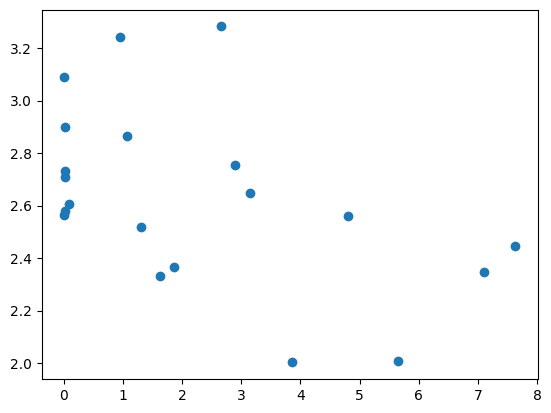

Pearsons correlation: -0.482
topic: 1


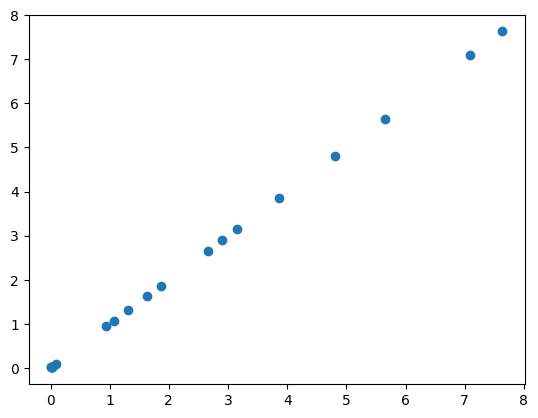

Pearsons correlation: 1.000
topic: 2


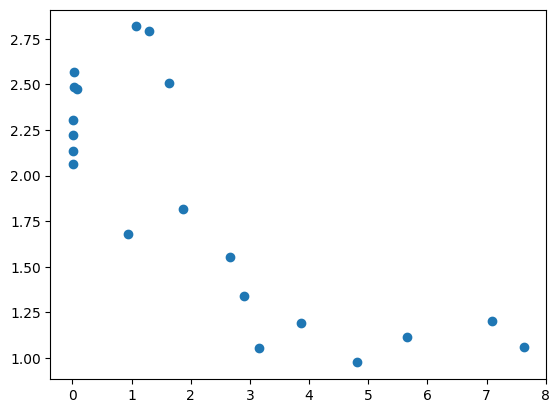

Pearsons correlation: -0.801
topic: 3


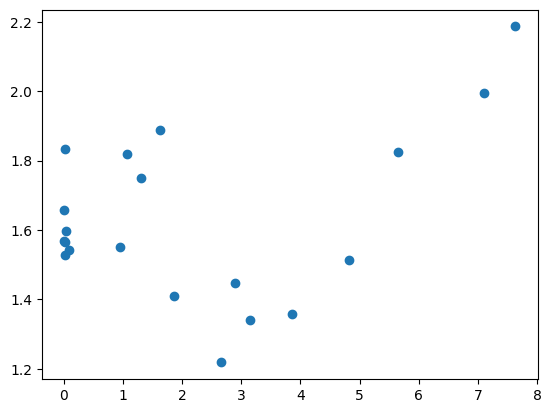

Pearsons correlation: 0.366
topic: 4


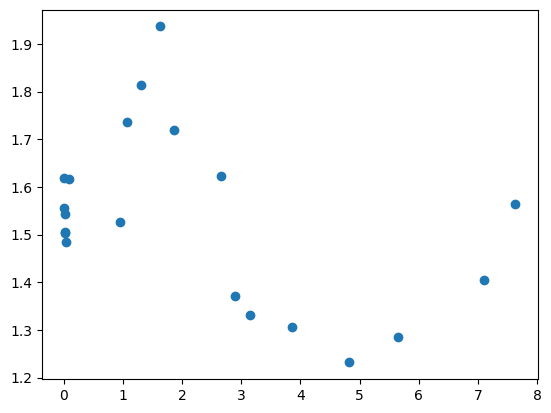

Pearsons correlation: -0.437
topic: 5


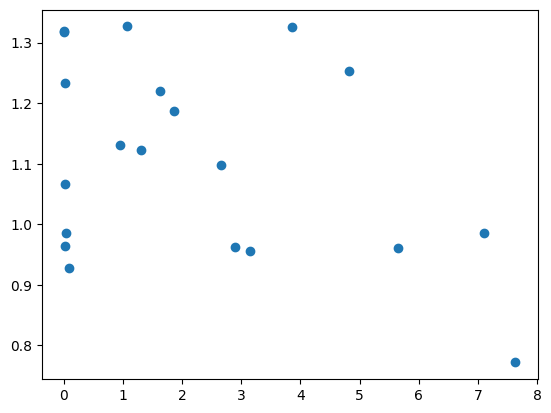

Pearsons correlation: -0.392
topic: 6


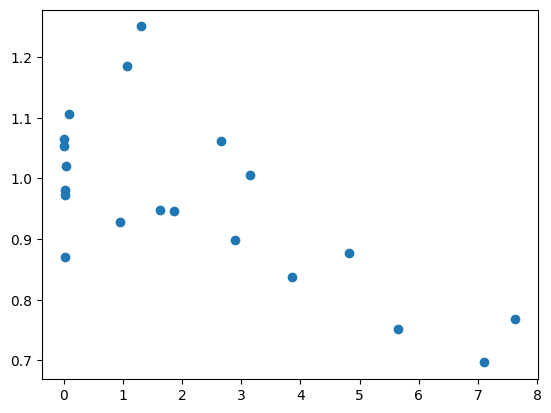

Pearsons correlation: -0.708
topic: 7


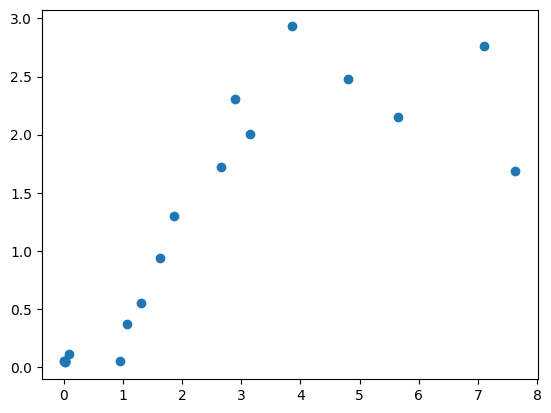

Pearsons correlation: 0.847
topic: 8


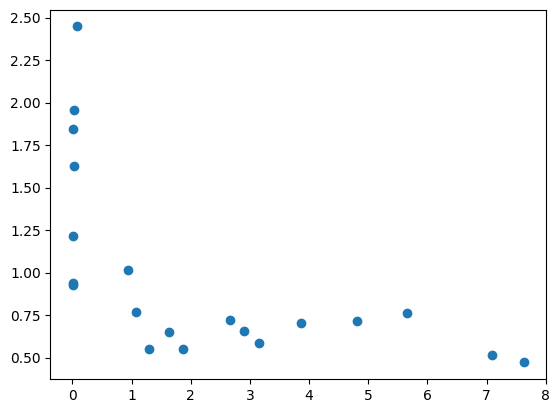

Pearsons correlation: -0.604
topic: 9


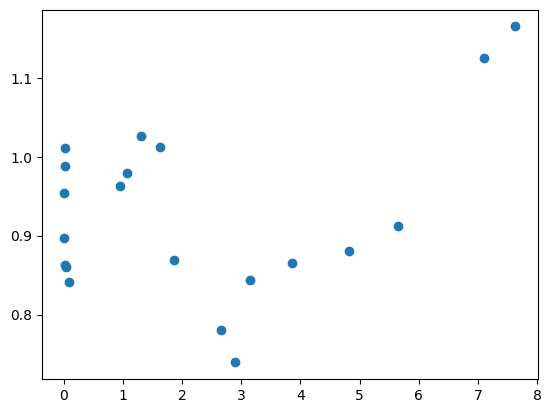

Pearsons correlation: 0.330
topic: 10


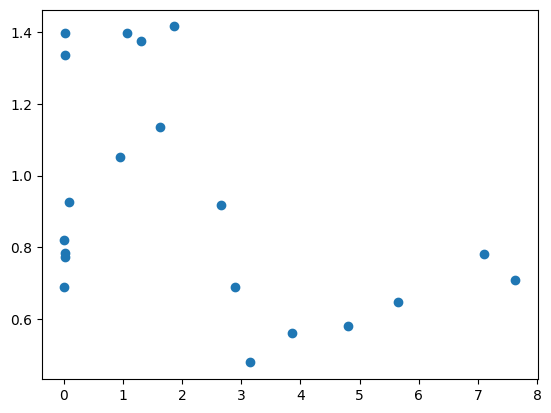

Pearsons correlation: -0.470
topic: 11


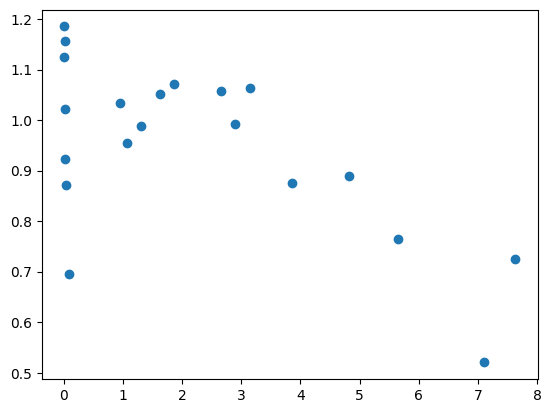

Pearsons correlation: -0.640
topic: 12


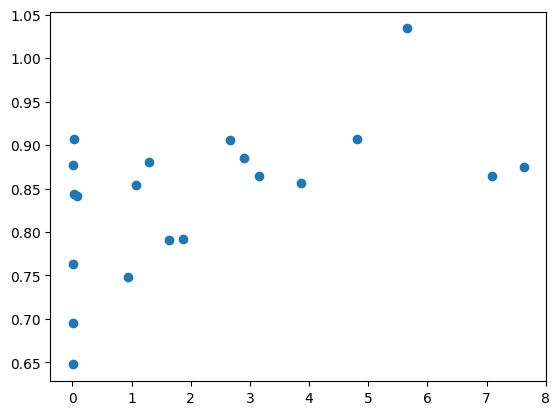

Pearsons correlation: 0.518
topic: 13


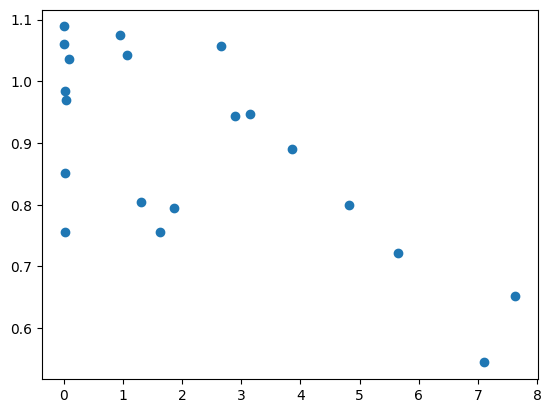

Pearsons correlation: -0.684
topic: 14


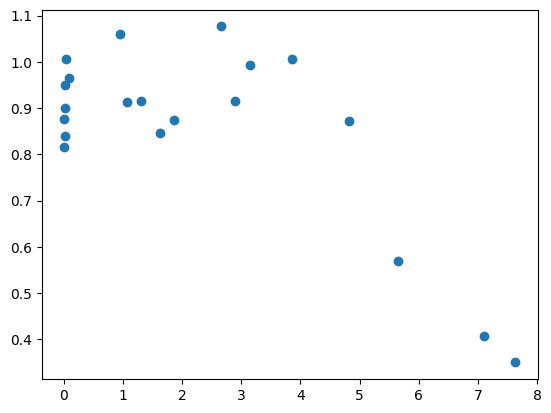

Pearsons correlation: -0.716
topic: 15


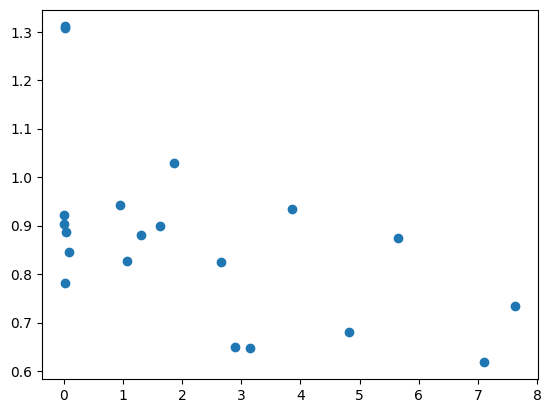

Pearsons correlation: -0.551
topic: 16


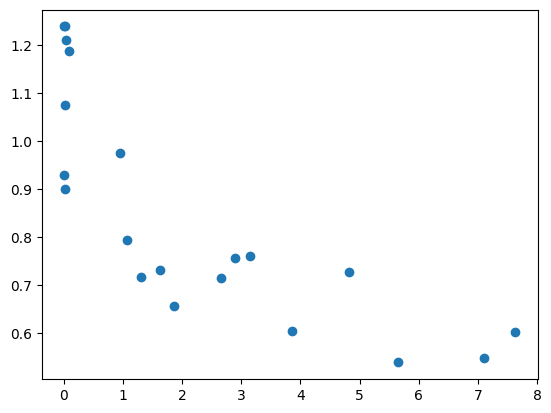

Pearsons correlation: -0.790
topic: 17


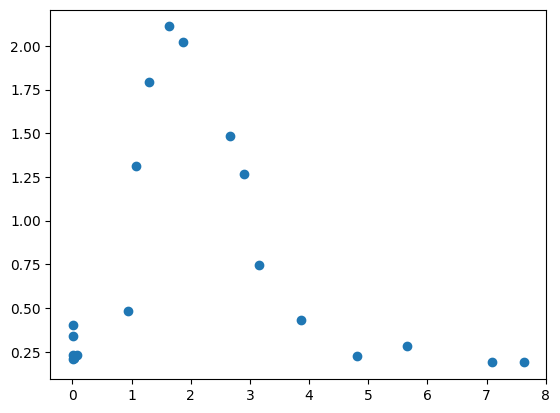

Pearsons correlation: -0.115
topic: 18


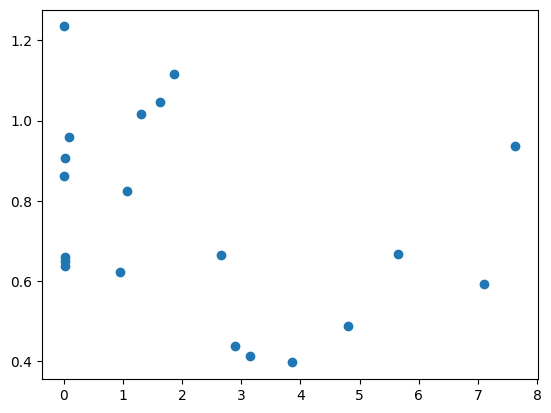

Pearsons correlation: -0.332
topic: 19


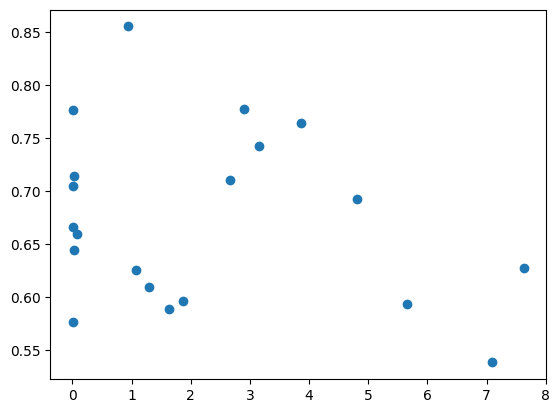

Pearsons correlation: -0.243
topic: 20


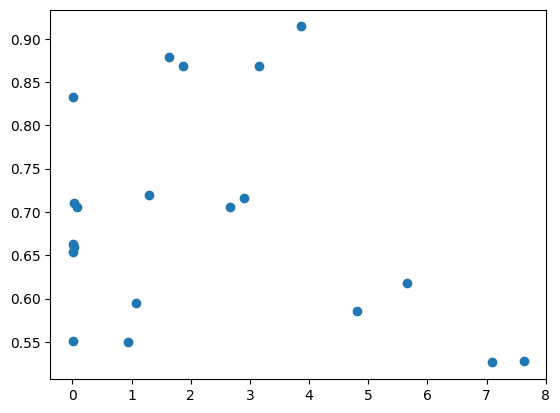

Pearsons correlation: -0.249
topic: 21


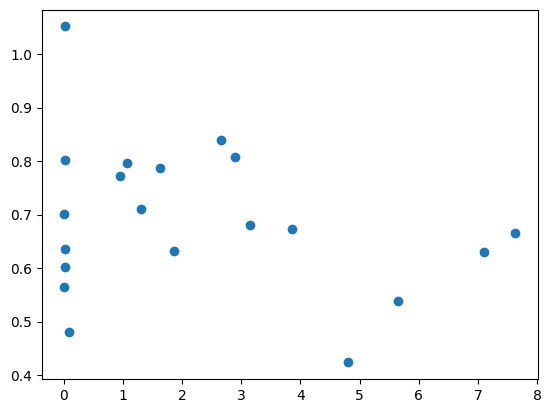

Pearsons correlation: -0.281
topic: 22


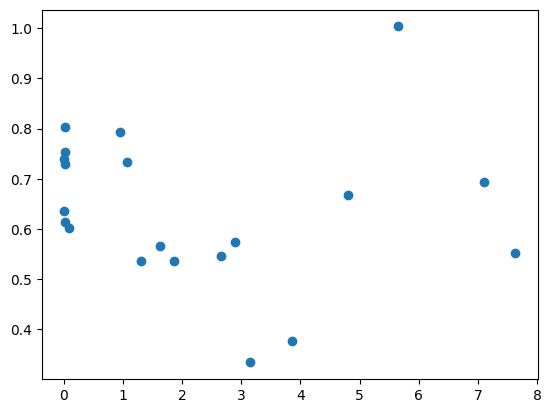

Pearsons correlation: -0.099
topic: 23


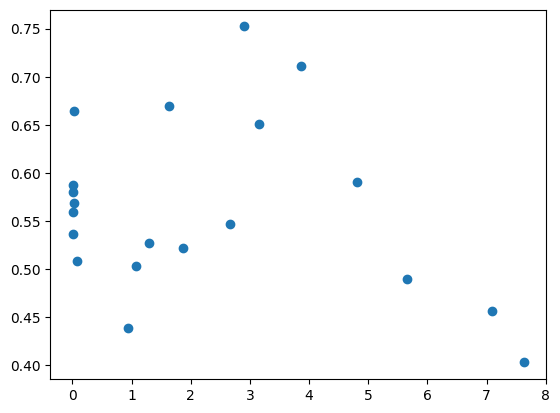

Pearsons correlation: -0.249
topic: 24


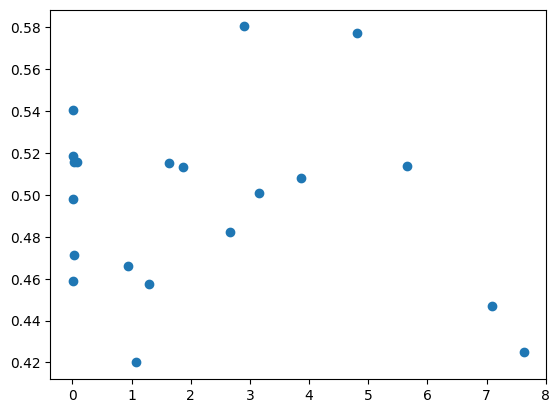

Pearsons correlation: -0.116
topic: 25


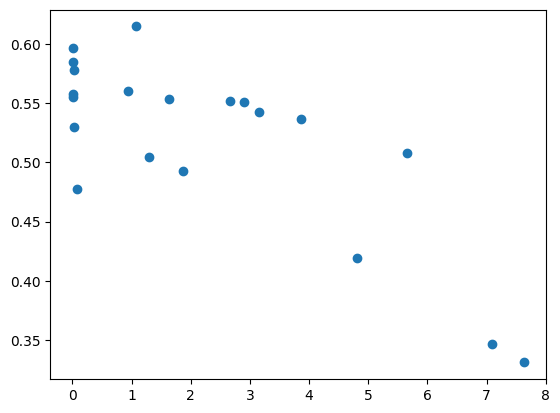

Pearsons correlation: -0.785
topic: 26


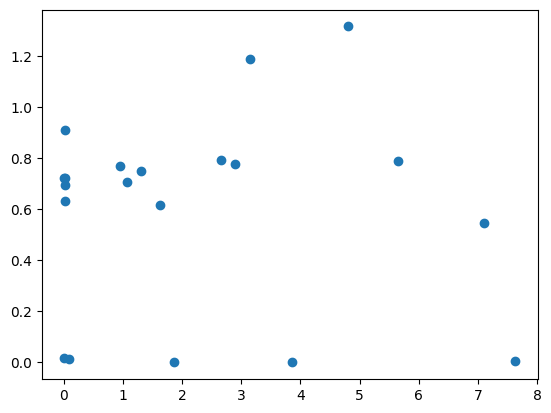

Pearsons correlation: -0.024
topic: 27


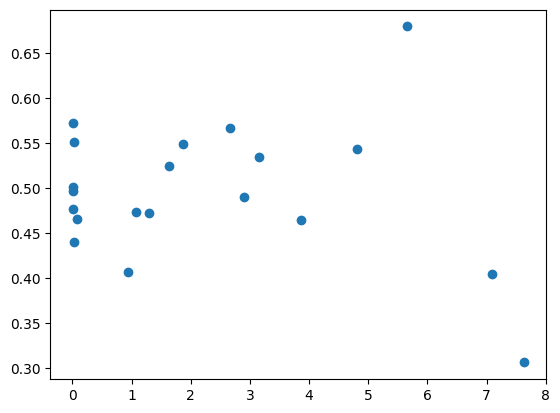

Pearsons correlation: -0.182
topic: 28


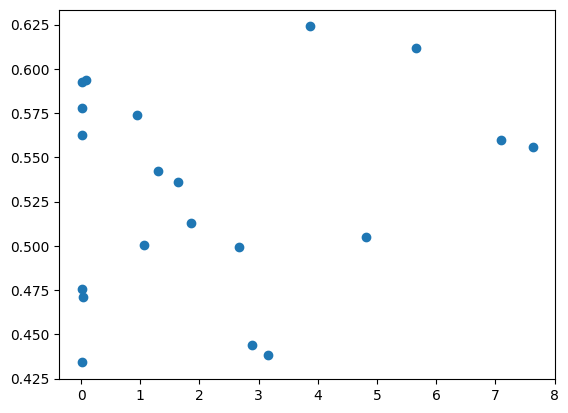

Pearsons correlation: 0.176
topic: 29


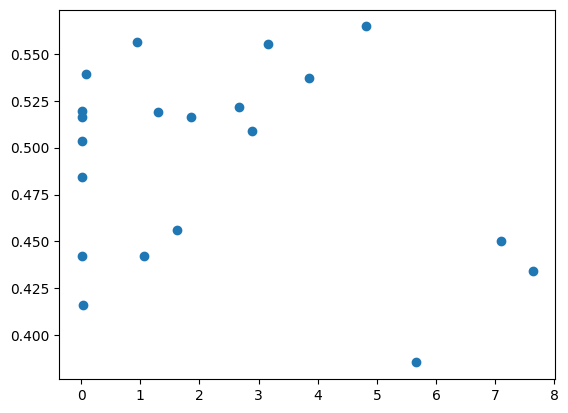

Pearsons correlation: -0.219
topic: 30


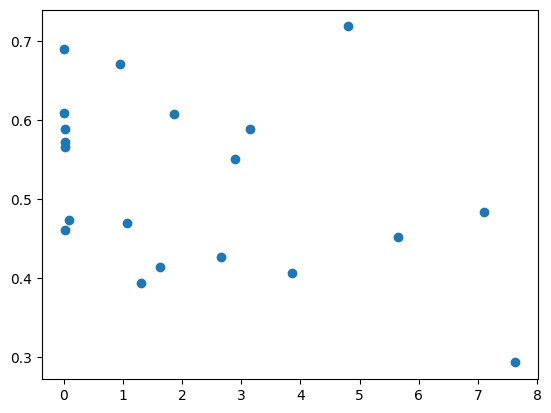

Pearsons correlation: -0.378
topic: 31


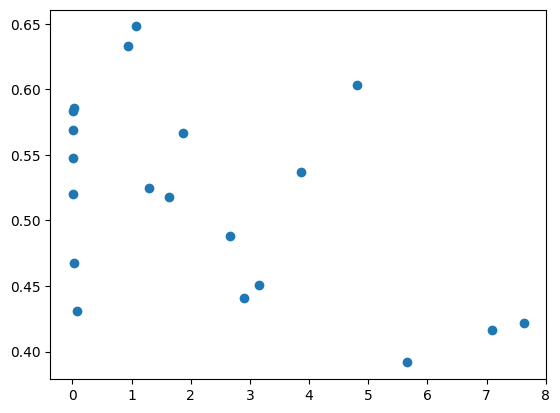

Pearsons correlation: -0.517
topic: 32


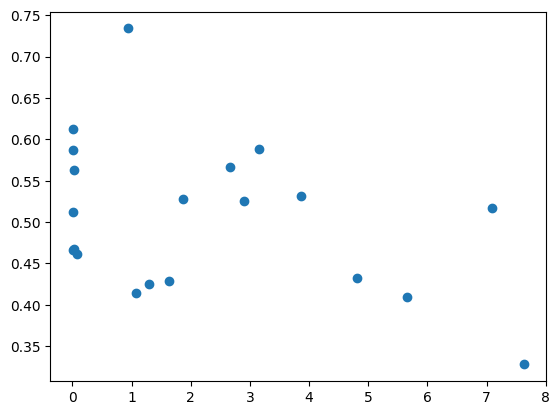

Pearsons correlation: -0.386
topic: 33


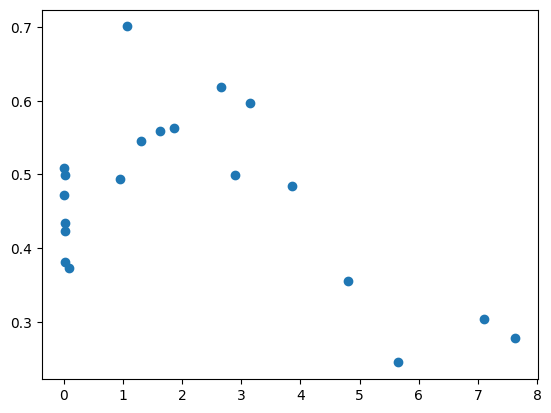

Pearsons correlation: -0.493
topic: 34


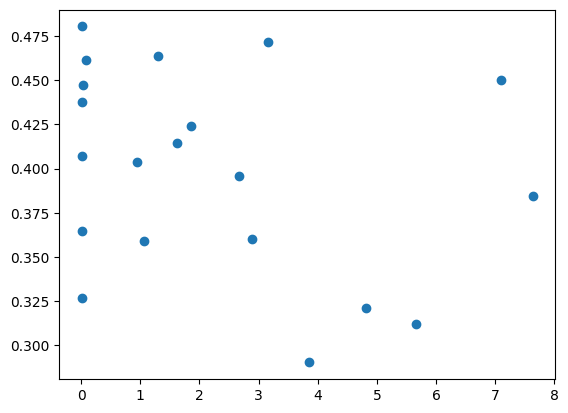

Pearsons correlation: -0.298
topic: 35


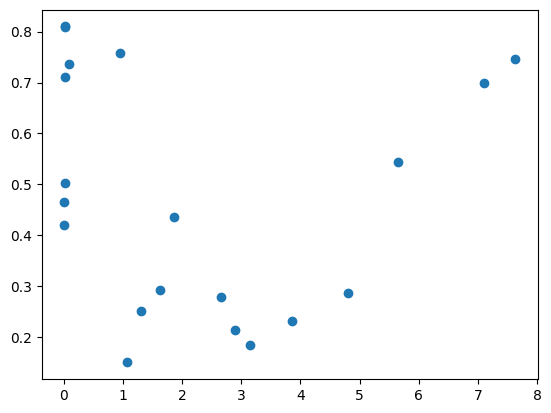

Pearsons correlation: -0.069
topic: 36


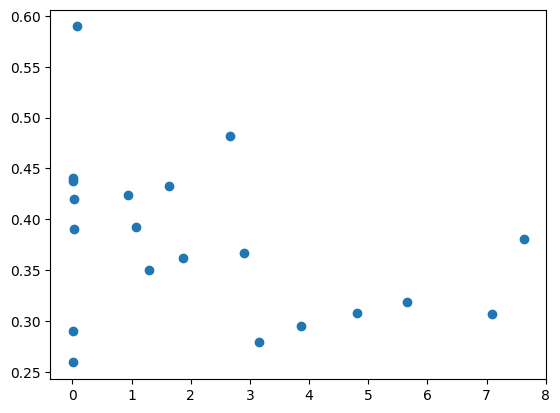

Pearsons correlation: -0.365
topic: 37


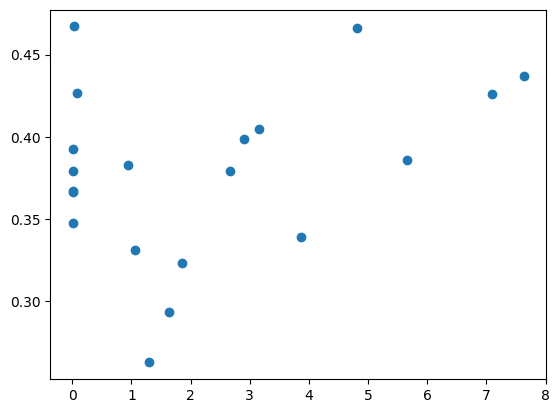

Pearsons correlation: 0.320
topic: 38


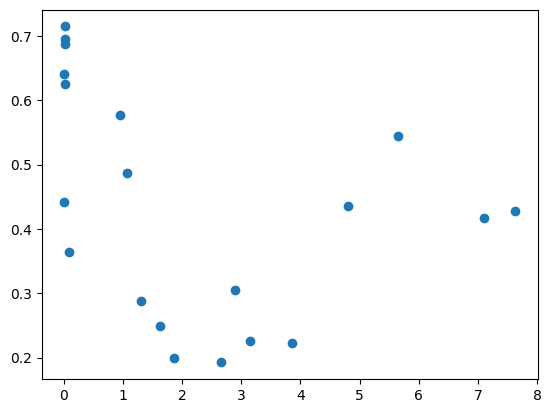

Pearsons correlation: -0.347
topic: 39


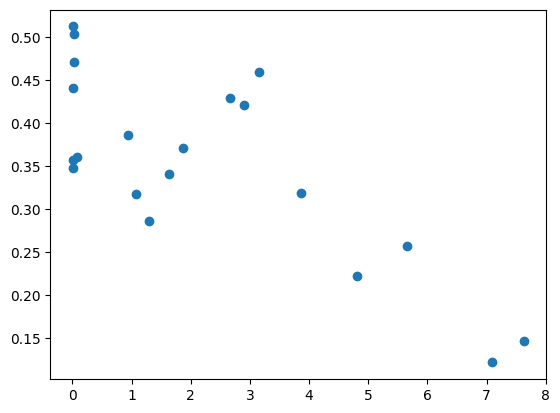

Pearsons correlation: -0.771


In [ ]:
 for i in range (0,40):
      print("topic:",i)
      show_topic_correlation(1,i,percentage_df)

The function show_topic() will draw a bar graph that contains the frequency of topics overtime. It will also ouput the words that constitute the topic

topic contains:
dividend
regulardividend
specialdividend
specialdividends
dividendpolicy
supplementaldividend
dividendpayoutratio
sharerepurchases
dividendpayout
commonstock


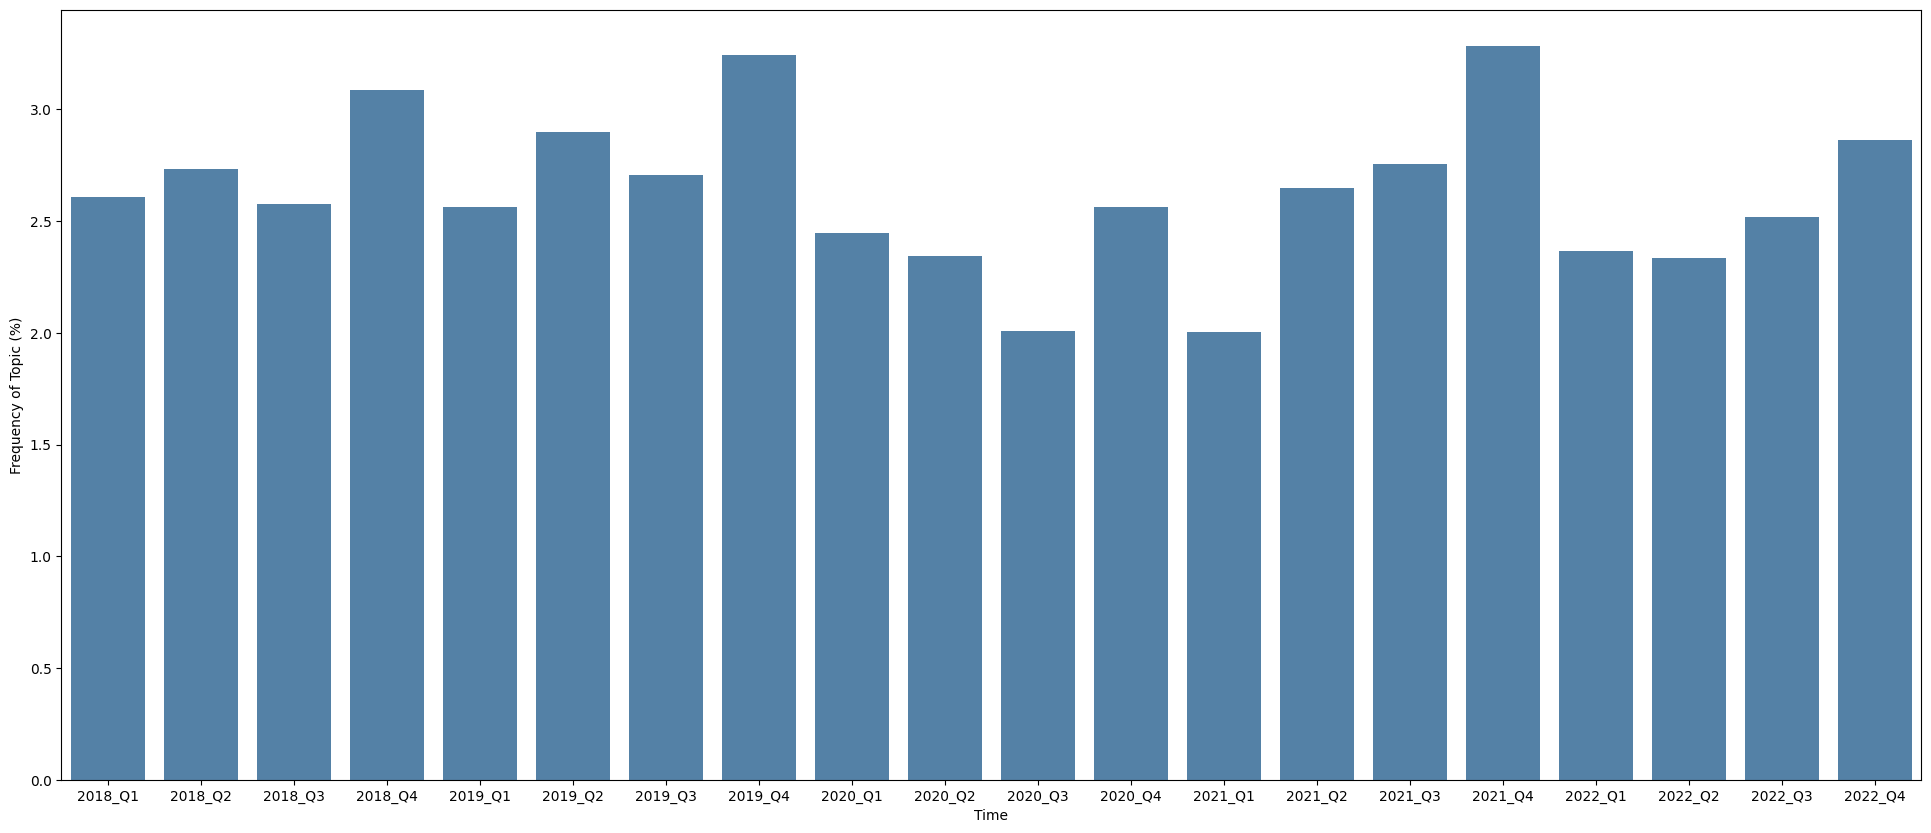

In [ ]:
show_topic(0,percentage_df,topic_dict)

topic contains:
covid19
covid
covid19pandemic
pandemic
prepandemiclevels
coronavirus
virus
precovid
precovidlevels
outbreak


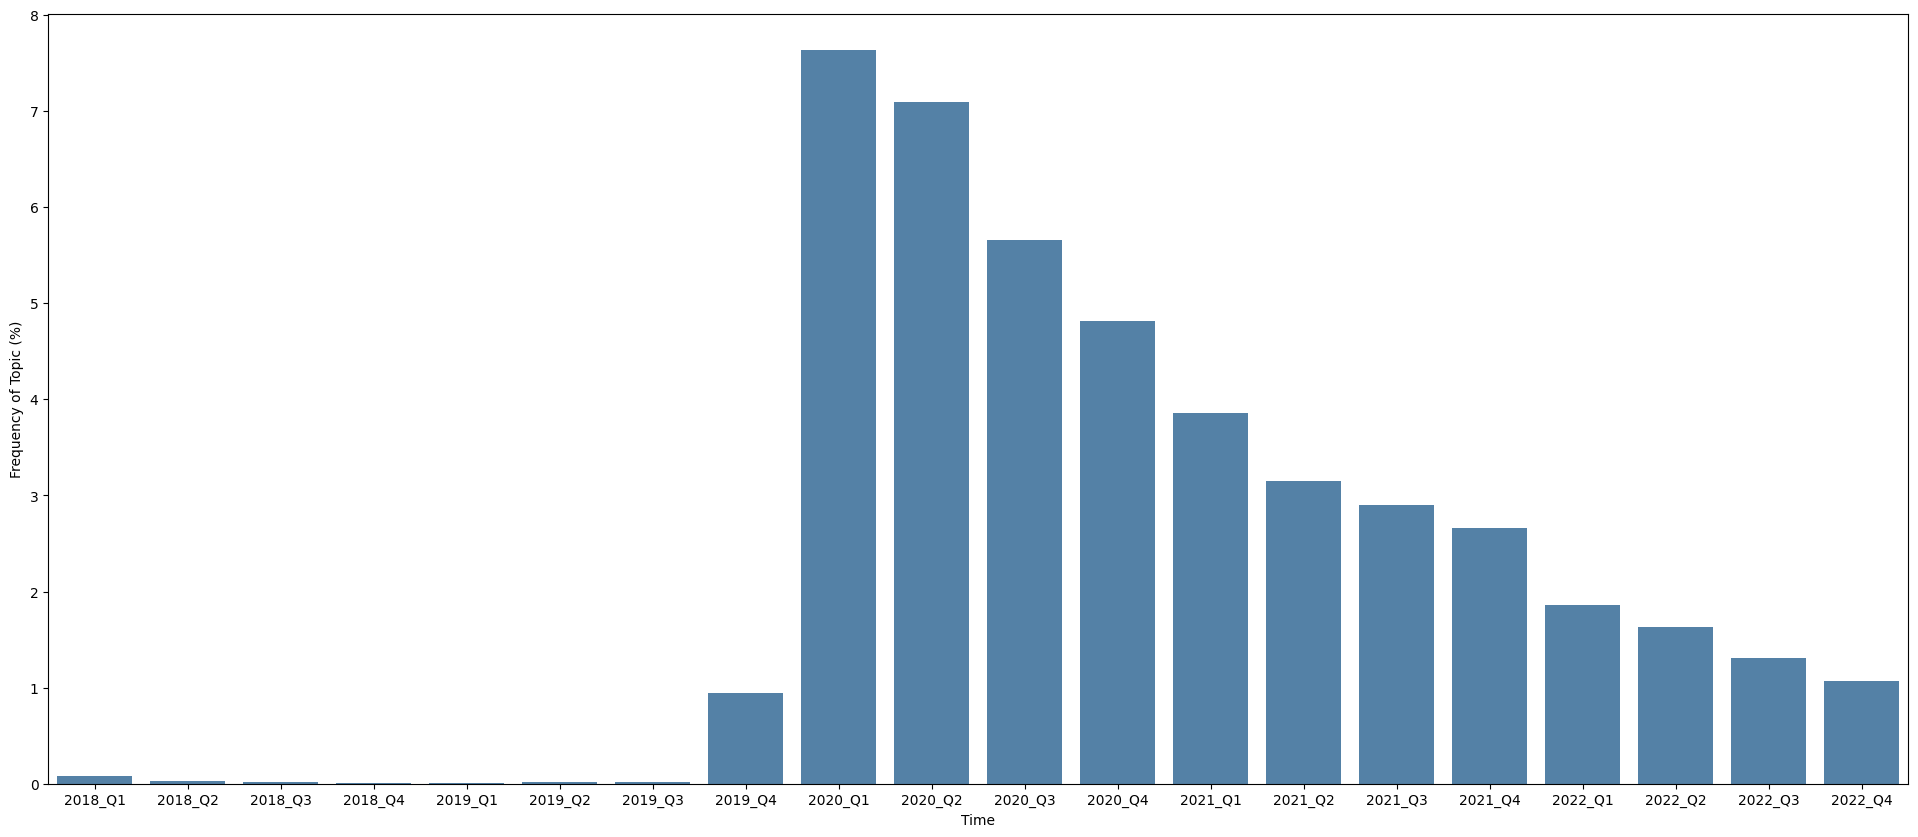

In [ ]:
show_topic(1,percentage_df,topic_dict)

topic contains:
depositbetas
depositbeta
deposit
depositcosts
beta
depositor
depositgathering
interestbearingdeposits
depository
checkingaccount


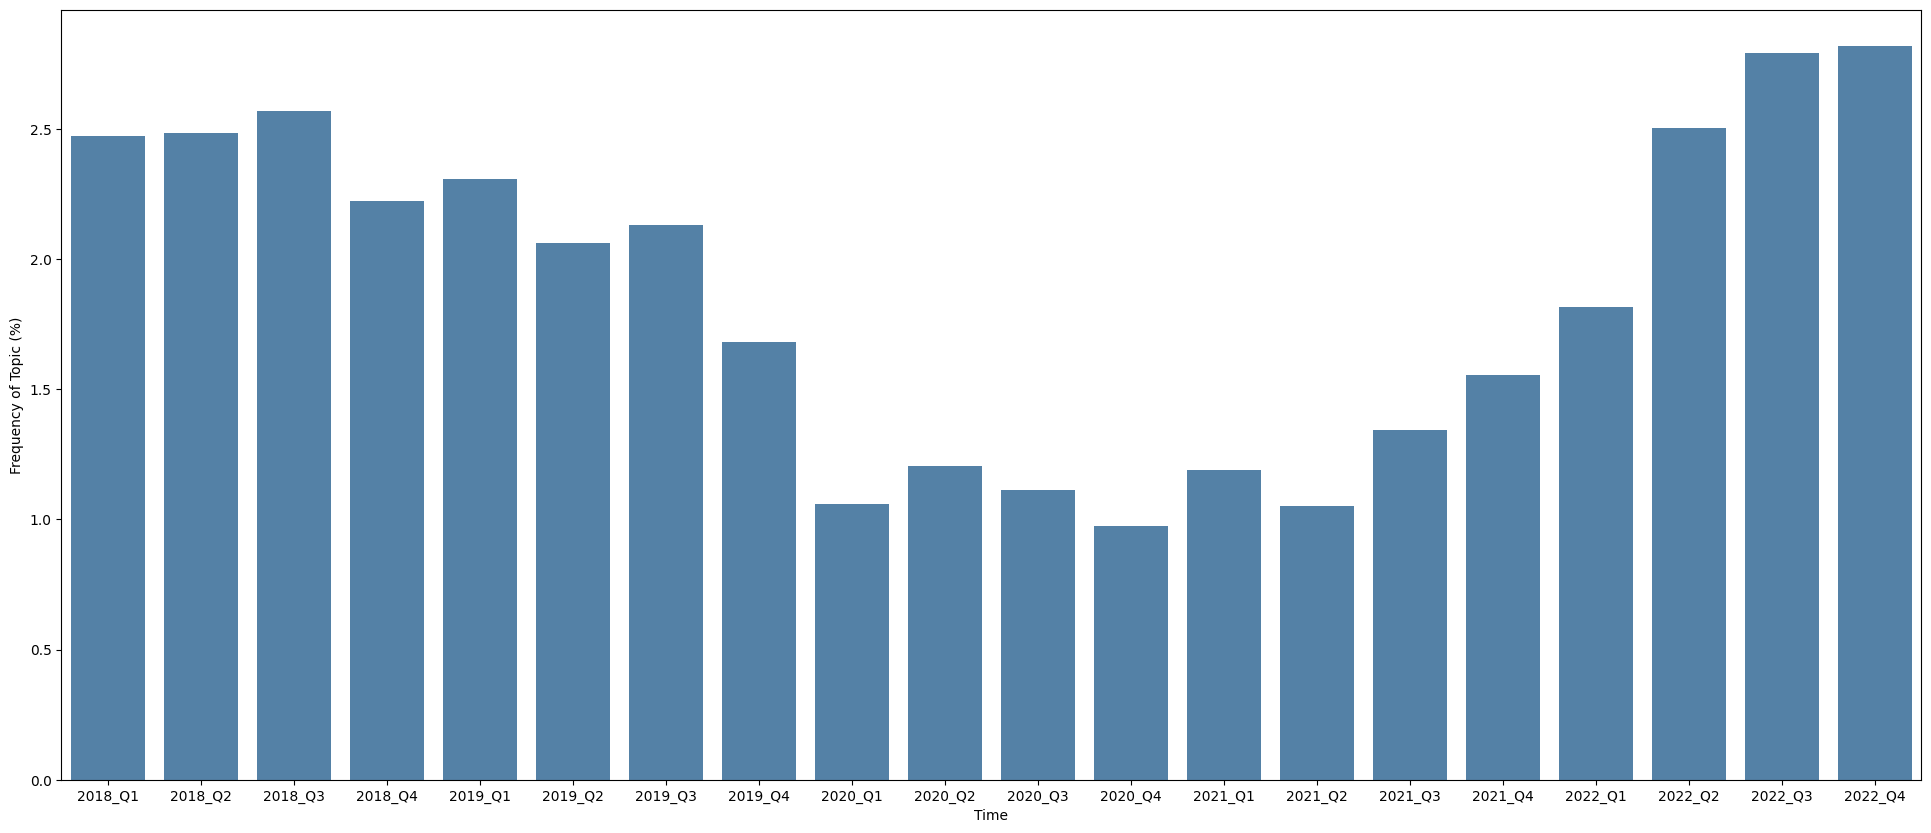

In [ ]:
show_topic(2,percentage_df,topic_dict)

topic contains:
reinsurance
reinsurers
insurance
insurer
lifeinsurance
reinsuranceprogram
reinsurer
esurance
proassurance
treaty


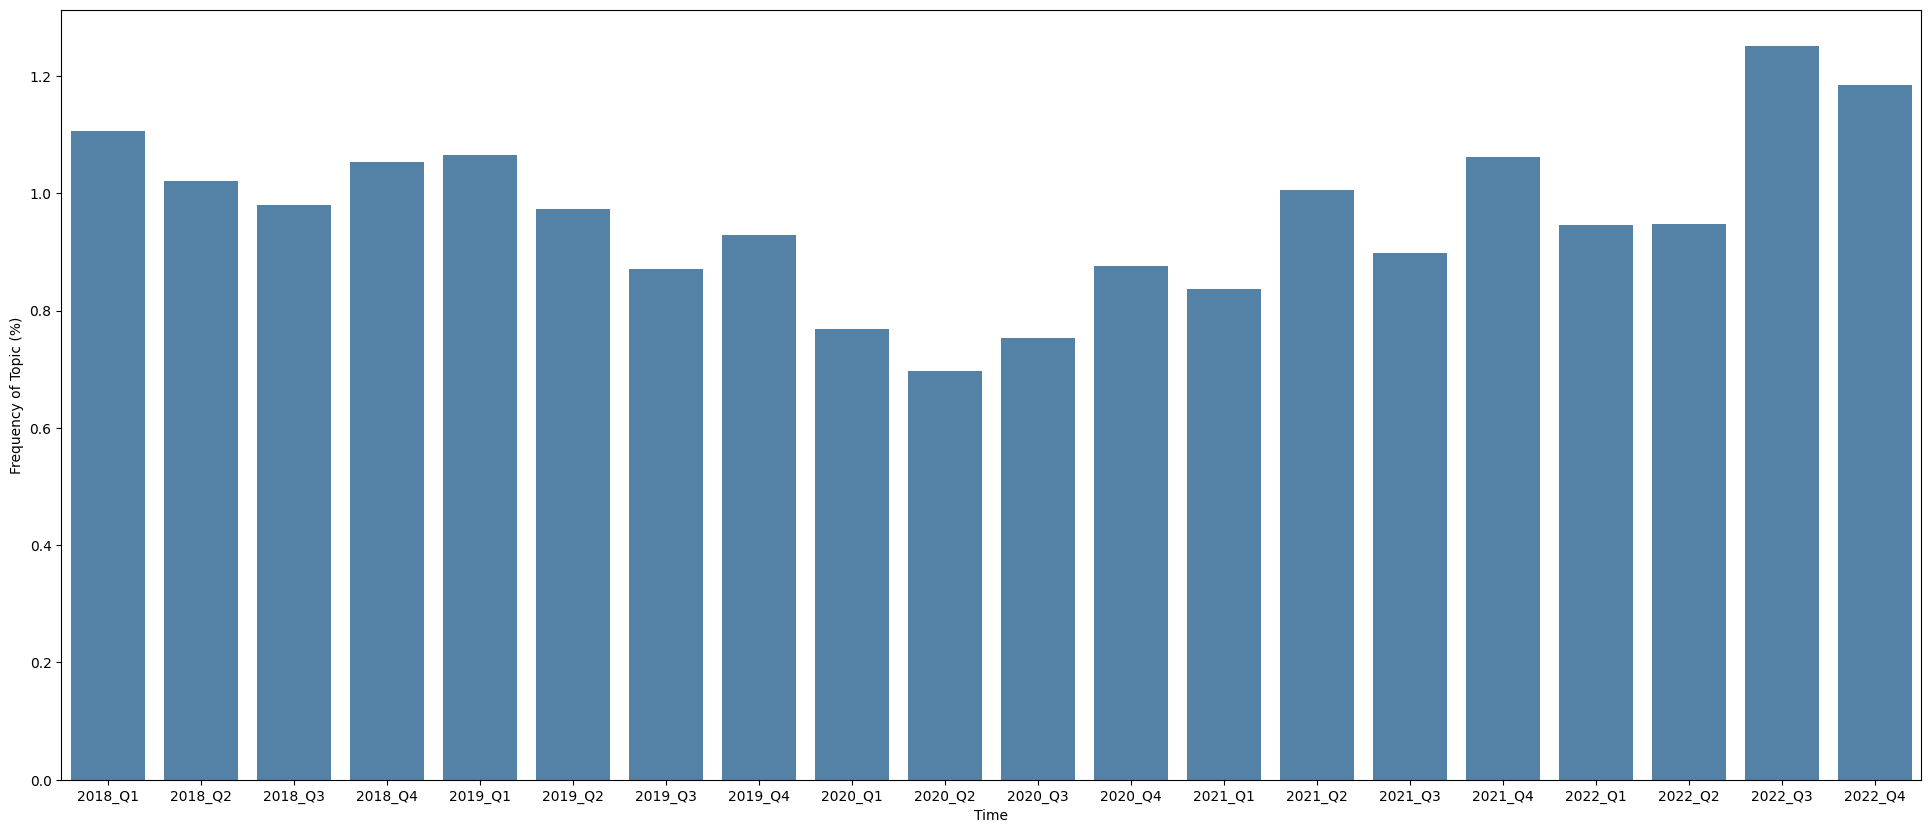

In [ ]:
show_topic(6,percentage_df,topic_dict)

topic contains:
volatility
vix
extremevolatility
bout
spike
fx
trading
var
tradingvolumes
vol


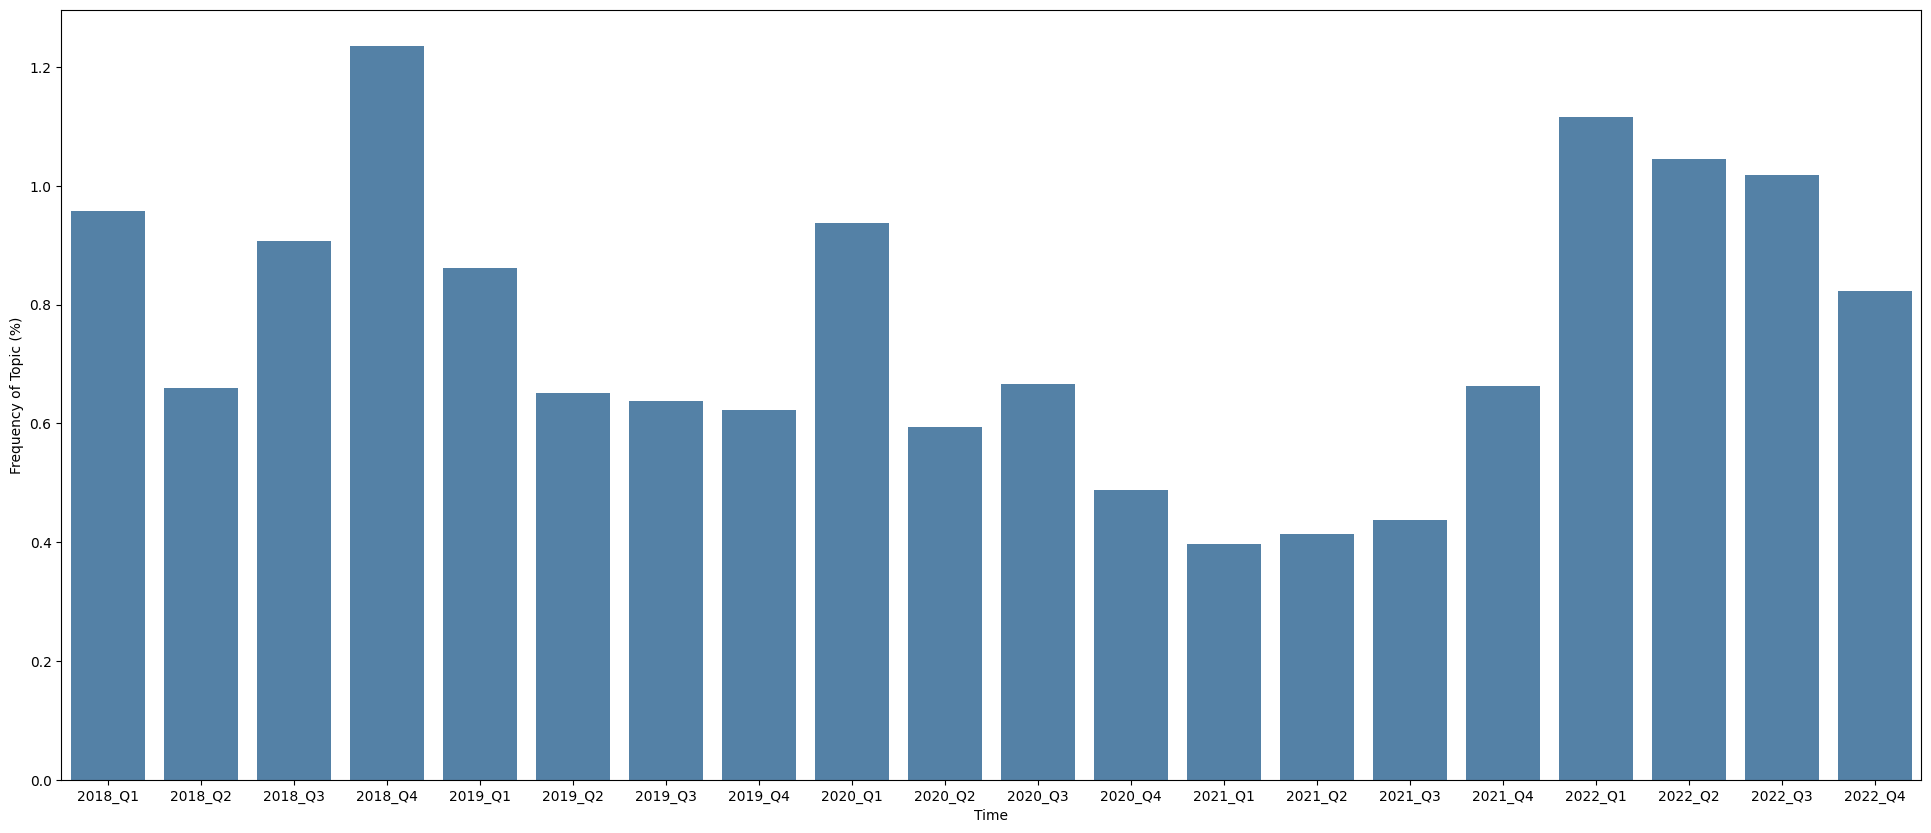

In [ ]:
show_topic(18,percentage_df,topic_dict)